In [1]:
import re
import pandas as pd
import numpy as np
import random
# generate calendar
ideal_board = [[3,3,3,3,3],
               [3,3,3,3,3],
               [3,3,3,3,3],
               [3,3,3,3,3],
               [3,3,3,3,3],
              [3,3,3,3,3],
              [3,3,3,3,3],
              [3,3,3,3,3]]

C:\Python\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Python\lib\site-packages\numpy\.libs\libopenblas.BNVRK7633HSX7YVO2TADGR4A5KEKXJAW.gfortran-win_amd64.dll
C:\Python\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
np.ravel(ideal_board)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [3]:
sum(np.ravel(ideal_board))

120

In [4]:
weekly_hours = {
    'sara':25,
    'heinz':25,
    'bernie':25,
    'carl':25,
    'zak':25
               }

In [5]:
employee_dict = {
    'sara':25,
    'heinz':25,
    'bernie':25,
    'carl':25,
    'zak':25
               }

In [6]:
list(weekly_hours.keys())[1]

'heinz'

In [7]:
#random kickstart, first expansive generation
def kickstart(num_iter, employee_dict):
    final_resultlist = []
    for iteration in range(0,num_iter):
        print(iteration)
        iteration_fullweek = []
        weekscorelist = []
        for employee in weekly_hours.keys():

            new_board = np.zeros((8, 5), dtype=int)

            i = 0
            weekly_hours_employee = weekly_hours[employee]
            while i < weekly_hours_employee:
                for val in range(0,40):
                    #print(val, i)
                    randnum = random.randint(1,40)
                    if (randnum < weekly_hours_employee) & (i < weekly_hours_employee):
                        np.ravel(new_board)[val] = 1
                        i = i+1

                    else:
                        i = i+0
            #namepart = (str(iteration)+'_'+employee)

            iteration_fullweek.append(np.ravel(new_board))

        emptydict = {'child':[1],'method':[2]}
        i = 2
        for key in employee_dict.keys():
            emptydict['week_'+key] = [i]
            i = i+1

        df = pd.DataFrame(data=emptydict)
        #df['generation'] = 0
        df['child'] = iteration
        df['method'] = 'random'

        i = 0
        for key in employee_dict.keys():
            #df['week_'+key] = re.sub('[^0-9]','', np.ravel(str(iteration_fullweek[i]))[0])
            #print(list(iteration_fullweek[i]))
            #df['week_'+key] = str((iteration_fullweek[i]))
            numbersarray = []
            for number in iteration_fullweek[i]:
                #print(number)
                numbersarray.append(number)
            #print(numbersarray)
            df['week_'+key] = str(numbersarray)
            i = i+1
        #print(iteration_fullweek)
        #print(type(iteration_fullweek))
        final_resultlist.append(df)
        
    return final_resultlist

In [8]:
results = kickstart(200, weekly_hours)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [9]:
resultsframe = pd.concat(results,axis=0)

In [10]:
resultsframe.reset_index(inplace=True,drop=True)
resultsframe.reset_index(inplace=True,drop=False)

In [11]:
len(resultsframe)

200

In [12]:
resultsframe

index  child  method                                          week_sara  \
0        0      0  random  [0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, ...   
1        1      1  random  [1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, ...   
2        2      2  random  [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, ...   
3        3      3  random  [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, ...   
4        4      4  random  [1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...   
5        5      5  random  [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, ...   
6        6      6  random  [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, ...   
7        7      7  random  [1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, ...   
8        8      8  random  [0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, ...   
9        9      9  random  [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, ...   
10      10     10  random  [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, ...   
11      11     11  random  [0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, ...   
12      12     12  random  [0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, ...   
13      13     13  random  [1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, ...   
14      14     14  random  [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, ...   
15      15     15  random  [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, ...   
16      16     16  random  [1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, ...   
17      17     17  random  [1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, ...   
18      18     18  random  [1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, ...   
19      19     19  random  [1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, ...   
20      20     20  random  [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, ...   
21      21     21  random  [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...   
22      22     22  random  [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, ...   
23      23     23  random  [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, ...   
24      24     24  random  [1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, ...   
25      25     25  random  [1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...   
26      26     26  random  [1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, ...   
27      27     27  random  [1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, ...   
28      28     28  random  [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, ...   
29      29     29  random  [1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, ...   
..     ...    ...     ...                                                ...   
170    170    170  random  [1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, ...   
171    171    171  random  [1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, ...   
172    172    172  random  [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, ...   
173    173    173  random  [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, ...   
174    174    174  random  [1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, ...   
175    175    175  random  [1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...   
176    176    176  random  [1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, ...   
177    177    177  random  [1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, ...   
178    178    178  random  [1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, ...   
179    179    179  random  [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, ...   
180    180    180  random  [1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, ...   
181    181    181  random  [1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, ...   
182    182    182  random  [1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, ...   
183    183    183  random  [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, ...   
184    184    184  random  [0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, ...   
185    185    185  random  [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...   
186    186    186  random  [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, ...   
187    187    187  random  [1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, ...   
188  

In [13]:
### section for fullweek_evaluation of resultframe
def score_idealweek(resultframe_to_analyze):
    resultlist = []
    dataframe = resultframe_to_analyze.copy()
    for row in range(0,len(dataframe)):
        #print(row)
        if row >= 0:
            dftemp = dataframe[row:row+1]
            #print(dftemp.head(3))
            #print('old',dftemp['iteration'][0])
            
            index = int(dftemp['index'])
            method = dftemp['method'].values[0]
            fullweek_ints = []
            for employee in weekly_hours.keys():
                #print(dftemp)
                stringlist = dftemp['week_'+employee]
                intlist = []
                for number in stringlist.values[0]:
                    try:
                        intlist.append(int(number))
                    except:
                        pass
                fullweek_ints.append(intlist)
            weeksums = sum(np.array(fullweek_ints))
            #print(weeksums)
            #print(type(weeksums[0]))
            #print(type(weeksums))
            #print(weeksums.shape)
            diffs = weeksums - np.ravel(ideal_board)
            for num in range(0,40):
                if diffs[num] < 0:
                    diffs[num] = diffs[num]*2
                else:
                    diffs[num] = diffs[num]

            emptydict = {'index':[1], 'method':[2], 'diffsum':[3]}
            df = pd.DataFrame(data=emptydict)
            df['index'] = index
            df['method'] = method
            df['diffsum'] = (sum(abs(diffs)))/100.0
            resultlist.append(df)
    ideal_scores = pd.concat(resultlist)
    return ideal_scores

In [14]:
idealweek_scores = score_idealweek(resultsframe)

In [15]:
idealweek_scores.head(3)

index  method  diffsum
0      0  random     0.69
0      1  random     0.52
0      2  random     0.55

In [16]:
###section for hassle scoring
def score_hassle(resultframe_to_analyze):
    resultlist = []
    dataframe = resultframe_to_analyze.copy()
    for row in range(0,len(dataframe)):
        resultlist_iter = []
        if row >= 0:
            dftemp = dataframe[row:row+1]
            index = dftemp['index'].values[0]
            method = dftemp['method'].values[0]
            fullweek_ints = []
            for employee in weekly_hours.keys():
                #print(dftemp)
                stringlist = dftemp['week_'+employee]
                intlist = []
                for number in stringlist.values[0]:
                    try:
                        intlist.append(int(number))
                    except:
                        pass

                weekscores = []
                for day in range(1,6):
                    dayframe = []

                    for hour in range(1,9):
                        tempdict = {'day':[1], 'hour':[2], 'gene':[3]}
                        df = pd.DataFrame(data=tempdict)
                        df['day'] = day
                        df['hour'] = hour
                        df['gene'] = intlist[((hour*5)-5)+(day-1)]
                        #print(day, hour,df.gene)
                        #print(df)

                        dayframe.append(df)
                    fullday = pd.concat(dayframe)
                    fullday['dummy'] = 1
                    fullday['runsum_dummy'] = fullday.dummy.cumsum()
                    fullday['runsum_gene'] = fullday.gene.cumsum()
                    fullday.loc[(fullday['runsum_gene'] == 1), 'start_flag'] = 1
                    hoursum = np.max(fullday.runsum_gene)
                    fullday.loc[(fullday['runsum_gene'] == hoursum), 'end_flag'] = 1
                    fullday['start_flag_runsum'] = fullday.start_flag.cumsum()
                    fullday['end_flag_runsum'] = fullday.end_flag.cumsum()
                    try:
                        fullday_slice = fullday[(fullday.start_flag_runsum == 1) | (fullday.end_flag_runsum == 1)]        
                        if len(fullday_slice) >= 1:
                            teller = (fullday_slice[fullday_slice.end_flag_runsum == 1]['runsum_gene'].values[0])
                            nevnerA = (fullday_slice[fullday_slice.end_flag_runsum == 1]['runsum_dummy'].values[0])
                            nevnerB = (fullday_slice[fullday_slice.start_flag_runsum == 1]['runsum_dummy'].values[0])
                            density = teller/((nevnerA-nevnerB)+1)
                            hours = (fullday_slice[fullday_slice.end_flag_runsum == 1]['runsum_gene'].values[0])
                            density_scaled =  (density-0.25)/(1-0.25)
                            hours_scaled = (hours-1)/(8-1)

                            #print(fullday)
                            #print('density',density,'hoursum',hours, 'density_scaled',density_scaled,'hours scaled', hours_scaled)
                        else:
                            density_scaled= 1
                            hours_scaled = 1

                    except:

                        density_scaled= 1
                        hours_scaled = 1

                    tempdict2 = {'day':[1], 'score':[2]}
                    dayscore = pd.DataFrame(data=tempdict2)
                    dayscore['day'] = day
                    dayscore['score'] = hours_scaled * density_scaled
                    weekscores.append(dayscore)
                weekscores_frame = pd.concat(weekscores)
                employee_mean = np.mean(weekscores_frame.score)
                #print(employee_mean)

                tempdict3 = {'index':[1], 'method':[2],'employee':[3], 'weekscore':[4]}
                weekscoreframe = pd.DataFrame(data=tempdict3)
                weekscoreframe['index'] = index
                weekscoreframe['method'] = method
                weekscoreframe['employee'] = employee
                weekscoreframe['weekscore'] = employee_mean
                resultlist_iter.append(weekscoreframe)
            iteration_fullframe = pd.concat(resultlist_iter)
            weekscore_avg = np.mean(iteration_fullframe.weekscore)
            #print(weekscore_avg)
            emptydict = {'index':[1],'method':[2], 'hasslescore':[3]}
            df = pd.DataFrame(data=emptydict)
            df['index'] = index
            df['method'] = method
            df['hasslescore'] = 1-weekscore_avg
            resultlist.append(df)
    hassle_scores = pd.concat(resultlist)
    return hassle_scores

In [17]:
hasslescores = score_hassle(resultsframe)

In [18]:
hasslescores.head(3)

index  method  hasslescore
0      0  random     0.687964
0      1  random     0.593379
0      2  random     0.651864

In [19]:
resultsframe2 = resultsframe.merge(idealweek_scores,how='inner', on=['index','method']).merge(hasslescores,how='inner',on=['index','method'])
resultsframe2['generation'] = 0
resultsframe2['composite'] = ( (resultsframe2.diffsum * 0.33)+ (resultsframe2.hasslescore*0.66))
#del source_and_target
resultsframe3 = resultsframe2
resultsframe3 = resultsframe3.sort_values(by='composite',ascending=True)


In [20]:
resultsframe3.head(3)

index  child  method                                          week_sara  \
46      46     46  random  [1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, ...   
60      60     60  random  [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, ...   
141    141    141  random  [1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, ...   

                                            week_heinz  \
46   [1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, ...   
60   [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, ...   
141  [1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, ...   

                                           week_bernie  \
46   [1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, ...   
60   [1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, ...   
141  [0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, ...   

                                             week_carl  \
46   [0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, ...   
60   [0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, ...   
141  [0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, ...   

                                              week_zak  diffsum  hasslescore  \
46   [1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, ...     0.33     0.614966   
60   [1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, ...     0.43     0.568254   
141  [1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, ...     0.36     0.608961   

     generation  composite  
46            0   0.514778  
60            0   0.516948  
141           0   0.520715

In [21]:
#cols = resultsframe3.columns
resultsframe3.reset_index(inplace=True,drop=True)
resultsframe3.reset_index(inplace=True,drop=False)

cols = list(resultsframe3.columns)
cols[0] = 'rank'
resultsframe3.columns = cols

In [22]:
resultsframe3.drop(['rank','index'],axis=1,inplace=True)
resultsframe3.head(3)

child  method                                          week_sara  \
0     46  random  [1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, ...   
1     60  random  [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, ...   
2    141  random  [1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, ...   

                                          week_heinz  \
0  [1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, ...   
1  [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, ...   
2  [1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, ...   

                                         week_bernie  \
0  [1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, ...   
1  [1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, ...   
2  [0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, ...   

                                           week_carl  \
0  [0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, ...   
1  [0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, ...   
2  [0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, ...   

                                            week_zak  diffsum  hasslescore  \
0  [1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, ...     0.33     0.614966   
1  [1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, ...     0.43     0.568254   
2  [1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, ...     0.36     0.608961   

   generation  composite  
0           0   0.514778  
1           0   0.516948  
2           0   0.520715

In [23]:
resultsframe3.head(10)

child  method                                          week_sara  \
0     46  random  [1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, ...   
1     60  random  [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, ...   
2    141  random  [1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, ...   
3    102  random  [1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, ...   
4     64  random  [1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, ...   
5    158  random  [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...   
6      5  random  [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, ...   
7      6  random  [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, ...   
8     33  random  [0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, ...   
9     11  random  [0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, ...   

                                          week_heinz  \
0  [1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, ...   
1  [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, ...   
2  [1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, ...   
3  [1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, ...   
4  [1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, ...   
5  [0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, ...   
6  [1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, ...   
7  [1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, ...   
8  [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...   
9  [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, ...   

                                         week_bernie  \
0  [1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, ...   
1  [1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, ...   
2  [0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, ...   
3  [1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, ...   
4  [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, ...   
5  [1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, ...   
6  [1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, ...   
7  [0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, ...   
8  [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...   
9  [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, ...   

                                           week_carl  \
0  [0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, ...   
1  [0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, ...   
2  [0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, ...   
3  [0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, ...   
4  [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, ...   
5  [0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, ...   
6  [1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, ...   
7  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, ...   
8  [1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, ...   
9  [0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, ...   

                                            week_zak  diffsum  hasslescore  \
0  [1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, ...     0.33     0.614966   
1  [1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, ...     0.43     0.568254   
2  [1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, ...     0.36     0.608961   
3  [1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, ...     0.42     0.588571   
4  [0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, ...     0.39     0.604753   
5  [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, ...     0.37     0.618902   
6  [0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, ...     0.35     0.629116   
7  [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, ...     0.49     0.559927   
8  [0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, ...     0.46     0.575365   
9  [1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...     0.46     0.575456   

   generation  composite  
0           0   0.514778  
1           0   0.516948  
2           0   0.520715  
3           0   0.527057  
4           0   0.527837  
5           0   0.530576  
6           0   0.530716  
7           0   0.531252  
8           0   0.531541  
9           0   0.531601

In [24]:
#resultsframe3 = resultsframe3.drop(['diffsum','hasslescore','composite'],axis=1)

In [25]:
##Elite
def elite(sourcedata, num_children):
    print('elite')
    childframe = []
    
    for childnumber in range(0,num_children):
        randomslice = random.randint(0,10)
        devframeA = sourcedata[randomslice:randomslice+1].copy()
        randomslice = random.randint(0,10)
        devframeB = sourcedata[randomslice:randomslice+1].copy()
        
        devframe = pd.concat((devframeA,devframeB),axis=0)
        
        num_employees = len((devframe[[col for col in devframe.columns if 'week_' in col]]).columns)
        #print('sampling employee')
        randomemp = random.randint(1,num_employees)
        target_chromosome = ((devframe[[col for col in devframe.columns if 'week_' in col]]).columns)[(randomemp-1)]
        #print(target_chromosome)
        arrays = devframe[target_chromosome].values
        #print(arrays)
        fullweek_ints = []
        for element in range(0,len(arrays)):
            stringlist = arrays[element]
            intlist = []
            for number in range(0,len(stringlist)):
                value = stringlist[number]
                try:
                    intlist.append(int(value))
                except:
                    pass
            fullweek_ints.append(intlist)
        #print('making overlap array')
        overlap_array = np.array(fullweek_ints[0]) + np.array(fullweek_ints[1])
    
    
        #print(overlap_array)
        i = 0
        new_board = np.zeros((8, 5), dtype=int)

        weekly_hours_employee = weekly_hours[target_chromosome.split('_')[1]]
        overlap_indices = np.where(overlap_array == 2)[0]
        single_indices = np.where(overlap_array == 1)[0]
        #print(single_indices)
        zero_indices = np.where(overlap_array == 0)[0]
        #print('attempting first sample')
        if len(single_indices) > 0:
            sampling = np.random.choice(single_indices, size=(weekly_hours_employee - len(overlap_indices)),replace=False)
            new_indices = list(overlap_indices)+list(sampling)
        else:
            new_indices = list(overlap_indices)
        if len(new_indices) < 25:
            #print('attempting second sample')
            sampling = np.random.choice(zero_indices, size=(25-len(new_indices)),replace=False)
            new_indices = new_indices+list(sampling)
        else:
            #print('didnt need second sample')
            pass
        new_indices.sort()
        new_board_2 = []
        for index in range(0,40):
            if index in new_indices:
                new_board_2.append(1)
            else:
                new_board_2.append(0)

        #print(('boardsum',sum(np.ravel(new_board))))
                    #print(step,value)
        #print(np.ravel(new_board))
        numbersarray = []
        for number in np.ravel(new_board_2):
            #print(number)
            numbersarray.append(number)
            
        devframeB = tempdata[randomslice:randomslice+1].copy()
        devframeB[target_chromosome] = str(numbersarray)
        devframeB['iteration'] = childnumber
        childframe.append(devframeB)
        del(devframeB)
        del(new_board)
        del(devframe)
    targetdata  = pd.concat(childframe)
    targetdata.reset_index(drop=True,inplace=True)
    return targetdata

In [26]:
def mutate_1(sourcedata, num_children):
    #print('mutate')
    childframe = []
    
    for childnumber in range(0,num_children):
        randomslice = random.randint(0,5)
        devframe = sourcedata[randomslice:randomslice+1].copy()
        
        num_employees = len((devframe[[col for col in devframe.columns if 'week_' in col]]).columns)
        #print('sampling employee')
        randomemp = random.randint(1,num_employees)
        target_chromosome = ((devframe[[col for col in devframe.columns if 'week_' in col]]).columns)[(randomemp-1)]
        #print(target_chromosome)
        arrays = devframe[target_chromosome].values
        #print(arrays)
        fullweek_ints = []
        for element in range(0,len(arrays)):
            stringlist = arrays[element]
            intlist = []
            for number in range(0,len(stringlist)):
                value = stringlist[number]
                try:
                    intlist.append(int(value))
                except:
                    pass
            fullweek_ints.append(intlist)
            
        overlap_array = np.array(fullweek_ints[0])
        
        single_indices = np.where(overlap_array == 1)[0]
        chosen_one = random.choice(single_indices)
        
        zero_indices = np.where(overlap_array == 0)[0]
        chosen_zero = random.choice(zero_indices)
        
        #print(overlap_array)
        overlap_array[chosen_one] = 0
        overlap_array[chosen_zero] = 1
        #print(overlap_array)
        
        numbersarray = []
        for number in np.ravel(overlap_array):
            #print(number)
            numbersarray.append(number)
            
        devframeB = sourcedata[randomslice:randomslice+1].copy()
        devframeB[target_chromosome] = str(numbersarray)
        devframeB['child'] = childnumber
        devframe['method'] = 'mutate_1'
        #print(devframeB)
        childframe.append(devframeB)
        del(devframeB)
        del(devframe)
    targetdata  = pd.concat(childframe)
    targetdata.reset_index(drop=True,inplace=True)
    return targetdata

In [27]:
def swap_hours(sourcedata, num_children):
    #print('mutate')
    childframe = []
    
    for childnumber in range(0,num_children):
        randomslice = random.randint(0,5)
        #print(randomslice)
        devframe = resultsframe[randomslice:randomslice+1].copy()

        num_employees = len((devframe[[col for col in devframe.columns if 'week_' in col]]).columns)
        #print('sampling employee')
        randomemp = random.randint(1,num_employees)
        trader_chromosome = ((devframe[[col for col in devframe.columns if 'week_' in col]]).columns)[(randomemp-1)]
        #print(trader_chromosome)

        arrays = devframe[trader_chromosome].values
        #print(arrays)
        
        fullweek_ints = []
        for element in range(0,len(arrays)):
            stringlist = arrays[element]
            intlist = []
            for number in range(0,len(stringlist)):
                value = stringlist[number]
                try:
                    intlist.append(int(value))
                except:
                    pass
            fullweek_ints.append(intlist)

        trader_array = np.array(fullweek_ints[0])
        #print(trader_array)
        single_indices = np.where(trader_array == 1)[0]
        #print(single_indices)
        
        
        randomemp = random.randint(1,num_employees)
        tradee_chromosome = ((devframe[[col for col in devframe.columns if 'week_' in col]]).columns)[(randomemp-1)]
        #print(tradee_chromosome)
        arrays = devframe[tradee_chromosome].values
        fullweek_ints = []
        for element in range(0,len(arrays)):
            stringlist = arrays[element]
            intlist = []
            for number in range(0,len(stringlist)):
                value = stringlist[number]
                try:
                    intlist.append(int(value))
                except:
                    pass
            fullweek_ints.append(intlist)

        tradee_array = np.array(fullweek_ints[0])


        #print(tradee_array)


        tradee_free_indices = (np.where(tradee_array[single_indices] == 0))

        #print(tradee_free_indices)
        #print(tradee_free_indices[0])
        #print(tradee_free_indices[0][0])
        if len(tradee_free_indices[0]) > 0:
            randomslot = random.randint(0,len(tradee_free_indices[0]))
            #print(randomslot)
            tradeslot = tradee_free_indices[0][randomslot-1]
            #print('index to change:',tradeslot)
            trader_array2 = trader_array.copy()
            trader_array2[tradeslot] = 0
            tradee_array2 = tradee_array.copy()
            tradee_array2[tradeslot] = 1
        else:
            trader_array2 = trader_array.copy()
            tradee_array2 = tradee_array.copy()
            #print('empty array')



        devframeB = sourcedata[randomslice:randomslice+1].copy()

        numbersarray = []
        for number in np.ravel(trader_array2):
            #print(number)
            numbersarray.append(number)

        devframeB[trader_chromosome] = str(numbersarray)

        numbersarray = []
        for number in np.ravel(tradee_array2):
            #print(number)
            numbersarray.append(number)

        devframeB[tradee_chromosome] = str(numbersarray)

        devframeB['child'] = childnumber
        devframeB['method'] = 'swap'


        
        
        #print(devframeB)
        childframe.append(devframeB)
        del(devframeB)
        del(devframe)
    targetdata  = pd.concat(childframe)
    targetdata = targetdata.reset_index(drop=True)
    return targetdata

In [28]:
def mutate_3(sourcedata, num_children):
    #print('mutate')
    childframe = []
    
    for childnumber in range(0,num_children):
        randomslice = random.randint(0,5)
        devframe = sourcedata[randomslice:randomslice+1].copy()
        
        num_employees = len((devframe[[col for col in devframe.columns if 'week_' in col]]).columns)
        #print('sampling employee')
        randomemp = random.randint(1,num_employees)
        target_chromosome = ((devframe[[col for col in devframe.columns if 'week_' in col]]).columns)[(randomemp-1)]
        #print(target_chromosome)
        arrays = devframe[target_chromosome].values
        #print(arrays)
        fullweek_ints = []
        for element in range(0,len(arrays)):
            stringlist = arrays[element]
            intlist = []
            for number in range(0,len(stringlist)):
                value = stringlist[number]
                try:
                    intlist.append(int(value))
                except:
                    pass
            fullweek_ints.append(intlist)
            
        overlap_array = np.array(fullweek_ints[0])
        
        single_indices = np.where(overlap_array == 1)[0]
        chosen_one = random.choice(single_indices)
        overlap_array[chosen_one] = 0
        
        zero_indices = np.where(overlap_array == 0)[0]
        chosen_zero = random.choice(zero_indices)
        overlap_array[chosen_zero] = 1
        
        single_indices = np.where(overlap_array == 1)[0]
        chosen_one = random.choice(single_indices)
        overlap_array[chosen_one] = 0
        
        zero_indices = np.where(overlap_array == 0)[0]
        chosen_zero = random.choice(zero_indices)
        overlap_array[chosen_zero] = 1
        
        single_indices = np.where(overlap_array == 1)[0]
        chosen_one = random.choice(single_indices)
        overlap_array[chosen_one] = 0
        
        zero_indices = np.where(overlap_array == 0)[0]
        chosen_zero = random.choice(zero_indices)
        overlap_array[chosen_zero] = 1
        
        
        numbersarray = []
        for number in np.ravel(overlap_array):
            #print(number)
            numbersarray.append(number)
            
        devframeB = sourcedata[randomslice:randomslice+1].copy()
        devframeB[target_chromosome] = str(numbersarray)
        devframeB['child'] = childnumber
        devframeB['method'] = 'mutate_3'
        #print(devframeB)
        childframe.append(devframeB)
        del(devframeB)
        del(devframe)
    targetdata  = pd.concat(childframe)
    targetdata.reset_index(drop=True,inplace=True)
    return targetdata

In [29]:
def mutate_6(sourcedata, num_children):
    #print('mutate')
    childframe = []
    
    for childnumber in range(0,num_children):
        randomslice = random.randint(0,5)
        devframe = sourcedata[randomslice:randomslice+1].copy()
        
        num_employees = len((devframe[[col for col in devframe.columns if 'week_' in col]]).columns)
        #print('sampling employee')
        randomemp = random.randint(1,num_employees)
        target_chromosome = ((devframe[[col for col in devframe.columns if 'week_' in col]]).columns)[(randomemp-1)]
        #print(target_chromosome)
        arrays = devframe[target_chromosome].values
        #print(arrays)
        fullweek_ints = []
        for element in range(0,len(arrays)):
            stringlist = arrays[element]
            intlist = []
            for number in range(0,len(stringlist)):
                value = stringlist[number]
                try:
                    intlist.append(int(value))
                except:
                    pass
            fullweek_ints.append(intlist)
            
        overlap_array = np.array(fullweek_ints[0])
        
        single_indices = np.where(overlap_array == 1)[0]
        chosen_one = random.choice(single_indices)
        overlap_array[chosen_one] = 0
        
        zero_indices = np.where(overlap_array == 0)[0]
        chosen_zero = random.choice(zero_indices)
        overlap_array[chosen_zero] = 1
        
        single_indices = np.where(overlap_array == 1)[0]
        chosen_one = random.choice(single_indices)
        overlap_array[chosen_one] = 0
        
        zero_indices = np.where(overlap_array == 0)[0]
        chosen_zero = random.choice(zero_indices)
        overlap_array[chosen_zero] = 1
        
        single_indices = np.where(overlap_array == 1)[0]
        chosen_one = random.choice(single_indices)
        overlap_array[chosen_one] = 0
        
        zero_indices = np.where(overlap_array == 0)[0]
        chosen_zero = random.choice(zero_indices)
        overlap_array[chosen_zero] = 1
        
        single_indices = np.where(overlap_array == 1)[0]
        chosen_one = random.choice(single_indices)
        overlap_array[chosen_one] = 0
        
        zero_indices = np.where(overlap_array == 0)[0]
        chosen_zero = random.choice(zero_indices)
        overlap_array[chosen_zero] = 1
        
        single_indices = np.where(overlap_array == 1)[0]
        chosen_one = random.choice(single_indices)
        overlap_array[chosen_one] = 0
        
        zero_indices = np.where(overlap_array == 0)[0]
        chosen_zero = random.choice(zero_indices)
        overlap_array[chosen_zero] = 1
        
        single_indices = np.where(overlap_array == 1)[0]
        chosen_one = random.choice(single_indices)
        overlap_array[chosen_one] = 0
        
        zero_indices = np.where(overlap_array == 0)[0]
        chosen_zero = random.choice(zero_indices)
        overlap_array[chosen_zero] = 1
        
        
        numbersarray = []
        for number in np.ravel(overlap_array):
            #print(number)
            numbersarray.append(number)
            
        devframeB = sourcedata[randomslice:randomslice+1].copy()
        devframeB[target_chromosome] = str(numbersarray)
        devframeB['child'] = childnumber
        devframeB['method'] = 'mutate_6'
        #print(devframeB)
        childframe.append(devframeB)
        del(devframeB)
        del(devframe)
    targetdata  = pd.concat(childframe)
    targetdata.reset_index(drop=True,inplace=True)
    return targetdata

In [30]:
def random_chromosomes(sourcedata, num_children):
    final_resultlist = []
    for iteration in range(0,num_children):
        #print(iteration)
        iteration_fullweek = []
        weekscorelist = []
        
        devframe = sourcedata[0:1].copy()
        num_employees = len((devframe[[col for col in devframe.columns if 'week_' in col]]).columns)
        for employee in range(num_employees):

            new_board = np.zeros((8, 5), dtype=int)

            i = 0
            weekly_hours_employee = list(weekly_hours.values())[employee]
            while i < weekly_hours_employee:
                for val in range(0,40):
                    #print(val, i)
                    randnum = random.randint(1,40)
                    if (randnum < weekly_hours_employee) & (i < weekly_hours_employee):
                        np.ravel(new_board)[val] = 1
                        i = i+1

                    else:
                        i = i+0
            #namepart = (str(iteration)+'_'+employee)

            iteration_fullweek.append(np.ravel(new_board))

        emptydict = {'child':[1],'method':[2]}
        i = 2
        for key in employee_dict.keys():
            emptydict['week_'+key] = [i]
            i = i+1

        df = pd.DataFrame(data=emptydict)
        df['child'] = iteration
        df['method'] = 'random'

        i = 0
        for key in employee_dict.keys():
            #df['week_'+key] = re.sub('[^0-9]','', np.ravel(str(iteration_fullweek[i]))[0])
            #print(list(iteration_fullweek[i]))
            #df['week_'+key] = str((iteration_fullweek[i]))
            numbersarray = []
            for number in iteration_fullweek[i]:
                #print(number)
                numbersarray.append(number)
            #print(numbersarray)
            df['week_'+key] = str(numbersarray)
            i = i+1
        final_resultlist.append(df)
    final_results = pd.concat(final_resultlist)    
    return final_results

In [31]:
def preserve_elite(sourcedata):
    devframeA = sourcedata.copy().sort_values(by='composite',ascending=True).head(6)
    devframeA.drop(['diffsum','hasslescore','composite'],axis=1,inplace=True)
    devframeA['method'] = 'elite'
    return devframeA
    

In [38]:
def live_life(num_iter, source_and_target):
    resultslist = []
    compositelist=[]
    for number in range(0,num_iter):
        print('working on generation ',number)    
        source_and_target = source_and_target.sort_values(by='composite',ascending=True)
        print('preserve elite')
        resultsframeX = preserve_elite(source_and_target)
        #print(resultsframeX[['child']].head(10))
        print('num elite:',len(resultsframeX))
        #source_and_target = source_and_target.drop(['diffsum','hasslescore','composite'],axis=1)
        #print('mutate_1')
        #resultsframeY = mutate_1(resultsframeX,3)
        #print(resultsframeY.head(1))
        #print('num mutants:',len(resultsframeY))
        print('mutate_3')
        resultsframeZ = mutate_3(resultsframeX,5)
        #print(resultsframeZ.head(1))
        print('mutate_6')
        resultsframeZ2 = mutate_6(resultsframeX,5)
        #print(resultsframeZ2.head(1))
        print('swap hours')
        resultsframeZ3 = swap_hours(resultsframeX,5)
        #print(resultsframeZ3.head(1))
        resultsframe = pd.concat((resultsframeX, resultsframeZ,resultsframeZ2,resultsframeZ3),axis=0)
        print('total length resultsframe:',len(resultsframe))
        resultsframe = resultsframe.reset_index(inplace=False,drop=False)
        #print(resultsframe.head(3))
        idealweek_scores = score_idealweek(resultsframe)
        #print('hassle')
        hasslescores = score_hassle(resultsframe)
        #print('merging')
        resultsframe2 = resultsframe.merge(idealweek_scores,how='inner', on=['index','method']).merge(hasslescores,how='inner',on=['index','method'])
        #print(resultsframe2)
        resultsframe2['generation'] = number+1
        resultsframe2['composite'] = ( (resultsframe2.diffsum * 0.33)+ (resultsframe2.hasslescore*0.66))
        #del source_and_target
        resultsframe2B = resultsframe2.copy()
        resultsframe2B = resultsframe2B.sort_values(by='composite',ascending=True)
        resultsframe2B.drop(['index'],axis=1,inplace=True)
        resultsframe2B.reset_index(inplace=True, drop=True)
        resultsframe2B.reset_index(inplace=True, drop=False)
        #print(resultsframe2B.head(10))
        
        
        #resultsframe2B.reset_index(inplace=True,drop=True)
        #resultsframe2B.reset_index(inplace=True,drop=False)
        #print(resultsframe2B.head(3))
        #cols = list(resultsframe2B.columns)
        #cols[0] = 'rank'
        #resultsframe2B.columns = cols
        #print(resultsframe2B.head(3))
        frame_to_results = resultsframe2B[resultsframe2B['index'] == 0]
        #print(frame_to_results)
        frame_to_results['iteration'] = number
        resultslist.append(frame_to_results)
        #print(len(resultsframe3))
        tempdict = {'iteration':[1], 'composite_score':[2]}
        df = pd.DataFrame(data=tempdict)
        df['iteration'] = number
        df['composite_score'] = (resultsframe2B[resultsframe2B['index'] == 0].composite)
        #print(df)
        #print('appending to results')
        print(number,df)
        compositelist.append(df)
        #print('cleanup')

        #source_and_target = resultsframe3.drop(['diffsum','hasslescore','composite'],axis=1)
        resultsframe2B = resultsframe2B.drop(['index'],axis=1,inplace=False)
        source_and_target = resultsframe2B.sort_values(by='composite',ascending=True)
        
        #print(eval(source_and_target))
        #return resultsframe3
    finalcalendars=pd.concat(resultslist)
    finaltally=pd.concat(compositelist)
    return finaltally, finalcalendars

In [39]:
75/5

15.0

In [40]:
(3600*8)/10.7

2691.5887850467293

In [41]:
((10.7*1000)/3600)*60

178.33333333333334

In [42]:
import time
timea = time.time()
results, calendars = live_life(5000, resultsframe3)
print(time.time() - timea)

working on generation  0
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0    iteration  composite_score
0          0         0.514778
working on generation  1
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1    iteration  composite_score
0          1         0.502172
working on generation  2
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2    iteration  composite_score
0          2          0.49413
working on generation  3
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3    iteration  composite_score
0          3         0.484949
working on generation  4
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4    iteration  composite_score
0          4         0.481035
working on generation  5
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


5    iteration  composite_score
0          5         0.481035
working on generation  6
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


6    iteration  composite_score
0          6         0.481035
working on generation  7
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


7    iteration  composite_score
0          7         0.467328
working on generation  8
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


8    iteration  composite_score
0          8         0.467328
working on generation  9
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


9    iteration  composite_score
0          9         0.464336
working on generation  10
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


10    iteration  composite_score
0         10         0.460982
working on generation  11
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


11    iteration  composite_score
0         11          0.46072
working on generation  12
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


12    iteration  composite_score
0         12          0.46072
working on generation  13
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


13    iteration  composite_score
0         13          0.46072
working on generation  14
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


14    iteration  composite_score
0         14          0.45653
working on generation  15
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


15    iteration  composite_score
0         15          0.45653
working on generation  16
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


16    iteration  composite_score
0         16         0.442894
working on generation  17
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


17    iteration  composite_score
0         17         0.442894
working on generation  18
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


18    iteration  composite_score
0         18         0.442894
working on generation  19
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


19    iteration  composite_score
0         19         0.442894
working on generation  20
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


20    iteration  composite_score
0         20         0.442894
working on generation  21
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


21    iteration  composite_score
0         21         0.442894
working on generation  22
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


22    iteration  composite_score
0         22         0.442894
working on generation  23
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


23    iteration  composite_score
0         23         0.442894
working on generation  24
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


24    iteration  composite_score
0         24         0.442894
working on generation  25
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


25    iteration  composite_score
0         25         0.442894
working on generation  26
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


26    iteration  composite_score
0         26         0.442894
working on generation  27
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


27    iteration  composite_score
0         27         0.442894
working on generation  28
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


28    iteration  composite_score
0         28         0.442894
working on generation  29
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


29    iteration  composite_score
0         29          0.43048
working on generation  30
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


30    iteration  composite_score
0         30          0.43048
working on generation  31
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


31    iteration  composite_score
0         31          0.43048
working on generation  32
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


32    iteration  composite_score
0         32          0.43048
working on generation  33
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


33    iteration  composite_score
0         33          0.43048
working on generation  34
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


34    iteration  composite_score
0         34          0.43048
working on generation  35
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


35    iteration  composite_score
0         35          0.43048
working on generation  36
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


36    iteration  composite_score
0         36          0.43048
working on generation  37
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


37    iteration  composite_score
0         37          0.43048
working on generation  38
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


38    iteration  composite_score
0         38          0.43048
working on generation  39
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


39    iteration  composite_score
0         39         0.426769
working on generation  40
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


40    iteration  composite_score
0         40         0.426769
working on generation  41
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


41    iteration  composite_score
0         41         0.426769
working on generation  42
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


42    iteration  composite_score
0         42         0.426769
working on generation  43
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


43    iteration  composite_score
0         43         0.426769
working on generation  44
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


44    iteration  composite_score
0         44         0.426769
working on generation  45
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


45    iteration  composite_score
0         45         0.423094
working on generation  46
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


46    iteration  composite_score
0         46         0.423094
working on generation  47
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


47    iteration  composite_score
0         47         0.423094
working on generation  48
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


48    iteration  composite_score
0         48         0.420987
working on generation  49
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


49    iteration  composite_score
0         49         0.420987
working on generation  50
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


50    iteration  composite_score
0         50         0.420987
working on generation  51
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


51    iteration  composite_score
0         51         0.420987
working on generation  52
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


52    iteration  composite_score
0         52         0.420987
working on generation  53
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


53    iteration  composite_score
0         53         0.420987
working on generation  54
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


54    iteration  composite_score
0         54         0.420987
working on generation  55
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


55    iteration  composite_score
0         55         0.420987
working on generation  56
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


56    iteration  composite_score
0         56         0.420987
working on generation  57
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


57    iteration  composite_score
0         57         0.420987
working on generation  58
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


58    iteration  composite_score
0         58         0.420987
working on generation  59
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


59    iteration  composite_score
0         59         0.420987
working on generation  60
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


60    iteration  composite_score
0         60         0.420987
working on generation  61
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


61    iteration  composite_score
0         61         0.420987
working on generation  62
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


62    iteration  composite_score
0         62         0.420987
working on generation  63
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


63    iteration  composite_score
0         63         0.420987
working on generation  64
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


64    iteration  composite_score
0         64         0.420987
working on generation  65
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


65    iteration  composite_score
0         65         0.420987
working on generation  66
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


66    iteration  composite_score
0         66         0.420987
working on generation  67
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


67    iteration  composite_score
0         67         0.420221
working on generation  68
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


68    iteration  composite_score
0         68         0.420221
working on generation  69
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


69    iteration  composite_score
0         69         0.420221
working on generation  70
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


70    iteration  composite_score
0         70         0.420221
working on generation  71
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


71    iteration  composite_score
0         71         0.420221
working on generation  72
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


72    iteration  composite_score
0         72         0.416188
working on generation  73
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


73    iteration  composite_score
0         73         0.416188
working on generation  74
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


74    iteration  composite_score
0         74         0.416188
working on generation  75
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


75    iteration  composite_score
0         75         0.416188
working on generation  76
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


76    iteration  composite_score
0         76         0.416188
working on generation  77
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


77    iteration  composite_score
0         77         0.416188
working on generation  78
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


78    iteration  composite_score
0         78         0.416188
working on generation  79
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


79    iteration  composite_score
0         79         0.416188
working on generation  80
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


80    iteration  composite_score
0         80         0.416188
working on generation  81
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


81    iteration  composite_score
0         81         0.416188
working on generation  82
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


82    iteration  composite_score
0         82         0.408333
working on generation  83
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


83    iteration  composite_score
0         83         0.408333
working on generation  84
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


84    iteration  composite_score
0         84         0.408333
working on generation  85
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


85    iteration  composite_score
0         85         0.408333
working on generation  86
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


86    iteration  composite_score
0         86         0.408333
working on generation  87
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


87    iteration  composite_score
0         87         0.408333
working on generation  88
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


88    iteration  composite_score
0         88         0.408333
working on generation  89
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


89    iteration  composite_score
0         89         0.408333
working on generation  90
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


90    iteration  composite_score
0         90         0.408333
working on generation  91
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


91    iteration  composite_score
0         91         0.408333
working on generation  92
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


92    iteration  composite_score
0         92         0.408333
working on generation  93
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


93    iteration  composite_score
0         93         0.408333
working on generation  94
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


94    iteration  composite_score
0         94         0.408333
working on generation  95
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


95    iteration  composite_score
0         95         0.408333
working on generation  96
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


96    iteration  composite_score
0         96         0.408333
working on generation  97
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


97    iteration  composite_score
0         97         0.408333
working on generation  98
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


98    iteration  composite_score
0         98         0.391489
working on generation  99
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


99    iteration  composite_score
0         99         0.391489
working on generation  100
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


100    iteration  composite_score
0        100         0.391489
working on generation  101
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


101    iteration  composite_score
0        101         0.391489
working on generation  102
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


102    iteration  composite_score
0        102         0.391489
working on generation  103
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


103    iteration  composite_score
0        103         0.391489
working on generation  104
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


104    iteration  composite_score
0        104         0.391489
working on generation  105
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


105    iteration  composite_score
0        105         0.391489
working on generation  106
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


106    iteration  composite_score
0        106         0.391489
working on generation  107
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


107    iteration  composite_score
0        107         0.391489
working on generation  108
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


108    iteration  composite_score
0        108         0.391489
working on generation  109
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


109    iteration  composite_score
0        109         0.391489
working on generation  110
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


110    iteration  composite_score
0        110         0.391489
working on generation  111
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


111    iteration  composite_score
0        111         0.391489
working on generation  112
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


112    iteration  composite_score
0        112         0.391489
working on generation  113
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


113    iteration  composite_score
0        113         0.391489
working on generation  114
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


114    iteration  composite_score
0        114         0.391489
working on generation  115
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


115    iteration  composite_score
0        115         0.391489
working on generation  116
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


116    iteration  composite_score
0        116         0.391489
working on generation  117
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


117    iteration  composite_score
0        117         0.391489
working on generation  118
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


118    iteration  composite_score
0        118         0.391489
working on generation  119
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


119    iteration  composite_score
0        119         0.391489
working on generation  120
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


120    iteration  composite_score
0        120         0.391489
working on generation  121
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


121    iteration  composite_score
0        121         0.391489
working on generation  122
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


122    iteration  composite_score
0        122         0.391489
working on generation  123
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


123    iteration  composite_score
0        123         0.391489
working on generation  124
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


124    iteration  composite_score
0        124         0.391489
working on generation  125
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


125    iteration  composite_score
0        125         0.391489
working on generation  126
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


126    iteration  composite_score
0        126         0.391489
working on generation  127
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


127    iteration  composite_score
0        127         0.391489
working on generation  128
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


128    iteration  composite_score
0        128         0.391489
working on generation  129
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


129    iteration  composite_score
0        129         0.391489
working on generation  130
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


130    iteration  composite_score
0        130         0.391489
working on generation  131
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


131    iteration  composite_score
0        131         0.391489
working on generation  132
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


132    iteration  composite_score
0        132         0.391489
working on generation  133
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


133    iteration  composite_score
0        133         0.391489
working on generation  134
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


134    iteration  composite_score
0        134         0.391489
working on generation  135
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


135    iteration  composite_score
0        135         0.391489
working on generation  136
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


136    iteration  composite_score
0        136         0.391489
working on generation  137
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


137    iteration  composite_score
0        137         0.391489
working on generation  138
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


138    iteration  composite_score
0        138         0.391489
working on generation  139
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


139    iteration  composite_score
0        139         0.391489
working on generation  140
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


140    iteration  composite_score
0        140         0.391489
working on generation  141
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


141    iteration  composite_score
0        141         0.391489
working on generation  142
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


142    iteration  composite_score
0        142         0.391489
working on generation  143
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


143    iteration  composite_score
0        143         0.391489
working on generation  144
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


144    iteration  composite_score
0        144         0.391489
working on generation  145
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


145    iteration  composite_score
0        145         0.391489
working on generation  146
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


146    iteration  composite_score
0        146         0.391489
working on generation  147
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


147    iteration  composite_score
0        147         0.391489
working on generation  148
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


148    iteration  composite_score
0        148         0.391489
working on generation  149
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


149    iteration  composite_score
0        149         0.391489
working on generation  150
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


150    iteration  composite_score
0        150         0.391489
working on generation  151
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


151    iteration  composite_score
0        151         0.391489
working on generation  152
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


152    iteration  composite_score
0        152         0.391489
working on generation  153
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


153    iteration  composite_score
0        153         0.391489
working on generation  154
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


154    iteration  composite_score
0        154         0.391489
working on generation  155
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


155    iteration  composite_score
0        155         0.391489
working on generation  156
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


156    iteration  composite_score
0        156         0.391489
working on generation  157
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


157    iteration  composite_score
0        157         0.391489
working on generation  158
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


158    iteration  composite_score
0        158         0.391489
working on generation  159
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


159    iteration  composite_score
0        159         0.391489
working on generation  160
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


160    iteration  composite_score
0        160         0.391489
working on generation  161
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


161    iteration  composite_score
0        161         0.391489
working on generation  162
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


162    iteration  composite_score
0        162         0.391489
working on generation  163
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


163    iteration  composite_score
0        163         0.391489
working on generation  164
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


164    iteration  composite_score
0        164         0.391489
working on generation  165
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


165    iteration  composite_score
0        165         0.391489
working on generation  166
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


166    iteration  composite_score
0        166         0.391489
working on generation  167
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


167    iteration  composite_score
0        167         0.391489
working on generation  168
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


168    iteration  composite_score
0        168         0.391489
working on generation  169
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


169    iteration  composite_score
0        169         0.391489
working on generation  170
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


170    iteration  composite_score
0        170         0.391489
working on generation  171
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


171    iteration  composite_score
0        171         0.391489
working on generation  172
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


172    iteration  composite_score
0        172         0.391489
working on generation  173
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


173    iteration  composite_score
0        173         0.391489
working on generation  174
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


174    iteration  composite_score
0        174         0.391489
working on generation  175
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


175    iteration  composite_score
0        175         0.391489
working on generation  176
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


176    iteration  composite_score
0        176         0.391489
working on generation  177
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


177    iteration  composite_score
0        177         0.391489
working on generation  178
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


178    iteration  composite_score
0        178         0.391489
working on generation  179
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


179    iteration  composite_score
0        179         0.391489
working on generation  180
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


180    iteration  composite_score
0        180         0.391489
working on generation  181
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


181    iteration  composite_score
0        181         0.377758
working on generation  182
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


182    iteration  composite_score
0        182         0.377758
working on generation  183
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


183    iteration  composite_score
0        183         0.377758
working on generation  184
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


184    iteration  composite_score
0        184         0.377758
working on generation  185
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


185    iteration  composite_score
0        185         0.377758
working on generation  186
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


186    iteration  composite_score
0        186         0.377758
working on generation  187
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


187    iteration  composite_score
0        187         0.377758
working on generation  188
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


188    iteration  composite_score
0        188         0.377758
working on generation  189
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


189    iteration  composite_score
0        189         0.377758
working on generation  190
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


190    iteration  composite_score
0        190         0.377758
working on generation  191
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


191    iteration  composite_score
0        191         0.377758
working on generation  192
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


192    iteration  composite_score
0        192         0.377758
working on generation  193
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


193    iteration  composite_score
0        193         0.377758
working on generation  194
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


194    iteration  composite_score
0        194         0.377758
working on generation  195
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


195    iteration  composite_score
0        195         0.377758
working on generation  196
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


196    iteration  composite_score
0        196         0.377758
working on generation  197
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


197    iteration  composite_score
0        197         0.377758
working on generation  198
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


198    iteration  composite_score
0        198         0.377758
working on generation  199
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


199    iteration  composite_score
0        199         0.377758
working on generation  200
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


200    iteration  composite_score
0        200         0.377758
working on generation  201
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


201    iteration  composite_score
0        201         0.377758
working on generation  202
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


202    iteration  composite_score
0        202         0.377758
working on generation  203
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


203    iteration  composite_score
0        203         0.377758
working on generation  204
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


204    iteration  composite_score
0        204         0.377758
working on generation  205
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


205    iteration  composite_score
0        205         0.377758
working on generation  206
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


206    iteration  composite_score
0        206         0.377758
working on generation  207
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


207    iteration  composite_score
0        207         0.377758
working on generation  208
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


208    iteration  composite_score
0        208         0.377758
working on generation  209
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


209    iteration  composite_score
0        209         0.377758
working on generation  210
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


210    iteration  composite_score
0        210         0.377758
working on generation  211
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


211    iteration  composite_score
0        211         0.377758
working on generation  212
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


212    iteration  composite_score
0        212         0.377758
working on generation  213
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


213    iteration  composite_score
0        213         0.377758
working on generation  214
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


214    iteration  composite_score
0        214         0.377758
working on generation  215
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


215    iteration  composite_score
0        215         0.377758
working on generation  216
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


216    iteration  composite_score
0        216         0.377758
working on generation  217
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


217    iteration  composite_score
0        217         0.377758
working on generation  218
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


218    iteration  composite_score
0        218         0.377758
working on generation  219
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


219    iteration  composite_score
0        219         0.377758
working on generation  220
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


220    iteration  composite_score
0        220         0.377758
working on generation  221
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


221    iteration  composite_score
0        221         0.377758
working on generation  222
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


222    iteration  composite_score
0        222         0.377758
working on generation  223
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


223    iteration  composite_score
0        223         0.377758
working on generation  224
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


224    iteration  composite_score
0        224         0.377758
working on generation  225
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


225    iteration  composite_score
0        225         0.377758
working on generation  226
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


226    iteration  composite_score
0        226         0.377758
working on generation  227
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


227    iteration  composite_score
0        227         0.377758
working on generation  228
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


228    iteration  composite_score
0        228         0.377758
working on generation  229
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


229    iteration  composite_score
0        229         0.377758
working on generation  230
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


230    iteration  composite_score
0        230         0.377758
working on generation  231
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


231    iteration  composite_score
0        231         0.377758
working on generation  232
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


232    iteration  composite_score
0        232         0.377758
working on generation  233
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


233    iteration  composite_score
0        233         0.377758
working on generation  234
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


234    iteration  composite_score
0        234         0.377758
working on generation  235
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


235    iteration  composite_score
0        235         0.377758
working on generation  236
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


236    iteration  composite_score
0        236         0.377758
working on generation  237
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


237    iteration  composite_score
0        237         0.377758
working on generation  238
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


238    iteration  composite_score
0        238         0.377758
working on generation  239
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


239    iteration  composite_score
0        239         0.377758
working on generation  240
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


240    iteration  composite_score
0        240         0.377758
working on generation  241
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


241    iteration  composite_score
0        241         0.377758
working on generation  242
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


242    iteration  composite_score
0        242         0.377758
working on generation  243
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


243    iteration  composite_score
0        243         0.377758
working on generation  244
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


244    iteration  composite_score
0        244         0.377758
working on generation  245
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


245    iteration  composite_score
0        245         0.377758
working on generation  246
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


246    iteration  composite_score
0        246         0.377758
working on generation  247
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


247    iteration  composite_score
0        247         0.377758
working on generation  248
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


248    iteration  composite_score
0        248         0.377758
working on generation  249
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


249    iteration  composite_score
0        249         0.377758
working on generation  250
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


250    iteration  composite_score
0        250         0.377758
working on generation  251
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


251    iteration  composite_score
0        251         0.377758
working on generation  252
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


252    iteration  composite_score
0        252         0.377758
working on generation  253
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


253    iteration  composite_score
0        253         0.377758
working on generation  254
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


254    iteration  composite_score
0        254         0.377758
working on generation  255
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


255    iteration  composite_score
0        255         0.377758
working on generation  256
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


256    iteration  composite_score
0        256         0.377758
working on generation  257
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


257    iteration  composite_score
0        257         0.377758
working on generation  258
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


258    iteration  composite_score
0        258         0.377758
working on generation  259
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


259    iteration  composite_score
0        259         0.377758
working on generation  260
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


260    iteration  composite_score
0        260         0.377758
working on generation  261
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


261    iteration  composite_score
0        261         0.377758
working on generation  262
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


262    iteration  composite_score
0        262         0.377758
working on generation  263
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


263    iteration  composite_score
0        263         0.377758
working on generation  264
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


264    iteration  composite_score
0        264         0.377758
working on generation  265
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


265    iteration  composite_score
0        265         0.377758
working on generation  266
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


266    iteration  composite_score
0        266         0.377758
working on generation  267
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


267    iteration  composite_score
0        267         0.377758
working on generation  268
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


268    iteration  composite_score
0        268         0.377758
working on generation  269
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


269    iteration  composite_score
0        269         0.377758
working on generation  270
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


270    iteration  composite_score
0        270         0.377758
working on generation  271
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


271    iteration  composite_score
0        271         0.377758
working on generation  272
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


272    iteration  composite_score
0        272         0.377758
working on generation  273
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


273    iteration  composite_score
0        273         0.377758
working on generation  274
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


274    iteration  composite_score
0        274         0.377758
working on generation  275
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


275    iteration  composite_score
0        275         0.377758
working on generation  276
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


276    iteration  composite_score
0        276         0.377758
working on generation  277
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


277    iteration  composite_score
0        277         0.377758
working on generation  278
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


278    iteration  composite_score
0        278         0.377758
working on generation  279
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


279    iteration  composite_score
0        279         0.377758
working on generation  280
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


280    iteration  composite_score
0        280         0.377758
working on generation  281
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


281    iteration  composite_score
0        281         0.377758
working on generation  282
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


282    iteration  composite_score
0        282         0.377758
working on generation  283
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


283    iteration  composite_score
0        283         0.377758
working on generation  284
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


284    iteration  composite_score
0        284         0.377758
working on generation  285
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


285    iteration  composite_score
0        285         0.377758
working on generation  286
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


286    iteration  composite_score
0        286         0.377758
working on generation  287
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


287    iteration  composite_score
0        287         0.377758
working on generation  288
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


288    iteration  composite_score
0        288         0.377758
working on generation  289
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


289    iteration  composite_score
0        289         0.377758
working on generation  290
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


290    iteration  composite_score
0        290         0.377758
working on generation  291
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


291    iteration  composite_score
0        291         0.377758
working on generation  292
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


292    iteration  composite_score
0        292         0.377758
working on generation  293
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


293    iteration  composite_score
0        293         0.377758
working on generation  294
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


294    iteration  composite_score
0        294         0.377758
working on generation  295
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


295    iteration  composite_score
0        295         0.377758
working on generation  296
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


296    iteration  composite_score
0        296         0.377758
working on generation  297
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


297    iteration  composite_score
0        297         0.377758
working on generation  298
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


298    iteration  composite_score
0        298         0.377758
working on generation  299
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


299    iteration  composite_score
0        299         0.377758
working on generation  300
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


300    iteration  composite_score
0        300         0.377137
working on generation  301
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


301    iteration  composite_score
0        301         0.377137
working on generation  302
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


302    iteration  composite_score
0        302         0.377137
working on generation  303
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


303    iteration  composite_score
0        303         0.377137
working on generation  304
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


304    iteration  composite_score
0        304         0.377137
working on generation  305
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


305    iteration  composite_score
0        305         0.377137
working on generation  306
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


306    iteration  composite_score
0        306         0.377137
working on generation  307
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


307    iteration  composite_score
0        307         0.377137
working on generation  308
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


308    iteration  composite_score
0        308         0.377137
working on generation  309
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


309    iteration  composite_score
0        309         0.377137
working on generation  310
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


310    iteration  composite_score
0        310         0.377137
working on generation  311
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


311    iteration  composite_score
0        311         0.377137
working on generation  312
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


312    iteration  composite_score
0        312         0.377137
working on generation  313
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


313    iteration  composite_score
0        313         0.377137
working on generation  314
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


314    iteration  composite_score
0        314         0.377137
working on generation  315
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


315    iteration  composite_score
0        315         0.377137
working on generation  316
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


316    iteration  composite_score
0        316         0.377137
working on generation  317
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


317    iteration  composite_score
0        317         0.377137
working on generation  318
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


318    iteration  composite_score
0        318         0.377137
working on generation  319
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


319    iteration  composite_score
0        319         0.369182
working on generation  320
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


320    iteration  composite_score
0        320         0.369182
working on generation  321
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


321    iteration  composite_score
0        321         0.369182
working on generation  322
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


322    iteration  composite_score
0        322         0.369182
working on generation  323
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


323    iteration  composite_score
0        323         0.369182
working on generation  324
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


324    iteration  composite_score
0        324         0.369182
working on generation  325
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


325    iteration  composite_score
0        325         0.369182
working on generation  326
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


326    iteration  composite_score
0        326         0.369182
working on generation  327
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


327    iteration  composite_score
0        327         0.369182
working on generation  328
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


328    iteration  composite_score
0        328         0.369182
working on generation  329
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


329    iteration  composite_score
0        329         0.369182
working on generation  330
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


330    iteration  composite_score
0        330         0.369182
working on generation  331
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


331    iteration  composite_score
0        331         0.367626
working on generation  332
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


332    iteration  composite_score
0        332         0.367626
working on generation  333
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


333    iteration  composite_score
0        333         0.367626
working on generation  334
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


334    iteration  composite_score
0        334         0.367626
working on generation  335
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


335    iteration  composite_score
0        335         0.367626
working on generation  336
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


336    iteration  composite_score
0        336         0.367626
working on generation  337
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


337    iteration  composite_score
0        337         0.367626
working on generation  338
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


338    iteration  composite_score
0        338         0.364311
working on generation  339
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


339    iteration  composite_score
0        339         0.364311
working on generation  340
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


340    iteration  composite_score
0        340         0.364311
working on generation  341
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


341    iteration  composite_score
0        341         0.364311
working on generation  342
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


342    iteration  composite_score
0        342         0.364311
working on generation  343
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


343    iteration  composite_score
0        343         0.364311
working on generation  344
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


344    iteration  composite_score
0        344         0.364311
working on generation  345
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


345    iteration  composite_score
0        345         0.364311
working on generation  346
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


346    iteration  composite_score
0        346         0.364178
working on generation  347
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


347    iteration  composite_score
0        347         0.364178
working on generation  348
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


348    iteration  composite_score
0        348         0.364178
working on generation  349
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


349    iteration  composite_score
0        349         0.364178
working on generation  350
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


350    iteration  composite_score
0        350         0.351964
working on generation  351
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


351    iteration  composite_score
0        351         0.351964
working on generation  352
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


352    iteration  composite_score
0        352         0.351964
working on generation  353
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


353    iteration  composite_score
0        353         0.351964
working on generation  354
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


354    iteration  composite_score
0        354         0.351964
working on generation  355
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


355    iteration  composite_score
0        355         0.351964
working on generation  356
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


356    iteration  composite_score
0        356         0.348564
working on generation  357
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


357    iteration  composite_score
0        357         0.346038
working on generation  358
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


358    iteration  composite_score
0        358         0.346038
working on generation  359
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


359    iteration  composite_score
0        359         0.346038
working on generation  360
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


360    iteration  composite_score
0        360         0.346038
working on generation  361
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


361    iteration  composite_score
0        361         0.346038
working on generation  362
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


362    iteration  composite_score
0        362         0.342387
working on generation  363
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


363    iteration  composite_score
0        363         0.342387
working on generation  364
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


364    iteration  composite_score
0        364         0.342387
working on generation  365
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


365    iteration  composite_score
0        365         0.342387
working on generation  366
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


366    iteration  composite_score
0        366         0.342387
working on generation  367
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


367    iteration  composite_score
0        367         0.342387
working on generation  368
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


368    iteration  composite_score
0        368         0.342387
working on generation  369
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


369    iteration  composite_score
0        369         0.342387
working on generation  370
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


370    iteration  composite_score
0        370         0.342387
working on generation  371
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


371    iteration  composite_score
0        371         0.342387
working on generation  372
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


372    iteration  composite_score
0        372         0.342387
working on generation  373
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


373    iteration  composite_score
0        373         0.342387
working on generation  374
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


374    iteration  composite_score
0        374         0.342387
working on generation  375
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


375    iteration  composite_score
0        375         0.342387
working on generation  376
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


376    iteration  composite_score
0        376         0.342387
working on generation  377
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


377    iteration  composite_score
0        377         0.342387
working on generation  378
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


378    iteration  composite_score
0        378         0.342387
working on generation  379
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


379    iteration  composite_score
0        379         0.342387
working on generation  380
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


380    iteration  composite_score
0        380         0.342387
working on generation  381
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


381    iteration  composite_score
0        381         0.342387
working on generation  382
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


382    iteration  composite_score
0        382         0.342387
working on generation  383
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


383    iteration  composite_score
0        383         0.342387
working on generation  384
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


384    iteration  composite_score
0        384         0.342387
working on generation  385
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


385    iteration  composite_score
0        385         0.342387
working on generation  386
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


386    iteration  composite_score
0        386         0.342387
working on generation  387
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


387    iteration  composite_score
0        387         0.342387
working on generation  388
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


388    iteration  composite_score
0        388         0.342387
working on generation  389
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


389    iteration  composite_score
0        389         0.342387
working on generation  390
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


390    iteration  composite_score
0        390         0.335361
working on generation  391
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


391    iteration  composite_score
0        391         0.335361
working on generation  392
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


392    iteration  composite_score
0        392         0.335361
working on generation  393
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


393    iteration  composite_score
0        393         0.335361
working on generation  394
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


394    iteration  composite_score
0        394         0.335361
working on generation  395
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


395    iteration  composite_score
0        395         0.335002
working on generation  396
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


396    iteration  composite_score
0        396         0.335002
working on generation  397
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


397    iteration  composite_score
0        397         0.335002
working on generation  398
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


398    iteration  composite_score
0        398         0.335002
working on generation  399
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


399    iteration  composite_score
0        399         0.335002
working on generation  400
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


400    iteration  composite_score
0        400         0.335002
working on generation  401
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


401    iteration  composite_score
0        401         0.335002
working on generation  402
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


402    iteration  composite_score
0        402         0.335002
working on generation  403
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


403    iteration  composite_score
0        403         0.335002
working on generation  404
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


404    iteration  composite_score
0        404         0.335002
working on generation  405
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


405    iteration  composite_score
0        405         0.335002
working on generation  406
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


406    iteration  composite_score
0        406         0.335002
working on generation  407
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


407    iteration  composite_score
0        407         0.335002
working on generation  408
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


408    iteration  composite_score
0        408         0.335002
working on generation  409
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


409    iteration  composite_score
0        409         0.335002
working on generation  410
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


410    iteration  composite_score
0        410         0.335002
working on generation  411
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


411    iteration  composite_score
0        411         0.335002
working on generation  412
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


412    iteration  composite_score
0        412         0.335002
working on generation  413
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


413    iteration  composite_score
0        413         0.335002
working on generation  414
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


414    iteration  composite_score
0        414         0.335002
working on generation  415
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


415    iteration  composite_score
0        415         0.335002
working on generation  416
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


416    iteration  composite_score
0        416         0.335002
working on generation  417
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


417    iteration  composite_score
0        417         0.335002
working on generation  418
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


418    iteration  composite_score
0        418         0.335002
working on generation  419
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


419    iteration  composite_score
0        419         0.335002
working on generation  420
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


420    iteration  composite_score
0        420         0.335002
working on generation  421
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


421    iteration  composite_score
0        421         0.335002
working on generation  422
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


422    iteration  composite_score
0        422         0.331853
working on generation  423
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


423    iteration  composite_score
0        423         0.331853
working on generation  424
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


424    iteration  composite_score
0        424         0.331853
working on generation  425
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


425    iteration  composite_score
0        425         0.331853
working on generation  426
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


426    iteration  composite_score
0        426         0.331853
working on generation  427
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


427    iteration  composite_score
0        427         0.331853
working on generation  428
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


428    iteration  composite_score
0        428         0.331853
working on generation  429
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


429    iteration  composite_score
0        429         0.331853
working on generation  430
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


430    iteration  composite_score
0        430         0.331853
working on generation  431
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


431    iteration  composite_score
0        431         0.331853
working on generation  432
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


432    iteration  composite_score
0        432         0.331853
working on generation  433
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


433    iteration  composite_score
0        433         0.331853
working on generation  434
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


434    iteration  composite_score
0        434         0.331853
working on generation  435
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


435    iteration  composite_score
0        435         0.331853
working on generation  436
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


436    iteration  composite_score
0        436         0.331853
working on generation  437
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


437    iteration  composite_score
0        437         0.331853
working on generation  438
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


438    iteration  composite_score
0        438         0.331853
working on generation  439
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


439    iteration  composite_score
0        439          0.32564
working on generation  440
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


440    iteration  composite_score
0        440          0.32564
working on generation  441
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


441    iteration  composite_score
0        441          0.32564
working on generation  442
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


442    iteration  composite_score
0        442          0.32564
working on generation  443
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


443    iteration  composite_score
0        443          0.32564
working on generation  444
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


444    iteration  composite_score
0        444          0.32564
working on generation  445
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


445    iteration  composite_score
0        445          0.32564
working on generation  446
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


446    iteration  composite_score
0        446          0.32564
working on generation  447
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


447    iteration  composite_score
0        447          0.32564
working on generation  448
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


448    iteration  composite_score
0        448          0.32564
working on generation  449
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


449    iteration  composite_score
0        449          0.32564
working on generation  450
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


450    iteration  composite_score
0        450         0.318996
working on generation  451
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


451    iteration  composite_score
0        451         0.318996
working on generation  452
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


452    iteration  composite_score
0        452         0.318996
working on generation  453
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


453    iteration  composite_score
0        453         0.318996
working on generation  454
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


454    iteration  composite_score
0        454         0.318996
working on generation  455
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


455    iteration  composite_score
0        455         0.318996
working on generation  456
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


456    iteration  composite_score
0        456         0.318996
working on generation  457
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


457    iteration  composite_score
0        457         0.318996
working on generation  458
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


458    iteration  composite_score
0        458         0.318996
working on generation  459
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


459    iteration  composite_score
0        459         0.318996
working on generation  460
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


460    iteration  composite_score
0        460         0.318996
working on generation  461
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


461    iteration  composite_score
0        461         0.318996
working on generation  462
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


462    iteration  composite_score
0        462         0.318996
working on generation  463
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


463    iteration  composite_score
0        463         0.318996
working on generation  464
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


464    iteration  composite_score
0        464         0.318996
working on generation  465
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


465    iteration  composite_score
0        465         0.318996
working on generation  466
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


466    iteration  composite_score
0        466         0.318996
working on generation  467
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


467    iteration  composite_score
0        467         0.318996
working on generation  468
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


468    iteration  composite_score
0        468         0.318996
working on generation  469
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


469    iteration  composite_score
0        469         0.318996
working on generation  470
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


470    iteration  composite_score
0        470         0.318996
working on generation  471
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


471    iteration  composite_score
0        471         0.318996
working on generation  472
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


472    iteration  composite_score
0        472         0.318996
working on generation  473
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


473    iteration  composite_score
0        473         0.318996
working on generation  474
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


474    iteration  composite_score
0        474         0.315633
working on generation  475
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


475    iteration  composite_score
0        475         0.315633
working on generation  476
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


476    iteration  composite_score
0        476         0.315633
working on generation  477
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


477    iteration  composite_score
0        477         0.315633
working on generation  478
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


478    iteration  composite_score
0        478         0.315633
working on generation  479
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


479    iteration  composite_score
0        479         0.315633
working on generation  480
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


480    iteration  composite_score
0        480         0.315633
working on generation  481
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


481    iteration  composite_score
0        481         0.315633
working on generation  482
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


482    iteration  composite_score
0        482         0.315633
working on generation  483
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


483    iteration  composite_score
0        483         0.315633
working on generation  484
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


484    iteration  composite_score
0        484         0.315633
working on generation  485
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


485    iteration  composite_score
0        485         0.315633
working on generation  486
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


486    iteration  composite_score
0        486         0.315633
working on generation  487
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


487    iteration  composite_score
0        487         0.315633
working on generation  488
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


488    iteration  composite_score
0        488         0.315633
working on generation  489
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


489    iteration  composite_score
0        489         0.315633
working on generation  490
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


490    iteration  composite_score
0        490         0.315633
working on generation  491
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


491    iteration  composite_score
0        491         0.315633
working on generation  492
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


492    iteration  composite_score
0        492         0.313675
working on generation  493
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


493    iteration  composite_score
0        493         0.313675
working on generation  494
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


494    iteration  composite_score
0        494         0.313675
working on generation  495
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


495    iteration  composite_score
0        495         0.313675
working on generation  496
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


496    iteration  composite_score
0        496         0.313675
working on generation  497
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


497    iteration  composite_score
0        497         0.313675
working on generation  498
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


498    iteration  composite_score
0        498         0.313675
working on generation  499
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


499    iteration  composite_score
0        499         0.313675
working on generation  500
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


500    iteration  composite_score
0        500         0.313675
working on generation  501
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


501    iteration  composite_score
0        501         0.313675
working on generation  502
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


502    iteration  composite_score
0        502         0.313675
working on generation  503
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


503    iteration  composite_score
0        503         0.313675
working on generation  504
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


504    iteration  composite_score
0        504         0.313675
working on generation  505
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


505    iteration  composite_score
0        505         0.313675
working on generation  506
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


506    iteration  composite_score
0        506         0.313675
working on generation  507
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


507    iteration  composite_score
0        507         0.313675
working on generation  508
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


508    iteration  composite_score
0        508         0.313675
working on generation  509
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


509    iteration  composite_score
0        509         0.312889
working on generation  510
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


510    iteration  composite_score
0        510         0.312889
working on generation  511
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


511    iteration  composite_score
0        511         0.312889
working on generation  512
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


512    iteration  composite_score
0        512         0.312889
working on generation  513
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


513    iteration  composite_score
0        513         0.312889
working on generation  514
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


514    iteration  composite_score
0        514         0.312889
working on generation  515
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


515    iteration  composite_score
0        515         0.312889
working on generation  516
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


516    iteration  composite_score
0        516         0.312889
working on generation  517
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


517    iteration  composite_score
0        517         0.312889
working on generation  518
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


518    iteration  composite_score
0        518         0.312889
working on generation  519
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


519    iteration  composite_score
0        519         0.312889
working on generation  520
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


520    iteration  composite_score
0        520         0.312889
working on generation  521
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


521    iteration  composite_score
0        521         0.312889
working on generation  522
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


522    iteration  composite_score
0        522         0.312889
working on generation  523
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


523    iteration  composite_score
0        523         0.312889
working on generation  524
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


524    iteration  composite_score
0        524         0.312889
working on generation  525
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


525    iteration  composite_score
0        525         0.312889
working on generation  526
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


526    iteration  composite_score
0        526         0.312889
working on generation  527
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


527    iteration  composite_score
0        527         0.312889
working on generation  528
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


528    iteration  composite_score
0        528         0.312889
working on generation  529
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


529    iteration  composite_score
0        529         0.312889
working on generation  530
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


530    iteration  composite_score
0        530         0.312889
working on generation  531
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


531    iteration  composite_score
0        531         0.312889
working on generation  532
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


532    iteration  composite_score
0        532         0.312889
working on generation  533
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


533    iteration  composite_score
0        533         0.312889
working on generation  534
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


534    iteration  composite_score
0        534         0.312889
working on generation  535
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


535    iteration  composite_score
0        535         0.312889
working on generation  536
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


536    iteration  composite_score
0        536         0.312889
working on generation  537
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


537    iteration  composite_score
0        537         0.312889
working on generation  538
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


538    iteration  composite_score
0        538         0.312889
working on generation  539
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


539    iteration  composite_score
0        539         0.312889
working on generation  540
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


540    iteration  composite_score
0        540         0.312889
working on generation  541
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


541    iteration  composite_score
0        541         0.312889
working on generation  542
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


542    iteration  composite_score
0        542         0.312889
working on generation  543
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


543    iteration  composite_score
0        543         0.312889
working on generation  544
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


544    iteration  composite_score
0        544         0.307618
working on generation  545
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


545    iteration  composite_score
0        545         0.307618
working on generation  546
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


546    iteration  composite_score
0        546         0.307618
working on generation  547
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


547    iteration  composite_score
0        547         0.307618
working on generation  548
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


548    iteration  composite_score
0        548         0.307618
working on generation  549
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


549    iteration  composite_score
0        549         0.307618
working on generation  550
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


550    iteration  composite_score
0        550         0.307618
working on generation  551
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


551    iteration  composite_score
0        551         0.307618
working on generation  552
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


552    iteration  composite_score
0        552         0.307618
working on generation  553
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


553    iteration  composite_score
0        553         0.307618
working on generation  554
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


554    iteration  composite_score
0        554         0.307618
working on generation  555
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


555    iteration  composite_score
0        555         0.307618
working on generation  556
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


556    iteration  composite_score
0        556         0.307618
working on generation  557
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


557    iteration  composite_score
0        557         0.307618
working on generation  558
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


558    iteration  composite_score
0        558         0.307618
working on generation  559
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


559    iteration  composite_score
0        559         0.307618
working on generation  560
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


560    iteration  composite_score
0        560         0.307618
working on generation  561
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


561    iteration  composite_score
0        561         0.307618
working on generation  562
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


562    iteration  composite_score
0        562         0.307618
working on generation  563
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


563    iteration  composite_score
0        563         0.307618
working on generation  564
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


564    iteration  composite_score
0        564         0.307618
working on generation  565
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


565    iteration  composite_score
0        565         0.307618
working on generation  566
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


566    iteration  composite_score
0        566         0.307618
working on generation  567
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


567    iteration  composite_score
0        567         0.307618
working on generation  568
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


568    iteration  composite_score
0        568         0.307618
working on generation  569
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


569    iteration  composite_score
0        569         0.307618
working on generation  570
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


570    iteration  composite_score
0        570         0.307618
working on generation  571
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


571    iteration  composite_score
0        571         0.307618
working on generation  572
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


572    iteration  composite_score
0        572         0.307618
working on generation  573
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


573    iteration  composite_score
0        573         0.307618
working on generation  574
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


574    iteration  composite_score
0        574         0.307618
working on generation  575
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


575    iteration  composite_score
0        575         0.307618
working on generation  576
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


576    iteration  composite_score
0        576         0.307618
working on generation  577
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


577    iteration  composite_score
0        577         0.307618
working on generation  578
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


578    iteration  composite_score
0        578         0.307618
working on generation  579
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


579    iteration  composite_score
0        579         0.307618
working on generation  580
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


580    iteration  composite_score
0        580         0.307618
working on generation  581
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


581    iteration  composite_score
0        581         0.307618
working on generation  582
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


582    iteration  composite_score
0        582         0.307618
working on generation  583
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


583    iteration  composite_score
0        583         0.307618
working on generation  584
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


584    iteration  composite_score
0        584         0.307618
working on generation  585
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


585    iteration  composite_score
0        585         0.307618
working on generation  586
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


586    iteration  composite_score
0        586         0.307618
working on generation  587
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


587    iteration  composite_score
0        587         0.307618
working on generation  588
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


588    iteration  composite_score
0        588         0.307618
working on generation  589
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


589    iteration  composite_score
0        589         0.307618
working on generation  590
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


590    iteration  composite_score
0        590         0.307618
working on generation  591
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


591    iteration  composite_score
0        591         0.307618
working on generation  592
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


592    iteration  composite_score
0        592         0.307618
working on generation  593
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


593    iteration  composite_score
0        593         0.307618
working on generation  594
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


594    iteration  composite_score
0        594         0.305272
working on generation  595
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


595    iteration  composite_score
0        595         0.305272
working on generation  596
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


596    iteration  composite_score
0        596         0.305272
working on generation  597
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


597    iteration  composite_score
0        597         0.305272
working on generation  598
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


598    iteration  composite_score
0        598         0.305272
working on generation  599
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


599    iteration  composite_score
0        599         0.305272
working on generation  600
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


600    iteration  composite_score
0        600         0.305272
working on generation  601
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


601    iteration  composite_score
0        601         0.305272
working on generation  602
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


602    iteration  composite_score
0        602         0.305272
working on generation  603
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


603    iteration  composite_score
0        603         0.305272
working on generation  604
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


604    iteration  composite_score
0        604         0.305272
working on generation  605
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


605    iteration  composite_score
0        605         0.305272
working on generation  606
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


606    iteration  composite_score
0        606         0.305272
working on generation  607
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


607    iteration  composite_score
0        607         0.305272
working on generation  608
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


608    iteration  composite_score
0        608         0.305272
working on generation  609
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


609    iteration  composite_score
0        609         0.305272
working on generation  610
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


610    iteration  composite_score
0        610         0.305272
working on generation  611
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


611    iteration  composite_score
0        611         0.305272
working on generation  612
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


612    iteration  composite_score
0        612         0.305272
working on generation  613
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


613    iteration  composite_score
0        613         0.305272
working on generation  614
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


614    iteration  composite_score
0        614         0.305272
working on generation  615
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


615    iteration  composite_score
0        615         0.305272
working on generation  616
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


616    iteration  composite_score
0        616         0.305272
working on generation  617
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


617    iteration  composite_score
0        617         0.299802
working on generation  618
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


618    iteration  composite_score
0        618         0.299802
working on generation  619
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


619    iteration  composite_score
0        619         0.299802
working on generation  620
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


620    iteration  composite_score
0        620         0.299802
working on generation  621
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


621    iteration  composite_score
0        621         0.299802
working on generation  622
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


622    iteration  composite_score
0        622         0.299802
working on generation  623
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


623    iteration  composite_score
0        623         0.299802
working on generation  624
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


624    iteration  composite_score
0        624         0.299802
working on generation  625
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


625    iteration  composite_score
0        625         0.299802
working on generation  626
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


626    iteration  composite_score
0        626         0.299802
working on generation  627
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


627    iteration  composite_score
0        627         0.299802
working on generation  628
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


628    iteration  composite_score
0        628         0.299802
working on generation  629
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


629    iteration  composite_score
0        629         0.299802
working on generation  630
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


630    iteration  composite_score
0        630         0.299802
working on generation  631
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


631    iteration  composite_score
0        631         0.299802
working on generation  632
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


632    iteration  composite_score
0        632         0.293157
working on generation  633
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


633    iteration  composite_score
0        633         0.293157
working on generation  634
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


634    iteration  composite_score
0        634         0.293157
working on generation  635
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


635    iteration  composite_score
0        635         0.293157
working on generation  636
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


636    iteration  composite_score
0        636         0.293157
working on generation  637
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


637    iteration  composite_score
0        637         0.293157
working on generation  638
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


638    iteration  composite_score
0        638         0.293157
working on generation  639
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


639    iteration  composite_score
0        639         0.293157
working on generation  640
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


640    iteration  composite_score
0        640         0.293157
working on generation  641
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


641    iteration  composite_score
0        641         0.293157
working on generation  642
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


642    iteration  composite_score
0        642         0.293157
working on generation  643
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


643    iteration  composite_score
0        643         0.293157
working on generation  644
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


644    iteration  composite_score
0        644         0.293157
working on generation  645
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


645    iteration  composite_score
0        645         0.293157
working on generation  646
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


646    iteration  composite_score
0        646         0.293157
working on generation  647
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


647    iteration  composite_score
0        647         0.293157
working on generation  648
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


648    iteration  composite_score
0        648         0.293157
working on generation  649
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


649    iteration  composite_score
0        649         0.293157
working on generation  650
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


650    iteration  composite_score
0        650         0.293157
working on generation  651
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


651    iteration  composite_score
0        651         0.293157
working on generation  652
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


652    iteration  composite_score
0        652         0.293157
working on generation  653
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


653    iteration  composite_score
0        653         0.293157
working on generation  654
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


654    iteration  composite_score
0        654         0.293157
working on generation  655
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


655    iteration  composite_score
0        655         0.293157
working on generation  656
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


656    iteration  composite_score
0        656         0.293157
working on generation  657
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


657    iteration  composite_score
0        657         0.293157
working on generation  658
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


658    iteration  composite_score
0        658         0.293157
working on generation  659
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


659    iteration  composite_score
0        659         0.293157
working on generation  660
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


660    iteration  composite_score
0        660         0.293157
working on generation  661
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


661    iteration  composite_score
0        661         0.293157
working on generation  662
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


662    iteration  composite_score
0        662         0.293157
working on generation  663
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


663    iteration  composite_score
0        663         0.293157
working on generation  664
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


664    iteration  composite_score
0        664         0.293157
working on generation  665
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


665    iteration  composite_score
0        665         0.293157
working on generation  666
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


666    iteration  composite_score
0        666         0.293157
working on generation  667
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


667    iteration  composite_score
0        667         0.293157
working on generation  668
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


668    iteration  composite_score
0        668         0.293157
working on generation  669
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


669    iteration  composite_score
0        669         0.293157
working on generation  670
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


670    iteration  composite_score
0        670         0.293157
working on generation  671
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


671    iteration  composite_score
0        671         0.293157
working on generation  672
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


672    iteration  composite_score
0        672         0.293157
working on generation  673
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


673    iteration  composite_score
0        673         0.293157
working on generation  674
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


674    iteration  composite_score
0        674         0.293157
working on generation  675
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


675    iteration  composite_score
0        675         0.293157
working on generation  676
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


676    iteration  composite_score
0        676         0.293157
working on generation  677
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


677    iteration  composite_score
0        677         0.293157
working on generation  678
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


678    iteration  composite_score
0        678         0.293157
working on generation  679
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


679    iteration  composite_score
0        679         0.293157
working on generation  680
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


680    iteration  composite_score
0        680         0.293157
working on generation  681
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


681    iteration  composite_score
0        681         0.290626
working on generation  682
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


682    iteration  composite_score
0        682         0.290626
working on generation  683
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


683    iteration  composite_score
0        683         0.290626
working on generation  684
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


684    iteration  composite_score
0        684         0.290626
working on generation  685
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


685    iteration  composite_score
0        685         0.290626
working on generation  686
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


686    iteration  composite_score
0        686         0.290626
working on generation  687
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


687    iteration  composite_score
0        687         0.290626
working on generation  688
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


688    iteration  composite_score
0        688         0.290626
working on generation  689
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


689    iteration  composite_score
0        689         0.290626
working on generation  690
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


690    iteration  composite_score
0        690         0.290626
working on generation  691
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


691    iteration  composite_score
0        691         0.290626
working on generation  692
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


692    iteration  composite_score
0        692         0.290626
working on generation  693
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


693    iteration  composite_score
0        693         0.290626
working on generation  694
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


694    iteration  composite_score
0        694         0.290626
working on generation  695
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


695    iteration  composite_score
0        695         0.290626
working on generation  696
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


696    iteration  composite_score
0        696         0.290626
working on generation  697
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


697    iteration  composite_score
0        697         0.290626
working on generation  698
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


698    iteration  composite_score
0        698         0.290626
working on generation  699
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


699    iteration  composite_score
0        699         0.290626
working on generation  700
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


700    iteration  composite_score
0        700         0.290626
working on generation  701
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


701    iteration  composite_score
0        701         0.290626
working on generation  702
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


702    iteration  composite_score
0        702         0.290626
working on generation  703
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


703    iteration  composite_score
0        703         0.290626
working on generation  704
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


704    iteration  composite_score
0        704         0.290626
working on generation  705
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


705    iteration  composite_score
0        705         0.284759
working on generation  706
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


706    iteration  composite_score
0        706         0.284759
working on generation  707
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


707    iteration  composite_score
0        707         0.284759
working on generation  708
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


708    iteration  composite_score
0        708         0.284759
working on generation  709
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


709    iteration  composite_score
0        709         0.284759
working on generation  710
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


710    iteration  composite_score
0        710         0.284759
working on generation  711
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


711    iteration  composite_score
0        711         0.284759
working on generation  712
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


712    iteration  composite_score
0        712         0.284759
working on generation  713
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


713    iteration  composite_score
0        713         0.284759
working on generation  714
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


714    iteration  composite_score
0        714         0.284759
working on generation  715
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


715    iteration  composite_score
0        715         0.283742
working on generation  716
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


716    iteration  composite_score
0        716         0.283742
working on generation  717
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


717    iteration  composite_score
0        717         0.283742
working on generation  718
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


718    iteration  composite_score
0        718         0.283742
working on generation  719
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


719    iteration  composite_score
0        719         0.283742
working on generation  720
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


720    iteration  composite_score
0        720         0.283742
working on generation  721
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


721    iteration  composite_score
0        721         0.283742
working on generation  722
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


722    iteration  composite_score
0        722         0.283742
working on generation  723
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


723    iteration  composite_score
0        723         0.283742
working on generation  724
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


724    iteration  composite_score
0        724         0.283742
working on generation  725
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


725    iteration  composite_score
0        725         0.283742
working on generation  726
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


726    iteration  composite_score
0        726         0.283742
working on generation  727
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


727    iteration  composite_score
0        727         0.283742
working on generation  728
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


728    iteration  composite_score
0        728         0.283742
working on generation  729
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


729    iteration  composite_score
0        729         0.283742
working on generation  730
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


730    iteration  composite_score
0        730         0.283742
working on generation  731
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


731    iteration  composite_score
0        731         0.283742
working on generation  732
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


732    iteration  composite_score
0        732         0.283742
working on generation  733
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


733    iteration  composite_score
0        733         0.283742
working on generation  734
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


734    iteration  composite_score
0        734         0.283742
working on generation  735
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


735    iteration  composite_score
0        735         0.283742
working on generation  736
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


736    iteration  composite_score
0        736         0.283742
working on generation  737
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


737    iteration  composite_score
0        737         0.283742
working on generation  738
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


738    iteration  composite_score
0        738         0.283742
working on generation  739
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


739    iteration  composite_score
0        739         0.279671
working on generation  740
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


740    iteration  composite_score
0        740         0.279671
working on generation  741
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


741    iteration  composite_score
0        741         0.277936
working on generation  742
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


742    iteration  composite_score
0        742         0.277936
working on generation  743
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


743    iteration  composite_score
0        743         0.277936
working on generation  744
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


744    iteration  composite_score
0        744         0.277936
working on generation  745
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


745    iteration  composite_score
0        745         0.277936
working on generation  746
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


746    iteration  composite_score
0        746         0.277936
working on generation  747
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


747    iteration  composite_score
0        747         0.277936
working on generation  748
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


748    iteration  composite_score
0        748         0.277936
working on generation  749
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


749    iteration  composite_score
0        749         0.277936
working on generation  750
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


750    iteration  composite_score
0        750         0.277936
working on generation  751
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


751    iteration  composite_score
0        751         0.277936
working on generation  752
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


752    iteration  composite_score
0        752         0.277936
working on generation  753
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


753    iteration  composite_score
0        753         0.277936
working on generation  754
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


754    iteration  composite_score
0        754         0.277936
working on generation  755
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


755    iteration  composite_score
0        755         0.277936
working on generation  756
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


756    iteration  composite_score
0        756         0.277936
working on generation  757
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


757    iteration  composite_score
0        757         0.277936
working on generation  758
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


758    iteration  composite_score
0        758         0.277936
working on generation  759
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


759    iteration  composite_score
0        759         0.277936
working on generation  760
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


760    iteration  composite_score
0        760         0.277936
working on generation  761
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


761    iteration  composite_score
0        761         0.277936
working on generation  762
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


762    iteration  composite_score
0        762          0.27554
working on generation  763
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


763    iteration  composite_score
0        763          0.27554
working on generation  764
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


764    iteration  composite_score
0        764          0.27554
working on generation  765
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


765    iteration  composite_score
0        765          0.27554
working on generation  766
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


766    iteration  composite_score
0        766          0.27554
working on generation  767
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


767    iteration  composite_score
0        767          0.27554
working on generation  768
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


768    iteration  composite_score
0        768          0.27554
working on generation  769
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


769    iteration  composite_score
0        769          0.27554
working on generation  770
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


770    iteration  composite_score
0        770          0.27554
working on generation  771
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


771    iteration  composite_score
0        771          0.27554
working on generation  772
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


772    iteration  composite_score
0        772          0.27554
working on generation  773
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


773    iteration  composite_score
0        773          0.27554
working on generation  774
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


774    iteration  composite_score
0        774          0.27554
working on generation  775
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


775    iteration  composite_score
0        775          0.27554
working on generation  776
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


776    iteration  composite_score
0        776          0.27554
working on generation  777
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


777    iteration  composite_score
0        777          0.27554
working on generation  778
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


778    iteration  composite_score
0        778          0.27554
working on generation  779
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


779    iteration  composite_score
0        779          0.27554
working on generation  780
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


780    iteration  composite_score
0        780          0.27554
working on generation  781
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


781    iteration  composite_score
0        781          0.27554
working on generation  782
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


782    iteration  composite_score
0        782          0.27554
working on generation  783
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


783    iteration  composite_score
0        783          0.27554
working on generation  784
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


784    iteration  composite_score
0        784         0.271089
working on generation  785
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


785    iteration  composite_score
0        785         0.271089
working on generation  786
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


786    iteration  composite_score
0        786         0.271089
working on generation  787
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


787    iteration  composite_score
0        787         0.271089
working on generation  788
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


788    iteration  composite_score
0        788         0.271089
working on generation  789
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


789    iteration  composite_score
0        789         0.271089
working on generation  790
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


790    iteration  composite_score
0        790         0.271089
working on generation  791
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


791    iteration  composite_score
0        791         0.271089
working on generation  792
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


792    iteration  composite_score
0        792         0.271089
working on generation  793
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


793    iteration  composite_score
0        793         0.271089
working on generation  794
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


794    iteration  composite_score
0        794         0.271089
working on generation  795
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


795    iteration  composite_score
0        795         0.271089
working on generation  796
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


796    iteration  composite_score
0        796         0.271089
working on generation  797
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


797    iteration  composite_score
0        797         0.271089
working on generation  798
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


798    iteration  composite_score
0        798         0.271089
working on generation  799
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


799    iteration  composite_score
0        799         0.271089
working on generation  800
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


800    iteration  composite_score
0        800         0.271089
working on generation  801
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


801    iteration  composite_score
0        801         0.271089
working on generation  802
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


802    iteration  composite_score
0        802         0.271089
working on generation  803
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


803    iteration  composite_score
0        803         0.271089
working on generation  804
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


804    iteration  composite_score
0        804         0.271089
working on generation  805
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


805    iteration  composite_score
0        805         0.271089
working on generation  806
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


806    iteration  composite_score
0        806         0.266218
working on generation  807
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


807    iteration  composite_score
0        807         0.266218
working on generation  808
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


808    iteration  composite_score
0        808         0.266218
working on generation  809
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


809    iteration  composite_score
0        809         0.266218
working on generation  810
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


810    iteration  composite_score
0        810         0.266218
working on generation  811
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


811    iteration  composite_score
0        811         0.266218
working on generation  812
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


812    iteration  composite_score
0        812         0.266218
working on generation  813
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


813    iteration  composite_score
0        813         0.266218
working on generation  814
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


814    iteration  composite_score
0        814         0.266218
working on generation  815
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


815    iteration  composite_score
0        815         0.266218
working on generation  816
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


816    iteration  composite_score
0        816         0.266218
working on generation  817
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


817    iteration  composite_score
0        817         0.266218
working on generation  818
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


818    iteration  composite_score
0        818         0.266218
working on generation  819
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


819    iteration  composite_score
0        819         0.266218
working on generation  820
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


820    iteration  composite_score
0        820         0.266218
working on generation  821
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


821    iteration  composite_score
0        821         0.266218
working on generation  822
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


822    iteration  composite_score
0        822         0.266218
working on generation  823
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


823    iteration  composite_score
0        823         0.266218
working on generation  824
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


824    iteration  composite_score
0        824         0.266218
working on generation  825
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


825    iteration  composite_score
0        825         0.266218
working on generation  826
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


826    iteration  composite_score
0        826         0.266218
working on generation  827
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


827    iteration  composite_score
0        827         0.266218
working on generation  828
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


828    iteration  composite_score
0        828         0.266218
working on generation  829
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


829    iteration  composite_score
0        829         0.266218
working on generation  830
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


830    iteration  composite_score
0        830         0.266218
working on generation  831
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


831    iteration  composite_score
0        831         0.266218
working on generation  832
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


832    iteration  composite_score
0        832         0.266218
working on generation  833
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


833    iteration  composite_score
0        833         0.266218
working on generation  834
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


834    iteration  composite_score
0        834         0.266218
working on generation  835
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


835    iteration  composite_score
0        835         0.266218
working on generation  836
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


836    iteration  composite_score
0        836         0.266218
working on generation  837
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


837    iteration  composite_score
0        837         0.266218
working on generation  838
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


838    iteration  composite_score
0        838         0.266218
working on generation  839
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


839    iteration  composite_score
0        839         0.266218
working on generation  840
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


840    iteration  composite_score
0        840         0.266218
working on generation  841
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


841    iteration  composite_score
0        841         0.266218
working on generation  842
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


842    iteration  composite_score
0        842         0.266218
working on generation  843
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


843    iteration  composite_score
0        843         0.266218
working on generation  844
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


844    iteration  composite_score
0        844         0.266218
working on generation  845
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


845    iteration  composite_score
0        845         0.266218
working on generation  846
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


846    iteration  composite_score
0        846         0.266218
working on generation  847
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


847    iteration  composite_score
0        847         0.266218
working on generation  848
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


848    iteration  composite_score
0        848         0.266218
working on generation  849
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


849    iteration  composite_score
0        849         0.262027
working on generation  850
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


850    iteration  composite_score
0        850         0.262027
working on generation  851
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


851    iteration  composite_score
0        851         0.262027
working on generation  852
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


852    iteration  composite_score
0        852         0.262027
working on generation  853
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


853    iteration  composite_score
0        853         0.262027
working on generation  854
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


854    iteration  composite_score
0        854         0.262027
working on generation  855
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


855    iteration  composite_score
0        855         0.262027
working on generation  856
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


856    iteration  composite_score
0        856         0.262027
working on generation  857
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


857    iteration  composite_score
0        857         0.262027
working on generation  858
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


858    iteration  composite_score
0        858         0.262027
working on generation  859
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


859    iteration  composite_score
0        859         0.262027
working on generation  860
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


860    iteration  composite_score
0        860         0.262027
working on generation  861
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


861    iteration  composite_score
0        861         0.262027
working on generation  862
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


862    iteration  composite_score
0        862         0.262027
working on generation  863
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


863    iteration  composite_score
0        863         0.262027
working on generation  864
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


864    iteration  composite_score
0        864         0.262027
working on generation  865
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


865    iteration  composite_score
0        865         0.262027
working on generation  866
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


866    iteration  composite_score
0        866         0.262027
working on generation  867
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


867    iteration  composite_score
0        867         0.262027
working on generation  868
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


868    iteration  composite_score
0        868         0.262027
working on generation  869
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


869    iteration  composite_score
0        869         0.262027
working on generation  870
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


870    iteration  composite_score
0        870         0.262027
working on generation  871
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


871    iteration  composite_score
0        871         0.262027
working on generation  872
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


872    iteration  composite_score
0        872         0.262027
working on generation  873
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


873    iteration  composite_score
0        873         0.262027
working on generation  874
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


874    iteration  composite_score
0        874         0.262027
working on generation  875
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


875    iteration  composite_score
0        875         0.262027
working on generation  876
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


876    iteration  composite_score
0        876         0.262027
working on generation  877
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


877    iteration  composite_score
0        877         0.262027
working on generation  878
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


878    iteration  composite_score
0        878         0.262027
working on generation  879
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


879    iteration  composite_score
0        879         0.262027
working on generation  880
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


880    iteration  composite_score
0        880         0.262027
working on generation  881
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


881    iteration  composite_score
0        881         0.262027
working on generation  882
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


882    iteration  composite_score
0        882         0.262027
working on generation  883
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


883    iteration  composite_score
0        883         0.262027
working on generation  884
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


884    iteration  composite_score
0        884         0.262027
working on generation  885
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


885    iteration  composite_score
0        885         0.262027
working on generation  886
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


886    iteration  composite_score
0        886         0.262027
working on generation  887
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


887    iteration  composite_score
0        887         0.262027
working on generation  888
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


888    iteration  composite_score
0        888         0.262027
working on generation  889
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


889    iteration  composite_score
0        889         0.262027
working on generation  890
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


890    iteration  composite_score
0        890         0.262027
working on generation  891
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


891    iteration  composite_score
0        891         0.262027
working on generation  892
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


892    iteration  composite_score
0        892         0.262027
working on generation  893
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


893    iteration  composite_score
0        893         0.262027
working on generation  894
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


894    iteration  composite_score
0        894         0.262027
working on generation  895
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


895    iteration  composite_score
0        895         0.262027
working on generation  896
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


896    iteration  composite_score
0        896         0.262027
working on generation  897
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


897    iteration  composite_score
0        897         0.262027
working on generation  898
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


898    iteration  composite_score
0        898         0.262027
working on generation  899
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


899    iteration  composite_score
0        899         0.262027
working on generation  900
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


900    iteration  composite_score
0        900         0.262027
working on generation  901
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


901    iteration  composite_score
0        901         0.262027
working on generation  902
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


902    iteration  composite_score
0        902         0.262027
working on generation  903
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


903    iteration  composite_score
0        903         0.262027
working on generation  904
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


904    iteration  composite_score
0        904         0.262027
working on generation  905
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


905    iteration  composite_score
0        905         0.262027
working on generation  906
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


906    iteration  composite_score
0        906         0.262027
working on generation  907
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


907    iteration  composite_score
0        907         0.262027
working on generation  908
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


908    iteration  composite_score
0        908         0.262027
working on generation  909
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


909    iteration  composite_score
0        909         0.262027
working on generation  910
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


910    iteration  composite_score
0        910         0.262027
working on generation  911
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


911    iteration  composite_score
0        911         0.262027
working on generation  912
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


912    iteration  composite_score
0        912         0.262027
working on generation  913
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


913    iteration  composite_score
0        913         0.262027
working on generation  914
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


914    iteration  composite_score
0        914         0.262027
working on generation  915
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


915    iteration  composite_score
0        915         0.262027
working on generation  916
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


916    iteration  composite_score
0        916         0.262027
working on generation  917
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


917    iteration  composite_score
0        917         0.262027
working on generation  918
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


918    iteration  composite_score
0        918         0.262027
working on generation  919
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


919    iteration  composite_score
0        919         0.262027
working on generation  920
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


920    iteration  composite_score
0        920         0.262027
working on generation  921
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


921    iteration  composite_score
0        921         0.262027
working on generation  922
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


922    iteration  composite_score
0        922         0.262027
working on generation  923
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


923    iteration  composite_score
0        923         0.262027
working on generation  924
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


924    iteration  composite_score
0        924         0.262027
working on generation  925
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


925    iteration  composite_score
0        925         0.262027
working on generation  926
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


926    iteration  composite_score
0        926         0.262027
working on generation  927
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


927    iteration  composite_score
0        927         0.262027
working on generation  928
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


928    iteration  composite_score
0        928         0.262027
working on generation  929
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


929    iteration  composite_score
0        929         0.262027
working on generation  930
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


930    iteration  composite_score
0        930         0.262027
working on generation  931
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


931    iteration  composite_score
0        931         0.262027
working on generation  932
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


932    iteration  composite_score
0        932         0.262027
working on generation  933
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


933    iteration  composite_score
0        933         0.262027
working on generation  934
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


934    iteration  composite_score
0        934         0.262027
working on generation  935
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


935    iteration  composite_score
0        935         0.262027
working on generation  936
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


936    iteration  composite_score
0        936         0.262027
working on generation  937
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


937    iteration  composite_score
0        937         0.262027
working on generation  938
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


938    iteration  composite_score
0        938         0.262027
working on generation  939
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


939    iteration  composite_score
0        939         0.262027
working on generation  940
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


940    iteration  composite_score
0        940         0.262027
working on generation  941
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


941    iteration  composite_score
0        941         0.262027
working on generation  942
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


942    iteration  composite_score
0        942         0.262027
working on generation  943
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


943    iteration  composite_score
0        943         0.262027
working on generation  944
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


944    iteration  composite_score
0        944         0.262027
working on generation  945
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


945    iteration  composite_score
0        945         0.262027
working on generation  946
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


946    iteration  composite_score
0        946         0.262027
working on generation  947
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


947    iteration  composite_score
0        947         0.262027
working on generation  948
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


948    iteration  composite_score
0        948         0.262027
working on generation  949
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


949    iteration  composite_score
0        949         0.262027
working on generation  950
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


950    iteration  composite_score
0        950         0.262027
working on generation  951
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


951    iteration  composite_score
0        951         0.262027
working on generation  952
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


952    iteration  composite_score
0        952         0.262027
working on generation  953
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


953    iteration  composite_score
0        953         0.259932
working on generation  954
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


954    iteration  composite_score
0        954         0.259932
working on generation  955
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


955    iteration  composite_score
0        955         0.259932
working on generation  956
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


956    iteration  composite_score
0        956         0.259932
working on generation  957
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


957    iteration  composite_score
0        957         0.259932
working on generation  958
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


958    iteration  composite_score
0        958         0.259932
working on generation  959
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


959    iteration  composite_score
0        959         0.259932
working on generation  960
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


960    iteration  composite_score
0        960         0.259932
working on generation  961
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


961    iteration  composite_score
0        961         0.259932
working on generation  962
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


962    iteration  composite_score
0        962         0.259932
working on generation  963
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


963    iteration  composite_score
0        963         0.259932
working on generation  964
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


964    iteration  composite_score
0        964         0.259932
working on generation  965
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


965    iteration  composite_score
0        965         0.259932
working on generation  966
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


966    iteration  composite_score
0        966         0.259932
working on generation  967
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


967    iteration  composite_score
0        967         0.259932
working on generation  968
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


968    iteration  composite_score
0        968         0.259932
working on generation  969
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


969    iteration  composite_score
0        969         0.259932
working on generation  970
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


970    iteration  composite_score
0        970         0.259932
working on generation  971
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


971    iteration  composite_score
0        971         0.259932
working on generation  972
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


972    iteration  composite_score
0        972         0.259932
working on generation  973
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


973    iteration  composite_score
0        973         0.259932
working on generation  974
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


974    iteration  composite_score
0        974         0.259932
working on generation  975
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


975    iteration  composite_score
0        975         0.259932
working on generation  976
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


976    iteration  composite_score
0        976         0.259932
working on generation  977
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


977    iteration  composite_score
0        977         0.259932
working on generation  978
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


978    iteration  composite_score
0        978         0.259932
working on generation  979
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


979    iteration  composite_score
0        979         0.259932
working on generation  980
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


980    iteration  composite_score
0        980         0.259932
working on generation  981
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


981    iteration  composite_score
0        981         0.259932
working on generation  982
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


982    iteration  composite_score
0        982         0.259932
working on generation  983
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


983    iteration  composite_score
0        983         0.259932
working on generation  984
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


984    iteration  composite_score
0        984         0.259932
working on generation  985
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


985    iteration  composite_score
0        985         0.259932
working on generation  986
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


986    iteration  composite_score
0        986         0.259932
working on generation  987
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


987    iteration  composite_score
0        987         0.259932
working on generation  988
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


988    iteration  composite_score
0        988         0.259932
working on generation  989
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


989    iteration  composite_score
0        989         0.259932
working on generation  990
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


990    iteration  composite_score
0        990         0.259932
working on generation  991
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


991    iteration  composite_score
0        991         0.259932
working on generation  992
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


992    iteration  composite_score
0        992         0.259932
working on generation  993
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


993    iteration  composite_score
0        993         0.259932
working on generation  994
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


994    iteration  composite_score
0        994         0.259932
working on generation  995
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


995    iteration  composite_score
0        995         0.259932
working on generation  996
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


996    iteration  composite_score
0        996         0.259932
working on generation  997
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


997    iteration  composite_score
0        997         0.259932
working on generation  998
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


998    iteration  composite_score
0        998         0.259932
working on generation  999
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


999    iteration  composite_score
0        999         0.259932
working on generation  1000
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1000    iteration  composite_score
0       1000         0.259932
working on generation  1001
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1001    iteration  composite_score
0       1001         0.259932
working on generation  1002
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1002    iteration  composite_score
0       1002         0.259932
working on generation  1003
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1003    iteration  composite_score
0       1003         0.259932
working on generation  1004
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1004    iteration  composite_score
0       1004         0.259932
working on generation  1005
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1005    iteration  composite_score
0       1005         0.259932
working on generation  1006
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1006    iteration  composite_score
0       1006         0.259932
working on generation  1007
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1007    iteration  composite_score
0       1007         0.259932
working on generation  1008
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1008    iteration  composite_score
0       1008         0.259932
working on generation  1009
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1009    iteration  composite_score
0       1009         0.259932
working on generation  1010
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1010    iteration  composite_score
0       1010         0.259932
working on generation  1011
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1011    iteration  composite_score
0       1011         0.259932
working on generation  1012
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1012    iteration  composite_score
0       1012         0.259932
working on generation  1013
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1013    iteration  composite_score
0       1013         0.259932
working on generation  1014
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1014    iteration  composite_score
0       1014         0.259932
working on generation  1015
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1015    iteration  composite_score
0       1015         0.259932
working on generation  1016
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1016    iteration  composite_score
0       1016         0.259932
working on generation  1017
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1017    iteration  composite_score
0       1017         0.259932
working on generation  1018
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1018    iteration  composite_score
0       1018         0.259932
working on generation  1019
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1019    iteration  composite_score
0       1019         0.259932
working on generation  1020
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1020    iteration  composite_score
0       1020         0.259932
working on generation  1021
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1021    iteration  composite_score
0       1021         0.259932
working on generation  1022
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1022    iteration  composite_score
0       1022         0.259932
working on generation  1023
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1023    iteration  composite_score
0       1023         0.259932
working on generation  1024
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1024    iteration  composite_score
0       1024         0.259932
working on generation  1025
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1025    iteration  composite_score
0       1025         0.259932
working on generation  1026
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1026    iteration  composite_score
0       1026         0.259932
working on generation  1027
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1027    iteration  composite_score
0       1027         0.259932
working on generation  1028
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1028    iteration  composite_score
0       1028         0.259932
working on generation  1029
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1029    iteration  composite_score
0       1029         0.259932
working on generation  1030
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1030    iteration  composite_score
0       1030         0.259932
working on generation  1031
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1031    iteration  composite_score
0       1031         0.259932
working on generation  1032
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1032    iteration  composite_score
0       1032         0.259932
working on generation  1033
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1033    iteration  composite_score
0       1033         0.259932
working on generation  1034
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1034    iteration  composite_score
0       1034         0.259932
working on generation  1035
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1035    iteration  composite_score
0       1035         0.259932
working on generation  1036
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1036    iteration  composite_score
0       1036         0.259932
working on generation  1037
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1037    iteration  composite_score
0       1037         0.259932
working on generation  1038
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1038    iteration  composite_score
0       1038         0.259932
working on generation  1039
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1039    iteration  composite_score
0       1039         0.259932
working on generation  1040
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1040    iteration  composite_score
0       1040         0.259932
working on generation  1041
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1041    iteration  composite_score
0       1041         0.259932
working on generation  1042
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1042    iteration  composite_score
0       1042         0.259932
working on generation  1043
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1043    iteration  composite_score
0       1043         0.259932
working on generation  1044
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1044    iteration  composite_score
0       1044         0.259932
working on generation  1045
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1045    iteration  composite_score
0       1045         0.259932
working on generation  1046
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1046    iteration  composite_score
0       1046         0.259932
working on generation  1047
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1047    iteration  composite_score
0       1047         0.259932
working on generation  1048
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1048    iteration  composite_score
0       1048         0.259932
working on generation  1049
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1049    iteration  composite_score
0       1049         0.259932
working on generation  1050
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1050    iteration  composite_score
0       1050         0.259932
working on generation  1051
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1051    iteration  composite_score
0       1051         0.259932
working on generation  1052
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1052    iteration  composite_score
0       1052         0.259932
working on generation  1053
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1053    iteration  composite_score
0       1053         0.259932
working on generation  1054
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1054    iteration  composite_score
0       1054         0.259932
working on generation  1055
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1055    iteration  composite_score
0       1055         0.259932
working on generation  1056
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1056    iteration  composite_score
0       1056         0.259932
working on generation  1057
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1057    iteration  composite_score
0       1057         0.259932
working on generation  1058
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1058    iteration  composite_score
0       1058         0.259932
working on generation  1059
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1059    iteration  composite_score
0       1059         0.259932
working on generation  1060
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1060    iteration  composite_score
0       1060         0.259932
working on generation  1061
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1061    iteration  composite_score
0       1061         0.259932
working on generation  1062
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1062    iteration  composite_score
0       1062         0.259932
working on generation  1063
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1063    iteration  composite_score
0       1063         0.259932
working on generation  1064
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1064    iteration  composite_score
0       1064         0.259932
working on generation  1065
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1065    iteration  composite_score
0       1065         0.259932
working on generation  1066
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1066    iteration  composite_score
0       1066         0.259932
working on generation  1067
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1067    iteration  composite_score
0       1067         0.259932
working on generation  1068
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1068    iteration  composite_score
0       1068         0.259932
working on generation  1069
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1069    iteration  composite_score
0       1069         0.259932
working on generation  1070
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1070    iteration  composite_score
0       1070         0.254664
working on generation  1071
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1071    iteration  composite_score
0       1071         0.254664
working on generation  1072
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1072    iteration  composite_score
0       1072         0.254664
working on generation  1073
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1073    iteration  composite_score
0       1073         0.254664
working on generation  1074
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1074    iteration  composite_score
0       1074         0.254664
working on generation  1075
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1075    iteration  composite_score
0       1075         0.254664
working on generation  1076
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1076    iteration  composite_score
0       1076         0.254664
working on generation  1077
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1077    iteration  composite_score
0       1077         0.254664
working on generation  1078
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1078    iteration  composite_score
0       1078         0.254664
working on generation  1079
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1079    iteration  composite_score
0       1079         0.254664
working on generation  1080
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1080    iteration  composite_score
0       1080         0.254664
working on generation  1081
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1081    iteration  composite_score
0       1081         0.254664
working on generation  1082
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1082    iteration  composite_score
0       1082         0.254664
working on generation  1083
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1083    iteration  composite_score
0       1083         0.254664
working on generation  1084
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1084    iteration  composite_score
0       1084         0.254664
working on generation  1085
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1085    iteration  composite_score
0       1085         0.254664
working on generation  1086
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1086    iteration  composite_score
0       1086         0.254664
working on generation  1087
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1087    iteration  composite_score
0       1087         0.254664
working on generation  1088
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1088    iteration  composite_score
0       1088         0.254664
working on generation  1089
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1089    iteration  composite_score
0       1089         0.254664
working on generation  1090
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1090    iteration  composite_score
0       1090         0.254664
working on generation  1091
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1091    iteration  composite_score
0       1091         0.254664
working on generation  1092
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1092    iteration  composite_score
0       1092         0.254664
working on generation  1093
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1093    iteration  composite_score
0       1093         0.254664
working on generation  1094
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1094    iteration  composite_score
0       1094         0.254664
working on generation  1095
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1095    iteration  composite_score
0       1095         0.254642
working on generation  1096
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1096    iteration  composite_score
0       1096         0.254642
working on generation  1097
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1097    iteration  composite_score
0       1097         0.254642
working on generation  1098
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1098    iteration  composite_score
0       1098         0.254642
working on generation  1099
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1099    iteration  composite_score
0       1099         0.254642
working on generation  1100
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1100    iteration  composite_score
0       1100         0.254642
working on generation  1101
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1101    iteration  composite_score
0       1101         0.254642
working on generation  1102
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1102    iteration  composite_score
0       1102         0.254642
working on generation  1103
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1103    iteration  composite_score
0       1103         0.254642
working on generation  1104
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1104    iteration  composite_score
0       1104         0.254642
working on generation  1105
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1105    iteration  composite_score
0       1105         0.254642
working on generation  1106
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1106    iteration  composite_score
0       1106         0.254642
working on generation  1107
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1107    iteration  composite_score
0       1107         0.254642
working on generation  1108
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1108    iteration  composite_score
0       1108         0.254642
working on generation  1109
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1109    iteration  composite_score
0       1109         0.254642
working on generation  1110
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1110    iteration  composite_score
0       1110         0.254642
working on generation  1111
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1111    iteration  composite_score
0       1111         0.254642
working on generation  1112
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1112    iteration  composite_score
0       1112         0.254642
working on generation  1113
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1113    iteration  composite_score
0       1113         0.254642
working on generation  1114
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1114    iteration  composite_score
0       1114         0.254642
working on generation  1115
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1115    iteration  composite_score
0       1115         0.254642
working on generation  1116
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1116    iteration  composite_score
0       1116         0.254642
working on generation  1117
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1117    iteration  composite_score
0       1117         0.254642
working on generation  1118
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1118    iteration  composite_score
0       1118         0.254642
working on generation  1119
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1119    iteration  composite_score
0       1119         0.254642
working on generation  1120
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1120    iteration  composite_score
0       1120         0.254642
working on generation  1121
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1121    iteration  composite_score
0       1121         0.254642
working on generation  1122
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1122    iteration  composite_score
0       1122         0.254642
working on generation  1123
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1123    iteration  composite_score
0       1123         0.254642
working on generation  1124
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1124    iteration  composite_score
0       1124         0.254642
working on generation  1125
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1125    iteration  composite_score
0       1125         0.254642
working on generation  1126
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1126    iteration  composite_score
0       1126         0.254642
working on generation  1127
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1127    iteration  composite_score
0       1127         0.254642
working on generation  1128
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1128    iteration  composite_score
0       1128         0.254642
working on generation  1129
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1129    iteration  composite_score
0       1129         0.254642
working on generation  1130
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1130    iteration  composite_score
0       1130         0.254642
working on generation  1131
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1131    iteration  composite_score
0       1131         0.254642
working on generation  1132
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1132    iteration  composite_score
0       1132         0.254642
working on generation  1133
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1133    iteration  composite_score
0       1133         0.254642
working on generation  1134
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1134    iteration  composite_score
0       1134         0.254642
working on generation  1135
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1135    iteration  composite_score
0       1135         0.254642
working on generation  1136
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1136    iteration  composite_score
0       1136         0.254642
working on generation  1137
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1137    iteration  composite_score
0       1137         0.254642
working on generation  1138
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1138    iteration  composite_score
0       1138         0.254642
working on generation  1139
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1139    iteration  composite_score
0       1139         0.254642
working on generation  1140
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1140    iteration  composite_score
0       1140         0.254642
working on generation  1141
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1141    iteration  composite_score
0       1141         0.254642
working on generation  1142
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1142    iteration  composite_score
0       1142         0.254642
working on generation  1143
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1143    iteration  composite_score
0       1143         0.254642
working on generation  1144
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1144    iteration  composite_score
0       1144         0.254642
working on generation  1145
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1145    iteration  composite_score
0       1145         0.254642
working on generation  1146
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1146    iteration  composite_score
0       1146         0.254642
working on generation  1147
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1147    iteration  composite_score
0       1147         0.254642
working on generation  1148
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1148    iteration  composite_score
0       1148         0.254642
working on generation  1149
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1149    iteration  composite_score
0       1149         0.254642
working on generation  1150
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1150    iteration  composite_score
0       1150         0.254642
working on generation  1151
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1151    iteration  composite_score
0       1151         0.254642
working on generation  1152
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1152    iteration  composite_score
0       1152         0.254642
working on generation  1153
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1153    iteration  composite_score
0       1153         0.254642
working on generation  1154
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1154    iteration  composite_score
0       1154         0.254642
working on generation  1155
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1155    iteration  composite_score
0       1155         0.254642
working on generation  1156
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1156    iteration  composite_score
0       1156         0.254642
working on generation  1157
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1157    iteration  composite_score
0       1157         0.254642
working on generation  1158
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1158    iteration  composite_score
0       1158         0.254642
working on generation  1159
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1159    iteration  composite_score
0       1159         0.254642
working on generation  1160
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1160    iteration  composite_score
0       1160         0.254642
working on generation  1161
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1161    iteration  composite_score
0       1161         0.254642
working on generation  1162
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1162    iteration  composite_score
0       1162         0.254642
working on generation  1163
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1163    iteration  composite_score
0       1163         0.254642
working on generation  1164
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1164    iteration  composite_score
0       1164         0.254642
working on generation  1165
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1165    iteration  composite_score
0       1165         0.254642
working on generation  1166
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1166    iteration  composite_score
0       1166         0.254642
working on generation  1167
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1167    iteration  composite_score
0       1167         0.254642
working on generation  1168
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1168    iteration  composite_score
0       1168         0.254642
working on generation  1169
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1169    iteration  composite_score
0       1169         0.254642
working on generation  1170
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1170    iteration  composite_score
0       1170         0.254642
working on generation  1171
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1171    iteration  composite_score
0       1171         0.254642
working on generation  1172
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1172    iteration  composite_score
0       1172         0.254642
working on generation  1173
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1173    iteration  composite_score
0       1173         0.254642
working on generation  1174
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1174    iteration  composite_score
0       1174         0.254642
working on generation  1175
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1175    iteration  composite_score
0       1175         0.254642
working on generation  1176
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1176    iteration  composite_score
0       1176         0.254642
working on generation  1177
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1177    iteration  composite_score
0       1177         0.254642
working on generation  1178
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1178    iteration  composite_score
0       1178         0.254642
working on generation  1179
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1179    iteration  composite_score
0       1179         0.254642
working on generation  1180
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1180    iteration  composite_score
0       1180         0.254642
working on generation  1181
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1181    iteration  composite_score
0       1181         0.254642
working on generation  1182
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1182    iteration  composite_score
0       1182         0.254642
working on generation  1183
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1183    iteration  composite_score
0       1183         0.254642
working on generation  1184
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1184    iteration  composite_score
0       1184         0.254642
working on generation  1185
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1185    iteration  composite_score
0       1185         0.254642
working on generation  1186
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1186    iteration  composite_score
0       1186         0.254642
working on generation  1187
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1187    iteration  composite_score
0       1187         0.254642
working on generation  1188
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1188    iteration  composite_score
0       1188         0.254642
working on generation  1189
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1189    iteration  composite_score
0       1189         0.254642
working on generation  1190
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1190    iteration  composite_score
0       1190         0.254642
working on generation  1191
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1191    iteration  composite_score
0       1191         0.254642
working on generation  1192
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1192    iteration  composite_score
0       1192         0.254642
working on generation  1193
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1193    iteration  composite_score
0       1193         0.254642
working on generation  1194
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1194    iteration  composite_score
0       1194         0.254642
working on generation  1195
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1195    iteration  composite_score
0       1195         0.254642
working on generation  1196
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1196    iteration  composite_score
0       1196         0.254642
working on generation  1197
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1197    iteration  composite_score
0       1197         0.254642
working on generation  1198
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1198    iteration  composite_score
0       1198         0.254642
working on generation  1199
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1199    iteration  composite_score
0       1199         0.254642
working on generation  1200
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1200    iteration  composite_score
0       1200         0.254642
working on generation  1201
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1201    iteration  composite_score
0       1201         0.254642
working on generation  1202
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1202    iteration  composite_score
0       1202         0.254642
working on generation  1203
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1203    iteration  composite_score
0       1203         0.254642
working on generation  1204
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1204    iteration  composite_score
0       1204         0.254642
working on generation  1205
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1205    iteration  composite_score
0       1205         0.254642
working on generation  1206
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1206    iteration  composite_score
0       1206         0.254642
working on generation  1207
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1207    iteration  composite_score
0       1207         0.254642
working on generation  1208
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1208    iteration  composite_score
0       1208         0.254642
working on generation  1209
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1209    iteration  composite_score
0       1209         0.254642
working on generation  1210
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1210    iteration  composite_score
0       1210         0.254642
working on generation  1211
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1211    iteration  composite_score
0       1211         0.254642
working on generation  1212
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1212    iteration  composite_score
0       1212         0.254642
working on generation  1213
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1213    iteration  composite_score
0       1213         0.254642
working on generation  1214
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1214    iteration  composite_score
0       1214         0.254642
working on generation  1215
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1215    iteration  composite_score
0       1215         0.254642
working on generation  1216
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1216    iteration  composite_score
0       1216         0.254642
working on generation  1217
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1217    iteration  composite_score
0       1217         0.254642
working on generation  1218
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1218    iteration  composite_score
0       1218         0.254642
working on generation  1219
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1219    iteration  composite_score
0       1219         0.254642
working on generation  1220
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1220    iteration  composite_score
0       1220         0.254642
working on generation  1221
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1221    iteration  composite_score
0       1221         0.254642
working on generation  1222
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1222    iteration  composite_score
0       1222         0.254642
working on generation  1223
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1223    iteration  composite_score
0       1223         0.254642
working on generation  1224
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1224    iteration  composite_score
0       1224         0.254642
working on generation  1225
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1225    iteration  composite_score
0       1225         0.254642
working on generation  1226
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1226    iteration  composite_score
0       1226         0.254642
working on generation  1227
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1227    iteration  composite_score
0       1227         0.254642
working on generation  1228
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1228    iteration  composite_score
0       1228         0.254642
working on generation  1229
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1229    iteration  composite_score
0       1229         0.254642
working on generation  1230
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1230    iteration  composite_score
0       1230         0.254642
working on generation  1231
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1231    iteration  composite_score
0       1231         0.254642
working on generation  1232
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1232    iteration  composite_score
0       1232         0.254642
working on generation  1233
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1233    iteration  composite_score
0       1233         0.254642
working on generation  1234
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1234    iteration  composite_score
0       1234         0.254642
working on generation  1235
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1235    iteration  composite_score
0       1235         0.254642
working on generation  1236
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1236    iteration  composite_score
0       1236         0.254642
working on generation  1237
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1237    iteration  composite_score
0       1237         0.254642
working on generation  1238
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1238    iteration  composite_score
0       1238         0.254642
working on generation  1239
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1239    iteration  composite_score
0       1239         0.254642
working on generation  1240
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1240    iteration  composite_score
0       1240         0.254642
working on generation  1241
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1241    iteration  composite_score
0       1241         0.254642
working on generation  1242
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1242    iteration  composite_score
0       1242         0.254642
working on generation  1243
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1243    iteration  composite_score
0       1243         0.254642
working on generation  1244
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1244    iteration  composite_score
0       1244         0.254642
working on generation  1245
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1245    iteration  composite_score
0       1245         0.254642
working on generation  1246
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1246    iteration  composite_score
0       1246         0.254642
working on generation  1247
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1247    iteration  composite_score
0       1247         0.254642
working on generation  1248
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1248    iteration  composite_score
0       1248         0.254642
working on generation  1249
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1249    iteration  composite_score
0       1249         0.254642
working on generation  1250
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1250    iteration  composite_score
0       1250         0.254642
working on generation  1251
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1251    iteration  composite_score
0       1251         0.254642
working on generation  1252
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1252    iteration  composite_score
0       1252         0.254642
working on generation  1253
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1253    iteration  composite_score
0       1253         0.254642
working on generation  1254
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1254    iteration  composite_score
0       1254         0.254642
working on generation  1255
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1255    iteration  composite_score
0       1255         0.254642
working on generation  1256
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1256    iteration  composite_score
0       1256         0.254642
working on generation  1257
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1257    iteration  composite_score
0       1257         0.254642
working on generation  1258
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1258    iteration  composite_score
0       1258         0.254642
working on generation  1259
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1259    iteration  composite_score
0       1259         0.254642
working on generation  1260
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1260    iteration  composite_score
0       1260         0.254642
working on generation  1261
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1261    iteration  composite_score
0       1261         0.254642
working on generation  1262
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1262    iteration  composite_score
0       1262         0.254642
working on generation  1263
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1263    iteration  composite_score
0       1263         0.254642
working on generation  1264
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1264    iteration  composite_score
0       1264         0.254642
working on generation  1265
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1265    iteration  composite_score
0       1265         0.254642
working on generation  1266
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1266    iteration  composite_score
0       1266         0.254642
working on generation  1267
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1267    iteration  composite_score
0       1267         0.254642
working on generation  1268
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1268    iteration  composite_score
0       1268         0.254642
working on generation  1269
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1269    iteration  composite_score
0       1269         0.254642
working on generation  1270
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1270    iteration  composite_score
0       1270         0.254642
working on generation  1271
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1271    iteration  composite_score
0       1271         0.254642
working on generation  1272
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1272    iteration  composite_score
0       1272         0.254642
working on generation  1273
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1273    iteration  composite_score
0       1273         0.254642
working on generation  1274
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1274    iteration  composite_score
0       1274         0.254642
working on generation  1275
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1275    iteration  composite_score
0       1275         0.254642
working on generation  1276
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1276    iteration  composite_score
0       1276         0.254642
working on generation  1277
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1277    iteration  composite_score
0       1277         0.254642
working on generation  1278
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1278    iteration  composite_score
0       1278         0.254642
working on generation  1279
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1279    iteration  composite_score
0       1279         0.254642
working on generation  1280
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1280    iteration  composite_score
0       1280         0.254642
working on generation  1281
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1281    iteration  composite_score
0       1281         0.254642
working on generation  1282
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1282    iteration  composite_score
0       1282         0.254642
working on generation  1283
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1283    iteration  composite_score
0       1283         0.254642
working on generation  1284
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1284    iteration  composite_score
0       1284         0.254642
working on generation  1285
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1285    iteration  composite_score
0       1285         0.252321
working on generation  1286
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1286    iteration  composite_score
0       1286         0.252321
working on generation  1287
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1287    iteration  composite_score
0       1287         0.252321
working on generation  1288
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1288    iteration  composite_score
0       1288         0.252321
working on generation  1289
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1289    iteration  composite_score
0       1289         0.252321
working on generation  1290
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1290    iteration  composite_score
0       1290         0.252321
working on generation  1291
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1291    iteration  composite_score
0       1291         0.252321
working on generation  1292
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1292    iteration  composite_score
0       1292         0.252321
working on generation  1293
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1293    iteration  composite_score
0       1293         0.252321
working on generation  1294
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1294    iteration  composite_score
0       1294         0.252321
working on generation  1295
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1295    iteration  composite_score
0       1295         0.252321
working on generation  1296
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1296    iteration  composite_score
0       1296         0.252321
working on generation  1297
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1297    iteration  composite_score
0       1297         0.252321
working on generation  1298
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1298    iteration  composite_score
0       1298         0.252321
working on generation  1299
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1299    iteration  composite_score
0       1299         0.252321
working on generation  1300
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1300    iteration  composite_score
0       1300         0.252321
working on generation  1301
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1301    iteration  composite_score
0       1301         0.252321
working on generation  1302
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1302    iteration  composite_score
0       1302         0.252321
working on generation  1303
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1303    iteration  composite_score
0       1303         0.252321
working on generation  1304
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1304    iteration  composite_score
0       1304         0.252321
working on generation  1305
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1305    iteration  composite_score
0       1305         0.252321
working on generation  1306
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1306    iteration  composite_score
0       1306         0.252321
working on generation  1307
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1307    iteration  composite_score
0       1307         0.252321
working on generation  1308
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1308    iteration  composite_score
0       1308         0.252321
working on generation  1309
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1309    iteration  composite_score
0       1309         0.252321
working on generation  1310
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1310    iteration  composite_score
0       1310         0.252321
working on generation  1311
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1311    iteration  composite_score
0       1311         0.252321
working on generation  1312
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1312    iteration  composite_score
0       1312         0.252321
working on generation  1313
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1313    iteration  composite_score
0       1313         0.252321
working on generation  1314
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1314    iteration  composite_score
0       1314         0.252321
working on generation  1315
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1315    iteration  composite_score
0       1315         0.252321
working on generation  1316
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1316    iteration  composite_score
0       1316         0.252321
working on generation  1317
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1317    iteration  composite_score
0       1317         0.252321
working on generation  1318
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1318    iteration  composite_score
0       1318         0.252321
working on generation  1319
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1319    iteration  composite_score
0       1319         0.252321
working on generation  1320
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1320    iteration  composite_score
0       1320         0.252321
working on generation  1321
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1321    iteration  composite_score
0       1321         0.252321
working on generation  1322
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1322    iteration  composite_score
0       1322         0.252321
working on generation  1323
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1323    iteration  composite_score
0       1323         0.252321
working on generation  1324
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1324    iteration  composite_score
0       1324         0.252321
working on generation  1325
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1325    iteration  composite_score
0       1325         0.252321
working on generation  1326
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1326    iteration  composite_score
0       1326         0.252321
working on generation  1327
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1327    iteration  composite_score
0       1327         0.252321
working on generation  1328
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1328    iteration  composite_score
0       1328         0.252321
working on generation  1329
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1329    iteration  composite_score
0       1329         0.252321
working on generation  1330
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1330    iteration  composite_score
0       1330         0.252321
working on generation  1331
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1331    iteration  composite_score
0       1331         0.252321
working on generation  1332
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1332    iteration  composite_score
0       1332         0.252321
working on generation  1333
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1333    iteration  composite_score
0       1333         0.252321
working on generation  1334
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1334    iteration  composite_score
0       1334         0.252321
working on generation  1335
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1335    iteration  composite_score
0       1335         0.252321
working on generation  1336
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1336    iteration  composite_score
0       1336         0.252321
working on generation  1337
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1337    iteration  composite_score
0       1337         0.252321
working on generation  1338
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1338    iteration  composite_score
0       1338         0.252321
working on generation  1339
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1339    iteration  composite_score
0       1339         0.252321
working on generation  1340
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1340    iteration  composite_score
0       1340         0.252321
working on generation  1341
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1341    iteration  composite_score
0       1341         0.252321
working on generation  1342
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1342    iteration  composite_score
0       1342         0.252321
working on generation  1343
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1343    iteration  composite_score
0       1343         0.252321
working on generation  1344
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1344    iteration  composite_score
0       1344         0.252321
working on generation  1345
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1345    iteration  composite_score
0       1345         0.252321
working on generation  1346
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1346    iteration  composite_score
0       1346         0.252321
working on generation  1347
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1347    iteration  composite_score
0       1347         0.252321
working on generation  1348
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1348    iteration  composite_score
0       1348         0.252321
working on generation  1349
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1349    iteration  composite_score
0       1349         0.252321
working on generation  1350
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1350    iteration  composite_score
0       1350         0.252321
working on generation  1351
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1351    iteration  composite_score
0       1351         0.252321
working on generation  1352
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1352    iteration  composite_score
0       1352         0.248955
working on generation  1353
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1353    iteration  composite_score
0       1353         0.248955
working on generation  1354
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1354    iteration  composite_score
0       1354         0.248955
working on generation  1355
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1355    iteration  composite_score
0       1355         0.248955
working on generation  1356
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1356    iteration  composite_score
0       1356         0.248955
working on generation  1357
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1357    iteration  composite_score
0       1357         0.248955
working on generation  1358
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1358    iteration  composite_score
0       1358         0.248955
working on generation  1359
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1359    iteration  composite_score
0       1359         0.248955
working on generation  1360
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1360    iteration  composite_score
0       1360         0.248955
working on generation  1361
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1361    iteration  composite_score
0       1361         0.248955
working on generation  1362
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1362    iteration  composite_score
0       1362         0.248955
working on generation  1363
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1363    iteration  composite_score
0       1363         0.248955
working on generation  1364
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1364    iteration  composite_score
0       1364         0.248955
working on generation  1365
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1365    iteration  composite_score
0       1365         0.248955
working on generation  1366
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1366    iteration  composite_score
0       1366         0.248955
working on generation  1367
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1367    iteration  composite_score
0       1367         0.248955
working on generation  1368
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1368    iteration  composite_score
0       1368         0.248955
working on generation  1369
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1369    iteration  composite_score
0       1369         0.248955
working on generation  1370
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1370    iteration  composite_score
0       1370         0.248955
working on generation  1371
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1371    iteration  composite_score
0       1371         0.248955
working on generation  1372
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1372    iteration  composite_score
0       1372         0.248955
working on generation  1373
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1373    iteration  composite_score
0       1373         0.248955
working on generation  1374
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1374    iteration  composite_score
0       1374         0.248955
working on generation  1375
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1375    iteration  composite_score
0       1375         0.248955
working on generation  1376
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1376    iteration  composite_score
0       1376         0.248955
working on generation  1377
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1377    iteration  composite_score
0       1377         0.248955
working on generation  1378
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1378    iteration  composite_score
0       1378         0.248955
working on generation  1379
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1379    iteration  composite_score
0       1379         0.248955
working on generation  1380
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1380    iteration  composite_score
0       1380         0.248955
working on generation  1381
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1381    iteration  composite_score
0       1381         0.248955
working on generation  1382
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1382    iteration  composite_score
0       1382         0.248955
working on generation  1383
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1383    iteration  composite_score
0       1383         0.248955
working on generation  1384
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1384    iteration  composite_score
0       1384         0.248955
working on generation  1385
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1385    iteration  composite_score
0       1385         0.248955
working on generation  1386
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1386    iteration  composite_score
0       1386         0.248955
working on generation  1387
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1387    iteration  composite_score
0       1387         0.248955
working on generation  1388
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1388    iteration  composite_score
0       1388         0.248955
working on generation  1389
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1389    iteration  composite_score
0       1389         0.248955
working on generation  1390
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1390    iteration  composite_score
0       1390         0.248955
working on generation  1391
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1391    iteration  composite_score
0       1391         0.248955
working on generation  1392
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1392    iteration  composite_score
0       1392         0.248955
working on generation  1393
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1393    iteration  composite_score
0       1393         0.248955
working on generation  1394
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1394    iteration  composite_score
0       1394         0.248955
working on generation  1395
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1395    iteration  composite_score
0       1395         0.248955
working on generation  1396
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1396    iteration  composite_score
0       1396         0.248955
working on generation  1397
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1397    iteration  composite_score
0       1397         0.248955
working on generation  1398
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1398    iteration  composite_score
0       1398         0.248955
working on generation  1399
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1399    iteration  composite_score
0       1399         0.248955
working on generation  1400
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1400    iteration  composite_score
0       1400         0.248955
working on generation  1401
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1401    iteration  composite_score
0       1401         0.248955
working on generation  1402
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1402    iteration  composite_score
0       1402         0.248955
working on generation  1403
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1403    iteration  composite_score
0       1403         0.248955
working on generation  1404
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1404    iteration  composite_score
0       1404         0.248955
working on generation  1405
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1405    iteration  composite_score
0       1405         0.248955
working on generation  1406
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1406    iteration  composite_score
0       1406         0.248955
working on generation  1407
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1407    iteration  composite_score
0       1407         0.248955
working on generation  1408
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1408    iteration  composite_score
0       1408         0.248955
working on generation  1409
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1409    iteration  composite_score
0       1409         0.248955
working on generation  1410
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1410    iteration  composite_score
0       1410         0.248955
working on generation  1411
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1411    iteration  composite_score
0       1411         0.248955
working on generation  1412
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1412    iteration  composite_score
0       1412         0.248955
working on generation  1413
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1413    iteration  composite_score
0       1413         0.248955
working on generation  1414
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1414    iteration  composite_score
0       1414         0.248955
working on generation  1415
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1415    iteration  composite_score
0       1415         0.248955
working on generation  1416
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1416    iteration  composite_score
0       1416         0.248955
working on generation  1417
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1417    iteration  composite_score
0       1417         0.248955
working on generation  1418
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1418    iteration  composite_score
0       1418         0.248955
working on generation  1419
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1419    iteration  composite_score
0       1419         0.248955
working on generation  1420
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1420    iteration  composite_score
0       1420         0.248955
working on generation  1421
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1421    iteration  composite_score
0       1421         0.248955
working on generation  1422
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1422    iteration  composite_score
0       1422         0.248955
working on generation  1423
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1423    iteration  composite_score
0       1423         0.248955
working on generation  1424
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1424    iteration  composite_score
0       1424         0.248955
working on generation  1425
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1425    iteration  composite_score
0       1425         0.248955
working on generation  1426
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1426    iteration  composite_score
0       1426         0.248955
working on generation  1427
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1427    iteration  composite_score
0       1427         0.248955
working on generation  1428
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1428    iteration  composite_score
0       1428         0.248955
working on generation  1429
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1429    iteration  composite_score
0       1429         0.248955
working on generation  1430
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1430    iteration  composite_score
0       1430         0.248955
working on generation  1431
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1431    iteration  composite_score
0       1431         0.248955
working on generation  1432
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1432    iteration  composite_score
0       1432         0.248955
working on generation  1433
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1433    iteration  composite_score
0       1433         0.248955
working on generation  1434
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1434    iteration  composite_score
0       1434         0.248955
working on generation  1435
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1435    iteration  composite_score
0       1435         0.248955
working on generation  1436
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1436    iteration  composite_score
0       1436         0.248955
working on generation  1437
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1437    iteration  composite_score
0       1437         0.248955
working on generation  1438
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1438    iteration  composite_score
0       1438         0.248955
working on generation  1439
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1439    iteration  composite_score
0       1439         0.248955
working on generation  1440
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1440    iteration  composite_score
0       1440         0.248955
working on generation  1441
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1441    iteration  composite_score
0       1441         0.248955
working on generation  1442
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1442    iteration  composite_score
0       1442         0.248955
working on generation  1443
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1443    iteration  composite_score
0       1443         0.248955
working on generation  1444
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1444    iteration  composite_score
0       1444         0.248955
working on generation  1445
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1445    iteration  composite_score
0       1445         0.248955
working on generation  1446
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1446    iteration  composite_score
0       1446         0.248955
working on generation  1447
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1447    iteration  composite_score
0       1447         0.248955
working on generation  1448
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1448    iteration  composite_score
0       1448         0.248955
working on generation  1449
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1449    iteration  composite_score
0       1449         0.248955
working on generation  1450
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1450    iteration  composite_score
0       1450         0.248955
working on generation  1451
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1451    iteration  composite_score
0       1451         0.248955
working on generation  1452
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1452    iteration  composite_score
0       1452         0.248955
working on generation  1453
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1453    iteration  composite_score
0       1453         0.248955
working on generation  1454
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1454    iteration  composite_score
0       1454         0.248955
working on generation  1455
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1455    iteration  composite_score
0       1455         0.248955
working on generation  1456
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1456    iteration  composite_score
0       1456         0.248955
working on generation  1457
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1457    iteration  composite_score
0       1457         0.248955
working on generation  1458
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1458    iteration  composite_score
0       1458         0.248955
working on generation  1459
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1459    iteration  composite_score
0       1459         0.248955
working on generation  1460
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1460    iteration  composite_score
0       1460         0.248955
working on generation  1461
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1461    iteration  composite_score
0       1461         0.248955
working on generation  1462
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1462    iteration  composite_score
0       1462         0.248955
working on generation  1463
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1463    iteration  composite_score
0       1463         0.248955
working on generation  1464
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1464    iteration  composite_score
0       1464         0.248955
working on generation  1465
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1465    iteration  composite_score
0       1465         0.248955
working on generation  1466
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1466    iteration  composite_score
0       1466         0.248955
working on generation  1467
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1467    iteration  composite_score
0       1467         0.248955
working on generation  1468
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1468    iteration  composite_score
0       1468         0.248955
working on generation  1469
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1469    iteration  composite_score
0       1469         0.248955
working on generation  1470
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1470    iteration  composite_score
0       1470         0.248955
working on generation  1471
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1471    iteration  composite_score
0       1471         0.248955
working on generation  1472
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1472    iteration  composite_score
0       1472         0.248955
working on generation  1473
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1473    iteration  composite_score
0       1473         0.248955
working on generation  1474
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1474    iteration  composite_score
0       1474         0.248955
working on generation  1475
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1475    iteration  composite_score
0       1475         0.248955
working on generation  1476
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1476    iteration  composite_score
0       1476         0.248955
working on generation  1477
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1477    iteration  composite_score
0       1477         0.248955
working on generation  1478
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1478    iteration  composite_score
0       1478         0.248955
working on generation  1479
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1479    iteration  composite_score
0       1479         0.248955
working on generation  1480
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1480    iteration  composite_score
0       1480         0.248955
working on generation  1481
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1481    iteration  composite_score
0       1481         0.248955
working on generation  1482
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1482    iteration  composite_score
0       1482         0.248955
working on generation  1483
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1483    iteration  composite_score
0       1483         0.248955
working on generation  1484
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1484    iteration  composite_score
0       1484         0.248955
working on generation  1485
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1485    iteration  composite_score
0       1485         0.248955
working on generation  1486
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1486    iteration  composite_score
0       1486         0.248955
working on generation  1487
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1487    iteration  composite_score
0       1487         0.248955
working on generation  1488
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1488    iteration  composite_score
0       1488         0.248955
working on generation  1489
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1489    iteration  composite_score
0       1489         0.248955
working on generation  1490
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1490    iteration  composite_score
0       1490         0.248955
working on generation  1491
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1491    iteration  composite_score
0       1491         0.248955
working on generation  1492
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1492    iteration  composite_score
0       1492         0.248955
working on generation  1493
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1493    iteration  composite_score
0       1493         0.248955
working on generation  1494
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1494    iteration  composite_score
0       1494         0.248955
working on generation  1495
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1495    iteration  composite_score
0       1495         0.248955
working on generation  1496
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1496    iteration  composite_score
0       1496         0.248955
working on generation  1497
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1497    iteration  composite_score
0       1497         0.248955
working on generation  1498
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1498    iteration  composite_score
0       1498         0.248955
working on generation  1499
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1499    iteration  composite_score
0       1499         0.248955
working on generation  1500
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1500    iteration  composite_score
0       1500         0.248955
working on generation  1501
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1501    iteration  composite_score
0       1501         0.248955
working on generation  1502
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1502    iteration  composite_score
0       1502         0.248955
working on generation  1503
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1503    iteration  composite_score
0       1503         0.248955
working on generation  1504
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1504    iteration  composite_score
0       1504         0.248955
working on generation  1505
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1505    iteration  composite_score
0       1505         0.248955
working on generation  1506
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1506    iteration  composite_score
0       1506         0.248955
working on generation  1507
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1507    iteration  composite_score
0       1507         0.248955
working on generation  1508
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1508    iteration  composite_score
0       1508         0.248955
working on generation  1509
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1509    iteration  composite_score
0       1509         0.248955
working on generation  1510
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1510    iteration  composite_score
0       1510         0.248955
working on generation  1511
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1511    iteration  composite_score
0       1511         0.248955
working on generation  1512
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1512    iteration  composite_score
0       1512         0.248955
working on generation  1513
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1513    iteration  composite_score
0       1513         0.248955
working on generation  1514
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1514    iteration  composite_score
0       1514         0.248955
working on generation  1515
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1515    iteration  composite_score
0       1515         0.248955
working on generation  1516
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1516    iteration  composite_score
0       1516         0.248955
working on generation  1517
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1517    iteration  composite_score
0       1517         0.248955
working on generation  1518
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1518    iteration  composite_score
0       1518         0.248955
working on generation  1519
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1519    iteration  composite_score
0       1519         0.248955
working on generation  1520
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1520    iteration  composite_score
0       1520         0.248955
working on generation  1521
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1521    iteration  composite_score
0       1521         0.248955
working on generation  1522
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1522    iteration  composite_score
0       1522         0.248955
working on generation  1523
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1523    iteration  composite_score
0       1523         0.248955
working on generation  1524
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1524    iteration  composite_score
0       1524         0.248955
working on generation  1525
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1525    iteration  composite_score
0       1525         0.248955
working on generation  1526
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1526    iteration  composite_score
0       1526         0.248955
working on generation  1527
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1527    iteration  composite_score
0       1527         0.248955
working on generation  1528
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1528    iteration  composite_score
0       1528         0.248955
working on generation  1529
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1529    iteration  composite_score
0       1529         0.248955
working on generation  1530
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1530    iteration  composite_score
0       1530         0.248955
working on generation  1531
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1531    iteration  composite_score
0       1531         0.248955
working on generation  1532
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1532    iteration  composite_score
0       1532         0.248955
working on generation  1533
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1533    iteration  composite_score
0       1533         0.248955
working on generation  1534
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1534    iteration  composite_score
0       1534         0.248955
working on generation  1535
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1535    iteration  composite_score
0       1535         0.248955
working on generation  1536
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1536    iteration  composite_score
0       1536         0.248955
working on generation  1537
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1537    iteration  composite_score
0       1537         0.248955
working on generation  1538
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1538    iteration  composite_score
0       1538         0.248955
working on generation  1539
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1539    iteration  composite_score
0       1539         0.248955
working on generation  1540
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1540    iteration  composite_score
0       1540         0.248955
working on generation  1541
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1541    iteration  composite_score
0       1541         0.248955
working on generation  1542
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1542    iteration  composite_score
0       1542         0.248955
working on generation  1543
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1543    iteration  composite_score
0       1543         0.248955
working on generation  1544
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1544    iteration  composite_score
0       1544         0.248955
working on generation  1545
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1545    iteration  composite_score
0       1545         0.248955
working on generation  1546
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1546    iteration  composite_score
0       1546         0.248955
working on generation  1547
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1547    iteration  composite_score
0       1547         0.248955
working on generation  1548
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1548    iteration  composite_score
0       1548         0.248955
working on generation  1549
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1549    iteration  composite_score
0       1549         0.248955
working on generation  1550
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1550    iteration  composite_score
0       1550         0.248955
working on generation  1551
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1551    iteration  composite_score
0       1551         0.248955
working on generation  1552
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1552    iteration  composite_score
0       1552         0.248955
working on generation  1553
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1553    iteration  composite_score
0       1553         0.248955
working on generation  1554
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1554    iteration  composite_score
0       1554         0.248955
working on generation  1555
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1555    iteration  composite_score
0       1555         0.248295
working on generation  1556
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1556    iteration  composite_score
0       1556         0.248295
working on generation  1557
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1557    iteration  composite_score
0       1557         0.248295
working on generation  1558
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1558    iteration  composite_score
0       1558         0.248295
working on generation  1559
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1559    iteration  composite_score
0       1559         0.248295
working on generation  1560
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1560    iteration  composite_score
0       1560         0.248295
working on generation  1561
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1561    iteration  composite_score
0       1561         0.248295
working on generation  1562
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1562    iteration  composite_score
0       1562         0.248295
working on generation  1563
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1563    iteration  composite_score
0       1563         0.248295
working on generation  1564
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1564    iteration  composite_score
0       1564         0.248295
working on generation  1565
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1565    iteration  composite_score
0       1565         0.248295
working on generation  1566
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1566    iteration  composite_score
0       1566         0.248295
working on generation  1567
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1567    iteration  composite_score
0       1567         0.248295
working on generation  1568
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1568    iteration  composite_score
0       1568         0.248295
working on generation  1569
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1569    iteration  composite_score
0       1569         0.248295
working on generation  1570
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1570    iteration  composite_score
0       1570         0.248295
working on generation  1571
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1571    iteration  composite_score
0       1571         0.248295
working on generation  1572
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1572    iteration  composite_score
0       1572         0.248295
working on generation  1573
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1573    iteration  composite_score
0       1573         0.248295
working on generation  1574
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1574    iteration  composite_score
0       1574         0.248295
working on generation  1575
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1575    iteration  composite_score
0       1575         0.248295
working on generation  1576
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1576    iteration  composite_score
0       1576         0.248295
working on generation  1577
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1577    iteration  composite_score
0       1577         0.248295
working on generation  1578
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1578    iteration  composite_score
0       1578         0.248295
working on generation  1579
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1579    iteration  composite_score
0       1579         0.248295
working on generation  1580
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1580    iteration  composite_score
0       1580         0.248295
working on generation  1581
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1581    iteration  composite_score
0       1581         0.248295
working on generation  1582
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1582    iteration  composite_score
0       1582         0.248295
working on generation  1583
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1583    iteration  composite_score
0       1583         0.248295
working on generation  1584
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1584    iteration  composite_score
0       1584         0.248295
working on generation  1585
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1585    iteration  composite_score
0       1585         0.248295
working on generation  1586
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1586    iteration  composite_score
0       1586         0.248295
working on generation  1587
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1587    iteration  composite_score
0       1587         0.248295
working on generation  1588
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1588    iteration  composite_score
0       1588         0.248295
working on generation  1589
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1589    iteration  composite_score
0       1589         0.248295
working on generation  1590
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1590    iteration  composite_score
0       1590         0.248295
working on generation  1591
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1591    iteration  composite_score
0       1591         0.248295
working on generation  1592
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1592    iteration  composite_score
0       1592         0.248295
working on generation  1593
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1593    iteration  composite_score
0       1593         0.248295
working on generation  1594
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1594    iteration  composite_score
0       1594         0.248295
working on generation  1595
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1595    iteration  composite_score
0       1595         0.248295
working on generation  1596
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1596    iteration  composite_score
0       1596         0.248295
working on generation  1597
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1597    iteration  composite_score
0       1597         0.248295
working on generation  1598
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1598    iteration  composite_score
0       1598         0.248295
working on generation  1599
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1599    iteration  composite_score
0       1599         0.248295
working on generation  1600
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1600    iteration  composite_score
0       1600         0.248295
working on generation  1601
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1601    iteration  composite_score
0       1601         0.248295
working on generation  1602
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1602    iteration  composite_score
0       1602         0.248295
working on generation  1603
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1603    iteration  composite_score
0       1603         0.248295
working on generation  1604
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1604    iteration  composite_score
0       1604         0.248295
working on generation  1605
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1605    iteration  composite_score
0       1605         0.248295
working on generation  1606
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1606    iteration  composite_score
0       1606         0.248295
working on generation  1607
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1607    iteration  composite_score
0       1607         0.248295
working on generation  1608
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1608    iteration  composite_score
0       1608         0.248295
working on generation  1609
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1609    iteration  composite_score
0       1609         0.248295
working on generation  1610
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1610    iteration  composite_score
0       1610         0.248295
working on generation  1611
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1611    iteration  composite_score
0       1611         0.248295
working on generation  1612
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1612    iteration  composite_score
0       1612         0.248295
working on generation  1613
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1613    iteration  composite_score
0       1613         0.248295
working on generation  1614
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1614    iteration  composite_score
0       1614         0.248295
working on generation  1615
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1615    iteration  composite_score
0       1615         0.248295
working on generation  1616
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1616    iteration  composite_score
0       1616         0.248295
working on generation  1617
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1617    iteration  composite_score
0       1617         0.248295
working on generation  1618
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1618    iteration  composite_score
0       1618         0.248295
working on generation  1619
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1619    iteration  composite_score
0       1619         0.248295
working on generation  1620
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1620    iteration  composite_score
0       1620         0.248295
working on generation  1621
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1621    iteration  composite_score
0       1621         0.248295
working on generation  1622
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1622    iteration  composite_score
0       1622         0.248295
working on generation  1623
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1623    iteration  composite_score
0       1623         0.248295
working on generation  1624
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1624    iteration  composite_score
0       1624         0.248295
working on generation  1625
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1625    iteration  composite_score
0       1625         0.248295
working on generation  1626
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1626    iteration  composite_score
0       1626         0.248295
working on generation  1627
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1627    iteration  composite_score
0       1627         0.248295
working on generation  1628
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1628    iteration  composite_score
0       1628         0.248295
working on generation  1629
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1629    iteration  composite_score
0       1629         0.248295
working on generation  1630
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1630    iteration  composite_score
0       1630         0.248295
working on generation  1631
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1631    iteration  composite_score
0       1631         0.248295
working on generation  1632
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1632    iteration  composite_score
0       1632         0.248295
working on generation  1633
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1633    iteration  composite_score
0       1633         0.248295
working on generation  1634
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1634    iteration  composite_score
0       1634         0.248295
working on generation  1635
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1635    iteration  composite_score
0       1635         0.248295
working on generation  1636
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1636    iteration  composite_score
0       1636         0.248295
working on generation  1637
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1637    iteration  composite_score
0       1637         0.248295
working on generation  1638
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1638    iteration  composite_score
0       1638         0.248295
working on generation  1639
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1639    iteration  composite_score
0       1639         0.248295
working on generation  1640
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1640    iteration  composite_score
0       1640         0.248295
working on generation  1641
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1641    iteration  composite_score
0       1641         0.248295
working on generation  1642
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1642    iteration  composite_score
0       1642         0.248295
working on generation  1643
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1643    iteration  composite_score
0       1643         0.248295
working on generation  1644
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1644    iteration  composite_score
0       1644         0.248295
working on generation  1645
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1645    iteration  composite_score
0       1645          0.24578
working on generation  1646
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1646    iteration  composite_score
0       1646          0.24578
working on generation  1647
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1647    iteration  composite_score
0       1647          0.24578
working on generation  1648
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1648    iteration  composite_score
0       1648          0.24578
working on generation  1649
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1649    iteration  composite_score
0       1649          0.24578
working on generation  1650
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1650    iteration  composite_score
0       1650          0.24578
working on generation  1651
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1651    iteration  composite_score
0       1651          0.24578
working on generation  1652
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1652    iteration  composite_score
0       1652          0.24578
working on generation  1653
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1653    iteration  composite_score
0       1653          0.24578
working on generation  1654
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1654    iteration  composite_score
0       1654          0.24578
working on generation  1655
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1655    iteration  composite_score
0       1655          0.24578
working on generation  1656
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1656    iteration  composite_score
0       1656          0.24578
working on generation  1657
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1657    iteration  composite_score
0       1657          0.24578
working on generation  1658
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1658    iteration  composite_score
0       1658          0.24578
working on generation  1659
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1659    iteration  composite_score
0       1659          0.24578
working on generation  1660
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1660    iteration  composite_score
0       1660          0.24578
working on generation  1661
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1661    iteration  composite_score
0       1661          0.24578
working on generation  1662
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1662    iteration  composite_score
0       1662          0.24578
working on generation  1663
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1663    iteration  composite_score
0       1663          0.24578
working on generation  1664
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1664    iteration  composite_score
0       1664          0.24578
working on generation  1665
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1665    iteration  composite_score
0       1665          0.24578
working on generation  1666
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1666    iteration  composite_score
0       1666          0.24578
working on generation  1667
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1667    iteration  composite_score
0       1667          0.24578
working on generation  1668
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1668    iteration  composite_score
0       1668          0.24578
working on generation  1669
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1669    iteration  composite_score
0       1669          0.24578
working on generation  1670
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1670    iteration  composite_score
0       1670          0.24578
working on generation  1671
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1671    iteration  composite_score
0       1671          0.24578
working on generation  1672
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1672    iteration  composite_score
0       1672          0.24578
working on generation  1673
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1673    iteration  composite_score
0       1673          0.24578
working on generation  1674
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1674    iteration  composite_score
0       1674          0.24578
working on generation  1675
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1675    iteration  composite_score
0       1675          0.24578
working on generation  1676
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1676    iteration  composite_score
0       1676          0.24578
working on generation  1677
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1677    iteration  composite_score
0       1677          0.24578
working on generation  1678
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1678    iteration  composite_score
0       1678          0.24578
working on generation  1679
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1679    iteration  composite_score
0       1679          0.24578
working on generation  1680
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1680    iteration  composite_score
0       1680          0.24578
working on generation  1681
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1681    iteration  composite_score
0       1681          0.24578
working on generation  1682
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1682    iteration  composite_score
0       1682          0.24578
working on generation  1683
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1683    iteration  composite_score
0       1683          0.24578
working on generation  1684
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1684    iteration  composite_score
0       1684          0.24578
working on generation  1685
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1685    iteration  composite_score
0       1685          0.24578
working on generation  1686
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1686    iteration  composite_score
0       1686          0.24578
working on generation  1687
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1687    iteration  composite_score
0       1687          0.24578
working on generation  1688
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1688    iteration  composite_score
0       1688          0.24578
working on generation  1689
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1689    iteration  composite_score
0       1689          0.24578
working on generation  1690
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1690    iteration  composite_score
0       1690          0.24578
working on generation  1691
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1691    iteration  composite_score
0       1691          0.24578
working on generation  1692
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1692    iteration  composite_score
0       1692          0.24578
working on generation  1693
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1693    iteration  composite_score
0       1693          0.24578
working on generation  1694
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1694    iteration  composite_score
0       1694          0.24578
working on generation  1695
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1695    iteration  composite_score
0       1695          0.24578
working on generation  1696
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1696    iteration  composite_score
0       1696          0.24578
working on generation  1697
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1697    iteration  composite_score
0       1697          0.24578
working on generation  1698
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1698    iteration  composite_score
0       1698          0.24578
working on generation  1699
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1699    iteration  composite_score
0       1699          0.24578
working on generation  1700
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1700    iteration  composite_score
0       1700          0.24578
working on generation  1701
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1701    iteration  composite_score
0       1701          0.24578
working on generation  1702
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1702    iteration  composite_score
0       1702          0.24578
working on generation  1703
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1703    iteration  composite_score
0       1703          0.24578
working on generation  1704
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1704    iteration  composite_score
0       1704          0.24578
working on generation  1705
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1705    iteration  composite_score
0       1705          0.24578
working on generation  1706
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1706    iteration  composite_score
0       1706          0.24578
working on generation  1707
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1707    iteration  composite_score
0       1707          0.24578
working on generation  1708
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1708    iteration  composite_score
0       1708          0.24578
working on generation  1709
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1709    iteration  composite_score
0       1709          0.24578
working on generation  1710
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1710    iteration  composite_score
0       1710          0.24578
working on generation  1711
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1711    iteration  composite_score
0       1711          0.24578
working on generation  1712
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1712    iteration  composite_score
0       1712          0.24578
working on generation  1713
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1713    iteration  composite_score
0       1713          0.24578
working on generation  1714
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1714    iteration  composite_score
0       1714          0.24578
working on generation  1715
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1715    iteration  composite_score
0       1715          0.24578
working on generation  1716
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1716    iteration  composite_score
0       1716          0.24578
working on generation  1717
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1717    iteration  composite_score
0       1717          0.24578
working on generation  1718
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1718    iteration  composite_score
0       1718          0.24578
working on generation  1719
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1719    iteration  composite_score
0       1719          0.24578
working on generation  1720
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1720    iteration  composite_score
0       1720          0.24578
working on generation  1721
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1721    iteration  composite_score
0       1721          0.24578
working on generation  1722
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1722    iteration  composite_score
0       1722          0.24578
working on generation  1723
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1723    iteration  composite_score
0       1723          0.24578
working on generation  1724
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1724    iteration  composite_score
0       1724          0.24578
working on generation  1725
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1725    iteration  composite_score
0       1725          0.24578
working on generation  1726
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1726    iteration  composite_score
0       1726          0.24578
working on generation  1727
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1727    iteration  composite_score
0       1727          0.24578
working on generation  1728
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1728    iteration  composite_score
0       1728          0.24578
working on generation  1729
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1729    iteration  composite_score
0       1729          0.24578
working on generation  1730
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1730    iteration  composite_score
0       1730          0.24578
working on generation  1731
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1731    iteration  composite_score
0       1731          0.24578
working on generation  1732
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1732    iteration  composite_score
0       1732          0.24578
working on generation  1733
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1733    iteration  composite_score
0       1733          0.24578
working on generation  1734
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1734    iteration  composite_score
0       1734          0.24578
working on generation  1735
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1735    iteration  composite_score
0       1735          0.24578
working on generation  1736
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1736    iteration  composite_score
0       1736          0.24578
working on generation  1737
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1737    iteration  composite_score
0       1737          0.24578
working on generation  1738
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1738    iteration  composite_score
0       1738          0.24578
working on generation  1739
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1739    iteration  composite_score
0       1739          0.24578
working on generation  1740
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1740    iteration  composite_score
0       1740          0.24578
working on generation  1741
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1741    iteration  composite_score
0       1741          0.24578
working on generation  1742
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1742    iteration  composite_score
0       1742          0.24578
working on generation  1743
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1743    iteration  composite_score
0       1743          0.24578
working on generation  1744
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1744    iteration  composite_score
0       1744          0.24578
working on generation  1745
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1745    iteration  composite_score
0       1745          0.24578
working on generation  1746
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1746    iteration  composite_score
0       1746          0.24578
working on generation  1747
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1747    iteration  composite_score
0       1747          0.24578
working on generation  1748
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1748    iteration  composite_score
0       1748          0.24578
working on generation  1749
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1749    iteration  composite_score
0       1749          0.24578
working on generation  1750
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1750    iteration  composite_score
0       1750          0.24578
working on generation  1751
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1751    iteration  composite_score
0       1751          0.24578
working on generation  1752
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1752    iteration  composite_score
0       1752          0.24578
working on generation  1753
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1753    iteration  composite_score
0       1753          0.24578
working on generation  1754
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1754    iteration  composite_score
0       1754          0.24578
working on generation  1755
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1755    iteration  composite_score
0       1755          0.24578
working on generation  1756
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1756    iteration  composite_score
0       1756          0.24578
working on generation  1757
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1757    iteration  composite_score
0       1757          0.24578
working on generation  1758
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1758    iteration  composite_score
0       1758          0.24578
working on generation  1759
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1759    iteration  composite_score
0       1759          0.24578
working on generation  1760
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1760    iteration  composite_score
0       1760          0.24578
working on generation  1761
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1761    iteration  composite_score
0       1761          0.24578
working on generation  1762
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1762    iteration  composite_score
0       1762          0.24578
working on generation  1763
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1763    iteration  composite_score
0       1763          0.24578
working on generation  1764
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1764    iteration  composite_score
0       1764          0.24578
working on generation  1765
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1765    iteration  composite_score
0       1765          0.24578
working on generation  1766
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1766    iteration  composite_score
0       1766          0.24578
working on generation  1767
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1767    iteration  composite_score
0       1767          0.24578
working on generation  1768
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1768    iteration  composite_score
0       1768          0.24578
working on generation  1769
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1769    iteration  composite_score
0       1769          0.24578
working on generation  1770
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1770    iteration  composite_score
0       1770          0.24578
working on generation  1771
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1771    iteration  composite_score
0       1771          0.24578
working on generation  1772
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1772    iteration  composite_score
0       1772          0.24578
working on generation  1773
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1773    iteration  composite_score
0       1773          0.24578
working on generation  1774
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1774    iteration  composite_score
0       1774          0.24578
working on generation  1775
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1775    iteration  composite_score
0       1775          0.24578
working on generation  1776
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1776    iteration  composite_score
0       1776          0.24578
working on generation  1777
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1777    iteration  composite_score
0       1777          0.24578
working on generation  1778
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1778    iteration  composite_score
0       1778          0.24578
working on generation  1779
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1779    iteration  composite_score
0       1779          0.24578
working on generation  1780
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1780    iteration  composite_score
0       1780          0.24578
working on generation  1781
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1781    iteration  composite_score
0       1781          0.24578
working on generation  1782
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1782    iteration  composite_score
0       1782          0.24578
working on generation  1783
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1783    iteration  composite_score
0       1783          0.24578
working on generation  1784
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1784    iteration  composite_score
0       1784          0.24578
working on generation  1785
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1785    iteration  composite_score
0       1785          0.24578
working on generation  1786
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1786    iteration  composite_score
0       1786          0.24578
working on generation  1787
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1787    iteration  composite_score
0       1787          0.24578
working on generation  1788
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1788    iteration  composite_score
0       1788          0.24578
working on generation  1789
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1789    iteration  composite_score
0       1789          0.24578
working on generation  1790
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1790    iteration  composite_score
0       1790          0.24578
working on generation  1791
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1791    iteration  composite_score
0       1791          0.24578
working on generation  1792
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1792    iteration  composite_score
0       1792          0.24578
working on generation  1793
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1793    iteration  composite_score
0       1793          0.24578
working on generation  1794
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1794    iteration  composite_score
0       1794          0.24578
working on generation  1795
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1795    iteration  composite_score
0       1795          0.24578
working on generation  1796
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1796    iteration  composite_score
0       1796          0.24578
working on generation  1797
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1797    iteration  composite_score
0       1797          0.24578
working on generation  1798
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1798    iteration  composite_score
0       1798          0.24578
working on generation  1799
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1799    iteration  composite_score
0       1799          0.24578
working on generation  1800
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1800    iteration  composite_score
0       1800          0.24578
working on generation  1801
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1801    iteration  composite_score
0       1801          0.24578
working on generation  1802
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1802    iteration  composite_score
0       1802          0.24578
working on generation  1803
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1803    iteration  composite_score
0       1803          0.24578
working on generation  1804
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1804    iteration  composite_score
0       1804          0.24578
working on generation  1805
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1805    iteration  composite_score
0       1805          0.24578
working on generation  1806
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1806    iteration  composite_score
0       1806          0.24578
working on generation  1807
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1807    iteration  composite_score
0       1807          0.24578
working on generation  1808
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1808    iteration  composite_score
0       1808          0.24578
working on generation  1809
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1809    iteration  composite_score
0       1809          0.24578
working on generation  1810
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1810    iteration  composite_score
0       1810          0.24578
working on generation  1811
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1811    iteration  composite_score
0       1811          0.24578
working on generation  1812
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1812    iteration  composite_score
0       1812          0.24578
working on generation  1813
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1813    iteration  composite_score
0       1813          0.24578
working on generation  1814
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1814    iteration  composite_score
0       1814          0.24578
working on generation  1815
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1815    iteration  composite_score
0       1815          0.24578
working on generation  1816
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1816    iteration  composite_score
0       1816          0.24578
working on generation  1817
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1817    iteration  composite_score
0       1817          0.24578
working on generation  1818
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1818    iteration  composite_score
0       1818          0.24578
working on generation  1819
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1819    iteration  composite_score
0       1819          0.24578
working on generation  1820
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1820    iteration  composite_score
0       1820          0.24578
working on generation  1821
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1821    iteration  composite_score
0       1821          0.24578
working on generation  1822
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1822    iteration  composite_score
0       1822          0.24578
working on generation  1823
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1823    iteration  composite_score
0       1823          0.24578
working on generation  1824
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1824    iteration  composite_score
0       1824         0.245542
working on generation  1825
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1825    iteration  composite_score
0       1825         0.245542
working on generation  1826
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1826    iteration  composite_score
0       1826         0.245542
working on generation  1827
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1827    iteration  composite_score
0       1827         0.245542
working on generation  1828
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1828    iteration  composite_score
0       1828         0.245542
working on generation  1829
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1829    iteration  composite_score
0       1829         0.245542
working on generation  1830
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1830    iteration  composite_score
0       1830         0.245542
working on generation  1831
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1831    iteration  composite_score
0       1831         0.245542
working on generation  1832
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1832    iteration  composite_score
0       1832         0.245542
working on generation  1833
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1833    iteration  composite_score
0       1833         0.245542
working on generation  1834
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1834    iteration  composite_score
0       1834         0.245542
working on generation  1835
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1835    iteration  composite_score
0       1835         0.245542
working on generation  1836
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1836    iteration  composite_score
0       1836         0.245542
working on generation  1837
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1837    iteration  composite_score
0       1837         0.245542
working on generation  1838
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1838    iteration  composite_score
0       1838         0.245542
working on generation  1839
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1839    iteration  composite_score
0       1839         0.245542
working on generation  1840
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1840    iteration  composite_score
0       1840         0.245542
working on generation  1841
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1841    iteration  composite_score
0       1841         0.245542
working on generation  1842
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1842    iteration  composite_score
0       1842         0.245542
working on generation  1843
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1843    iteration  composite_score
0       1843         0.245542
working on generation  1844
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1844    iteration  composite_score
0       1844         0.245542
working on generation  1845
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1845    iteration  composite_score
0       1845         0.245542
working on generation  1846
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1846    iteration  composite_score
0       1846         0.245542
working on generation  1847
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1847    iteration  composite_score
0       1847         0.245542
working on generation  1848
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1848    iteration  composite_score
0       1848         0.245542
working on generation  1849
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1849    iteration  composite_score
0       1849         0.245542
working on generation  1850
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1850    iteration  composite_score
0       1850         0.245542
working on generation  1851
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1851    iteration  composite_score
0       1851         0.245542
working on generation  1852
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1852    iteration  composite_score
0       1852         0.245542
working on generation  1853
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1853    iteration  composite_score
0       1853         0.245542
working on generation  1854
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1854    iteration  composite_score
0       1854         0.245542
working on generation  1855
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1855    iteration  composite_score
0       1855         0.245542
working on generation  1856
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1856    iteration  composite_score
0       1856         0.245542
working on generation  1857
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1857    iteration  composite_score
0       1857         0.245542
working on generation  1858
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1858    iteration  composite_score
0       1858         0.245542
working on generation  1859
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1859    iteration  composite_score
0       1859         0.245542
working on generation  1860
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1860    iteration  composite_score
0       1860         0.245542
working on generation  1861
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1861    iteration  composite_score
0       1861         0.245542
working on generation  1862
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1862    iteration  composite_score
0       1862         0.245542
working on generation  1863
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1863    iteration  composite_score
0       1863         0.245542
working on generation  1864
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1864    iteration  composite_score
0       1864         0.245542
working on generation  1865
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1865    iteration  composite_score
0       1865         0.245542
working on generation  1866
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1866    iteration  composite_score
0       1866         0.245542
working on generation  1867
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1867    iteration  composite_score
0       1867         0.245542
working on generation  1868
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1868    iteration  composite_score
0       1868         0.245542
working on generation  1869
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1869    iteration  composite_score
0       1869         0.245542
working on generation  1870
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1870    iteration  composite_score
0       1870         0.245542
working on generation  1871
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1871    iteration  composite_score
0       1871         0.245542
working on generation  1872
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1872    iteration  composite_score
0       1872         0.245542
working on generation  1873
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1873    iteration  composite_score
0       1873         0.245542
working on generation  1874
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1874    iteration  composite_score
0       1874         0.245542
working on generation  1875
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1875    iteration  composite_score
0       1875         0.245542
working on generation  1876
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1876    iteration  composite_score
0       1876         0.245542
working on generation  1877
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1877    iteration  composite_score
0       1877         0.245542
working on generation  1878
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1878    iteration  composite_score
0       1878         0.245542
working on generation  1879
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1879    iteration  composite_score
0       1879         0.245542
working on generation  1880
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1880    iteration  composite_score
0       1880         0.245542
working on generation  1881
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1881    iteration  composite_score
0       1881         0.245542
working on generation  1882
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1882    iteration  composite_score
0       1882         0.244942
working on generation  1883
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1883    iteration  composite_score
0       1883         0.244942
working on generation  1884
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1884    iteration  composite_score
0       1884         0.244942
working on generation  1885
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1885    iteration  composite_score
0       1885         0.244942
working on generation  1886
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1886    iteration  composite_score
0       1886         0.244942
working on generation  1887
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1887    iteration  composite_score
0       1887         0.244942
working on generation  1888
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1888    iteration  composite_score
0       1888         0.244942
working on generation  1889
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1889    iteration  composite_score
0       1889         0.244942
working on generation  1890
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1890    iteration  composite_score
0       1890         0.244942
working on generation  1891
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1891    iteration  composite_score
0       1891         0.244942
working on generation  1892
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1892    iteration  composite_score
0       1892         0.244942
working on generation  1893
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1893    iteration  composite_score
0       1893         0.244942
working on generation  1894
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1894    iteration  composite_score
0       1894         0.244942
working on generation  1895
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1895    iteration  composite_score
0       1895         0.244942
working on generation  1896
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1896    iteration  composite_score
0       1896         0.244942
working on generation  1897
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1897    iteration  composite_score
0       1897         0.244942
working on generation  1898
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1898    iteration  composite_score
0       1898         0.244942
working on generation  1899
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1899    iteration  composite_score
0       1899         0.244942
working on generation  1900
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1900    iteration  composite_score
0       1900         0.244942
working on generation  1901
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1901    iteration  composite_score
0       1901         0.244942
working on generation  1902
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1902    iteration  composite_score
0       1902         0.244942
working on generation  1903
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1903    iteration  composite_score
0       1903         0.244942
working on generation  1904
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1904    iteration  composite_score
0       1904         0.244942
working on generation  1905
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1905    iteration  composite_score
0       1905         0.244942
working on generation  1906
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1906    iteration  composite_score
0       1906         0.244942
working on generation  1907
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1907    iteration  composite_score
0       1907         0.244942
working on generation  1908
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1908    iteration  composite_score
0       1908         0.244942
working on generation  1909
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1909    iteration  composite_score
0       1909         0.244942
working on generation  1910
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1910    iteration  composite_score
0       1910         0.244942
working on generation  1911
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1911    iteration  composite_score
0       1911         0.244942
working on generation  1912
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1912    iteration  composite_score
0       1912         0.244942
working on generation  1913
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1913    iteration  composite_score
0       1913         0.244942
working on generation  1914
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1914    iteration  composite_score
0       1914         0.244942
working on generation  1915
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1915    iteration  composite_score
0       1915         0.244942
working on generation  1916
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1916    iteration  composite_score
0       1916         0.244942
working on generation  1917
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1917    iteration  composite_score
0       1917         0.244942
working on generation  1918
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1918    iteration  composite_score
0       1918         0.244942
working on generation  1919
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1919    iteration  composite_score
0       1919         0.244942
working on generation  1920
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1920    iteration  composite_score
0       1920         0.244942
working on generation  1921
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1921    iteration  composite_score
0       1921         0.244942
working on generation  1922
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1922    iteration  composite_score
0       1922         0.244942
working on generation  1923
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1923    iteration  composite_score
0       1923         0.244942
working on generation  1924
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1924    iteration  composite_score
0       1924         0.244942
working on generation  1925
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1925    iteration  composite_score
0       1925         0.244942
working on generation  1926
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1926    iteration  composite_score
0       1926         0.244942
working on generation  1927
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1927    iteration  composite_score
0       1927         0.244942
working on generation  1928
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1928    iteration  composite_score
0       1928         0.244942
working on generation  1929
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1929    iteration  composite_score
0       1929         0.244942
working on generation  1930
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1930    iteration  composite_score
0       1930         0.244942
working on generation  1931
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1931    iteration  composite_score
0       1931         0.244942
working on generation  1932
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1932    iteration  composite_score
0       1932         0.238419
working on generation  1933
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1933    iteration  composite_score
0       1933         0.238419
working on generation  1934
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1934    iteration  composite_score
0       1934         0.238419
working on generation  1935
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1935    iteration  composite_score
0       1935         0.238419
working on generation  1936
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1936    iteration  composite_score
0       1936         0.238419
working on generation  1937
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1937    iteration  composite_score
0       1937         0.238419
working on generation  1938
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1938    iteration  composite_score
0       1938         0.238419
working on generation  1939
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1939    iteration  composite_score
0       1939         0.238419
working on generation  1940
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1940    iteration  composite_score
0       1940         0.238419
working on generation  1941
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1941    iteration  composite_score
0       1941         0.238419
working on generation  1942
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1942    iteration  composite_score
0       1942         0.238419
working on generation  1943
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1943    iteration  composite_score
0       1943         0.238419
working on generation  1944
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1944    iteration  composite_score
0       1944         0.238419
working on generation  1945
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1945    iteration  composite_score
0       1945         0.238419
working on generation  1946
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1946    iteration  composite_score
0       1946         0.238419
working on generation  1947
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1947    iteration  composite_score
0       1947         0.238419
working on generation  1948
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1948    iteration  composite_score
0       1948         0.238419
working on generation  1949
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1949    iteration  composite_score
0       1949         0.238419
working on generation  1950
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1950    iteration  composite_score
0       1950         0.238419
working on generation  1951
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1951    iteration  composite_score
0       1951         0.238419
working on generation  1952
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1952    iteration  composite_score
0       1952         0.238419
working on generation  1953
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1953    iteration  composite_score
0       1953         0.238419
working on generation  1954
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1954    iteration  composite_score
0       1954         0.238419
working on generation  1955
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1955    iteration  composite_score
0       1955         0.238419
working on generation  1956
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1956    iteration  composite_score
0       1956         0.238419
working on generation  1957
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1957    iteration  composite_score
0       1957         0.238419
working on generation  1958
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1958    iteration  composite_score
0       1958         0.227763
working on generation  1959
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1959    iteration  composite_score
0       1959         0.227763
working on generation  1960
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1960    iteration  composite_score
0       1960         0.227763
working on generation  1961
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1961    iteration  composite_score
0       1961         0.227763
working on generation  1962
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1962    iteration  composite_score
0       1962         0.227763
working on generation  1963
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1963    iteration  composite_score
0       1963         0.227763
working on generation  1964
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1964    iteration  composite_score
0       1964         0.227763
working on generation  1965
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1965    iteration  composite_score
0       1965         0.227763
working on generation  1966
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1966    iteration  composite_score
0       1966         0.227763
working on generation  1967
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1967    iteration  composite_score
0       1967         0.227763
working on generation  1968
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1968    iteration  composite_score
0       1968         0.227763
working on generation  1969
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1969    iteration  composite_score
0       1969         0.227763
working on generation  1970
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1970    iteration  composite_score
0       1970         0.227763
working on generation  1971
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1971    iteration  composite_score
0       1971         0.227763
working on generation  1972
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1972    iteration  composite_score
0       1972         0.227763
working on generation  1973
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1973    iteration  composite_score
0       1973         0.227763
working on generation  1974
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1974    iteration  composite_score
0       1974         0.227763
working on generation  1975
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1975    iteration  composite_score
0       1975         0.227763
working on generation  1976
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1976    iteration  composite_score
0       1976         0.227763
working on generation  1977
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1977    iteration  composite_score
0       1977         0.227763
working on generation  1978
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1978    iteration  composite_score
0       1978         0.227763
working on generation  1979
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1979    iteration  composite_score
0       1979         0.227763
working on generation  1980
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1980    iteration  composite_score
0       1980         0.227763
working on generation  1981
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1981    iteration  composite_score
0       1981         0.227763
working on generation  1982
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1982    iteration  composite_score
0       1982         0.227763
working on generation  1983
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1983    iteration  composite_score
0       1983         0.227763
working on generation  1984
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1984    iteration  composite_score
0       1984         0.227763
working on generation  1985
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1985    iteration  composite_score
0       1985         0.227763
working on generation  1986
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1986    iteration  composite_score
0       1986         0.227763
working on generation  1987
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1987    iteration  composite_score
0       1987         0.227763
working on generation  1988
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1988    iteration  composite_score
0       1988         0.227763
working on generation  1989
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1989    iteration  composite_score
0       1989         0.227763
working on generation  1990
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1990    iteration  composite_score
0       1990         0.227763
working on generation  1991
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1991    iteration  composite_score
0       1991         0.227763
working on generation  1992
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1992    iteration  composite_score
0       1992         0.227763
working on generation  1993
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1993    iteration  composite_score
0       1993         0.227763
working on generation  1994
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1994    iteration  composite_score
0       1994         0.227763
working on generation  1995
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1995    iteration  composite_score
0       1995         0.227763
working on generation  1996
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1996    iteration  composite_score
0       1996         0.227763
working on generation  1997
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1997    iteration  composite_score
0       1997         0.227763
working on generation  1998
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1998    iteration  composite_score
0       1998         0.227763
working on generation  1999
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1999    iteration  composite_score
0       1999         0.227763
working on generation  2000
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2000    iteration  composite_score
0       2000         0.227763
working on generation  2001
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2001    iteration  composite_score
0       2001         0.227763
working on generation  2002
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2002    iteration  composite_score
0       2002         0.227763
working on generation  2003
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2003    iteration  composite_score
0       2003         0.227763
working on generation  2004
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2004    iteration  composite_score
0       2004         0.227763
working on generation  2005
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2005    iteration  composite_score
0       2005         0.227763
working on generation  2006
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2006    iteration  composite_score
0       2006         0.227763
working on generation  2007
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2007    iteration  composite_score
0       2007         0.227763
working on generation  2008
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2008    iteration  composite_score
0       2008         0.227763
working on generation  2009
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2009    iteration  composite_score
0       2009         0.227763
working on generation  2010
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2010    iteration  composite_score
0       2010         0.227763
working on generation  2011
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2011    iteration  composite_score
0       2011         0.227763
working on generation  2012
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2012    iteration  composite_score
0       2012         0.227763
working on generation  2013
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2013    iteration  composite_score
0       2013         0.227763
working on generation  2014
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2014    iteration  composite_score
0       2014         0.227763
working on generation  2015
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2015    iteration  composite_score
0       2015         0.227763
working on generation  2016
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2016    iteration  composite_score
0       2016         0.227763
working on generation  2017
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017    iteration  composite_score
0       2017         0.227763
working on generation  2018
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2018    iteration  composite_score
0       2018         0.227763
working on generation  2019
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2019    iteration  composite_score
0       2019         0.227763
working on generation  2020
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2020    iteration  composite_score
0       2020         0.227763
working on generation  2021
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2021    iteration  composite_score
0       2021         0.227763
working on generation  2022
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2022    iteration  composite_score
0       2022         0.227763
working on generation  2023
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2023    iteration  composite_score
0       2023         0.227763
working on generation  2024
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2024    iteration  composite_score
0       2024         0.227763
working on generation  2025
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2025    iteration  composite_score
0       2025         0.227763
working on generation  2026
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2026    iteration  composite_score
0       2026         0.227763
working on generation  2027
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2027    iteration  composite_score
0       2027         0.227763
working on generation  2028
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2028    iteration  composite_score
0       2028         0.227763
working on generation  2029
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2029    iteration  composite_score
0       2029         0.227763
working on generation  2030
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2030    iteration  composite_score
0       2030         0.227763
working on generation  2031
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2031    iteration  composite_score
0       2031         0.227763
working on generation  2032
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2032    iteration  composite_score
0       2032         0.227763
working on generation  2033
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2033    iteration  composite_score
0       2033         0.227763
working on generation  2034
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2034    iteration  composite_score
0       2034         0.227763
working on generation  2035
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2035    iteration  composite_score
0       2035         0.227763
working on generation  2036
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2036    iteration  composite_score
0       2036         0.227763
working on generation  2037
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2037    iteration  composite_score
0       2037         0.227763
working on generation  2038
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2038    iteration  composite_score
0       2038         0.227763
working on generation  2039
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2039    iteration  composite_score
0       2039         0.227763
working on generation  2040
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2040    iteration  composite_score
0       2040         0.227763
working on generation  2041
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2041    iteration  composite_score
0       2041         0.227763
working on generation  2042
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2042    iteration  composite_score
0       2042         0.227763
working on generation  2043
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2043    iteration  composite_score
0       2043         0.227763
working on generation  2044
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2044    iteration  composite_score
0       2044         0.217272
working on generation  2045
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2045    iteration  composite_score
0       2045         0.217272
working on generation  2046
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2046    iteration  composite_score
0       2046         0.217272
working on generation  2047
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2047    iteration  composite_score
0       2047         0.217272
working on generation  2048
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2048    iteration  composite_score
0       2048         0.217272
working on generation  2049
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2049    iteration  composite_score
0       2049         0.217272
working on generation  2050
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2050    iteration  composite_score
0       2050         0.217272
working on generation  2051
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2051    iteration  composite_score
0       2051         0.217272
working on generation  2052
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2052    iteration  composite_score
0       2052         0.217272
working on generation  2053
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2053    iteration  composite_score
0       2053         0.217272
working on generation  2054
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2054    iteration  composite_score
0       2054         0.217272
working on generation  2055
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2055    iteration  composite_score
0       2055         0.217272
working on generation  2056
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2056    iteration  composite_score
0       2056         0.217272
working on generation  2057
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2057    iteration  composite_score
0       2057         0.217272
working on generation  2058
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2058    iteration  composite_score
0       2058         0.217272
working on generation  2059
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2059    iteration  composite_score
0       2059         0.217272
working on generation  2060
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2060    iteration  composite_score
0       2060         0.217272
working on generation  2061
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2061    iteration  composite_score
0       2061         0.217272
working on generation  2062
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2062    iteration  composite_score
0       2062         0.217272
working on generation  2063
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2063    iteration  composite_score
0       2063         0.217272
working on generation  2064
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2064    iteration  composite_score
0       2064         0.217272
working on generation  2065
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2065    iteration  composite_score
0       2065         0.217272
working on generation  2066
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2066    iteration  composite_score
0       2066         0.217272
working on generation  2067
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2067    iteration  composite_score
0       2067         0.217272
working on generation  2068
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2068    iteration  composite_score
0       2068         0.217272
working on generation  2069
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2069    iteration  composite_score
0       2069         0.217272
working on generation  2070
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2070    iteration  composite_score
0       2070         0.217272
working on generation  2071
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2071    iteration  composite_score
0       2071         0.217272
working on generation  2072
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2072    iteration  composite_score
0       2072         0.217272
working on generation  2073
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2073    iteration  composite_score
0       2073         0.217272
working on generation  2074
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2074    iteration  composite_score
0       2074         0.217272
working on generation  2075
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2075    iteration  composite_score
0       2075         0.217272
working on generation  2076
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2076    iteration  composite_score
0       2076         0.217272
working on generation  2077
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2077    iteration  composite_score
0       2077         0.217272
working on generation  2078
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2078    iteration  composite_score
0       2078         0.217272
working on generation  2079
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2079    iteration  composite_score
0       2079         0.217272
working on generation  2080
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2080    iteration  composite_score
0       2080         0.217272
working on generation  2081
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2081    iteration  composite_score
0       2081         0.217272
working on generation  2082
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2082    iteration  composite_score
0       2082         0.217272
working on generation  2083
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2083    iteration  composite_score
0       2083         0.217272
working on generation  2084
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2084    iteration  composite_score
0       2084         0.217272
working on generation  2085
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2085    iteration  composite_score
0       2085         0.217272
working on generation  2086
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2086    iteration  composite_score
0       2086         0.217272
working on generation  2087
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2087    iteration  composite_score
0       2087         0.217272
working on generation  2088
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2088    iteration  composite_score
0       2088         0.217272
working on generation  2089
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2089    iteration  composite_score
0       2089         0.217272
working on generation  2090
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2090    iteration  composite_score
0       2090         0.217272
working on generation  2091
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2091    iteration  composite_score
0       2091         0.217272
working on generation  2092
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2092    iteration  composite_score
0       2092         0.217272
working on generation  2093
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2093    iteration  composite_score
0       2093         0.217272
working on generation  2094
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2094    iteration  composite_score
0       2094         0.217272
working on generation  2095
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2095    iteration  composite_score
0       2095         0.216134
working on generation  2096
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2096    iteration  composite_score
0       2096         0.216134
working on generation  2097
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2097    iteration  composite_score
0       2097         0.216134
working on generation  2098
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2098    iteration  composite_score
0       2098         0.216134
working on generation  2099
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2099    iteration  composite_score
0       2099         0.216134
working on generation  2100
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2100    iteration  composite_score
0       2100         0.216134
working on generation  2101
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2101    iteration  composite_score
0       2101         0.216134
working on generation  2102
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2102    iteration  composite_score
0       2102         0.216134
working on generation  2103
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2103    iteration  composite_score
0       2103         0.216134
working on generation  2104
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2104    iteration  composite_score
0       2104         0.216134
working on generation  2105
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2105    iteration  composite_score
0       2105         0.216134
working on generation  2106
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2106    iteration  composite_score
0       2106         0.216134
working on generation  2107
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2107    iteration  composite_score
0       2107         0.216134
working on generation  2108
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2108    iteration  composite_score
0       2108         0.216134
working on generation  2109
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2109    iteration  composite_score
0       2109         0.216134
working on generation  2110
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2110    iteration  composite_score
0       2110         0.216134
working on generation  2111
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2111    iteration  composite_score
0       2111         0.216134
working on generation  2112
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2112    iteration  composite_score
0       2112         0.216134
working on generation  2113
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2113    iteration  composite_score
0       2113         0.216134
working on generation  2114
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2114    iteration  composite_score
0       2114         0.216134
working on generation  2115
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2115    iteration  composite_score
0       2115         0.216134
working on generation  2116
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2116    iteration  composite_score
0       2116         0.216134
working on generation  2117
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2117    iteration  composite_score
0       2117         0.216134
working on generation  2118
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2118    iteration  composite_score
0       2118         0.216134
working on generation  2119
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2119    iteration  composite_score
0       2119         0.216134
working on generation  2120
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2120    iteration  composite_score
0       2120         0.216134
working on generation  2121
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2121    iteration  composite_score
0       2121         0.216134
working on generation  2122
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2122    iteration  composite_score
0       2122         0.216134
working on generation  2123
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2123    iteration  composite_score
0       2123         0.216134
working on generation  2124
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2124    iteration  composite_score
0       2124         0.216134
working on generation  2125
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2125    iteration  composite_score
0       2125         0.216134
working on generation  2126
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2126    iteration  composite_score
0       2126         0.216134
working on generation  2127
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2127    iteration  composite_score
0       2127         0.216134
working on generation  2128
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2128    iteration  composite_score
0       2128         0.216134
working on generation  2129
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2129    iteration  composite_score
0       2129         0.216134
working on generation  2130
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2130    iteration  composite_score
0       2130         0.216134
working on generation  2131
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2131    iteration  composite_score
0       2131         0.216134
working on generation  2132
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2132    iteration  composite_score
0       2132         0.216134
working on generation  2133
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2133    iteration  composite_score
0       2133         0.216134
working on generation  2134
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2134    iteration  composite_score
0       2134         0.216134
working on generation  2135
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2135    iteration  composite_score
0       2135         0.216134
working on generation  2136
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2136    iteration  composite_score
0       2136         0.216134
working on generation  2137
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2137    iteration  composite_score
0       2137         0.216134
working on generation  2138
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2138    iteration  composite_score
0       2138         0.216134
working on generation  2139
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2139    iteration  composite_score
0       2139         0.216134
working on generation  2140
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2140    iteration  composite_score
0       2140         0.216134
working on generation  2141
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2141    iteration  composite_score
0       2141         0.216134
working on generation  2142
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2142    iteration  composite_score
0       2142         0.216134
working on generation  2143
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2143    iteration  composite_score
0       2143         0.216134
working on generation  2144
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2144    iteration  composite_score
0       2144         0.216134
working on generation  2145
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2145    iteration  composite_score
0       2145         0.216134
working on generation  2146
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2146    iteration  composite_score
0       2146         0.216134
working on generation  2147
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2147    iteration  composite_score
0       2147         0.216134
working on generation  2148
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2148    iteration  composite_score
0       2148         0.216134
working on generation  2149
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2149    iteration  composite_score
0       2149         0.216134
working on generation  2150
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2150    iteration  composite_score
0       2150         0.216134
working on generation  2151
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2151    iteration  composite_score
0       2151         0.216134
working on generation  2152
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2152    iteration  composite_score
0       2152         0.216134
working on generation  2153
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2153    iteration  composite_score
0       2153         0.216134
working on generation  2154
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2154    iteration  composite_score
0       2154         0.216134
working on generation  2155
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2155    iteration  composite_score
0       2155         0.216134
working on generation  2156
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2156    iteration  composite_score
0       2156         0.216134
working on generation  2157
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2157    iteration  composite_score
0       2157         0.216134
working on generation  2158
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2158    iteration  composite_score
0       2158         0.216134
working on generation  2159
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2159    iteration  composite_score
0       2159         0.216134
working on generation  2160
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2160    iteration  composite_score
0       2160         0.216134
working on generation  2161
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2161    iteration  composite_score
0       2161         0.216134
working on generation  2162
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2162    iteration  composite_score
0       2162         0.216134
working on generation  2163
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2163    iteration  composite_score
0       2163         0.216134
working on generation  2164
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2164    iteration  composite_score
0       2164         0.216134
working on generation  2165
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2165    iteration  composite_score
0       2165         0.216134
working on generation  2166
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2166    iteration  composite_score
0       2166         0.211502
working on generation  2167
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2167    iteration  composite_score
0       2167         0.211502
working on generation  2168
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2168    iteration  composite_score
0       2168         0.211502
working on generation  2169
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2169    iteration  composite_score
0       2169         0.211502
working on generation  2170
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2170    iteration  composite_score
0       2170         0.211502
working on generation  2171
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2171    iteration  composite_score
0       2171         0.211502
working on generation  2172
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2172    iteration  composite_score
0       2172         0.211502
working on generation  2173
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2173    iteration  composite_score
0       2173         0.211502
working on generation  2174
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2174    iteration  composite_score
0       2174         0.211502
working on generation  2175
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2175    iteration  composite_score
0       2175         0.211502
working on generation  2176
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2176    iteration  composite_score
0       2176         0.211502
working on generation  2177
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2177    iteration  composite_score
0       2177         0.211502
working on generation  2178
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2178    iteration  composite_score
0       2178         0.211502
working on generation  2179
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2179    iteration  composite_score
0       2179         0.211502
working on generation  2180
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2180    iteration  composite_score
0       2180         0.211502
working on generation  2181
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2181    iteration  composite_score
0       2181         0.211502
working on generation  2182
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2182    iteration  composite_score
0       2182         0.208449
working on generation  2183
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2183    iteration  composite_score
0       2183         0.208449
working on generation  2184
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2184    iteration  composite_score
0       2184         0.208449
working on generation  2185
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2185    iteration  composite_score
0       2185         0.208449
working on generation  2186
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2186    iteration  composite_score
0       2186         0.208449
working on generation  2187
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2187    iteration  composite_score
0       2187         0.208449
working on generation  2188
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2188    iteration  composite_score
0       2188         0.208449
working on generation  2189
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2189    iteration  composite_score
0       2189         0.208449
working on generation  2190
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2190    iteration  composite_score
0       2190         0.208449
working on generation  2191
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2191    iteration  composite_score
0       2191         0.208449
working on generation  2192
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2192    iteration  composite_score
0       2192         0.203877
working on generation  2193
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2193    iteration  composite_score
0       2193         0.203877
working on generation  2194
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2194    iteration  composite_score
0       2194         0.203877
working on generation  2195
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2195    iteration  composite_score
0       2195         0.203877
working on generation  2196
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2196    iteration  composite_score
0       2196         0.203877
working on generation  2197
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2197    iteration  composite_score
0       2197         0.203877
working on generation  2198
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2198    iteration  composite_score
0       2198         0.203877
working on generation  2199
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2199    iteration  composite_score
0       2199         0.203877
working on generation  2200
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2200    iteration  composite_score
0       2200         0.203877
working on generation  2201
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2201    iteration  composite_score
0       2201         0.203877
working on generation  2202
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2202    iteration  composite_score
0       2202         0.203877
working on generation  2203
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2203    iteration  composite_score
0       2203         0.203877
working on generation  2204
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2204    iteration  composite_score
0       2204         0.203877
working on generation  2205
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2205    iteration  composite_score
0       2205         0.203877
working on generation  2206
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2206    iteration  composite_score
0       2206         0.203877
working on generation  2207
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2207    iteration  composite_score
0       2207         0.203877
working on generation  2208
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2208    iteration  composite_score
0       2208         0.203877
working on generation  2209
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2209    iteration  composite_score
0       2209         0.203877
working on generation  2210
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2210    iteration  composite_score
0       2210         0.203877
working on generation  2211
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2211    iteration  composite_score
0       2211         0.203877
working on generation  2212
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2212    iteration  composite_score
0       2212         0.203877
working on generation  2213
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2213    iteration  composite_score
0       2213         0.203877
working on generation  2214
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2214    iteration  composite_score
0       2214         0.203877
working on generation  2215
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2215    iteration  composite_score
0       2215         0.203877
working on generation  2216
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2216    iteration  composite_score
0       2216         0.203877
working on generation  2217
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2217    iteration  composite_score
0       2217         0.203877
working on generation  2218
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2218    iteration  composite_score
0       2218         0.203877
working on generation  2219
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2219    iteration  composite_score
0       2219         0.203877
working on generation  2220
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2220    iteration  composite_score
0       2220         0.203877
working on generation  2221
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2221    iteration  composite_score
0       2221         0.203877
working on generation  2222
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2222    iteration  composite_score
0       2222         0.203877
working on generation  2223
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2223    iteration  composite_score
0       2223         0.203877
working on generation  2224
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2224    iteration  composite_score
0       2224         0.203877
working on generation  2225
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2225    iteration  composite_score
0       2225         0.203877
working on generation  2226
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2226    iteration  composite_score
0       2226         0.203877
working on generation  2227
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2227    iteration  composite_score
0       2227         0.203877
working on generation  2228
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2228    iteration  composite_score
0       2228         0.203877
working on generation  2229
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2229    iteration  composite_score
0       2229         0.203877
working on generation  2230
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2230    iteration  composite_score
0       2230         0.203877
working on generation  2231
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2231    iteration  composite_score
0       2231         0.203877
working on generation  2232
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2232    iteration  composite_score
0       2232         0.203877
working on generation  2233
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2233    iteration  composite_score
0       2233         0.203877
working on generation  2234
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2234    iteration  composite_score
0       2234         0.203877
working on generation  2235
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2235    iteration  composite_score
0       2235         0.203877
working on generation  2236
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2236    iteration  composite_score
0       2236         0.203877
working on generation  2237
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2237    iteration  composite_score
0       2237         0.203877
working on generation  2238
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2238    iteration  composite_score
0       2238         0.203877
working on generation  2239
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2239    iteration  composite_score
0       2239         0.203877
working on generation  2240
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2240    iteration  composite_score
0       2240         0.203877
working on generation  2241
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2241    iteration  composite_score
0       2241         0.203877
working on generation  2242
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2242    iteration  composite_score
0       2242         0.203877
working on generation  2243
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2243    iteration  composite_score
0       2243         0.203877
working on generation  2244
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2244    iteration  composite_score
0       2244         0.203877
working on generation  2245
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2245    iteration  composite_score
0       2245         0.203877
working on generation  2246
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2246    iteration  composite_score
0       2246         0.203877
working on generation  2247
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2247    iteration  composite_score
0       2247         0.203877
working on generation  2248
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2248    iteration  composite_score
0       2248         0.203877
working on generation  2249
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2249    iteration  composite_score
0       2249         0.203877
working on generation  2250
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2250    iteration  composite_score
0       2250         0.203877
working on generation  2251
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2251    iteration  composite_score
0       2251         0.203877
working on generation  2252
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2252    iteration  composite_score
0       2252         0.203877
working on generation  2253
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2253    iteration  composite_score
0       2253         0.203877
working on generation  2254
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2254    iteration  composite_score
0       2254         0.203877
working on generation  2255
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2255    iteration  composite_score
0       2255         0.203877
working on generation  2256
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2256    iteration  composite_score
0       2256         0.203877
working on generation  2257
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2257    iteration  composite_score
0       2257         0.203877
working on generation  2258
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2258    iteration  composite_score
0       2258         0.203877
working on generation  2259
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2259    iteration  composite_score
0       2259         0.203877
working on generation  2260
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2260    iteration  composite_score
0       2260         0.203877
working on generation  2261
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2261    iteration  composite_score
0       2261         0.203877
working on generation  2262
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2262    iteration  composite_score
0       2262         0.203877
working on generation  2263
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2263    iteration  composite_score
0       2263         0.203877
working on generation  2264
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2264    iteration  composite_score
0       2264         0.203877
working on generation  2265
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2265    iteration  composite_score
0       2265         0.203877
working on generation  2266
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2266    iteration  composite_score
0       2266         0.203877
working on generation  2267
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2267    iteration  composite_score
0       2267         0.203877
working on generation  2268
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2268    iteration  composite_score
0       2268         0.203877
working on generation  2269
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2269    iteration  composite_score
0       2269         0.203877
working on generation  2270
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2270    iteration  composite_score
0       2270         0.203877
working on generation  2271
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2271    iteration  composite_score
0       2271         0.201782
working on generation  2272
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2272    iteration  composite_score
0       2272         0.201782
working on generation  2273
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21
2273    iteration  composite_score
0       2273         0.201782
working on generation  2274
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2274    iteration  composite_score
0       2274         0.201782
working on generation  2275
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2275    iteration  composite_score
0       2275         0.201782
working on generation  2276
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2276    iteration  composite_score
0       2276         0.201782
working on generation  2277
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2277    iteration  composite_score
0       2277         0.201782
working on generation  2278
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2278    iteration  composite_score
0       2278         0.201782
working on generation  2279
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2279    iteration  composite_score
0       2279         0.201782
working on generation  2280
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2280    iteration  composite_score
0       2280         0.201782
working on generation  2281
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2281    iteration  composite_score
0       2281         0.201782
working on generation  2282
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2282    iteration  composite_score
0       2282         0.201782
working on generation  2283
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2283    iteration  composite_score
0       2283         0.201782
working on generation  2284
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2284    iteration  composite_score
0       2284         0.201782
working on generation  2285
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2285    iteration  composite_score
0       2285         0.201782
working on generation  2286
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2286    iteration  composite_score
0       2286         0.201782
working on generation  2287
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2287    iteration  composite_score
0       2287         0.201782
working on generation  2288
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2288    iteration  composite_score
0       2288         0.201782
working on generation  2289
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2289    iteration  composite_score
0       2289         0.201782
working on generation  2290
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2290    iteration  composite_score
0       2290         0.201782
working on generation  2291
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2291    iteration  composite_score
0       2291         0.201782
working on generation  2292
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2292    iteration  composite_score
0       2292         0.201782
working on generation  2293
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2293    iteration  composite_score
0       2293         0.201782
working on generation  2294
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2294    iteration  composite_score
0       2294         0.201782
working on generation  2295
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2295    iteration  composite_score
0       2295         0.201782
working on generation  2296
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2296    iteration  composite_score
0       2296         0.201782
working on generation  2297
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2297    iteration  composite_score
0       2297         0.201782
working on generation  2298
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2298    iteration  composite_score
0       2298         0.201782
working on generation  2299
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2299    iteration  composite_score
0       2299         0.201782
working on generation  2300
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2300    iteration  composite_score
0       2300         0.201782
working on generation  2301
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2301    iteration  composite_score
0       2301         0.201782
working on generation  2302
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2302    iteration  composite_score
0       2302         0.201782
working on generation  2303
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2303    iteration  composite_score
0       2303         0.201782
working on generation  2304
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2304    iteration  composite_score
0       2304         0.201782
working on generation  2305
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2305    iteration  composite_score
0       2305         0.201782
working on generation  2306
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2306    iteration  composite_score
0       2306         0.201782
working on generation  2307
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2307    iteration  composite_score
0       2307         0.201782
working on generation  2308
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2308    iteration  composite_score
0       2308         0.201782
working on generation  2309
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2309    iteration  composite_score
0       2309         0.201782
working on generation  2310
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2310    iteration  composite_score
0       2310         0.201782
working on generation  2311
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2311    iteration  composite_score
0       2311         0.201782
working on generation  2312
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2312    iteration  composite_score
0       2312         0.201782
working on generation  2313
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2313    iteration  composite_score
0       2313         0.201782
working on generation  2314
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2314    iteration  composite_score
0       2314         0.201782
working on generation  2315
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2315    iteration  composite_score
0       2315         0.201782
working on generation  2316
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2316    iteration  composite_score
0       2316         0.201782
working on generation  2317
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2317    iteration  composite_score
0       2317         0.201782
working on generation  2318
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2318    iteration  composite_score
0       2318         0.201782
working on generation  2319
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2319    iteration  composite_score
0       2319         0.201782
working on generation  2320
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2320    iteration  composite_score
0       2320         0.201782
working on generation  2321
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2321    iteration  composite_score
0       2321         0.201782
working on generation  2322
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2322    iteration  composite_score
0       2322         0.201782
working on generation  2323
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2323    iteration  composite_score
0       2323         0.201782
working on generation  2324
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2324    iteration  composite_score
0       2324         0.201782
working on generation  2325
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2325    iteration  composite_score
0       2325         0.201782
working on generation  2326
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2326    iteration  composite_score
0       2326         0.201782
working on generation  2327
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2327    iteration  composite_score
0       2327         0.201782
working on generation  2328
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2328    iteration  composite_score
0       2328         0.201782
working on generation  2329
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2329    iteration  composite_score
0       2329         0.201782
working on generation  2330
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2330    iteration  composite_score
0       2330         0.201782
working on generation  2331
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2331    iteration  composite_score
0       2331         0.201782
working on generation  2332
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2332    iteration  composite_score
0       2332         0.201782
working on generation  2333
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2333    iteration  composite_score
0       2333         0.201782
working on generation  2334
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2334    iteration  composite_score
0       2334         0.201782
working on generation  2335
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2335    iteration  composite_score
0       2335         0.201782
working on generation  2336
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2336    iteration  composite_score
0       2336         0.201782
working on generation  2337
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2337    iteration  composite_score
0       2337         0.201782
working on generation  2338
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2338    iteration  composite_score
0       2338         0.201782
working on generation  2339
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2339    iteration  composite_score
0       2339         0.201782
working on generation  2340
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2340    iteration  composite_score
0       2340         0.201782
working on generation  2341
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2341    iteration  composite_score
0       2341         0.201782
working on generation  2342
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2342    iteration  composite_score
0       2342         0.201782
working on generation  2343
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2343    iteration  composite_score
0       2343         0.201782
working on generation  2344
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2344    iteration  composite_score
0       2344         0.201782
working on generation  2345
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2345    iteration  composite_score
0       2345         0.201782
working on generation  2346
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2346    iteration  composite_score
0       2346         0.201782
working on generation  2347
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2347    iteration  composite_score
0       2347         0.201782
working on generation  2348
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2348    iteration  composite_score
0       2348         0.201782
working on generation  2349
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2349    iteration  composite_score
0       2349         0.201782
working on generation  2350
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2350    iteration  composite_score
0       2350         0.201782
working on generation  2351
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2351    iteration  composite_score
0       2351         0.201782
working on generation  2352
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2352    iteration  composite_score
0       2352         0.201782
working on generation  2353
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2353    iteration  composite_score
0       2353         0.201782
working on generation  2354
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2354    iteration  composite_score
0       2354         0.201782
working on generation  2355
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2355    iteration  composite_score
0       2355         0.201782
working on generation  2356
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2356    iteration  composite_score
0       2356         0.201782
working on generation  2357
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2357    iteration  composite_score
0       2357         0.201782
working on generation  2358
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2358    iteration  composite_score
0       2358         0.201782
working on generation  2359
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2359    iteration  composite_score
0       2359         0.201782
working on generation  2360
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2360    iteration  composite_score
0       2360         0.201782
working on generation  2361
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2361    iteration  composite_score
0       2361         0.201782
working on generation  2362
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2362    iteration  composite_score
0       2362         0.201782
working on generation  2363
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2363    iteration  composite_score
0       2363         0.201782
working on generation  2364
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2364    iteration  composite_score
0       2364         0.201782
working on generation  2365
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2365    iteration  composite_score
0       2365         0.201782
working on generation  2366
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2366    iteration  composite_score
0       2366         0.201782
working on generation  2367
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2367    iteration  composite_score
0       2367         0.201782
working on generation  2368
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2368    iteration  composite_score
0       2368         0.201782
working on generation  2369
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2369    iteration  composite_score
0       2369         0.201782
working on generation  2370
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2370    iteration  composite_score
0       2370         0.201782
working on generation  2371
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2371    iteration  composite_score
0       2371         0.201782
working on generation  2372
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2372    iteration  composite_score
0       2372         0.201782
working on generation  2373
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2373    iteration  composite_score
0       2373         0.201782
working on generation  2374
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2374    iteration  composite_score
0       2374         0.201782
working on generation  2375
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2375    iteration  composite_score
0       2375         0.201782
working on generation  2376
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2376    iteration  composite_score
0       2376         0.201782
working on generation  2377
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2377    iteration  composite_score
0       2377         0.201782
working on generation  2378
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2378    iteration  composite_score
0       2378         0.201782
working on generation  2379
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2379    iteration  composite_score
0       2379         0.201782
working on generation  2380
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2380    iteration  composite_score
0       2380         0.201782
working on generation  2381
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2381    iteration  composite_score
0       2381         0.201782
working on generation  2382
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2382    iteration  composite_score
0       2382         0.201782
working on generation  2383
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2383    iteration  composite_score
0       2383         0.201782
working on generation  2384
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2384    iteration  composite_score
0       2384         0.201782
working on generation  2385
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2385    iteration  composite_score
0       2385         0.201782
working on generation  2386
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2386    iteration  composite_score
0       2386         0.201782
working on generation  2387
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2387    iteration  composite_score
0       2387         0.201782
working on generation  2388
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2388    iteration  composite_score
0       2388         0.201782
working on generation  2389
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2389    iteration  composite_score
0       2389         0.201782
working on generation  2390
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2390    iteration  composite_score
0       2390         0.201782
working on generation  2391
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2391    iteration  composite_score
0       2391         0.201782
working on generation  2392
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2392    iteration  composite_score
0       2392         0.201782
working on generation  2393
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2393    iteration  composite_score
0       2393         0.201782
working on generation  2394
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2394    iteration  composite_score
0       2394         0.201782
working on generation  2395
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2395    iteration  composite_score
0       2395         0.201782
working on generation  2396
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2396    iteration  composite_score
0       2396         0.201782
working on generation  2397
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2397    iteration  composite_score
0       2397         0.201782
working on generation  2398
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2398    iteration  composite_score
0       2398         0.201782
working on generation  2399
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2399    iteration  composite_score
0       2399         0.201782
working on generation  2400
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2400    iteration  composite_score
0       2400         0.201782
working on generation  2401
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2401    iteration  composite_score
0       2401         0.201782
working on generation  2402
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2402    iteration  composite_score
0       2402         0.201782
working on generation  2403
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2403    iteration  composite_score
0       2403         0.201782
working on generation  2404
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2404    iteration  composite_score
0       2404         0.201782
working on generation  2405
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2405    iteration  composite_score
0       2405         0.201782
working on generation  2406
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2406    iteration  composite_score
0       2406         0.201782
working on generation  2407
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2407    iteration  composite_score
0       2407         0.201782
working on generation  2408
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2408    iteration  composite_score
0       2408         0.201782
working on generation  2409
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2409    iteration  composite_score
0       2409         0.201782
working on generation  2410
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2410    iteration  composite_score
0       2410         0.201782
working on generation  2411
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2411    iteration  composite_score
0       2411         0.201782
working on generation  2412
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2412    iteration  composite_score
0       2412         0.201782
working on generation  2413
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2413    iteration  composite_score
0       2413         0.201782
working on generation  2414
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2414    iteration  composite_score
0       2414         0.201782
working on generation  2415
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2415    iteration  composite_score
0       2415         0.201782
working on generation  2416
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2416    iteration  composite_score
0       2416         0.201782
working on generation  2417
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2417    iteration  composite_score
0       2417         0.201782
working on generation  2418
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2418    iteration  composite_score
0       2418         0.201782
working on generation  2419
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2419    iteration  composite_score
0       2419         0.201782
working on generation  2420
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2420    iteration  composite_score
0       2420         0.201782
working on generation  2421
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2421    iteration  composite_score
0       2421         0.201782
working on generation  2422
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2422    iteration  composite_score
0       2422         0.201782
working on generation  2423
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2423    iteration  composite_score
0       2423         0.201782
working on generation  2424
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2424    iteration  composite_score
0       2424         0.201782
working on generation  2425
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2425    iteration  composite_score
0       2425         0.201782
working on generation  2426
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2426    iteration  composite_score
0       2426         0.201782
working on generation  2427
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2427    iteration  composite_score
0       2427         0.201782
working on generation  2428
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2428    iteration  composite_score
0       2428         0.201782
working on generation  2429
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2429    iteration  composite_score
0       2429         0.201782
working on generation  2430
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2430    iteration  composite_score
0       2430         0.201782
working on generation  2431
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2431    iteration  composite_score
0       2431         0.201782
working on generation  2432
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2432    iteration  composite_score
0       2432         0.201782
working on generation  2433
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2433    iteration  composite_score
0       2433         0.201782
working on generation  2434
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2434    iteration  composite_score
0       2434         0.201782
working on generation  2435
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2435    iteration  composite_score
0       2435         0.201782
working on generation  2436
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2436    iteration  composite_score
0       2436         0.201782
working on generation  2437
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2437    iteration  composite_score
0       2437         0.201782
working on generation  2438
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2438    iteration  composite_score
0       2438         0.201782
working on generation  2439
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2439    iteration  composite_score
0       2439         0.201782
working on generation  2440
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2440    iteration  composite_score
0       2440         0.201782
working on generation  2441
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2441    iteration  composite_score
0       2441         0.201782
working on generation  2442
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2442    iteration  composite_score
0       2442         0.201782
working on generation  2443
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2443    iteration  composite_score
0       2443         0.201782
working on generation  2444
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2444    iteration  composite_score
0       2444         0.201782
working on generation  2445
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2445    iteration  composite_score
0       2445         0.201782
working on generation  2446
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2446    iteration  composite_score
0       2446         0.201782
working on generation  2447
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2447    iteration  composite_score
0       2447         0.201782
working on generation  2448
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2448    iteration  composite_score
0       2448         0.201782
working on generation  2449
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2449    iteration  composite_score
0       2449         0.201782
working on generation  2450
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2450    iteration  composite_score
0       2450         0.201782
working on generation  2451
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2451    iteration  composite_score
0       2451         0.201782
working on generation  2452
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2452    iteration  composite_score
0       2452         0.201782
working on generation  2453
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2453    iteration  composite_score
0       2453         0.201782
working on generation  2454
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2454    iteration  composite_score
0       2454         0.201782
working on generation  2455
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2455    iteration  composite_score
0       2455         0.201782
working on generation  2456
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2456    iteration  composite_score
0       2456         0.201782
working on generation  2457
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2457    iteration  composite_score
0       2457         0.201782
working on generation  2458
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2458    iteration  composite_score
0       2458         0.201782
working on generation  2459
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2459    iteration  composite_score
0       2459         0.201782
working on generation  2460
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2460    iteration  composite_score
0       2460         0.201782
working on generation  2461
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2461    iteration  composite_score
0       2461         0.201782
working on generation  2462
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2462    iteration  composite_score
0       2462         0.201782
working on generation  2463
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2463    iteration  composite_score
0       2463         0.201782
working on generation  2464
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2464    iteration  composite_score
0       2464         0.201782
working on generation  2465
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2465    iteration  composite_score
0       2465         0.201782
working on generation  2466
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2466    iteration  composite_score
0       2466         0.201782
working on generation  2467
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2467    iteration  composite_score
0       2467         0.201782
working on generation  2468
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2468    iteration  composite_score
0       2468         0.201782
working on generation  2469
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2469    iteration  composite_score
0       2469         0.201782
working on generation  2470
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2470    iteration  composite_score
0       2470         0.201782
working on generation  2471
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2471    iteration  composite_score
0       2471         0.201782
working on generation  2472
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2472    iteration  composite_score
0       2472         0.201782
working on generation  2473
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2473    iteration  composite_score
0       2473         0.201782
working on generation  2474
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2474    iteration  composite_score
0       2474         0.201782
working on generation  2475
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2475    iteration  composite_score
0       2475         0.201782
working on generation  2476
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2476    iteration  composite_score
0       2476         0.201782
working on generation  2477
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2477    iteration  composite_score
0       2477         0.201782
working on generation  2478
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2478    iteration  composite_score
0       2478         0.201782
working on generation  2479
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2479    iteration  composite_score
0       2479         0.201782
working on generation  2480
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2480    iteration  composite_score
0       2480         0.201782
working on generation  2481
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2481    iteration  composite_score
0       2481         0.201782
working on generation  2482
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2482    iteration  composite_score
0       2482         0.201782
working on generation  2483
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2483    iteration  composite_score
0       2483         0.201782
working on generation  2484
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2484    iteration  composite_score
0       2484         0.201782
working on generation  2485
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2485    iteration  composite_score
0       2485         0.201782
working on generation  2486
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2486    iteration  composite_score
0       2486         0.201782
working on generation  2487
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2487    iteration  composite_score
0       2487         0.201782
working on generation  2488
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2488    iteration  composite_score
0       2488         0.201782
working on generation  2489
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2489    iteration  composite_score
0       2489         0.201782
working on generation  2490
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2490    iteration  composite_score
0       2490         0.201782
working on generation  2491
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2491    iteration  composite_score
0       2491         0.201782
working on generation  2492
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2492    iteration  composite_score
0       2492         0.201782
working on generation  2493
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2493    iteration  composite_score
0       2493         0.201782
working on generation  2494
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2494    iteration  composite_score
0       2494         0.201782
working on generation  2495
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2495    iteration  composite_score
0       2495         0.201782
working on generation  2496
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2496    iteration  composite_score
0       2496         0.201782
working on generation  2497
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2497    iteration  composite_score
0       2497         0.201782
working on generation  2498
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2498    iteration  composite_score
0       2498         0.201782
working on generation  2499
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2499    iteration  composite_score
0       2499         0.201782
working on generation  2500
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2500    iteration  composite_score
0       2500         0.201782
working on generation  2501
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2501    iteration  composite_score
0       2501         0.201782
working on generation  2502
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2502    iteration  composite_score
0       2502         0.201782
working on generation  2503
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2503    iteration  composite_score
0       2503         0.201782
working on generation  2504
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2504    iteration  composite_score
0       2504         0.201782
working on generation  2505
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2505    iteration  composite_score
0       2505         0.201782
working on generation  2506
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2506    iteration  composite_score
0       2506         0.201782
working on generation  2507
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2507    iteration  composite_score
0       2507         0.201782
working on generation  2508
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2508    iteration  composite_score
0       2508         0.201782
working on generation  2509
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2509    iteration  composite_score
0       2509         0.201782
working on generation  2510
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2510    iteration  composite_score
0       2510         0.201782
working on generation  2511
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2511    iteration  composite_score
0       2511         0.201782
working on generation  2512
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2512    iteration  composite_score
0       2512         0.201782
working on generation  2513
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2513    iteration  composite_score
0       2513         0.201782
working on generation  2514
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2514    iteration  composite_score
0       2514         0.201782
working on generation  2515
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2515    iteration  composite_score
0       2515         0.201782
working on generation  2516
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2516    iteration  composite_score
0       2516         0.201782
working on generation  2517
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2517    iteration  composite_score
0       2517         0.201782
working on generation  2518
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2518    iteration  composite_score
0       2518         0.201782
working on generation  2519
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2519    iteration  composite_score
0       2519         0.201782
working on generation  2520
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2520    iteration  composite_score
0       2520         0.201782
working on generation  2521
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2521    iteration  composite_score
0       2521         0.201782
working on generation  2522
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2522    iteration  composite_score
0       2522         0.201782
working on generation  2523
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2523    iteration  composite_score
0       2523         0.201782
working on generation  2524
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2524    iteration  composite_score
0       2524         0.201782
working on generation  2525
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2525    iteration  composite_score
0       2525         0.201782
working on generation  2526
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2526    iteration  composite_score
0       2526         0.201782
working on generation  2527
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2527    iteration  composite_score
0       2527         0.201782
working on generation  2528
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2528    iteration  composite_score
0       2528         0.201782
working on generation  2529
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2529    iteration  composite_score
0       2529         0.201782
working on generation  2530
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2530    iteration  composite_score
0       2530         0.201782
working on generation  2531
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2531    iteration  composite_score
0       2531         0.201782
working on generation  2532
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2532    iteration  composite_score
0       2532         0.201782
working on generation  2533
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2533    iteration  composite_score
0       2533         0.201782
working on generation  2534
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2534    iteration  composite_score
0       2534         0.201782
working on generation  2535
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2535    iteration  composite_score
0       2535         0.201782
working on generation  2536
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2536    iteration  composite_score
0       2536         0.201782
working on generation  2537
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2537    iteration  composite_score
0       2537         0.201782
working on generation  2538
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2538    iteration  composite_score
0       2538         0.201782
working on generation  2539
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2539    iteration  composite_score
0       2539         0.201782
working on generation  2540
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2540    iteration  composite_score
0       2540         0.201782
working on generation  2541
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2541    iteration  composite_score
0       2541         0.201782
working on generation  2542
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2542    iteration  composite_score
0       2542         0.201782
working on generation  2543
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2543    iteration  composite_score
0       2543         0.201782
working on generation  2544
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2544    iteration  composite_score
0       2544         0.201782
working on generation  2545
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2545    iteration  composite_score
0       2545         0.201782
working on generation  2546
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2546    iteration  composite_score
0       2546         0.201782
working on generation  2547
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2547    iteration  composite_score
0       2547         0.201782
working on generation  2548
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2548    iteration  composite_score
0       2548         0.201782
working on generation  2549
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2549    iteration  composite_score
0       2549         0.201782
working on generation  2550
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2550    iteration  composite_score
0       2550         0.201782
working on generation  2551
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2551    iteration  composite_score
0       2551         0.201782
working on generation  2552
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2552    iteration  composite_score
0       2552         0.201782
working on generation  2553
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2553    iteration  composite_score
0       2553         0.201782
working on generation  2554
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2554    iteration  composite_score
0       2554         0.201782
working on generation  2555
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2555    iteration  composite_score
0       2555         0.201782
working on generation  2556
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2556    iteration  composite_score
0       2556         0.201782
working on generation  2557
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2557    iteration  composite_score
0       2557         0.201782
working on generation  2558
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2558    iteration  composite_score
0       2558         0.201782
working on generation  2559
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2559    iteration  composite_score
0       2559         0.201782
working on generation  2560
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2560    iteration  composite_score
0       2560         0.201782
working on generation  2561
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2561    iteration  composite_score
0       2561         0.201782
working on generation  2562
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2562    iteration  composite_score
0       2562         0.194983
working on generation  2563
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2563    iteration  composite_score
0       2563         0.194983
working on generation  2564
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2564    iteration  composite_score
0       2564         0.194983
working on generation  2565
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2565    iteration  composite_score
0       2565         0.194983
working on generation  2566
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2566    iteration  composite_score
0       2566         0.194983
working on generation  2567
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2567    iteration  composite_score
0       2567         0.194983
working on generation  2568
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2568    iteration  composite_score
0       2568         0.194983
working on generation  2569
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2569    iteration  composite_score
0       2569         0.194983
working on generation  2570
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2570    iteration  composite_score
0       2570         0.194983
working on generation  2571
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2571    iteration  composite_score
0       2571         0.194983
working on generation  2572
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2572    iteration  composite_score
0       2572         0.194983
working on generation  2573
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2573    iteration  composite_score
0       2573         0.194983
working on generation  2574
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2574    iteration  composite_score
0       2574         0.194983
working on generation  2575
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2575    iteration  composite_score
0       2575         0.194983
working on generation  2576
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2576    iteration  composite_score
0       2576         0.194983
working on generation  2577
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2577    iteration  composite_score
0       2577         0.194983
working on generation  2578
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2578    iteration  composite_score
0       2578         0.194983
working on generation  2579
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2579    iteration  composite_score
0       2579         0.194983
working on generation  2580
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2580    iteration  composite_score
0       2580         0.194983
working on generation  2581
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2581    iteration  composite_score
0       2581         0.194983
working on generation  2582
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2582    iteration  composite_score
0       2582         0.194983
working on generation  2583
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2583    iteration  composite_score
0       2583         0.194983
working on generation  2584
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2584    iteration  composite_score
0       2584         0.194983
working on generation  2585
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2585    iteration  composite_score
0       2585         0.194983
working on generation  2586
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2586    iteration  composite_score
0       2586         0.194983
working on generation  2587
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2587    iteration  composite_score
0       2587         0.194983
working on generation  2588
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2588    iteration  composite_score
0       2588         0.194983
working on generation  2589
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2589    iteration  composite_score
0       2589         0.194983
working on generation  2590
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2590    iteration  composite_score
0       2590         0.194983
working on generation  2591
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2591    iteration  composite_score
0       2591         0.194983
working on generation  2592
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2592    iteration  composite_score
0       2592         0.194983
working on generation  2593
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2593    iteration  composite_score
0       2593         0.194983
working on generation  2594
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2594    iteration  composite_score
0       2594         0.194983
working on generation  2595
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2595    iteration  composite_score
0       2595         0.194983
working on generation  2596
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2596    iteration  composite_score
0       2596         0.194983
working on generation  2597
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2597    iteration  composite_score
0       2597         0.194983
working on generation  2598
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2598    iteration  composite_score
0       2598         0.194983
working on generation  2599
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2599    iteration  composite_score
0       2599         0.194983
working on generation  2600
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2600    iteration  composite_score
0       2600         0.194983
working on generation  2601
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2601    iteration  composite_score
0       2601         0.194983
working on generation  2602
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2602    iteration  composite_score
0       2602         0.194983
working on generation  2603
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2603    iteration  composite_score
0       2603         0.194983
working on generation  2604
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2604    iteration  composite_score
0       2604         0.194983
working on generation  2605
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2605    iteration  composite_score
0       2605         0.194983
working on generation  2606
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2606    iteration  composite_score
0       2606         0.194983
working on generation  2607
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2607    iteration  composite_score
0       2607         0.194983
working on generation  2608
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2608    iteration  composite_score
0       2608         0.194983
working on generation  2609
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2609    iteration  composite_score
0       2609         0.194983
working on generation  2610
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2610    iteration  composite_score
0       2610         0.194983
working on generation  2611
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2611    iteration  composite_score
0       2611         0.194983
working on generation  2612
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2612    iteration  composite_score
0       2612         0.194983
working on generation  2613
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2613    iteration  composite_score
0       2613         0.194983
working on generation  2614
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2614    iteration  composite_score
0       2614         0.194983
working on generation  2615
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2615    iteration  composite_score
0       2615         0.194983
working on generation  2616
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2616    iteration  composite_score
0       2616         0.194983
working on generation  2617
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2617    iteration  composite_score
0       2617         0.194983
working on generation  2618
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2618    iteration  composite_score
0       2618         0.194983
working on generation  2619
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2619    iteration  composite_score
0       2619         0.194983
working on generation  2620
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2620    iteration  composite_score
0       2620         0.194983
working on generation  2621
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2621    iteration  composite_score
0       2621         0.194983
working on generation  2622
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2622    iteration  composite_score
0       2622         0.194983
working on generation  2623
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2623    iteration  composite_score
0       2623         0.194983
working on generation  2624
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2624    iteration  composite_score
0       2624         0.194983
working on generation  2625
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2625    iteration  composite_score
0       2625         0.194983
working on generation  2626
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2626    iteration  composite_score
0       2626         0.194983
working on generation  2627
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2627    iteration  composite_score
0       2627         0.194983
working on generation  2628
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2628    iteration  composite_score
0       2628         0.194983
working on generation  2629
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2629    iteration  composite_score
0       2629         0.194983
working on generation  2630
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2630    iteration  composite_score
0       2630         0.194983
working on generation  2631
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2631    iteration  composite_score
0       2631         0.194983
working on generation  2632
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2632    iteration  composite_score
0       2632         0.194983
working on generation  2633
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2633    iteration  composite_score
0       2633         0.194983
working on generation  2634
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2634    iteration  composite_score
0       2634         0.194983
working on generation  2635
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2635    iteration  composite_score
0       2635         0.194983
working on generation  2636
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2636    iteration  composite_score
0       2636         0.194983
working on generation  2637
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2637    iteration  composite_score
0       2637         0.194983
working on generation  2638
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2638    iteration  composite_score
0       2638         0.194983
working on generation  2639
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2639    iteration  composite_score
0       2639         0.194983
working on generation  2640
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2640    iteration  composite_score
0       2640         0.194983
working on generation  2641
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2641    iteration  composite_score
0       2641         0.194983
working on generation  2642
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2642    iteration  composite_score
0       2642         0.194983
working on generation  2643
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2643    iteration  composite_score
0       2643         0.194983
working on generation  2644
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2644    iteration  composite_score
0       2644         0.194983
working on generation  2645
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2645    iteration  composite_score
0       2645         0.194983
working on generation  2646
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2646    iteration  composite_score
0       2646         0.194983
working on generation  2647
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2647    iteration  composite_score
0       2647         0.194983
working on generation  2648
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2648    iteration  composite_score
0       2648         0.194983
working on generation  2649
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2649    iteration  composite_score
0       2649         0.194983
working on generation  2650
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2650    iteration  composite_score
0       2650         0.194983
working on generation  2651
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2651    iteration  composite_score
0       2651         0.194983
working on generation  2652
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2652    iteration  composite_score
0       2652         0.194983
working on generation  2653
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2653    iteration  composite_score
0       2653         0.194983
working on generation  2654
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2654    iteration  composite_score
0       2654         0.194983
working on generation  2655
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2655    iteration  composite_score
0       2655         0.194983
working on generation  2656
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2656    iteration  composite_score
0       2656         0.194983
working on generation  2657
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2657    iteration  composite_score
0       2657         0.194983
working on generation  2658
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2658    iteration  composite_score
0       2658         0.194983
working on generation  2659
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2659    iteration  composite_score
0       2659         0.194983
working on generation  2660
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2660    iteration  composite_score
0       2660         0.194983
working on generation  2661
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2661    iteration  composite_score
0       2661         0.194983
working on generation  2662
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2662    iteration  composite_score
0       2662         0.194983
working on generation  2663
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2663    iteration  composite_score
0       2663         0.194983
working on generation  2664
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2664    iteration  composite_score
0       2664         0.194983
working on generation  2665
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2665    iteration  composite_score
0       2665         0.194983
working on generation  2666
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2666    iteration  composite_score
0       2666         0.194983
working on generation  2667
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2667    iteration  composite_score
0       2667         0.194983
working on generation  2668
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2668    iteration  composite_score
0       2668         0.194983
working on generation  2669
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2669    iteration  composite_score
0       2669         0.194983
working on generation  2670
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2670    iteration  composite_score
0       2670         0.194983
working on generation  2671
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2671    iteration  composite_score
0       2671         0.194983
working on generation  2672
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2672    iteration  composite_score
0       2672         0.194983
working on generation  2673
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2673    iteration  composite_score
0       2673         0.194983
working on generation  2674
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2674    iteration  composite_score
0       2674         0.194983
working on generation  2675
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2675    iteration  composite_score
0       2675         0.194983
working on generation  2676
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2676    iteration  composite_score
0       2676         0.194983
working on generation  2677
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2677    iteration  composite_score
0       2677         0.194983
working on generation  2678
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2678    iteration  composite_score
0       2678         0.194983
working on generation  2679
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2679    iteration  composite_score
0       2679         0.194983
working on generation  2680
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2680    iteration  composite_score
0       2680         0.194983
working on generation  2681
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2681    iteration  composite_score
0       2681         0.194983
working on generation  2682
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2682    iteration  composite_score
0       2682         0.194983
working on generation  2683
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2683    iteration  composite_score
0       2683         0.194983
working on generation  2684
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2684    iteration  composite_score
0       2684         0.194983
working on generation  2685
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2685    iteration  composite_score
0       2685         0.194983
working on generation  2686
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2686    iteration  composite_score
0       2686         0.194983
working on generation  2687
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2687    iteration  composite_score
0       2687         0.194983
working on generation  2688
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2688    iteration  composite_score
0       2688         0.194983
working on generation  2689
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2689    iteration  composite_score
0       2689         0.194983
working on generation  2690
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2690    iteration  composite_score
0       2690         0.194983
working on generation  2691
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2691    iteration  composite_score
0       2691         0.194983
working on generation  2692
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2692    iteration  composite_score
0       2692         0.194983
working on generation  2693
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2693    iteration  composite_score
0       2693         0.194983
working on generation  2694
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2694    iteration  composite_score
0       2694         0.194983
working on generation  2695
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2695    iteration  composite_score
0       2695         0.194983
working on generation  2696
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2696    iteration  composite_score
0       2696         0.194983
working on generation  2697
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2697    iteration  composite_score
0       2697         0.194983
working on generation  2698
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2698    iteration  composite_score
0       2698         0.194983
working on generation  2699
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2699    iteration  composite_score
0       2699         0.194983
working on generation  2700
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2700    iteration  composite_score
0       2700         0.194983
working on generation  2701
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2701    iteration  composite_score
0       2701         0.194983
working on generation  2702
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2702    iteration  composite_score
0       2702         0.194983
working on generation  2703
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2703    iteration  composite_score
0       2703         0.194983
working on generation  2704
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2704    iteration  composite_score
0       2704         0.194983
working on generation  2705
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2705    iteration  composite_score
0       2705         0.194983
working on generation  2706
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2706    iteration  composite_score
0       2706         0.194983
working on generation  2707
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2707    iteration  composite_score
0       2707         0.194983
working on generation  2708
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2708    iteration  composite_score
0       2708         0.194983
working on generation  2709
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2709    iteration  composite_score
0       2709         0.194983
working on generation  2710
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2710    iteration  composite_score
0       2710         0.194983
working on generation  2711
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2711    iteration  composite_score
0       2711         0.194983
working on generation  2712
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2712    iteration  composite_score
0       2712         0.194983
working on generation  2713
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2713    iteration  composite_score
0       2713         0.194983
working on generation  2714
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2714    iteration  composite_score
0       2714         0.194983
working on generation  2715
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2715    iteration  composite_score
0       2715         0.194983
working on generation  2716
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2716    iteration  composite_score
0       2716         0.194983
working on generation  2717
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2717    iteration  composite_score
0       2717         0.194983
working on generation  2718
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2718    iteration  composite_score
0       2718         0.194983
working on generation  2719
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2719    iteration  composite_score
0       2719         0.194983
working on generation  2720
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2720    iteration  composite_score
0       2720         0.194983
working on generation  2721
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2721    iteration  composite_score
0       2721         0.194983
working on generation  2722
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2722    iteration  composite_score
0       2722         0.194983
working on generation  2723
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2723    iteration  composite_score
0       2723         0.194983
working on generation  2724
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2724    iteration  composite_score
0       2724         0.194983
working on generation  2725
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2725    iteration  composite_score
0       2725         0.194983
working on generation  2726
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2726    iteration  composite_score
0       2726         0.194983
working on generation  2727
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2727    iteration  composite_score
0       2727         0.194983
working on generation  2728
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2728    iteration  composite_score
0       2728         0.194983
working on generation  2729
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2729    iteration  composite_score
0       2729         0.194983
working on generation  2730
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2730    iteration  composite_score
0       2730         0.194983
working on generation  2731
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2731    iteration  composite_score
0       2731         0.194983
working on generation  2732
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2732    iteration  composite_score
0       2732         0.194983
working on generation  2733
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2733    iteration  composite_score
0       2733         0.194983
working on generation  2734
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2734    iteration  composite_score
0       2734         0.194983
working on generation  2735
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2735    iteration  composite_score
0       2735         0.194983
working on generation  2736
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2736    iteration  composite_score
0       2736         0.194983
working on generation  2737
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2737    iteration  composite_score
0       2737         0.194983
working on generation  2738
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2738    iteration  composite_score
0       2738         0.194983
working on generation  2739
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2739    iteration  composite_score
0       2739         0.194983
working on generation  2740
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2740    iteration  composite_score
0       2740         0.194983
working on generation  2741
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2741    iteration  composite_score
0       2741         0.194983
working on generation  2742
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2742    iteration  composite_score
0       2742         0.194983
working on generation  2743
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2743    iteration  composite_score
0       2743         0.194983
working on generation  2744
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2744    iteration  composite_score
0       2744         0.194983
working on generation  2745
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2745    iteration  composite_score
0       2745         0.194983
working on generation  2746
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2746    iteration  composite_score
0       2746         0.194983
working on generation  2747
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2747    iteration  composite_score
0       2747         0.194983
working on generation  2748
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2748    iteration  composite_score
0       2748         0.194983
working on generation  2749
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2749    iteration  composite_score
0       2749         0.194983
working on generation  2750
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2750    iteration  composite_score
0       2750         0.194983
working on generation  2751
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2751    iteration  composite_score
0       2751         0.194983
working on generation  2752
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2752    iteration  composite_score
0       2752         0.194983
working on generation  2753
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2753    iteration  composite_score
0       2753         0.194983
working on generation  2754
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2754    iteration  composite_score
0       2754         0.194983
working on generation  2755
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2755    iteration  composite_score
0       2755         0.194983
working on generation  2756
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2756    iteration  composite_score
0       2756         0.194983
working on generation  2757
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2757    iteration  composite_score
0       2757         0.194983
working on generation  2758
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2758    iteration  composite_score
0       2758         0.194983
working on generation  2759
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2759    iteration  composite_score
0       2759         0.194983
working on generation  2760
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2760    iteration  composite_score
0       2760         0.194983
working on generation  2761
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2761    iteration  composite_score
0       2761         0.194983
working on generation  2762
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2762    iteration  composite_score
0       2762         0.194983
working on generation  2763
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2763    iteration  composite_score
0       2763         0.194983
working on generation  2764
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2764    iteration  composite_score
0       2764         0.194983
working on generation  2765
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2765    iteration  composite_score
0       2765         0.194983
working on generation  2766
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2766    iteration  composite_score
0       2766         0.194983
working on generation  2767
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2767    iteration  composite_score
0       2767         0.194983
working on generation  2768
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2768    iteration  composite_score
0       2768         0.194983
working on generation  2769
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2769    iteration  composite_score
0       2769         0.194983
working on generation  2770
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2770    iteration  composite_score
0       2770         0.194983
working on generation  2771
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2771    iteration  composite_score
0       2771         0.194983
working on generation  2772
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2772    iteration  composite_score
0       2772         0.194983
working on generation  2773
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2773    iteration  composite_score
0       2773         0.194983
working on generation  2774
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2774    iteration  composite_score
0       2774         0.194983
working on generation  2775
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2775    iteration  composite_score
0       2775         0.194983
working on generation  2776
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2776    iteration  composite_score
0       2776         0.194983
working on generation  2777
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2777    iteration  composite_score
0       2777         0.194983
working on generation  2778
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2778    iteration  composite_score
0       2778         0.194983
working on generation  2779
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2779    iteration  composite_score
0       2779         0.194983
working on generation  2780
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2780    iteration  composite_score
0       2780         0.194983
working on generation  2781
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2781    iteration  composite_score
0       2781         0.194983
working on generation  2782
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2782    iteration  composite_score
0       2782         0.194983
working on generation  2783
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2783    iteration  composite_score
0       2783         0.194983
working on generation  2784
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2784    iteration  composite_score
0       2784         0.194983
working on generation  2785
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2785    iteration  composite_score
0       2785         0.194983
working on generation  2786
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2786    iteration  composite_score
0       2786         0.194983
working on generation  2787
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2787    iteration  composite_score
0       2787         0.194983
working on generation  2788
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2788    iteration  composite_score
0       2788         0.194983
working on generation  2789
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2789    iteration  composite_score
0       2789         0.194983
working on generation  2790
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2790    iteration  composite_score
0       2790         0.194983
working on generation  2791
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2791    iteration  composite_score
0       2791         0.194983
working on generation  2792
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2792    iteration  composite_score
0       2792         0.194983
working on generation  2793
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2793    iteration  composite_score
0       2793         0.194983
working on generation  2794
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2794    iteration  composite_score
0       2794         0.194983
working on generation  2795
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2795    iteration  composite_score
0       2795         0.194983
working on generation  2796
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2796    iteration  composite_score
0       2796         0.194983
working on generation  2797
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2797    iteration  composite_score
0       2797         0.194983
working on generation  2798
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2798    iteration  composite_score
0       2798         0.194983
working on generation  2799
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2799    iteration  composite_score
0       2799         0.194983
working on generation  2800
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2800    iteration  composite_score
0       2800         0.194983
working on generation  2801
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2801    iteration  composite_score
0       2801         0.194983
working on generation  2802
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2802    iteration  composite_score
0       2802         0.194983
working on generation  2803
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2803    iteration  composite_score
0       2803         0.194983
working on generation  2804
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2804    iteration  composite_score
0       2804         0.194983
working on generation  2805
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2805    iteration  composite_score
0       2805         0.194983
working on generation  2806
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2806    iteration  composite_score
0       2806         0.194983
working on generation  2807
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2807    iteration  composite_score
0       2807         0.194983
working on generation  2808
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2808    iteration  composite_score
0       2808         0.194983
working on generation  2809
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2809    iteration  composite_score
0       2809         0.194983
working on generation  2810
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2810    iteration  composite_score
0       2810         0.194983
working on generation  2811
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2811    iteration  composite_score
0       2811         0.194983
working on generation  2812
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2812    iteration  composite_score
0       2812         0.194983
working on generation  2813
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2813    iteration  composite_score
0       2813         0.194983
working on generation  2814
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2814    iteration  composite_score
0       2814         0.194983
working on generation  2815
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2815    iteration  composite_score
0       2815         0.194983
working on generation  2816
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2816    iteration  composite_score
0       2816         0.194983
working on generation  2817
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2817    iteration  composite_score
0       2817         0.194983
working on generation  2818
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2818    iteration  composite_score
0       2818         0.194983
working on generation  2819
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2819    iteration  composite_score
0       2819         0.194983
working on generation  2820
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2820    iteration  composite_score
0       2820         0.194983
working on generation  2821
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2821    iteration  composite_score
0       2821         0.194983
working on generation  2822
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2822    iteration  composite_score
0       2822         0.194983
working on generation  2823
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2823    iteration  composite_score
0       2823         0.194983
working on generation  2824
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2824    iteration  composite_score
0       2824         0.194983
working on generation  2825
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2825    iteration  composite_score
0       2825         0.194983
working on generation  2826
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2826    iteration  composite_score
0       2826         0.194983
working on generation  2827
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2827    iteration  composite_score
0       2827         0.194983
working on generation  2828
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2828    iteration  composite_score
0       2828         0.194983
working on generation  2829
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2829    iteration  composite_score
0       2829         0.194983
working on generation  2830
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2830    iteration  composite_score
0       2830         0.194983
working on generation  2831
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2831    iteration  composite_score
0       2831         0.194983
working on generation  2832
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2832    iteration  composite_score
0       2832         0.194983
working on generation  2833
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2833    iteration  composite_score
0       2833         0.194983
working on generation  2834
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2834    iteration  composite_score
0       2834         0.194983
working on generation  2835
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2835    iteration  composite_score
0       2835         0.194983
working on generation  2836
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2836    iteration  composite_score
0       2836         0.194983
working on generation  2837
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2837    iteration  composite_score
0       2837         0.194983
working on generation  2838
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2838    iteration  composite_score
0       2838         0.194983
working on generation  2839
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2839    iteration  composite_score
0       2839         0.194983
working on generation  2840
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2840    iteration  composite_score
0       2840         0.194983
working on generation  2841
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2841    iteration  composite_score
0       2841         0.194983
working on generation  2842
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2842    iteration  composite_score
0       2842         0.194983
working on generation  2843
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2843    iteration  composite_score
0       2843         0.194983
working on generation  2844
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2844    iteration  composite_score
0       2844         0.194983
working on generation  2845
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2845    iteration  composite_score
0       2845         0.194983
working on generation  2846
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2846    iteration  composite_score
0       2846         0.194983
working on generation  2847
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2847    iteration  composite_score
0       2847         0.194983
working on generation  2848
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2848    iteration  composite_score
0       2848         0.194983
working on generation  2849
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2849    iteration  composite_score
0       2849         0.194983
working on generation  2850
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2850    iteration  composite_score
0       2850         0.194983
working on generation  2851
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2851    iteration  composite_score
0       2851         0.194983
working on generation  2852
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2852    iteration  composite_score
0       2852         0.194983
working on generation  2853
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2853    iteration  composite_score
0       2853         0.194983
working on generation  2854
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2854    iteration  composite_score
0       2854         0.194983
working on generation  2855
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2855    iteration  composite_score
0       2855         0.194983
working on generation  2856
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2856    iteration  composite_score
0       2856         0.194983
working on generation  2857
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2857    iteration  composite_score
0       2857         0.194983
working on generation  2858
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2858    iteration  composite_score
0       2858         0.194983
working on generation  2859
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2859    iteration  composite_score
0       2859         0.194983
working on generation  2860
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2860    iteration  composite_score
0       2860         0.194983
working on generation  2861
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2861    iteration  composite_score
0       2861         0.194983
working on generation  2862
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2862    iteration  composite_score
0       2862         0.194983
working on generation  2863
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2863    iteration  composite_score
0       2863         0.194983
working on generation  2864
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2864    iteration  composite_score
0       2864         0.194983
working on generation  2865
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2865    iteration  composite_score
0       2865         0.194983
working on generation  2866
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2866    iteration  composite_score
0       2866         0.194983
working on generation  2867
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2867    iteration  composite_score
0       2867         0.194983
working on generation  2868
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2868    iteration  composite_score
0       2868         0.194983
working on generation  2869
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2869    iteration  composite_score
0       2869         0.194983
working on generation  2870
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2870    iteration  composite_score
0       2870         0.194983
working on generation  2871
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2871    iteration  composite_score
0       2871         0.194983
working on generation  2872
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2872    iteration  composite_score
0       2872         0.194983
working on generation  2873
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2873    iteration  composite_score
0       2873         0.194983
working on generation  2874
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2874    iteration  composite_score
0       2874         0.194983
working on generation  2875
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2875    iteration  composite_score
0       2875         0.194983
working on generation  2876
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2876    iteration  composite_score
0       2876         0.194983
working on generation  2877
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2877    iteration  composite_score
0       2877         0.194983
working on generation  2878
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2878    iteration  composite_score
0       2878         0.194983
working on generation  2879
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2879    iteration  composite_score
0       2879         0.194983
working on generation  2880
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2880    iteration  composite_score
0       2880         0.194983
working on generation  2881
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2881    iteration  composite_score
0       2881         0.194983
working on generation  2882
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2882    iteration  composite_score
0       2882         0.194983
working on generation  2883
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2883    iteration  composite_score
0       2883         0.194983
working on generation  2884
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2884    iteration  composite_score
0       2884         0.194983
working on generation  2885
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2885    iteration  composite_score
0       2885         0.194983
working on generation  2886
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2886    iteration  composite_score
0       2886         0.194983
working on generation  2887
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2887    iteration  composite_score
0       2887         0.194983
working on generation  2888
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2888    iteration  composite_score
0       2888         0.194983
working on generation  2889
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2889    iteration  composite_score
0       2889         0.194983
working on generation  2890
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2890    iteration  composite_score
0       2890         0.194983
working on generation  2891
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2891    iteration  composite_score
0       2891         0.194983
working on generation  2892
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2892    iteration  composite_score
0       2892         0.194983
working on generation  2893
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2893    iteration  composite_score
0       2893         0.194983
working on generation  2894
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2894    iteration  composite_score
0       2894         0.194983
working on generation  2895
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2895    iteration  composite_score
0       2895         0.194983
working on generation  2896
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2896    iteration  composite_score
0       2896         0.194983
working on generation  2897
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2897    iteration  composite_score
0       2897         0.194983
working on generation  2898
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2898    iteration  composite_score
0       2898         0.194983
working on generation  2899
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2899    iteration  composite_score
0       2899         0.194983
working on generation  2900
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2900    iteration  composite_score
0       2900         0.194983
working on generation  2901
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2901    iteration  composite_score
0       2901         0.194983
working on generation  2902
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2902    iteration  composite_score
0       2902         0.194983
working on generation  2903
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2903    iteration  composite_score
0       2903         0.194983
working on generation  2904
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2904    iteration  composite_score
0       2904         0.194983
working on generation  2905
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2905    iteration  composite_score
0       2905         0.194983
working on generation  2906
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2906    iteration  composite_score
0       2906         0.194983
working on generation  2907
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2907    iteration  composite_score
0       2907         0.194983
working on generation  2908
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2908    iteration  composite_score
0       2908         0.194983
working on generation  2909
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2909    iteration  composite_score
0       2909         0.194983
working on generation  2910
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2910    iteration  composite_score
0       2910         0.194983
working on generation  2911
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2911    iteration  composite_score
0       2911         0.194983
working on generation  2912
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2912    iteration  composite_score
0       2912         0.194983
working on generation  2913
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2913    iteration  composite_score
0       2913         0.194983
working on generation  2914
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2914    iteration  composite_score
0       2914         0.194983
working on generation  2915
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2915    iteration  composite_score
0       2915         0.194983
working on generation  2916
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2916    iteration  composite_score
0       2916         0.194983
working on generation  2917
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2917    iteration  composite_score
0       2917         0.194983
working on generation  2918
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2918    iteration  composite_score
0       2918         0.194983
working on generation  2919
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2919    iteration  composite_score
0       2919         0.194983
working on generation  2920
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2920    iteration  composite_score
0       2920         0.194983
working on generation  2921
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2921    iteration  composite_score
0       2921         0.194983
working on generation  2922
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2922    iteration  composite_score
0       2922         0.194983
working on generation  2923
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2923    iteration  composite_score
0       2923         0.194983
working on generation  2924
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2924    iteration  composite_score
0       2924         0.194983
working on generation  2925
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2925    iteration  composite_score
0       2925         0.194983
working on generation  2926
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2926    iteration  composite_score
0       2926         0.194983
working on generation  2927
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2927    iteration  composite_score
0       2927         0.194983
working on generation  2928
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2928    iteration  composite_score
0       2928         0.194983
working on generation  2929
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2929    iteration  composite_score
0       2929         0.194983
working on generation  2930
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2930    iteration  composite_score
0       2930         0.194983
working on generation  2931
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2931    iteration  composite_score
0       2931         0.194983
working on generation  2932
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2932    iteration  composite_score
0       2932         0.194983
working on generation  2933
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2933    iteration  composite_score
0       2933         0.194983
working on generation  2934
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2934    iteration  composite_score
0       2934         0.194983
working on generation  2935
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2935    iteration  composite_score
0       2935         0.194983
working on generation  2936
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2936    iteration  composite_score
0       2936         0.194983
working on generation  2937
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2937    iteration  composite_score
0       2937         0.194983
working on generation  2938
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2938    iteration  composite_score
0       2938         0.194983
working on generation  2939
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2939    iteration  composite_score
0       2939         0.194983
working on generation  2940
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2940    iteration  composite_score
0       2940         0.194983
working on generation  2941
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2941    iteration  composite_score
0       2941         0.194983
working on generation  2942
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2942    iteration  composite_score
0       2942         0.194983
working on generation  2943
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2943    iteration  composite_score
0       2943         0.194983
working on generation  2944
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2944    iteration  composite_score
0       2944         0.194983
working on generation  2945
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2945    iteration  composite_score
0       2945         0.194983
working on generation  2946
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2946    iteration  composite_score
0       2946         0.194983
working on generation  2947
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2947    iteration  composite_score
0       2947         0.194983
working on generation  2948
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2948    iteration  composite_score
0       2948         0.194983
working on generation  2949
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2949    iteration  composite_score
0       2949         0.194983
working on generation  2950
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2950    iteration  composite_score
0       2950         0.194983
working on generation  2951
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2951    iteration  composite_score
0       2951         0.194983
working on generation  2952
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2952    iteration  composite_score
0       2952         0.194983
working on generation  2953
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2953    iteration  composite_score
0       2953         0.194983
working on generation  2954
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2954    iteration  composite_score
0       2954         0.194983
working on generation  2955
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2955    iteration  composite_score
0       2955         0.194983
working on generation  2956
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2956    iteration  composite_score
0       2956         0.194983
working on generation  2957
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2957    iteration  composite_score
0       2957         0.194983
working on generation  2958
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2958    iteration  composite_score
0       2958         0.194983
working on generation  2959
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2959    iteration  composite_score
0       2959         0.194983
working on generation  2960
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2960    iteration  composite_score
0       2960         0.194983
working on generation  2961
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2961    iteration  composite_score
0       2961         0.194983
working on generation  2962
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2962    iteration  composite_score
0       2962         0.194983
working on generation  2963
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2963    iteration  composite_score
0       2963         0.194983
working on generation  2964
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2964    iteration  composite_score
0       2964         0.194983
working on generation  2965
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2965    iteration  composite_score
0       2965         0.194983
working on generation  2966
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2966    iteration  composite_score
0       2966         0.194983
working on generation  2967
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2967    iteration  composite_score
0       2967         0.194983
working on generation  2968
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2968    iteration  composite_score
0       2968         0.194983
working on generation  2969
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2969    iteration  composite_score
0       2969         0.194983
working on generation  2970
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2970    iteration  composite_score
0       2970         0.194983
working on generation  2971
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2971    iteration  composite_score
0       2971         0.194983
working on generation  2972
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2972    iteration  composite_score
0       2972         0.194983
working on generation  2973
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2973    iteration  composite_score
0       2973         0.194983
working on generation  2974
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2974    iteration  composite_score
0       2974         0.194983
working on generation  2975
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2975    iteration  composite_score
0       2975         0.194983
working on generation  2976
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2976    iteration  composite_score
0       2976         0.194983
working on generation  2977
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2977    iteration  composite_score
0       2977         0.194983
working on generation  2978
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2978    iteration  composite_score
0       2978         0.194983
working on generation  2979
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2979    iteration  composite_score
0       2979         0.194983
working on generation  2980
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2980    iteration  composite_score
0       2980         0.194983
working on generation  2981
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2981    iteration  composite_score
0       2981         0.194983
working on generation  2982
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2982    iteration  composite_score
0       2982         0.194983
working on generation  2983
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2983    iteration  composite_score
0       2983         0.194983
working on generation  2984
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2984    iteration  composite_score
0       2984         0.194983
working on generation  2985
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2985    iteration  composite_score
0       2985         0.194983
working on generation  2986
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2986    iteration  composite_score
0       2986         0.194983
working on generation  2987
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2987    iteration  composite_score
0       2987         0.194983
working on generation  2988
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2988    iteration  composite_score
0       2988         0.194983
working on generation  2989
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2989    iteration  composite_score
0       2989         0.194983
working on generation  2990
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2990    iteration  composite_score
0       2990         0.194983
working on generation  2991
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2991    iteration  composite_score
0       2991         0.194983
working on generation  2992
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2992    iteration  composite_score
0       2992         0.194983
working on generation  2993
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2993    iteration  composite_score
0       2993         0.194983
working on generation  2994
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2994    iteration  composite_score
0       2994         0.194983
working on generation  2995
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2995    iteration  composite_score
0       2995         0.194983
working on generation  2996
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2996    iteration  composite_score
0       2996         0.194983
working on generation  2997
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2997    iteration  composite_score
0       2997         0.194983
working on generation  2998
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2998    iteration  composite_score
0       2998         0.194983
working on generation  2999
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2999    iteration  composite_score
0       2999         0.194983
working on generation  3000
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3000    iteration  composite_score
0       3000         0.194983
working on generation  3001
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3001    iteration  composite_score
0       3001         0.194983
working on generation  3002
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3002    iteration  composite_score
0       3002         0.194983
working on generation  3003
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3003    iteration  composite_score
0       3003         0.194983
working on generation  3004
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3004    iteration  composite_score
0       3004         0.194983
working on generation  3005
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3005    iteration  composite_score
0       3005         0.194983
working on generation  3006
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3006    iteration  composite_score
0       3006         0.194983
working on generation  3007
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3007    iteration  composite_score
0       3007         0.194983
working on generation  3008
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3008    iteration  composite_score
0       3008         0.194983
working on generation  3009
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3009    iteration  composite_score
0       3009         0.194983
working on generation  3010
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3010    iteration  composite_score
0       3010         0.194983
working on generation  3011
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3011    iteration  composite_score
0       3011         0.194983
working on generation  3012
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3012    iteration  composite_score
0       3012         0.194983
working on generation  3013
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3013    iteration  composite_score
0       3013         0.194983
working on generation  3014
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3014    iteration  composite_score
0       3014         0.194983
working on generation  3015
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3015    iteration  composite_score
0       3015         0.194983
working on generation  3016
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3016    iteration  composite_score
0       3016         0.194983
working on generation  3017
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3017    iteration  composite_score
0       3017         0.194983
working on generation  3018
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3018    iteration  composite_score
0       3018         0.194983
working on generation  3019
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3019    iteration  composite_score
0       3019         0.194983
working on generation  3020
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3020    iteration  composite_score
0       3020         0.194983
working on generation  3021
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3021    iteration  composite_score
0       3021         0.194983
working on generation  3022
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3022    iteration  composite_score
0       3022         0.194983
working on generation  3023
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3023    iteration  composite_score
0       3023         0.194983
working on generation  3024
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3024    iteration  composite_score
0       3024         0.194983
working on generation  3025
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3025    iteration  composite_score
0       3025         0.194983
working on generation  3026
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3026    iteration  composite_score
0       3026         0.194983
working on generation  3027
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3027    iteration  composite_score
0       3027         0.194983
working on generation  3028
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3028    iteration  composite_score
0       3028         0.194983
working on generation  3029
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3029    iteration  composite_score
0       3029         0.194983
working on generation  3030
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3030    iteration  composite_score
0       3030         0.194983
working on generation  3031
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3031    iteration  composite_score
0       3031         0.194983
working on generation  3032
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3032    iteration  composite_score
0       3032         0.194983
working on generation  3033
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3033    iteration  composite_score
0       3033         0.194983
working on generation  3034
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3034    iteration  composite_score
0       3034         0.194983
working on generation  3035
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3035    iteration  composite_score
0       3035         0.194983
working on generation  3036
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3036    iteration  composite_score
0       3036         0.194983
working on generation  3037
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3037    iteration  composite_score
0       3037         0.194983
working on generation  3038
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3038    iteration  composite_score
0       3038         0.194983
working on generation  3039
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3039    iteration  composite_score
0       3039         0.194983
working on generation  3040
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3040    iteration  composite_score
0       3040         0.194983
working on generation  3041
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3041    iteration  composite_score
0       3041         0.194983
working on generation  3042
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3042    iteration  composite_score
0       3042         0.194983
working on generation  3043
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3043    iteration  composite_score
0       3043         0.194983
working on generation  3044
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3044    iteration  composite_score
0       3044         0.194983
working on generation  3045
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3045    iteration  composite_score
0       3045         0.194983
working on generation  3046
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3046    iteration  composite_score
0       3046         0.194983
working on generation  3047
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3047    iteration  composite_score
0       3047         0.194983
working on generation  3048
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3048    iteration  composite_score
0       3048         0.194983
working on generation  3049
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3049    iteration  composite_score
0       3049         0.194983
working on generation  3050
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3050    iteration  composite_score
0       3050         0.194983
working on generation  3051
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3051    iteration  composite_score
0       3051         0.194983
working on generation  3052
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3052    iteration  composite_score
0       3052         0.194983
working on generation  3053
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3053    iteration  composite_score
0       3053         0.194983
working on generation  3054
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3054    iteration  composite_score
0       3054         0.194983
working on generation  3055
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3055    iteration  composite_score
0       3055         0.194983
working on generation  3056
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3056    iteration  composite_score
0       3056         0.194983
working on generation  3057
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3057    iteration  composite_score
0       3057         0.194983
working on generation  3058
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3058    iteration  composite_score
0       3058         0.194983
working on generation  3059
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3059    iteration  composite_score
0       3059         0.194983
working on generation  3060
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3060    iteration  composite_score
0       3060         0.194983
working on generation  3061
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3061    iteration  composite_score
0       3061         0.194983
working on generation  3062
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3062    iteration  composite_score
0       3062         0.194983
working on generation  3063
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3063    iteration  composite_score
0       3063         0.194983
working on generation  3064
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3064    iteration  composite_score
0       3064         0.194983
working on generation  3065
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3065    iteration  composite_score
0       3065         0.194983
working on generation  3066
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3066    iteration  composite_score
0       3066         0.194983
working on generation  3067
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3067    iteration  composite_score
0       3067         0.194983
working on generation  3068
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3068    iteration  composite_score
0       3068         0.194983
working on generation  3069
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3069    iteration  composite_score
0       3069         0.194983
working on generation  3070
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3070    iteration  composite_score
0       3070         0.194983
working on generation  3071
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3071    iteration  composite_score
0       3071         0.194983
working on generation  3072
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3072    iteration  composite_score
0       3072         0.194983
working on generation  3073
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3073    iteration  composite_score
0       3073         0.194983
working on generation  3074
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3074    iteration  composite_score
0       3074         0.194983
working on generation  3075
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3075    iteration  composite_score
0       3075         0.194983
working on generation  3076
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3076    iteration  composite_score
0       3076         0.194983
working on generation  3077
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3077    iteration  composite_score
0       3077         0.194983
working on generation  3078
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3078    iteration  composite_score
0       3078         0.194983
working on generation  3079
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3079    iteration  composite_score
0       3079         0.194983
working on generation  3080
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3080    iteration  composite_score
0       3080         0.194983
working on generation  3081
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3081    iteration  composite_score
0       3081         0.194983
working on generation  3082
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3082    iteration  composite_score
0       3082         0.194983
working on generation  3083
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3083    iteration  composite_score
0       3083         0.194983
working on generation  3084
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3084    iteration  composite_score
0       3084         0.194983
working on generation  3085
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3085    iteration  composite_score
0       3085         0.194983
working on generation  3086
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3086    iteration  composite_score
0       3086         0.194983
working on generation  3087
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3087    iteration  composite_score
0       3087         0.194983
working on generation  3088
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3088    iteration  composite_score
0       3088         0.194983
working on generation  3089
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3089    iteration  composite_score
0       3089         0.194983
working on generation  3090
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3090    iteration  composite_score
0       3090         0.194983
working on generation  3091
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3091    iteration  composite_score
0       3091         0.194983
working on generation  3092
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3092    iteration  composite_score
0       3092         0.194983
working on generation  3093
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3093    iteration  composite_score
0       3093         0.194983
working on generation  3094
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3094    iteration  composite_score
0       3094         0.194983
working on generation  3095
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3095    iteration  composite_score
0       3095         0.194983
working on generation  3096
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3096    iteration  composite_score
0       3096         0.194983
working on generation  3097
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3097    iteration  composite_score
0       3097         0.194983
working on generation  3098
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3098    iteration  composite_score
0       3098         0.194983
working on generation  3099
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3099    iteration  composite_score
0       3099         0.194983
working on generation  3100
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3100    iteration  composite_score
0       3100         0.194983
working on generation  3101
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3101    iteration  composite_score
0       3101         0.194983
working on generation  3102
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3102    iteration  composite_score
0       3102         0.194983
working on generation  3103
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3103    iteration  composite_score
0       3103         0.194983
working on generation  3104
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3104    iteration  composite_score
0       3104         0.194983
working on generation  3105
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3105    iteration  composite_score
0       3105         0.194983
working on generation  3106
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3106    iteration  composite_score
0       3106         0.194983
working on generation  3107
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3107    iteration  composite_score
0       3107         0.194983
working on generation  3108
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3108    iteration  composite_score
0       3108         0.194983
working on generation  3109
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3109    iteration  composite_score
0       3109         0.194983
working on generation  3110
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3110    iteration  composite_score
0       3110         0.194983
working on generation  3111
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3111    iteration  composite_score
0       3111         0.194983
working on generation  3112
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3112    iteration  composite_score
0       3112         0.194983
working on generation  3113
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3113    iteration  composite_score
0       3113         0.194983
working on generation  3114
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3114    iteration  composite_score
0       3114         0.194983
working on generation  3115
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3115    iteration  composite_score
0       3115         0.194983
working on generation  3116
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3116    iteration  composite_score
0       3116         0.194983
working on generation  3117
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3117    iteration  composite_score
0       3117         0.194983
working on generation  3118
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3118    iteration  composite_score
0       3118         0.194983
working on generation  3119
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3119    iteration  composite_score
0       3119         0.194983
working on generation  3120
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3120    iteration  composite_score
0       3120         0.194983
working on generation  3121
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3121    iteration  composite_score
0       3121         0.194983
working on generation  3122
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3122    iteration  composite_score
0       3122         0.194983
working on generation  3123
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3123    iteration  composite_score
0       3123         0.194983
working on generation  3124
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3124    iteration  composite_score
0       3124         0.194983
working on generation  3125
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3125    iteration  composite_score
0       3125         0.194983
working on generation  3126
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3126    iteration  composite_score
0       3126         0.194983
working on generation  3127
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3127    iteration  composite_score
0       3127         0.194983
working on generation  3128
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3128    iteration  composite_score
0       3128         0.194983
working on generation  3129
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3129    iteration  composite_score
0       3129         0.194983
working on generation  3130
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3130    iteration  composite_score
0       3130         0.194983
working on generation  3131
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3131    iteration  composite_score
0       3131         0.194983
working on generation  3132
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3132    iteration  composite_score
0       3132         0.194983
working on generation  3133
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3133    iteration  composite_score
0       3133         0.194983
working on generation  3134
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3134    iteration  composite_score
0       3134         0.194983
working on generation  3135
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3135    iteration  composite_score
0       3135         0.194983
working on generation  3136
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3136    iteration  composite_score
0       3136         0.194983
working on generation  3137
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3137    iteration  composite_score
0       3137         0.194983
working on generation  3138
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3138    iteration  composite_score
0       3138         0.194983
working on generation  3139
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3139    iteration  composite_score
0       3139         0.194983
working on generation  3140
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3140    iteration  composite_score
0       3140         0.194983
working on generation  3141
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3141    iteration  composite_score
0       3141         0.194983
working on generation  3142
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3142    iteration  composite_score
0       3142         0.194983
working on generation  3143
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3143    iteration  composite_score
0       3143         0.194983
working on generation  3144
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3144    iteration  composite_score
0       3144         0.194983
working on generation  3145
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3145    iteration  composite_score
0       3145         0.194983
working on generation  3146
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3146    iteration  composite_score
0       3146         0.194983
working on generation  3147
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3147    iteration  composite_score
0       3147         0.194983
working on generation  3148
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3148    iteration  composite_score
0       3148         0.194983
working on generation  3149
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3149    iteration  composite_score
0       3149         0.194983
working on generation  3150
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3150    iteration  composite_score
0       3150         0.194983
working on generation  3151
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3151    iteration  composite_score
0       3151         0.194983
working on generation  3152
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3152    iteration  composite_score
0       3152         0.194983
working on generation  3153
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3153    iteration  composite_score
0       3153         0.194983
working on generation  3154
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3154    iteration  composite_score
0       3154         0.194983
working on generation  3155
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3155    iteration  composite_score
0       3155         0.194983
working on generation  3156
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3156    iteration  composite_score
0       3156         0.194983
working on generation  3157
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3157    iteration  composite_score
0       3157         0.194983
working on generation  3158
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3158    iteration  composite_score
0       3158         0.194983
working on generation  3159
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3159    iteration  composite_score
0       3159         0.194983
working on generation  3160
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3160    iteration  composite_score
0       3160         0.194983
working on generation  3161
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3161    iteration  composite_score
0       3161         0.194983
working on generation  3162
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3162    iteration  composite_score
0       3162         0.194983
working on generation  3163
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3163    iteration  composite_score
0       3163         0.194983
working on generation  3164
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3164    iteration  composite_score
0       3164         0.194983
working on generation  3165
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3165    iteration  composite_score
0       3165         0.194983
working on generation  3166
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3166    iteration  composite_score
0       3166         0.194983
working on generation  3167
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3167    iteration  composite_score
0       3167         0.194983
working on generation  3168
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3168    iteration  composite_score
0       3168         0.194983
working on generation  3169
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3169    iteration  composite_score
0       3169         0.194983
working on generation  3170
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3170    iteration  composite_score
0       3170         0.194983
working on generation  3171
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3171    iteration  composite_score
0       3171         0.194983
working on generation  3172
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3172    iteration  composite_score
0       3172         0.194983
working on generation  3173
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3173    iteration  composite_score
0       3173         0.194983
working on generation  3174
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3174    iteration  composite_score
0       3174         0.194983
working on generation  3175
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3175    iteration  composite_score
0       3175         0.194983
working on generation  3176
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3176    iteration  composite_score
0       3176         0.194983
working on generation  3177
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3177    iteration  composite_score
0       3177         0.194983
working on generation  3178
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3178    iteration  composite_score
0       3178         0.194983
working on generation  3179
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3179    iteration  composite_score
0       3179         0.194983
working on generation  3180
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3180    iteration  composite_score
0       3180         0.194983
working on generation  3181
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3181    iteration  composite_score
0       3181         0.194983
working on generation  3182
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3182    iteration  composite_score
0       3182         0.194983
working on generation  3183
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3183    iteration  composite_score
0       3183         0.194983
working on generation  3184
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3184    iteration  composite_score
0       3184         0.194983
working on generation  3185
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3185    iteration  composite_score
0       3185         0.194983
working on generation  3186
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3186    iteration  composite_score
0       3186         0.194983
working on generation  3187
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3187    iteration  composite_score
0       3187         0.194983
working on generation  3188
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3188    iteration  composite_score
0       3188         0.194983
working on generation  3189
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3189    iteration  composite_score
0       3189         0.194983
working on generation  3190
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3190    iteration  composite_score
0       3190         0.194983
working on generation  3191
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3191    iteration  composite_score
0       3191         0.194983
working on generation  3192
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3192    iteration  composite_score
0       3192         0.194983
working on generation  3193
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3193    iteration  composite_score
0       3193         0.194983
working on generation  3194
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3194    iteration  composite_score
0       3194         0.194983
working on generation  3195
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3195    iteration  composite_score
0       3195         0.194983
working on generation  3196
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3196    iteration  composite_score
0       3196         0.194983
working on generation  3197
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3197    iteration  composite_score
0       3197         0.194983
working on generation  3198
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3198    iteration  composite_score
0       3198         0.194983
working on generation  3199
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3199    iteration  composite_score
0       3199         0.194983
working on generation  3200
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3200    iteration  composite_score
0       3200         0.194983
working on generation  3201
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3201    iteration  composite_score
0       3201         0.194983
working on generation  3202
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3202    iteration  composite_score
0       3202         0.194983
working on generation  3203
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3203    iteration  composite_score
0       3203         0.194983
working on generation  3204
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3204    iteration  composite_score
0       3204         0.194983
working on generation  3205
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3205    iteration  composite_score
0       3205         0.194983
working on generation  3206
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3206    iteration  composite_score
0       3206         0.194983
working on generation  3207
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3207    iteration  composite_score
0       3207         0.194983
working on generation  3208
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3208    iteration  composite_score
0       3208         0.194983
working on generation  3209
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3209    iteration  composite_score
0       3209         0.194983
working on generation  3210
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3210    iteration  composite_score
0       3210         0.194983
working on generation  3211
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3211    iteration  composite_score
0       3211         0.194983
working on generation  3212
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3212    iteration  composite_score
0       3212         0.194983
working on generation  3213
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3213    iteration  composite_score
0       3213         0.194983
working on generation  3214
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3214    iteration  composite_score
0       3214         0.194983
working on generation  3215
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3215    iteration  composite_score
0       3215         0.194983
working on generation  3216
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3216    iteration  composite_score
0       3216         0.194983
working on generation  3217
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3217    iteration  composite_score
0       3217         0.194983
working on generation  3218
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3218    iteration  composite_score
0       3218         0.194983
working on generation  3219
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3219    iteration  composite_score
0       3219         0.194983
working on generation  3220
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3220    iteration  composite_score
0       3220         0.194983
working on generation  3221
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3221    iteration  composite_score
0       3221         0.194983
working on generation  3222
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3222    iteration  composite_score
0       3222         0.194983
working on generation  3223
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3223    iteration  composite_score
0       3223         0.194983
working on generation  3224
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3224    iteration  composite_score
0       3224         0.194983
working on generation  3225
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3225    iteration  composite_score
0       3225         0.194983
working on generation  3226
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3226    iteration  composite_score
0       3226         0.194983
working on generation  3227
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3227    iteration  composite_score
0       3227         0.194983
working on generation  3228
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3228    iteration  composite_score
0       3228         0.194983
working on generation  3229
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3229    iteration  composite_score
0       3229         0.194983
working on generation  3230
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3230    iteration  composite_score
0       3230         0.194983
working on generation  3231
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3231    iteration  composite_score
0       3231         0.194983
working on generation  3232
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3232    iteration  composite_score
0       3232         0.194983
working on generation  3233
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3233    iteration  composite_score
0       3233         0.194983
working on generation  3234
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3234    iteration  composite_score
0       3234         0.194983
working on generation  3235
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3235    iteration  composite_score
0       3235         0.194983
working on generation  3236
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3236    iteration  composite_score
0       3236         0.194983
working on generation  3237
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3237    iteration  composite_score
0       3237         0.194983
working on generation  3238
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3238    iteration  composite_score
0       3238         0.194983
working on generation  3239
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3239    iteration  composite_score
0       3239         0.194983
working on generation  3240
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3240    iteration  composite_score
0       3240         0.194983
working on generation  3241
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3241    iteration  composite_score
0       3241         0.194983
working on generation  3242
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3242    iteration  composite_score
0       3242         0.194983
working on generation  3243
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3243    iteration  composite_score
0       3243         0.194983
working on generation  3244
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3244    iteration  composite_score
0       3244         0.194983
working on generation  3245
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3245    iteration  composite_score
0       3245         0.194983
working on generation  3246
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3246    iteration  composite_score
0       3246         0.194983
working on generation  3247
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3247    iteration  composite_score
0       3247         0.194983
working on generation  3248
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3248    iteration  composite_score
0       3248         0.194983
working on generation  3249
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3249    iteration  composite_score
0       3249         0.194983
working on generation  3250
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3250    iteration  composite_score
0       3250         0.194983
working on generation  3251
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3251    iteration  composite_score
0       3251         0.194983
working on generation  3252
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3252    iteration  composite_score
0       3252         0.194983
working on generation  3253
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3253    iteration  composite_score
0       3253         0.194983
working on generation  3254
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3254    iteration  composite_score
0       3254         0.194983
working on generation  3255
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3255    iteration  composite_score
0       3255         0.194983
working on generation  3256
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3256    iteration  composite_score
0       3256         0.194983
working on generation  3257
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3257    iteration  composite_score
0       3257         0.194983
working on generation  3258
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3258    iteration  composite_score
0       3258         0.194983
working on generation  3259
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3259    iteration  composite_score
0       3259         0.194983
working on generation  3260
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3260    iteration  composite_score
0       3260         0.194983
working on generation  3261
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3261    iteration  composite_score
0       3261         0.194983
working on generation  3262
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3262    iteration  composite_score
0       3262         0.194983
working on generation  3263
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3263    iteration  composite_score
0       3263         0.194983
working on generation  3264
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3264    iteration  composite_score
0       3264         0.194983
working on generation  3265
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3265    iteration  composite_score
0       3265         0.194983
working on generation  3266
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3266    iteration  composite_score
0       3266         0.194983
working on generation  3267
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3267    iteration  composite_score
0       3267         0.194983
working on generation  3268
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3268    iteration  composite_score
0       3268         0.194983
working on generation  3269
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3269    iteration  composite_score
0       3269         0.194983
working on generation  3270
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3270    iteration  composite_score
0       3270         0.194983
working on generation  3271
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3271    iteration  composite_score
0       3271         0.194983
working on generation  3272
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3272    iteration  composite_score
0       3272         0.194983
working on generation  3273
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3273    iteration  composite_score
0       3273         0.194983
working on generation  3274
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3274    iteration  composite_score
0       3274         0.194983
working on generation  3275
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3275    iteration  composite_score
0       3275         0.194983
working on generation  3276
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3276    iteration  composite_score
0       3276         0.194983
working on generation  3277
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3277    iteration  composite_score
0       3277         0.194983
working on generation  3278
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3278    iteration  composite_score
0       3278         0.194983
working on generation  3279
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3279    iteration  composite_score
0       3279         0.194983
working on generation  3280
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3280    iteration  composite_score
0       3280         0.194983
working on generation  3281
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3281    iteration  composite_score
0       3281         0.194983
working on generation  3282
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3282    iteration  composite_score
0       3282         0.194983
working on generation  3283
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3283    iteration  composite_score
0       3283         0.194983
working on generation  3284
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3284    iteration  composite_score
0       3284         0.194983
working on generation  3285
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3285    iteration  composite_score
0       3285         0.194983
working on generation  3286
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3286    iteration  composite_score
0       3286         0.194983
working on generation  3287
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3287    iteration  composite_score
0       3287         0.194983
working on generation  3288
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3288    iteration  composite_score
0       3288         0.194983
working on generation  3289
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3289    iteration  composite_score
0       3289         0.194983
working on generation  3290
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3290    iteration  composite_score
0       3290         0.194983
working on generation  3291
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3291    iteration  composite_score
0       3291         0.194983
working on generation  3292
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3292    iteration  composite_score
0       3292         0.194983
working on generation  3293
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3293    iteration  composite_score
0       3293         0.194983
working on generation  3294
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3294    iteration  composite_score
0       3294         0.194983
working on generation  3295
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3295    iteration  composite_score
0       3295         0.194983
working on generation  3296
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3296    iteration  composite_score
0       3296         0.194983
working on generation  3297
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3297    iteration  composite_score
0       3297         0.194983
working on generation  3298
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3298    iteration  composite_score
0       3298         0.194983
working on generation  3299
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3299    iteration  composite_score
0       3299         0.194983
working on generation  3300
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3300    iteration  composite_score
0       3300         0.194983
working on generation  3301
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3301    iteration  composite_score
0       3301         0.194983
working on generation  3302
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3302    iteration  composite_score
0       3302         0.194983
working on generation  3303
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3303    iteration  composite_score
0       3303         0.194983
working on generation  3304
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3304    iteration  composite_score
0       3304         0.194983
working on generation  3305
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3305    iteration  composite_score
0       3305         0.194983
working on generation  3306
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3306    iteration  composite_score
0       3306         0.194983
working on generation  3307
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3307    iteration  composite_score
0       3307         0.194983
working on generation  3308
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3308    iteration  composite_score
0       3308         0.194983
working on generation  3309
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3309    iteration  composite_score
0       3309         0.194983
working on generation  3310
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3310    iteration  composite_score
0       3310         0.194983
working on generation  3311
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3311    iteration  composite_score
0       3311         0.194983
working on generation  3312
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3312    iteration  composite_score
0       3312         0.194983
working on generation  3313
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3313    iteration  composite_score
0       3313         0.194983
working on generation  3314
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3314    iteration  composite_score
0       3314         0.194983
working on generation  3315
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3315    iteration  composite_score
0       3315         0.194983
working on generation  3316
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3316    iteration  composite_score
0       3316         0.194983
working on generation  3317
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3317    iteration  composite_score
0       3317         0.194983
working on generation  3318
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3318    iteration  composite_score
0       3318         0.194983
working on generation  3319
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3319    iteration  composite_score
0       3319         0.194983
working on generation  3320
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3320    iteration  composite_score
0       3320         0.194983
working on generation  3321
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3321    iteration  composite_score
0       3321         0.194983
working on generation  3322
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3322    iteration  composite_score
0       3322         0.194983
working on generation  3323
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3323    iteration  composite_score
0       3323         0.194983
working on generation  3324
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3324    iteration  composite_score
0       3324         0.194983
working on generation  3325
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3325    iteration  composite_score
0       3325         0.194983
working on generation  3326
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3326    iteration  composite_score
0       3326         0.194983
working on generation  3327
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3327    iteration  composite_score
0       3327         0.194983
working on generation  3328
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3328    iteration  composite_score
0       3328         0.194983
working on generation  3329
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3329    iteration  composite_score
0       3329         0.194983
working on generation  3330
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3330    iteration  composite_score
0       3330         0.194983
working on generation  3331
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3331    iteration  composite_score
0       3331         0.194983
working on generation  3332
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3332    iteration  composite_score
0       3332         0.194983
working on generation  3333
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3333    iteration  composite_score
0       3333         0.194983
working on generation  3334
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3334    iteration  composite_score
0       3334         0.194983
working on generation  3335
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3335    iteration  composite_score
0       3335         0.194983
working on generation  3336
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3336    iteration  composite_score
0       3336         0.194983
working on generation  3337
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3337    iteration  composite_score
0       3337         0.194983
working on generation  3338
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3338    iteration  composite_score
0       3338         0.194983
working on generation  3339
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3339    iteration  composite_score
0       3339         0.194983
working on generation  3340
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3340    iteration  composite_score
0       3340         0.194983
working on generation  3341
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3341    iteration  composite_score
0       3341         0.194983
working on generation  3342
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3342    iteration  composite_score
0       3342         0.194983
working on generation  3343
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3343    iteration  composite_score
0       3343         0.194983
working on generation  3344
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3344    iteration  composite_score
0       3344         0.194983
working on generation  3345
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3345    iteration  composite_score
0       3345         0.194983
working on generation  3346
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3346    iteration  composite_score
0       3346         0.194983
working on generation  3347
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3347    iteration  composite_score
0       3347         0.194983
working on generation  3348
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3348    iteration  composite_score
0       3348         0.194983
working on generation  3349
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3349    iteration  composite_score
0       3349         0.194983
working on generation  3350
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3350    iteration  composite_score
0       3350         0.194983
working on generation  3351
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3351    iteration  composite_score
0       3351         0.194983
working on generation  3352
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3352    iteration  composite_score
0       3352         0.194983
working on generation  3353
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3353    iteration  composite_score
0       3353         0.194983
working on generation  3354
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3354    iteration  composite_score
0       3354         0.194983
working on generation  3355
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3355    iteration  composite_score
0       3355         0.194983
working on generation  3356
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3356    iteration  composite_score
0       3356         0.194983
working on generation  3357
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3357    iteration  composite_score
0       3357         0.194983
working on generation  3358
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3358    iteration  composite_score
0       3358         0.194983
working on generation  3359
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3359    iteration  composite_score
0       3359         0.194983
working on generation  3360
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3360    iteration  composite_score
0       3360         0.194983
working on generation  3361
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3361    iteration  composite_score
0       3361         0.194983
working on generation  3362
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3362    iteration  composite_score
0       3362         0.194983
working on generation  3363
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3363    iteration  composite_score
0       3363         0.194983
working on generation  3364
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3364    iteration  composite_score
0       3364         0.194983
working on generation  3365
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3365    iteration  composite_score
0       3365         0.194983
working on generation  3366
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3366    iteration  composite_score
0       3366         0.194983
working on generation  3367
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3367    iteration  composite_score
0       3367         0.194983
working on generation  3368
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3368    iteration  composite_score
0       3368         0.194983
working on generation  3369
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3369    iteration  composite_score
0       3369         0.194983
working on generation  3370
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3370    iteration  composite_score
0       3370         0.194983
working on generation  3371
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3371    iteration  composite_score
0       3371         0.194983
working on generation  3372
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3372    iteration  composite_score
0       3372         0.194983
working on generation  3373
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3373    iteration  composite_score
0       3373         0.194983
working on generation  3374
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3374    iteration  composite_score
0       3374         0.194983
working on generation  3375
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3375    iteration  composite_score
0       3375         0.194983
working on generation  3376
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3376    iteration  composite_score
0       3376         0.194983
working on generation  3377
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3377    iteration  composite_score
0       3377         0.194983
working on generation  3378
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3378    iteration  composite_score
0       3378         0.194983
working on generation  3379
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3379    iteration  composite_score
0       3379         0.194983
working on generation  3380
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3380    iteration  composite_score
0       3380         0.194983
working on generation  3381
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3381    iteration  composite_score
0       3381         0.194983
working on generation  3382
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3382    iteration  composite_score
0       3382         0.194983
working on generation  3383
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3383    iteration  composite_score
0       3383         0.194983
working on generation  3384
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3384    iteration  composite_score
0       3384         0.194983
working on generation  3385
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3385    iteration  composite_score
0       3385         0.194983
working on generation  3386
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3386    iteration  composite_score
0       3386         0.194983
working on generation  3387
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3387    iteration  composite_score
0       3387         0.194983
working on generation  3388
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3388    iteration  composite_score
0       3388         0.194983
working on generation  3389
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3389    iteration  composite_score
0       3389         0.194983
working on generation  3390
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3390    iteration  composite_score
0       3390         0.194983
working on generation  3391
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3391    iteration  composite_score
0       3391         0.194983
working on generation  3392
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3392    iteration  composite_score
0       3392         0.194983
working on generation  3393
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3393    iteration  composite_score
0       3393         0.194983
working on generation  3394
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3394    iteration  composite_score
0       3394         0.194983
working on generation  3395
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3395    iteration  composite_score
0       3395         0.194983
working on generation  3396
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3396    iteration  composite_score
0       3396         0.194983
working on generation  3397
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3397    iteration  composite_score
0       3397         0.194983
working on generation  3398
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3398    iteration  composite_score
0       3398         0.194983
working on generation  3399
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3399    iteration  composite_score
0       3399         0.194983
working on generation  3400
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3400    iteration  composite_score
0       3400         0.194983
working on generation  3401
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3401    iteration  composite_score
0       3401         0.194983
working on generation  3402
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3402    iteration  composite_score
0       3402         0.194983
working on generation  3403
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3403    iteration  composite_score
0       3403         0.194983
working on generation  3404
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3404    iteration  composite_score
0       3404         0.194983
working on generation  3405
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3405    iteration  composite_score
0       3405         0.194983
working on generation  3406
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3406    iteration  composite_score
0       3406         0.194983
working on generation  3407
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3407    iteration  composite_score
0       3407         0.194983
working on generation  3408
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3408    iteration  composite_score
0       3408         0.194983
working on generation  3409
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3409    iteration  composite_score
0       3409         0.194983
working on generation  3410
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3410    iteration  composite_score
0       3410         0.194983
working on generation  3411
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3411    iteration  composite_score
0       3411         0.194983
working on generation  3412
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3412    iteration  composite_score
0       3412         0.194983
working on generation  3413
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3413    iteration  composite_score
0       3413         0.194983
working on generation  3414
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3414    iteration  composite_score
0       3414         0.194983
working on generation  3415
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3415    iteration  composite_score
0       3415         0.194983
working on generation  3416
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3416    iteration  composite_score
0       3416         0.194983
working on generation  3417
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3417    iteration  composite_score
0       3417         0.194983
working on generation  3418
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3418    iteration  composite_score
0       3418         0.194983
working on generation  3419
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3419    iteration  composite_score
0       3419         0.194983
working on generation  3420
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3420    iteration  composite_score
0       3420         0.194983
working on generation  3421
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3421    iteration  composite_score
0       3421         0.194983
working on generation  3422
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3422    iteration  composite_score
0       3422         0.194983
working on generation  3423
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3423    iteration  composite_score
0       3423         0.194983
working on generation  3424
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3424    iteration  composite_score
0       3424         0.194983
working on generation  3425
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3425    iteration  composite_score
0       3425         0.194983
working on generation  3426
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3426    iteration  composite_score
0       3426         0.194983
working on generation  3427
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3427    iteration  composite_score
0       3427         0.194983
working on generation  3428
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3428    iteration  composite_score
0       3428         0.194983
working on generation  3429
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3429    iteration  composite_score
0       3429         0.194983
working on generation  3430
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3430    iteration  composite_score
0       3430         0.194983
working on generation  3431
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3431    iteration  composite_score
0       3431         0.194983
working on generation  3432
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3432    iteration  composite_score
0       3432         0.194983
working on generation  3433
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3433    iteration  composite_score
0       3433         0.194983
working on generation  3434
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3434    iteration  composite_score
0       3434         0.194983
working on generation  3435
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3435    iteration  composite_score
0       3435         0.194983
working on generation  3436
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3436    iteration  composite_score
0       3436         0.194983
working on generation  3437
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3437    iteration  composite_score
0       3437         0.194983
working on generation  3438
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3438    iteration  composite_score
0       3438         0.194983
working on generation  3439
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3439    iteration  composite_score
0       3439         0.194983
working on generation  3440
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3440    iteration  composite_score
0       3440         0.194983
working on generation  3441
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3441    iteration  composite_score
0       3441         0.194983
working on generation  3442
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3442    iteration  composite_score
0       3442         0.194983
working on generation  3443
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3443    iteration  composite_score
0       3443         0.194983
working on generation  3444
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3444    iteration  composite_score
0       3444         0.194983
working on generation  3445
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3445    iteration  composite_score
0       3445         0.194983
working on generation  3446
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3446    iteration  composite_score
0       3446         0.194983
working on generation  3447
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3447    iteration  composite_score
0       3447         0.194983
working on generation  3448
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3448    iteration  composite_score
0       3448         0.194983
working on generation  3449
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3449    iteration  composite_score
0       3449         0.194983
working on generation  3450
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3450    iteration  composite_score
0       3450         0.194983
working on generation  3451
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3451    iteration  composite_score
0       3451         0.194983
working on generation  3452
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3452    iteration  composite_score
0       3452         0.194983
working on generation  3453
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3453    iteration  composite_score
0       3453         0.194983
working on generation  3454
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3454    iteration  composite_score
0       3454         0.194983
working on generation  3455
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3455    iteration  composite_score
0       3455         0.194983
working on generation  3456
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3456    iteration  composite_score
0       3456         0.194983
working on generation  3457
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3457    iteration  composite_score
0       3457         0.194983
working on generation  3458
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3458    iteration  composite_score
0       3458         0.194983
working on generation  3459
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3459    iteration  composite_score
0       3459         0.194983
working on generation  3460
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3460    iteration  composite_score
0       3460         0.194983
working on generation  3461
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3461    iteration  composite_score
0       3461         0.194983
working on generation  3462
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3462    iteration  composite_score
0       3462         0.194983
working on generation  3463
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3463    iteration  composite_score
0       3463         0.194983
working on generation  3464
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3464    iteration  composite_score
0       3464         0.194983
working on generation  3465
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3465    iteration  composite_score
0       3465         0.194983
working on generation  3466
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3466    iteration  composite_score
0       3466         0.194983
working on generation  3467
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3467    iteration  composite_score
0       3467         0.194983
working on generation  3468
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3468    iteration  composite_score
0       3468         0.194983
working on generation  3469
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3469    iteration  composite_score
0       3469         0.194983
working on generation  3470
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3470    iteration  composite_score
0       3470         0.194983
working on generation  3471
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3471    iteration  composite_score
0       3471         0.194983
working on generation  3472
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3472    iteration  composite_score
0       3472         0.194983
working on generation  3473
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3473    iteration  composite_score
0       3473         0.194983
working on generation  3474
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3474    iteration  composite_score
0       3474         0.194983
working on generation  3475
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3475    iteration  composite_score
0       3475         0.194983
working on generation  3476
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3476    iteration  composite_score
0       3476         0.194983
working on generation  3477
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3477    iteration  composite_score
0       3477         0.194983
working on generation  3478
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3478    iteration  composite_score
0       3478         0.194983
working on generation  3479
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3479    iteration  composite_score
0       3479         0.194983
working on generation  3480
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3480    iteration  composite_score
0       3480         0.194983
working on generation  3481
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3481    iteration  composite_score
0       3481         0.194983
working on generation  3482
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3482    iteration  composite_score
0       3482         0.194983
working on generation  3483
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3483    iteration  composite_score
0       3483         0.194983
working on generation  3484
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3484    iteration  composite_score
0       3484         0.194983
working on generation  3485
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3485    iteration  composite_score
0       3485         0.194983
working on generation  3486
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3486    iteration  composite_score
0       3486         0.194983
working on generation  3487
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3487    iteration  composite_score
0       3487         0.194983
working on generation  3488
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3488    iteration  composite_score
0       3488         0.194983
working on generation  3489
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3489    iteration  composite_score
0       3489         0.194983
working on generation  3490
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3490    iteration  composite_score
0       3490         0.194983
working on generation  3491
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3491    iteration  composite_score
0       3491         0.194983
working on generation  3492
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3492    iteration  composite_score
0       3492         0.194983
working on generation  3493
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3493    iteration  composite_score
0       3493         0.194983
working on generation  3494
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3494    iteration  composite_score
0       3494         0.194983
working on generation  3495
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3495    iteration  composite_score
0       3495         0.194983
working on generation  3496
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3496    iteration  composite_score
0       3496         0.194983
working on generation  3497
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3497    iteration  composite_score
0       3497         0.194983
working on generation  3498
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3498    iteration  composite_score
0       3498         0.194983
working on generation  3499
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3499    iteration  composite_score
0       3499         0.194983
working on generation  3500
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3500    iteration  composite_score
0       3500         0.194983
working on generation  3501
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3501    iteration  composite_score
0       3501         0.194983
working on generation  3502
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3502    iteration  composite_score
0       3502         0.194983
working on generation  3503
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3503    iteration  composite_score
0       3503         0.194983
working on generation  3504
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3504    iteration  composite_score
0       3504         0.194983
working on generation  3505
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3505    iteration  composite_score
0       3505         0.194983
working on generation  3506
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3506    iteration  composite_score
0       3506         0.194983
working on generation  3507
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3507    iteration  composite_score
0       3507         0.194983
working on generation  3508
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3508    iteration  composite_score
0       3508         0.194983
working on generation  3509
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3509    iteration  composite_score
0       3509         0.194983
working on generation  3510
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3510    iteration  composite_score
0       3510         0.194983
working on generation  3511
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3511    iteration  composite_score
0       3511         0.194983
working on generation  3512
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3512    iteration  composite_score
0       3512         0.194983
working on generation  3513
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3513    iteration  composite_score
0       3513         0.194983
working on generation  3514
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3514    iteration  composite_score
0       3514         0.194983
working on generation  3515
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3515    iteration  composite_score
0       3515         0.194983
working on generation  3516
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3516    iteration  composite_score
0       3516         0.194983
working on generation  3517
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3517    iteration  composite_score
0       3517         0.194983
working on generation  3518
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3518    iteration  composite_score
0       3518         0.194983
working on generation  3519
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3519    iteration  composite_score
0       3519         0.194983
working on generation  3520
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3520    iteration  composite_score
0       3520         0.194983
working on generation  3521
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3521    iteration  composite_score
0       3521         0.194983
working on generation  3522
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3522    iteration  composite_score
0       3522         0.194983
working on generation  3523
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3523    iteration  composite_score
0       3523         0.194983
working on generation  3524
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3524    iteration  composite_score
0       3524         0.194983
working on generation  3525
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3525    iteration  composite_score
0       3525         0.194983
working on generation  3526
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3526    iteration  composite_score
0       3526         0.194983
working on generation  3527
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3527    iteration  composite_score
0       3527         0.194983
working on generation  3528
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3528    iteration  composite_score
0       3528         0.194983
working on generation  3529
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3529    iteration  composite_score
0       3529         0.194983
working on generation  3530
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3530    iteration  composite_score
0       3530         0.194983
working on generation  3531
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3531    iteration  composite_score
0       3531         0.194983
working on generation  3532
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3532    iteration  composite_score
0       3532         0.194983
working on generation  3533
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3533    iteration  composite_score
0       3533         0.194983
working on generation  3534
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3534    iteration  composite_score
0       3534         0.194983
working on generation  3535
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3535    iteration  composite_score
0       3535         0.194983
working on generation  3536
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3536    iteration  composite_score
0       3536         0.194983
working on generation  3537
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3537    iteration  composite_score
0       3537         0.194983
working on generation  3538
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3538    iteration  composite_score
0       3538         0.194983
working on generation  3539
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3539    iteration  composite_score
0       3539         0.194983
working on generation  3540
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3540    iteration  composite_score
0       3540         0.194983
working on generation  3541
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3541    iteration  composite_score
0       3541         0.194983
working on generation  3542
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3542    iteration  composite_score
0       3542         0.194983
working on generation  3543
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3543    iteration  composite_score
0       3543         0.194983
working on generation  3544
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3544    iteration  composite_score
0       3544         0.194983
working on generation  3545
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3545    iteration  composite_score
0       3545         0.194983
working on generation  3546
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3546    iteration  composite_score
0       3546         0.194983
working on generation  3547
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3547    iteration  composite_score
0       3547         0.194983
working on generation  3548
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3548    iteration  composite_score
0       3548         0.194983
working on generation  3549
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3549    iteration  composite_score
0       3549         0.194983
working on generation  3550
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3550    iteration  composite_score
0       3550         0.194983
working on generation  3551
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3551    iteration  composite_score
0       3551         0.194983
working on generation  3552
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3552    iteration  composite_score
0       3552         0.194983
working on generation  3553
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3553    iteration  composite_score
0       3553         0.194983
working on generation  3554
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3554    iteration  composite_score
0       3554         0.194983
working on generation  3555
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3555    iteration  composite_score
0       3555         0.194983
working on generation  3556
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3556    iteration  composite_score
0       3556         0.194983
working on generation  3557
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3557    iteration  composite_score
0       3557         0.194983
working on generation  3558
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3558    iteration  composite_score
0       3558         0.194983
working on generation  3559
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3559    iteration  composite_score
0       3559         0.194983
working on generation  3560
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3560    iteration  composite_score
0       3560         0.194983
working on generation  3561
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3561    iteration  composite_score
0       3561         0.194983
working on generation  3562
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3562    iteration  composite_score
0       3562         0.194983
working on generation  3563
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3563    iteration  composite_score
0       3563         0.194983
working on generation  3564
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3564    iteration  composite_score
0       3564         0.194983
working on generation  3565
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3565    iteration  composite_score
0       3565         0.194983
working on generation  3566
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3566    iteration  composite_score
0       3566         0.194983
working on generation  3567
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3567    iteration  composite_score
0       3567         0.194983
working on generation  3568
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3568    iteration  composite_score
0       3568         0.194983
working on generation  3569
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3569    iteration  composite_score
0       3569         0.194983
working on generation  3570
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3570    iteration  composite_score
0       3570         0.194983
working on generation  3571
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3571    iteration  composite_score
0       3571         0.194983
working on generation  3572
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3572    iteration  composite_score
0       3572         0.194983
working on generation  3573
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3573    iteration  composite_score
0       3573         0.194983
working on generation  3574
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3574    iteration  composite_score
0       3574         0.194983
working on generation  3575
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3575    iteration  composite_score
0       3575         0.194983
working on generation  3576
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3576    iteration  composite_score
0       3576         0.194983
working on generation  3577
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3577    iteration  composite_score
0       3577         0.194983
working on generation  3578
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3578    iteration  composite_score
0       3578         0.194983
working on generation  3579
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3579    iteration  composite_score
0       3579         0.194983
working on generation  3580
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3580    iteration  composite_score
0       3580         0.194983
working on generation  3581
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3581    iteration  composite_score
0       3581         0.194983
working on generation  3582
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3582    iteration  composite_score
0       3582         0.194983
working on generation  3583
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3583    iteration  composite_score
0       3583         0.194983
working on generation  3584
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3584    iteration  composite_score
0       3584         0.194983
working on generation  3585
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3585    iteration  composite_score
0       3585         0.194983
working on generation  3586
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3586    iteration  composite_score
0       3586         0.194983
working on generation  3587
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3587    iteration  composite_score
0       3587         0.194983
working on generation  3588
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3588    iteration  composite_score
0       3588         0.194983
working on generation  3589
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3589    iteration  composite_score
0       3589         0.194983
working on generation  3590
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3590    iteration  composite_score
0       3590         0.194983
working on generation  3591
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3591    iteration  composite_score
0       3591         0.194983
working on generation  3592
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3592    iteration  composite_score
0       3592         0.194983
working on generation  3593
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3593    iteration  composite_score
0       3593         0.194983
working on generation  3594
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3594    iteration  composite_score
0       3594         0.194983
working on generation  3595
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3595    iteration  composite_score
0       3595         0.194983
working on generation  3596
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3596    iteration  composite_score
0       3596         0.194983
working on generation  3597
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3597    iteration  composite_score
0       3597         0.194983
working on generation  3598
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3598    iteration  composite_score
0       3598         0.194742
working on generation  3599
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3599    iteration  composite_score
0       3599         0.194742
working on generation  3600
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3600    iteration  composite_score
0       3600         0.194742
working on generation  3601
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3601    iteration  composite_score
0       3601         0.194742
working on generation  3602
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3602    iteration  composite_score
0       3602         0.194742
working on generation  3603
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3603    iteration  composite_score
0       3603         0.194742
working on generation  3604
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3604    iteration  composite_score
0       3604         0.194742
working on generation  3605
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3605    iteration  composite_score
0       3605         0.194742
working on generation  3606
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3606    iteration  composite_score
0       3606         0.194742
working on generation  3607
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3607    iteration  composite_score
0       3607         0.194742
working on generation  3608
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3608    iteration  composite_score
0       3608         0.194742
working on generation  3609
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3609    iteration  composite_score
0       3609         0.194742
working on generation  3610
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3610    iteration  composite_score
0       3610         0.194742
working on generation  3611
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3611    iteration  composite_score
0       3611         0.194742
working on generation  3612
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3612    iteration  composite_score
0       3612         0.194742
working on generation  3613
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3613    iteration  composite_score
0       3613         0.194742
working on generation  3614
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3614    iteration  composite_score
0       3614         0.194742
working on generation  3615
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3615    iteration  composite_score
0       3615         0.194742
working on generation  3616
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3616    iteration  composite_score
0       3616         0.194742
working on generation  3617
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3617    iteration  composite_score
0       3617         0.194742
working on generation  3618
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3618    iteration  composite_score
0       3618         0.194742
working on generation  3619
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3619    iteration  composite_score
0       3619         0.194742
working on generation  3620
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3620    iteration  composite_score
0       3620         0.194742
working on generation  3621
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3621    iteration  composite_score
0       3621         0.194742
working on generation  3622
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3622    iteration  composite_score
0       3622         0.194742
working on generation  3623
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3623    iteration  composite_score
0       3623         0.194742
working on generation  3624
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3624    iteration  composite_score
0       3624         0.194742
working on generation  3625
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3625    iteration  composite_score
0       3625         0.194742
working on generation  3626
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3626    iteration  composite_score
0       3626         0.194742
working on generation  3627
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3627    iteration  composite_score
0       3627         0.194742
working on generation  3628
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3628    iteration  composite_score
0       3628         0.194742
working on generation  3629
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3629    iteration  composite_score
0       3629         0.194742
working on generation  3630
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3630    iteration  composite_score
0       3630         0.194742
working on generation  3631
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3631    iteration  composite_score
0       3631         0.194742
working on generation  3632
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3632    iteration  composite_score
0       3632         0.194742
working on generation  3633
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3633    iteration  composite_score
0       3633         0.194742
working on generation  3634
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3634    iteration  composite_score
0       3634         0.194742
working on generation  3635
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3635    iteration  composite_score
0       3635         0.194742
working on generation  3636
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3636    iteration  composite_score
0       3636         0.194742
working on generation  3637
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3637    iteration  composite_score
0       3637         0.194742
working on generation  3638
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3638    iteration  composite_score
0       3638         0.194742
working on generation  3639
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3639    iteration  composite_score
0       3639         0.194742
working on generation  3640
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3640    iteration  composite_score
0       3640         0.194742
working on generation  3641
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3641    iteration  composite_score
0       3641         0.194742
working on generation  3642
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3642    iteration  composite_score
0       3642         0.194742
working on generation  3643
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3643    iteration  composite_score
0       3643         0.194742
working on generation  3644
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3644    iteration  composite_score
0       3644         0.194742
working on generation  3645
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3645    iteration  composite_score
0       3645         0.194742
working on generation  3646
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3646    iteration  composite_score
0       3646         0.194742
working on generation  3647
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3647    iteration  composite_score
0       3647         0.194742
working on generation  3648
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3648    iteration  composite_score
0       3648         0.194742
working on generation  3649
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3649    iteration  composite_score
0       3649         0.194742
working on generation  3650
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3650    iteration  composite_score
0       3650         0.194742
working on generation  3651
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3651    iteration  composite_score
0       3651         0.194742
working on generation  3652
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3652    iteration  composite_score
0       3652         0.194742
working on generation  3653
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3653    iteration  composite_score
0       3653         0.194742
working on generation  3654
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3654    iteration  composite_score
0       3654         0.194742
working on generation  3655
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3655    iteration  composite_score
0       3655         0.194742
working on generation  3656
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3656    iteration  composite_score
0       3656         0.194742
working on generation  3657
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3657    iteration  composite_score
0       3657         0.194742
working on generation  3658
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3658    iteration  composite_score
0       3658         0.194742
working on generation  3659
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3659    iteration  composite_score
0       3659         0.194742
working on generation  3660
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3660    iteration  composite_score
0       3660         0.194742
working on generation  3661
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3661    iteration  composite_score
0       3661         0.194742
working on generation  3662
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3662    iteration  composite_score
0       3662         0.194742
working on generation  3663
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3663    iteration  composite_score
0       3663         0.194742
working on generation  3664
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3664    iteration  composite_score
0       3664         0.194742
working on generation  3665
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3665    iteration  composite_score
0       3665         0.194742
working on generation  3666
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3666    iteration  composite_score
0       3666         0.194742
working on generation  3667
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3667    iteration  composite_score
0       3667         0.194742
working on generation  3668
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3668    iteration  composite_score
0       3668         0.194742
working on generation  3669
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3669    iteration  composite_score
0       3669         0.194742
working on generation  3670
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3670    iteration  composite_score
0       3670         0.194742
working on generation  3671
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3671    iteration  composite_score
0       3671         0.194742
working on generation  3672
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3672    iteration  composite_score
0       3672         0.194742
working on generation  3673
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3673    iteration  composite_score
0       3673         0.194742
working on generation  3674
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3674    iteration  composite_score
0       3674         0.194742
working on generation  3675
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3675    iteration  composite_score
0       3675         0.194742
working on generation  3676
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3676    iteration  composite_score
0       3676         0.194742
working on generation  3677
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3677    iteration  composite_score
0       3677         0.194742
working on generation  3678
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3678    iteration  composite_score
0       3678         0.194742
working on generation  3679
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3679    iteration  composite_score
0       3679         0.194742
working on generation  3680
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3680    iteration  composite_score
0       3680         0.194742
working on generation  3681
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3681    iteration  composite_score
0       3681         0.194742
working on generation  3682
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3682    iteration  composite_score
0       3682         0.194742
working on generation  3683
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3683    iteration  composite_score
0       3683         0.194742
working on generation  3684
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3684    iteration  composite_score
0       3684         0.194742
working on generation  3685
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3685    iteration  composite_score
0       3685         0.194742
working on generation  3686
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3686    iteration  composite_score
0       3686         0.194742
working on generation  3687
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3687    iteration  composite_score
0       3687         0.194742
working on generation  3688
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3688    iteration  composite_score
0       3688         0.194742
working on generation  3689
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3689    iteration  composite_score
0       3689         0.194742
working on generation  3690
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3690    iteration  composite_score
0       3690         0.194742
working on generation  3691
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3691    iteration  composite_score
0       3691         0.194742
working on generation  3692
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3692    iteration  composite_score
0       3692         0.194742
working on generation  3693
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3693    iteration  composite_score
0       3693         0.194742
working on generation  3694
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3694    iteration  composite_score
0       3694         0.194742
working on generation  3695
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3695    iteration  composite_score
0       3695         0.194742
working on generation  3696
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3696    iteration  composite_score
0       3696         0.194742
working on generation  3697
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3697    iteration  composite_score
0       3697         0.194742
working on generation  3698
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3698    iteration  composite_score
0       3698         0.194742
working on generation  3699
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3699    iteration  composite_score
0       3699         0.194742
working on generation  3700
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3700    iteration  composite_score
0       3700         0.194742
working on generation  3701
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3701    iteration  composite_score
0       3701         0.194742
working on generation  3702
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3702    iteration  composite_score
0       3702         0.194742
working on generation  3703
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3703    iteration  composite_score
0       3703         0.194742
working on generation  3704
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3704    iteration  composite_score
0       3704         0.194742
working on generation  3705
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3705    iteration  composite_score
0       3705         0.194742
working on generation  3706
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3706    iteration  composite_score
0       3706         0.194742
working on generation  3707
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3707    iteration  composite_score
0       3707         0.194742
working on generation  3708
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3708    iteration  composite_score
0       3708         0.194742
working on generation  3709
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3709    iteration  composite_score
0       3709         0.194742
working on generation  3710
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3710    iteration  composite_score
0       3710         0.194742
working on generation  3711
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3711    iteration  composite_score
0       3711         0.194742
working on generation  3712
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3712    iteration  composite_score
0       3712         0.194742
working on generation  3713
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3713    iteration  composite_score
0       3713         0.194742
working on generation  3714
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3714    iteration  composite_score
0       3714         0.194742
working on generation  3715
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3715    iteration  composite_score
0       3715         0.194742
working on generation  3716
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3716    iteration  composite_score
0       3716         0.194742
working on generation  3717
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3717    iteration  composite_score
0       3717         0.194742
working on generation  3718
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3718    iteration  composite_score
0       3718         0.194742
working on generation  3719
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3719    iteration  composite_score
0       3719         0.194742
working on generation  3720
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3720    iteration  composite_score
0       3720         0.194742
working on generation  3721
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3721    iteration  composite_score
0       3721         0.194742
working on generation  3722
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3722    iteration  composite_score
0       3722         0.194742
working on generation  3723
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3723    iteration  composite_score
0       3723         0.194742
working on generation  3724
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3724    iteration  composite_score
0       3724         0.194742
working on generation  3725
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3725    iteration  composite_score
0       3725         0.194742
working on generation  3726
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3726    iteration  composite_score
0       3726         0.194742
working on generation  3727
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3727    iteration  composite_score
0       3727         0.194742
working on generation  3728
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3728    iteration  composite_score
0       3728         0.194742
working on generation  3729
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3729    iteration  composite_score
0       3729         0.194742
working on generation  3730
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3730    iteration  composite_score
0       3730         0.194742
working on generation  3731
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3731    iteration  composite_score
0       3731         0.194742
working on generation  3732
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3732    iteration  composite_score
0       3732         0.194742
working on generation  3733
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3733    iteration  composite_score
0       3733         0.194742
working on generation  3734
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3734    iteration  composite_score
0       3734         0.194742
working on generation  3735
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3735    iteration  composite_score
0       3735         0.194742
working on generation  3736
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3736    iteration  composite_score
0       3736         0.194742
working on generation  3737
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3737    iteration  composite_score
0       3737         0.194742
working on generation  3738
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3738    iteration  composite_score
0       3738         0.194742
working on generation  3739
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3739    iteration  composite_score
0       3739         0.194742
working on generation  3740
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3740    iteration  composite_score
0       3740         0.194742
working on generation  3741
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3741    iteration  composite_score
0       3741         0.194742
working on generation  3742
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3742    iteration  composite_score
0       3742         0.194742
working on generation  3743
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3743    iteration  composite_score
0       3743         0.194742
working on generation  3744
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3744    iteration  composite_score
0       3744         0.194742
working on generation  3745
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3745    iteration  composite_score
0       3745         0.194742
working on generation  3746
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3746    iteration  composite_score
0       3746         0.194742
working on generation  3747
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3747    iteration  composite_score
0       3747         0.194742
working on generation  3748
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3748    iteration  composite_score
0       3748         0.194742
working on generation  3749
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3749    iteration  composite_score
0       3749         0.194742
working on generation  3750
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3750    iteration  composite_score
0       3750         0.194742
working on generation  3751
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3751    iteration  composite_score
0       3751         0.194742
working on generation  3752
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3752    iteration  composite_score
0       3752         0.194742
working on generation  3753
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3753    iteration  composite_score
0       3753         0.194742
working on generation  3754
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3754    iteration  composite_score
0       3754         0.194742
working on generation  3755
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3755    iteration  composite_score
0       3755         0.194742
working on generation  3756
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3756    iteration  composite_score
0       3756         0.194742
working on generation  3757
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3757    iteration  composite_score
0       3757         0.194742
working on generation  3758
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3758    iteration  composite_score
0       3758         0.194742
working on generation  3759
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3759    iteration  composite_score
0       3759         0.194742
working on generation  3760
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3760    iteration  composite_score
0       3760         0.194742
working on generation  3761
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3761    iteration  composite_score
0       3761         0.194742
working on generation  3762
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3762    iteration  composite_score
0       3762         0.194742
working on generation  3763
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3763    iteration  composite_score
0       3763         0.194742
working on generation  3764
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3764    iteration  composite_score
0       3764         0.194742
working on generation  3765
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3765    iteration  composite_score
0       3765         0.194742
working on generation  3766
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3766    iteration  composite_score
0       3766         0.194742
working on generation  3767
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3767    iteration  composite_score
0       3767         0.194742
working on generation  3768
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3768    iteration  composite_score
0       3768         0.194742
working on generation  3769
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3769    iteration  composite_score
0       3769         0.194742
working on generation  3770
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3770    iteration  composite_score
0       3770         0.194742
working on generation  3771
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3771    iteration  composite_score
0       3771         0.194742
working on generation  3772
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3772    iteration  composite_score
0       3772         0.194742
working on generation  3773
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3773    iteration  composite_score
0       3773         0.194742
working on generation  3774
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3774    iteration  composite_score
0       3774         0.194742
working on generation  3775
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3775    iteration  composite_score
0       3775         0.194742
working on generation  3776
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3776    iteration  composite_score
0       3776         0.194742
working on generation  3777
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3777    iteration  composite_score
0       3777         0.194742
working on generation  3778
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3778    iteration  composite_score
0       3778         0.194742
working on generation  3779
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3779    iteration  composite_score
0       3779         0.194742
working on generation  3780
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3780    iteration  composite_score
0       3780         0.194742
working on generation  3781
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3781    iteration  composite_score
0       3781         0.194742
working on generation  3782
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3782    iteration  composite_score
0       3782         0.194742
working on generation  3783
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3783    iteration  composite_score
0       3783         0.194742
working on generation  3784
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3784    iteration  composite_score
0       3784         0.194742
working on generation  3785
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3785    iteration  composite_score
0       3785         0.194742
working on generation  3786
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3786    iteration  composite_score
0       3786         0.194742
working on generation  3787
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3787    iteration  composite_score
0       3787         0.194742
working on generation  3788
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3788    iteration  composite_score
0       3788         0.194742
working on generation  3789
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3789    iteration  composite_score
0       3789         0.194742
working on generation  3790
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3790    iteration  composite_score
0       3790         0.194742
working on generation  3791
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3791    iteration  composite_score
0       3791         0.194742
working on generation  3792
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3792    iteration  composite_score
0       3792         0.194742
working on generation  3793
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3793    iteration  composite_score
0       3793         0.194742
working on generation  3794
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3794    iteration  composite_score
0       3794         0.194742
working on generation  3795
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3795    iteration  composite_score
0       3795         0.194742
working on generation  3796
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3796    iteration  composite_score
0       3796         0.194742
working on generation  3797
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3797    iteration  composite_score
0       3797         0.194742
working on generation  3798
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3798    iteration  composite_score
0       3798         0.194742
working on generation  3799
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3799    iteration  composite_score
0       3799         0.194742
working on generation  3800
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3800    iteration  composite_score
0       3800         0.194742
working on generation  3801
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3801    iteration  composite_score
0       3801         0.194742
working on generation  3802
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3802    iteration  composite_score
0       3802         0.194742
working on generation  3803
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3803    iteration  composite_score
0       3803         0.194742
working on generation  3804
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3804    iteration  composite_score
0       3804         0.194742
working on generation  3805
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3805    iteration  composite_score
0       3805         0.194742
working on generation  3806
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3806    iteration  composite_score
0       3806         0.194742
working on generation  3807
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3807    iteration  composite_score
0       3807         0.194742
working on generation  3808
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3808    iteration  composite_score
0       3808         0.194742
working on generation  3809
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3809    iteration  composite_score
0       3809         0.194742
working on generation  3810
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3810    iteration  composite_score
0       3810         0.194742
working on generation  3811
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3811    iteration  composite_score
0       3811         0.194742
working on generation  3812
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3812    iteration  composite_score
0       3812         0.194742
working on generation  3813
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3813    iteration  composite_score
0       3813         0.194742
working on generation  3814
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3814    iteration  composite_score
0       3814         0.194742
working on generation  3815
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3815    iteration  composite_score
0       3815         0.194742
working on generation  3816
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3816    iteration  composite_score
0       3816         0.194742
working on generation  3817
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3817    iteration  composite_score
0       3817         0.194742
working on generation  3818
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3818    iteration  composite_score
0       3818         0.194742
working on generation  3819
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3819    iteration  composite_score
0       3819         0.194742
working on generation  3820
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3820    iteration  composite_score
0       3820         0.194742
working on generation  3821
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3821    iteration  composite_score
0       3821         0.194742
working on generation  3822
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3822    iteration  composite_score
0       3822         0.194742
working on generation  3823
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3823    iteration  composite_score
0       3823         0.194742
working on generation  3824
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3824    iteration  composite_score
0       3824         0.194742
working on generation  3825
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3825    iteration  composite_score
0       3825         0.194742
working on generation  3826
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3826    iteration  composite_score
0       3826         0.194742
working on generation  3827
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3827    iteration  composite_score
0       3827         0.194742
working on generation  3828
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3828    iteration  composite_score
0       3828         0.194742
working on generation  3829
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3829    iteration  composite_score
0       3829         0.194742
working on generation  3830
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3830    iteration  composite_score
0       3830         0.194742
working on generation  3831
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3831    iteration  composite_score
0       3831         0.194742
working on generation  3832
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3832    iteration  composite_score
0       3832         0.194742
working on generation  3833
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3833    iteration  composite_score
0       3833         0.194742
working on generation  3834
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3834    iteration  composite_score
0       3834         0.194742
working on generation  3835
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3835    iteration  composite_score
0       3835         0.194742
working on generation  3836
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3836    iteration  composite_score
0       3836         0.194742
working on generation  3837
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3837    iteration  composite_score
0       3837         0.194742
working on generation  3838
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3838    iteration  composite_score
0       3838         0.194742
working on generation  3839
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3839    iteration  composite_score
0       3839         0.194742
working on generation  3840
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3840    iteration  composite_score
0       3840         0.194742
working on generation  3841
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3841    iteration  composite_score
0       3841         0.194742
working on generation  3842
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3842    iteration  composite_score
0       3842         0.194742
working on generation  3843
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3843    iteration  composite_score
0       3843         0.194742
working on generation  3844
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3844    iteration  composite_score
0       3844         0.194742
working on generation  3845
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3845    iteration  composite_score
0       3845         0.194742
working on generation  3846
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3846    iteration  composite_score
0       3846         0.194742
working on generation  3847
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3847    iteration  composite_score
0       3847         0.194742
working on generation  3848
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3848    iteration  composite_score
0       3848         0.194742
working on generation  3849
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3849    iteration  composite_score
0       3849         0.194742
working on generation  3850
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3850    iteration  composite_score
0       3850         0.194742
working on generation  3851
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3851    iteration  composite_score
0       3851         0.194742
working on generation  3852
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3852    iteration  composite_score
0       3852         0.194742
working on generation  3853
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3853    iteration  composite_score
0       3853         0.194742
working on generation  3854
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3854    iteration  composite_score
0       3854         0.194742
working on generation  3855
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3855    iteration  composite_score
0       3855         0.194742
working on generation  3856
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3856    iteration  composite_score
0       3856         0.194742
working on generation  3857
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3857    iteration  composite_score
0       3857         0.194742
working on generation  3858
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3858    iteration  composite_score
0       3858         0.194742
working on generation  3859
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3859    iteration  composite_score
0       3859         0.194742
working on generation  3860
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3860    iteration  composite_score
0       3860         0.194742
working on generation  3861
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3861    iteration  composite_score
0       3861         0.194742
working on generation  3862
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3862    iteration  composite_score
0       3862         0.194742
working on generation  3863
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3863    iteration  composite_score
0       3863         0.194742
working on generation  3864
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3864    iteration  composite_score
0       3864         0.194742
working on generation  3865
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3865    iteration  composite_score
0       3865         0.194742
working on generation  3866
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3866    iteration  composite_score
0       3866         0.194742
working on generation  3867
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3867    iteration  composite_score
0       3867         0.194742
working on generation  3868
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3868    iteration  composite_score
0       3868         0.194742
working on generation  3869
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3869    iteration  composite_score
0       3869         0.194742
working on generation  3870
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3870    iteration  composite_score
0       3870         0.194742
working on generation  3871
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3871    iteration  composite_score
0       3871         0.194742
working on generation  3872
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3872    iteration  composite_score
0       3872         0.194742
working on generation  3873
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3873    iteration  composite_score
0       3873         0.194742
working on generation  3874
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3874    iteration  composite_score
0       3874         0.194742
working on generation  3875
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3875    iteration  composite_score
0       3875         0.194742
working on generation  3876
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3876    iteration  composite_score
0       3876         0.194742
working on generation  3877
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3877    iteration  composite_score
0       3877         0.194742
working on generation  3878
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3878    iteration  composite_score
0       3878         0.194742
working on generation  3879
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3879    iteration  composite_score
0       3879         0.194742
working on generation  3880
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3880    iteration  composite_score
0       3880         0.194742
working on generation  3881
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3881    iteration  composite_score
0       3881         0.194742
working on generation  3882
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3882    iteration  composite_score
0       3882         0.194742
working on generation  3883
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3883    iteration  composite_score
0       3883         0.194742
working on generation  3884
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3884    iteration  composite_score
0       3884         0.194742
working on generation  3885
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3885    iteration  composite_score
0       3885         0.194742
working on generation  3886
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3886    iteration  composite_score
0       3886         0.194742
working on generation  3887
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3887    iteration  composite_score
0       3887         0.194742
working on generation  3888
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3888    iteration  composite_score
0       3888         0.194742
working on generation  3889
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3889    iteration  composite_score
0       3889         0.194742
working on generation  3890
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3890    iteration  composite_score
0       3890         0.194742
working on generation  3891
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3891    iteration  composite_score
0       3891         0.194742
working on generation  3892
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3892    iteration  composite_score
0       3892         0.194742
working on generation  3893
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3893    iteration  composite_score
0       3893         0.194742
working on generation  3894
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3894    iteration  composite_score
0       3894         0.194742
working on generation  3895
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3895    iteration  composite_score
0       3895         0.194742
working on generation  3896
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3896    iteration  composite_score
0       3896         0.194742
working on generation  3897
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3897    iteration  composite_score
0       3897         0.194742
working on generation  3898
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3898    iteration  composite_score
0       3898         0.194742
working on generation  3899
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3899    iteration  composite_score
0       3899         0.194742
working on generation  3900
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3900    iteration  composite_score
0       3900         0.194742
working on generation  3901
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3901    iteration  composite_score
0       3901         0.194742
working on generation  3902
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3902    iteration  composite_score
0       3902         0.194742
working on generation  3903
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3903    iteration  composite_score
0       3903         0.194742
working on generation  3904
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3904    iteration  composite_score
0       3904         0.194742
working on generation  3905
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3905    iteration  composite_score
0       3905         0.194742
working on generation  3906
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3906    iteration  composite_score
0       3906         0.194742
working on generation  3907
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3907    iteration  composite_score
0       3907         0.194742
working on generation  3908
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3908    iteration  composite_score
0       3908         0.194742
working on generation  3909
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3909    iteration  composite_score
0       3909         0.194742
working on generation  3910
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3910    iteration  composite_score
0       3910         0.194742
working on generation  3911
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3911    iteration  composite_score
0       3911         0.194742
working on generation  3912
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3912    iteration  composite_score
0       3912         0.194742
working on generation  3913
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3913    iteration  composite_score
0       3913         0.194742
working on generation  3914
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3914    iteration  composite_score
0       3914         0.194742
working on generation  3915
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3915    iteration  composite_score
0       3915         0.194742
working on generation  3916
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3916    iteration  composite_score
0       3916         0.194742
working on generation  3917
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3917    iteration  composite_score
0       3917         0.194742
working on generation  3918
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3918    iteration  composite_score
0       3918         0.194742
working on generation  3919
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3919    iteration  composite_score
0       3919         0.194742
working on generation  3920
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3920    iteration  composite_score
0       3920         0.194742
working on generation  3921
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3921    iteration  composite_score
0       3921         0.194742
working on generation  3922
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3922    iteration  composite_score
0       3922         0.194742
working on generation  3923
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3923    iteration  composite_score
0       3923         0.194742
working on generation  3924
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3924    iteration  composite_score
0       3924         0.194742
working on generation  3925
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3925    iteration  composite_score
0       3925         0.194742
working on generation  3926
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3926    iteration  composite_score
0       3926         0.194742
working on generation  3927
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3927    iteration  composite_score
0       3927         0.194742
working on generation  3928
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3928    iteration  composite_score
0       3928         0.194742
working on generation  3929
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3929    iteration  composite_score
0       3929         0.194742
working on generation  3930
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3930    iteration  composite_score
0       3930         0.194742
working on generation  3931
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3931    iteration  composite_score
0       3931         0.194742
working on generation  3932
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3932    iteration  composite_score
0       3932         0.194742
working on generation  3933
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3933    iteration  composite_score
0       3933         0.194742
working on generation  3934
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3934    iteration  composite_score
0       3934         0.194742
working on generation  3935
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3935    iteration  composite_score
0       3935         0.194742
working on generation  3936
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3936    iteration  composite_score
0       3936         0.194742
working on generation  3937
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3937    iteration  composite_score
0       3937         0.194742
working on generation  3938
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3938    iteration  composite_score
0       3938         0.194742
working on generation  3939
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3939    iteration  composite_score
0       3939         0.194742
working on generation  3940
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3940    iteration  composite_score
0       3940         0.194742
working on generation  3941
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3941    iteration  composite_score
0       3941         0.194742
working on generation  3942
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3942    iteration  composite_score
0       3942         0.194742
working on generation  3943
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3943    iteration  composite_score
0       3943         0.194742
working on generation  3944
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3944    iteration  composite_score
0       3944         0.194742
working on generation  3945
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3945    iteration  composite_score
0       3945         0.194742
working on generation  3946
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3946    iteration  composite_score
0       3946         0.194742
working on generation  3947
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3947    iteration  composite_score
0       3947         0.194742
working on generation  3948
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3948    iteration  composite_score
0       3948         0.194742
working on generation  3949
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3949    iteration  composite_score
0       3949         0.194742
working on generation  3950
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3950    iteration  composite_score
0       3950         0.194742
working on generation  3951
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3951    iteration  composite_score
0       3951         0.194742
working on generation  3952
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3952    iteration  composite_score
0       3952         0.194742
working on generation  3953
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3953    iteration  composite_score
0       3953         0.194742
working on generation  3954
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3954    iteration  composite_score
0       3954         0.194742
working on generation  3955
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3955    iteration  composite_score
0       3955         0.194742
working on generation  3956
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3956    iteration  composite_score
0       3956         0.194742
working on generation  3957
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3957    iteration  composite_score
0       3957         0.194742
working on generation  3958
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3958    iteration  composite_score
0       3958         0.194742
working on generation  3959
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3959    iteration  composite_score
0       3959         0.194742
working on generation  3960
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3960    iteration  composite_score
0       3960         0.194742
working on generation  3961
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3961    iteration  composite_score
0       3961         0.194742
working on generation  3962
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3962    iteration  composite_score
0       3962         0.194742
working on generation  3963
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3963    iteration  composite_score
0       3963         0.194742
working on generation  3964
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3964    iteration  composite_score
0       3964         0.194742
working on generation  3965
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3965    iteration  composite_score
0       3965         0.194742
working on generation  3966
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3966    iteration  composite_score
0       3966         0.194742
working on generation  3967
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3967    iteration  composite_score
0       3967         0.194742
working on generation  3968
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3968    iteration  composite_score
0       3968         0.194742
working on generation  3969
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3969    iteration  composite_score
0       3969         0.194742
working on generation  3970
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3970    iteration  composite_score
0       3970         0.194742
working on generation  3971
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3971    iteration  composite_score
0       3971         0.194742
working on generation  3972
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3972    iteration  composite_score
0       3972         0.194742
working on generation  3973
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3973    iteration  composite_score
0       3973         0.194742
working on generation  3974
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3974    iteration  composite_score
0       3974         0.194742
working on generation  3975
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3975    iteration  composite_score
0       3975         0.194742
working on generation  3976
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3976    iteration  composite_score
0       3976         0.194742
working on generation  3977
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3977    iteration  composite_score
0       3977         0.194742
working on generation  3978
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3978    iteration  composite_score
0       3978         0.194742
working on generation  3979
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3979    iteration  composite_score
0       3979         0.194742
working on generation  3980
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3980    iteration  composite_score
0       3980         0.194742
working on generation  3981
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3981    iteration  composite_score
0       3981         0.194742
working on generation  3982
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3982    iteration  composite_score
0       3982         0.194742
working on generation  3983
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3983    iteration  composite_score
0       3983         0.194742
working on generation  3984
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3984    iteration  composite_score
0       3984         0.194742
working on generation  3985
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3985    iteration  composite_score
0       3985         0.194742
working on generation  3986
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3986    iteration  composite_score
0       3986         0.194742
working on generation  3987
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3987    iteration  composite_score
0       3987         0.194742
working on generation  3988
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3988    iteration  composite_score
0       3988         0.194742
working on generation  3989
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3989    iteration  composite_score
0       3989         0.194742
working on generation  3990
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3990    iteration  composite_score
0       3990         0.194742
working on generation  3991
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3991    iteration  composite_score
0       3991         0.194742
working on generation  3992
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3992    iteration  composite_score
0       3992         0.194742
working on generation  3993
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3993    iteration  composite_score
0       3993         0.194742
working on generation  3994
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3994    iteration  composite_score
0       3994         0.194742
working on generation  3995
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3995    iteration  composite_score
0       3995         0.194742
working on generation  3996
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3996    iteration  composite_score
0       3996         0.194742
working on generation  3997
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3997    iteration  composite_score
0       3997         0.194742
working on generation  3998
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3998    iteration  composite_score
0       3998         0.194742
working on generation  3999
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3999    iteration  composite_score
0       3999         0.194742
working on generation  4000
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4000    iteration  composite_score
0       4000         0.194742
working on generation  4001
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4001    iteration  composite_score
0       4001         0.194742
working on generation  4002
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4002    iteration  composite_score
0       4002         0.194742
working on generation  4003
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4003    iteration  composite_score
0       4003         0.194742
working on generation  4004
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4004    iteration  composite_score
0       4004         0.194742
working on generation  4005
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4005    iteration  composite_score
0       4005         0.194742
working on generation  4006
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4006    iteration  composite_score
0       4006         0.194742
working on generation  4007
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4007    iteration  composite_score
0       4007         0.194742
working on generation  4008
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4008    iteration  composite_score
0       4008         0.194742
working on generation  4009
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4009    iteration  composite_score
0       4009         0.194742
working on generation  4010
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4010    iteration  composite_score
0       4010         0.194742
working on generation  4011
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4011    iteration  composite_score
0       4011         0.194742
working on generation  4012
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4012    iteration  composite_score
0       4012         0.194742
working on generation  4013
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4013    iteration  composite_score
0       4013         0.194742
working on generation  4014
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4014    iteration  composite_score
0       4014         0.194742
working on generation  4015
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4015    iteration  composite_score
0       4015         0.194742
working on generation  4016
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4016    iteration  composite_score
0       4016         0.194742
working on generation  4017
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4017    iteration  composite_score
0       4017         0.194742
working on generation  4018
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4018    iteration  composite_score
0       4018         0.194742
working on generation  4019
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4019    iteration  composite_score
0       4019         0.194742
working on generation  4020
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4020    iteration  composite_score
0       4020         0.194742
working on generation  4021
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4021    iteration  composite_score
0       4021         0.194742
working on generation  4022
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4022    iteration  composite_score
0       4022         0.194742
working on generation  4023
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4023    iteration  composite_score
0       4023         0.194742
working on generation  4024
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4024    iteration  composite_score
0       4024         0.194742
working on generation  4025
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4025    iteration  composite_score
0       4025         0.194742
working on generation  4026
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4026    iteration  composite_score
0       4026         0.194742
working on generation  4027
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4027    iteration  composite_score
0       4027         0.194742
working on generation  4028
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4028    iteration  composite_score
0       4028         0.194742
working on generation  4029
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4029    iteration  composite_score
0       4029         0.194742
working on generation  4030
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4030    iteration  composite_score
0       4030         0.194742
working on generation  4031
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4031    iteration  composite_score
0       4031         0.194742
working on generation  4032
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4032    iteration  composite_score
0       4032         0.194742
working on generation  4033
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4033    iteration  composite_score
0       4033         0.194742
working on generation  4034
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4034    iteration  composite_score
0       4034         0.194742
working on generation  4035
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4035    iteration  composite_score
0       4035         0.194742
working on generation  4036
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4036    iteration  composite_score
0       4036         0.194742
working on generation  4037
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4037    iteration  composite_score
0       4037         0.194742
working on generation  4038
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4038    iteration  composite_score
0       4038         0.194742
working on generation  4039
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4039    iteration  composite_score
0       4039         0.194742
working on generation  4040
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4040    iteration  composite_score
0       4040         0.188146
working on generation  4041
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4041    iteration  composite_score
0       4041         0.188146
working on generation  4042
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4042    iteration  composite_score
0       4042         0.188146
working on generation  4043
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4043    iteration  composite_score
0       4043         0.188146
working on generation  4044
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4044    iteration  composite_score
0       4044         0.188146
working on generation  4045
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4045    iteration  composite_score
0       4045         0.188146
working on generation  4046
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4046    iteration  composite_score
0       4046         0.188146
working on generation  4047
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4047    iteration  composite_score
0       4047         0.188146
working on generation  4048
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4048    iteration  composite_score
0       4048         0.188146
working on generation  4049
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4049    iteration  composite_score
0       4049         0.188146
working on generation  4050
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4050    iteration  composite_score
0       4050         0.188146
working on generation  4051
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4051    iteration  composite_score
0       4051         0.188146
working on generation  4052
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4052    iteration  composite_score
0       4052         0.188146
working on generation  4053
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4053    iteration  composite_score
0       4053         0.188146
working on generation  4054
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4054    iteration  composite_score
0       4054         0.188146
working on generation  4055
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4055    iteration  composite_score
0       4055         0.188146
working on generation  4056
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4056    iteration  composite_score
0       4056         0.188146
working on generation  4057
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4057    iteration  composite_score
0       4057         0.188146
working on generation  4058
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4058    iteration  composite_score
0       4058         0.188146
working on generation  4059
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4059    iteration  composite_score
0       4059         0.188146
working on generation  4060
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4060    iteration  composite_score
0       4060         0.188146
working on generation  4061
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4061    iteration  composite_score
0       4061         0.188146
working on generation  4062
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4062    iteration  composite_score
0       4062         0.188146
working on generation  4063
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4063    iteration  composite_score
0       4063         0.188146
working on generation  4064
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4064    iteration  composite_score
0       4064         0.188146
working on generation  4065
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4065    iteration  composite_score
0       4065         0.188146
working on generation  4066
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4066    iteration  composite_score
0       4066         0.188146
working on generation  4067
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4067    iteration  composite_score
0       4067         0.188146
working on generation  4068
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4068    iteration  composite_score
0       4068         0.188146
working on generation  4069
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4069    iteration  composite_score
0       4069         0.188146
working on generation  4070
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4070    iteration  composite_score
0       4070         0.188146
working on generation  4071
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4071    iteration  composite_score
0       4071         0.188146
working on generation  4072
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4072    iteration  composite_score
0       4072         0.188146
working on generation  4073
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4073    iteration  composite_score
0       4073         0.188146
working on generation  4074
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4074    iteration  composite_score
0       4074         0.188146
working on generation  4075
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4075    iteration  composite_score
0       4075         0.188146
working on generation  4076
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4076    iteration  composite_score
0       4076         0.188146
working on generation  4077
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4077    iteration  composite_score
0       4077         0.188146
working on generation  4078
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4078    iteration  composite_score
0       4078         0.188146
working on generation  4079
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4079    iteration  composite_score
0       4079         0.188146
working on generation  4080
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4080    iteration  composite_score
0       4080         0.188146
working on generation  4081
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4081    iteration  composite_score
0       4081         0.188146
working on generation  4082
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4082    iteration  composite_score
0       4082         0.188146
working on generation  4083
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4083    iteration  composite_score
0       4083         0.188146
working on generation  4084
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4084    iteration  composite_score
0       4084         0.188146
working on generation  4085
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4085    iteration  composite_score
0       4085         0.188146
working on generation  4086
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4086    iteration  composite_score
0       4086         0.188146
working on generation  4087
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4087    iteration  composite_score
0       4087         0.188146
working on generation  4088
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4088    iteration  composite_score
0       4088         0.188146
working on generation  4089
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4089    iteration  composite_score
0       4089         0.188146
working on generation  4090
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4090    iteration  composite_score
0       4090         0.188146
working on generation  4091
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4091    iteration  composite_score
0       4091         0.188146
working on generation  4092
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4092    iteration  composite_score
0       4092         0.188146
working on generation  4093
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4093    iteration  composite_score
0       4093         0.188146
working on generation  4094
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4094    iteration  composite_score
0       4094         0.188146
working on generation  4095
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4095    iteration  composite_score
0       4095         0.188146
working on generation  4096
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4096    iteration  composite_score
0       4096         0.188146
working on generation  4097
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4097    iteration  composite_score
0       4097         0.188146
working on generation  4098
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4098    iteration  composite_score
0       4098         0.188146
working on generation  4099
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4099    iteration  composite_score
0       4099         0.188146
working on generation  4100
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4100    iteration  composite_score
0       4100         0.188146
working on generation  4101
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4101    iteration  composite_score
0       4101         0.188146
working on generation  4102
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4102    iteration  composite_score
0       4102         0.188146
working on generation  4103
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4103    iteration  composite_score
0       4103         0.188146
working on generation  4104
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4104    iteration  composite_score
0       4104         0.188146
working on generation  4105
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4105    iteration  composite_score
0       4105         0.188146
working on generation  4106
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4106    iteration  composite_score
0       4106         0.188146
working on generation  4107
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4107    iteration  composite_score
0       4107         0.188146
working on generation  4108
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4108    iteration  composite_score
0       4108         0.188146
working on generation  4109
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4109    iteration  composite_score
0       4109         0.188146
working on generation  4110
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4110    iteration  composite_score
0       4110         0.188146
working on generation  4111
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4111    iteration  composite_score
0       4111         0.188146
working on generation  4112
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4112    iteration  composite_score
0       4112         0.188146
working on generation  4113
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4113    iteration  composite_score
0       4113         0.188146
working on generation  4114
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4114    iteration  composite_score
0       4114         0.188146
working on generation  4115
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4115    iteration  composite_score
0       4115         0.188146
working on generation  4116
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4116    iteration  composite_score
0       4116         0.188146
working on generation  4117
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4117    iteration  composite_score
0       4117         0.188146
working on generation  4118
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4118    iteration  composite_score
0       4118         0.188146
working on generation  4119
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4119    iteration  composite_score
0       4119         0.188146
working on generation  4120
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4120    iteration  composite_score
0       4120         0.188146
working on generation  4121
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4121    iteration  composite_score
0       4121         0.188146
working on generation  4122
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4122    iteration  composite_score
0       4122         0.188146
working on generation  4123
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4123    iteration  composite_score
0       4123         0.188146
working on generation  4124
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4124    iteration  composite_score
0       4124         0.188146
working on generation  4125
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4125    iteration  composite_score
0       4125         0.188146
working on generation  4126
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4126    iteration  composite_score
0       4126         0.188146
working on generation  4127
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4127    iteration  composite_score
0       4127         0.188146
working on generation  4128
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4128    iteration  composite_score
0       4128         0.188146
working on generation  4129
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4129    iteration  composite_score
0       4129         0.188146
working on generation  4130
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4130    iteration  composite_score
0       4130         0.188146
working on generation  4131
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4131    iteration  composite_score
0       4131         0.188146
working on generation  4132
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4132    iteration  composite_score
0       4132         0.188146
working on generation  4133
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4133    iteration  composite_score
0       4133         0.188146
working on generation  4134
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4134    iteration  composite_score
0       4134         0.188146
working on generation  4135
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4135    iteration  composite_score
0       4135         0.188146
working on generation  4136
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4136    iteration  composite_score
0       4136         0.188146
working on generation  4137
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4137    iteration  composite_score
0       4137         0.188146
working on generation  4138
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4138    iteration  composite_score
0       4138         0.188146
working on generation  4139
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4139    iteration  composite_score
0       4139         0.188146
working on generation  4140
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4140    iteration  composite_score
0       4140         0.188146
working on generation  4141
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4141    iteration  composite_score
0       4141         0.188146
working on generation  4142
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4142    iteration  composite_score
0       4142         0.188146
working on generation  4143
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4143    iteration  composite_score
0       4143         0.188146
working on generation  4144
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4144    iteration  composite_score
0       4144         0.188146
working on generation  4145
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4145    iteration  composite_score
0       4145         0.188146
working on generation  4146
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4146    iteration  composite_score
0       4146         0.188146
working on generation  4147
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4147    iteration  composite_score
0       4147         0.188146
working on generation  4148
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4148    iteration  composite_score
0       4148         0.188146
working on generation  4149
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4149    iteration  composite_score
0       4149         0.188146
working on generation  4150
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4150    iteration  composite_score
0       4150         0.188146
working on generation  4151
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4151    iteration  composite_score
0       4151         0.188146
working on generation  4152
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4152    iteration  composite_score
0       4152         0.188146
working on generation  4153
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4153    iteration  composite_score
0       4153         0.188146
working on generation  4154
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4154    iteration  composite_score
0       4154         0.188146
working on generation  4155
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4155    iteration  composite_score
0       4155         0.188146
working on generation  4156
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4156    iteration  composite_score
0       4156         0.188146
working on generation  4157
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4157    iteration  composite_score
0       4157         0.188146
working on generation  4158
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4158    iteration  composite_score
0       4158         0.188146
working on generation  4159
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4159    iteration  composite_score
0       4159         0.188146
working on generation  4160
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4160    iteration  composite_score
0       4160         0.188146
working on generation  4161
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4161    iteration  composite_score
0       4161         0.188146
working on generation  4162
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4162    iteration  composite_score
0       4162         0.188146
working on generation  4163
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4163    iteration  composite_score
0       4163         0.188146
working on generation  4164
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4164    iteration  composite_score
0       4164         0.188146
working on generation  4165
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4165    iteration  composite_score
0       4165         0.188146
working on generation  4166
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4166    iteration  composite_score
0       4166         0.188146
working on generation  4167
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4167    iteration  composite_score
0       4167         0.188146
working on generation  4168
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4168    iteration  composite_score
0       4168         0.188146
working on generation  4169
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4169    iteration  composite_score
0       4169         0.188146
working on generation  4170
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4170    iteration  composite_score
0       4170         0.188146
working on generation  4171
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4171    iteration  composite_score
0       4171         0.188146
working on generation  4172
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4172    iteration  composite_score
0       4172         0.188146
working on generation  4173
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4173    iteration  composite_score
0       4173         0.188146
working on generation  4174
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4174    iteration  composite_score
0       4174         0.188146
working on generation  4175
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4175    iteration  composite_score
0       4175         0.188146
working on generation  4176
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4176    iteration  composite_score
0       4176         0.188146
working on generation  4177
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4177    iteration  composite_score
0       4177         0.188146
working on generation  4178
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4178    iteration  composite_score
0       4178         0.188146
working on generation  4179
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4179    iteration  composite_score
0       4179         0.188146
working on generation  4180
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4180    iteration  composite_score
0       4180         0.188146
working on generation  4181
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4181    iteration  composite_score
0       4181         0.188146
working on generation  4182
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4182    iteration  composite_score
0       4182         0.188146
working on generation  4183
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4183    iteration  composite_score
0       4183         0.188146
working on generation  4184
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4184    iteration  composite_score
0       4184         0.188146
working on generation  4185
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4185    iteration  composite_score
0       4185         0.188146
working on generation  4186
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4186    iteration  composite_score
0       4186         0.188146
working on generation  4187
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4187    iteration  composite_score
0       4187         0.188146
working on generation  4188
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4188    iteration  composite_score
0       4188         0.188146
working on generation  4189
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4189    iteration  composite_score
0       4189         0.188146
working on generation  4190
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4190    iteration  composite_score
0       4190         0.188146
working on generation  4191
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4191    iteration  composite_score
0       4191         0.188146
working on generation  4192
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4192    iteration  composite_score
0       4192         0.188146
working on generation  4193
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4193    iteration  composite_score
0       4193         0.188146
working on generation  4194
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4194    iteration  composite_score
0       4194         0.188146
working on generation  4195
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4195    iteration  composite_score
0       4195         0.188146
working on generation  4196
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4196    iteration  composite_score
0       4196         0.188146
working on generation  4197
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4197    iteration  composite_score
0       4197         0.188146
working on generation  4198
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4198    iteration  composite_score
0       4198         0.188146
working on generation  4199
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4199    iteration  composite_score
0       4199         0.188146
working on generation  4200
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4200    iteration  composite_score
0       4200         0.188146
working on generation  4201
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4201    iteration  composite_score
0       4201         0.188146
working on generation  4202
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4202    iteration  composite_score
0       4202         0.188146
working on generation  4203
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4203    iteration  composite_score
0       4203         0.188146
working on generation  4204
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4204    iteration  composite_score
0       4204         0.188146
working on generation  4205
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4205    iteration  composite_score
0       4205         0.188146
working on generation  4206
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4206    iteration  composite_score
0       4206         0.188146
working on generation  4207
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4207    iteration  composite_score
0       4207         0.188146
working on generation  4208
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4208    iteration  composite_score
0       4208         0.188146
working on generation  4209
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4209    iteration  composite_score
0       4209         0.188146
working on generation  4210
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4210    iteration  composite_score
0       4210         0.188146
working on generation  4211
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4211    iteration  composite_score
0       4211         0.188146
working on generation  4212
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4212    iteration  composite_score
0       4212         0.188146
working on generation  4213
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4213    iteration  composite_score
0       4213         0.188146
working on generation  4214
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4214    iteration  composite_score
0       4214         0.188146
working on generation  4215
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4215    iteration  composite_score
0       4215         0.188146
working on generation  4216
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4216    iteration  composite_score
0       4216         0.188146
working on generation  4217
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4217    iteration  composite_score
0       4217         0.188146
working on generation  4218
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4218    iteration  composite_score
0       4218         0.188146
working on generation  4219
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4219    iteration  composite_score
0       4219         0.188146
working on generation  4220
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4220    iteration  composite_score
0       4220         0.188146
working on generation  4221
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4221    iteration  composite_score
0       4221         0.188146
working on generation  4222
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4222    iteration  composite_score
0       4222         0.188146
working on generation  4223
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4223    iteration  composite_score
0       4223         0.188146
working on generation  4224
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4224    iteration  composite_score
0       4224         0.188146
working on generation  4225
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4225    iteration  composite_score
0       4225         0.188146
working on generation  4226
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4226    iteration  composite_score
0       4226         0.188146
working on generation  4227
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4227    iteration  composite_score
0       4227         0.188146
working on generation  4228
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4228    iteration  composite_score
0       4228         0.188146
working on generation  4229
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4229    iteration  composite_score
0       4229         0.188146
working on generation  4230
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4230    iteration  composite_score
0       4230         0.188146
working on generation  4231
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4231    iteration  composite_score
0       4231         0.188146
working on generation  4232
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4232    iteration  composite_score
0       4232         0.188146
working on generation  4233
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4233    iteration  composite_score
0       4233         0.188146
working on generation  4234
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4234    iteration  composite_score
0       4234         0.188146
working on generation  4235
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4235    iteration  composite_score
0       4235         0.188146
working on generation  4236
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4236    iteration  composite_score
0       4236         0.188146
working on generation  4237
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4237    iteration  composite_score
0       4237         0.188146
working on generation  4238
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4238    iteration  composite_score
0       4238         0.188146
working on generation  4239
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4239    iteration  composite_score
0       4239         0.188146
working on generation  4240
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4240    iteration  composite_score
0       4240         0.188146
working on generation  4241
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4241    iteration  composite_score
0       4241         0.188146
working on generation  4242
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4242    iteration  composite_score
0       4242         0.188146
working on generation  4243
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4243    iteration  composite_score
0       4243         0.188146
working on generation  4244
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4244    iteration  composite_score
0       4244         0.188146
working on generation  4245
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4245    iteration  composite_score
0       4245         0.188146
working on generation  4246
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4246    iteration  composite_score
0       4246         0.188146
working on generation  4247
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4247    iteration  composite_score
0       4247         0.188146
working on generation  4248
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4248    iteration  composite_score
0       4248         0.188146
working on generation  4249
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4249    iteration  composite_score
0       4249         0.188146
working on generation  4250
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4250    iteration  composite_score
0       4250         0.188146
working on generation  4251
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4251    iteration  composite_score
0       4251         0.188146
working on generation  4252
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4252    iteration  composite_score
0       4252         0.188146
working on generation  4253
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4253    iteration  composite_score
0       4253         0.188146
working on generation  4254
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4254    iteration  composite_score
0       4254         0.188146
working on generation  4255
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4255    iteration  composite_score
0       4255         0.188146
working on generation  4256
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4256    iteration  composite_score
0       4256         0.188146
working on generation  4257
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4257    iteration  composite_score
0       4257         0.188146
working on generation  4258
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4258    iteration  composite_score
0       4258         0.188146
working on generation  4259
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4259    iteration  composite_score
0       4259         0.188146
working on generation  4260
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4260    iteration  composite_score
0       4260         0.188146
working on generation  4261
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4261    iteration  composite_score
0       4261         0.188146
working on generation  4262
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4262    iteration  composite_score
0       4262         0.188146
working on generation  4263
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4263    iteration  composite_score
0       4263         0.188146
working on generation  4264
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4264    iteration  composite_score
0       4264         0.188146
working on generation  4265
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4265    iteration  composite_score
0       4265         0.188146
working on generation  4266
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4266    iteration  composite_score
0       4266         0.188146
working on generation  4267
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4267    iteration  composite_score
0       4267         0.188146
working on generation  4268
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4268    iteration  composite_score
0       4268         0.188146
working on generation  4269
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4269    iteration  composite_score
0       4269         0.188146
working on generation  4270
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4270    iteration  composite_score
0       4270         0.188146
working on generation  4271
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4271    iteration  composite_score
0       4271         0.188146
working on generation  4272
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4272    iteration  composite_score
0       4272         0.188146
working on generation  4273
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4273    iteration  composite_score
0       4273         0.188146
working on generation  4274
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4274    iteration  composite_score
0       4274         0.188146
working on generation  4275
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4275    iteration  composite_score
0       4275         0.188146
working on generation  4276
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4276    iteration  composite_score
0       4276         0.188146
working on generation  4277
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4277    iteration  composite_score
0       4277         0.188146
working on generation  4278
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4278    iteration  composite_score
0       4278         0.188146
working on generation  4279
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4279    iteration  composite_score
0       4279         0.188146
working on generation  4280
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4280    iteration  composite_score
0       4280         0.188146
working on generation  4281
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4281    iteration  composite_score
0       4281         0.188146
working on generation  4282
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4282    iteration  composite_score
0       4282         0.188146
working on generation  4283
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4283    iteration  composite_score
0       4283         0.188146
working on generation  4284
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4284    iteration  composite_score
0       4284         0.188146
working on generation  4285
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4285    iteration  composite_score
0       4285         0.188146
working on generation  4286
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4286    iteration  composite_score
0       4286         0.188146
working on generation  4287
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4287    iteration  composite_score
0       4287         0.188146
working on generation  4288
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4288    iteration  composite_score
0       4288         0.188146
working on generation  4289
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4289    iteration  composite_score
0       4289         0.188146
working on generation  4290
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4290    iteration  composite_score
0       4290         0.188146
working on generation  4291
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4291    iteration  composite_score
0       4291         0.188146
working on generation  4292
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4292    iteration  composite_score
0       4292         0.188146
working on generation  4293
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4293    iteration  composite_score
0       4293         0.188146
working on generation  4294
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4294    iteration  composite_score
0       4294         0.188146
working on generation  4295
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4295    iteration  composite_score
0       4295         0.188146
working on generation  4296
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4296    iteration  composite_score
0       4296         0.188146
working on generation  4297
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4297    iteration  composite_score
0       4297         0.188146
working on generation  4298
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4298    iteration  composite_score
0       4298         0.188146
working on generation  4299
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4299    iteration  composite_score
0       4299         0.188146
working on generation  4300
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4300    iteration  composite_score
0       4300         0.188146
working on generation  4301
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4301    iteration  composite_score
0       4301         0.188146
working on generation  4302
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4302    iteration  composite_score
0       4302         0.188146
working on generation  4303
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4303    iteration  composite_score
0       4303         0.188146
working on generation  4304
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4304    iteration  composite_score
0       4304         0.188146
working on generation  4305
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4305    iteration  composite_score
0       4305         0.188146
working on generation  4306
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4306    iteration  composite_score
0       4306         0.188146
working on generation  4307
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4307    iteration  composite_score
0       4307         0.188146
working on generation  4308
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4308    iteration  composite_score
0       4308         0.188146
working on generation  4309
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4309    iteration  composite_score
0       4309         0.188146
working on generation  4310
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4310    iteration  composite_score
0       4310         0.188146
working on generation  4311
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4311    iteration  composite_score
0       4311         0.188146
working on generation  4312
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4312    iteration  composite_score
0       4312         0.188146
working on generation  4313
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4313    iteration  composite_score
0       4313         0.188146
working on generation  4314
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4314    iteration  composite_score
0       4314         0.188146
working on generation  4315
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4315    iteration  composite_score
0       4315         0.188146
working on generation  4316
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4316    iteration  composite_score
0       4316         0.188146
working on generation  4317
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4317    iteration  composite_score
0       4317         0.188146
working on generation  4318
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4318    iteration  composite_score
0       4318         0.188146
working on generation  4319
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4319    iteration  composite_score
0       4319         0.188146
working on generation  4320
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4320    iteration  composite_score
0       4320         0.188146
working on generation  4321
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4321    iteration  composite_score
0       4321         0.188146
working on generation  4322
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4322    iteration  composite_score
0       4322         0.188146
working on generation  4323
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4323    iteration  composite_score
0       4323         0.188146
working on generation  4324
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4324    iteration  composite_score
0       4324         0.188146
working on generation  4325
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4325    iteration  composite_score
0       4325         0.188146
working on generation  4326
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4326    iteration  composite_score
0       4326         0.188146
working on generation  4327
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4327    iteration  composite_score
0       4327         0.188146
working on generation  4328
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4328    iteration  composite_score
0       4328         0.188146
working on generation  4329
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4329    iteration  composite_score
0       4329         0.188146
working on generation  4330
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4330    iteration  composite_score
0       4330         0.188146
working on generation  4331
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4331    iteration  composite_score
0       4331         0.188146
working on generation  4332
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4332    iteration  composite_score
0       4332         0.188146
working on generation  4333
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4333    iteration  composite_score
0       4333         0.188146
working on generation  4334
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4334    iteration  composite_score
0       4334         0.188146
working on generation  4335
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4335    iteration  composite_score
0       4335         0.188146
working on generation  4336
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4336    iteration  composite_score
0       4336         0.188146
working on generation  4337
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4337    iteration  composite_score
0       4337         0.188146
working on generation  4338
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4338    iteration  composite_score
0       4338         0.188146
working on generation  4339
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4339    iteration  composite_score
0       4339         0.188146
working on generation  4340
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4340    iteration  composite_score
0       4340         0.188146
working on generation  4341
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4341    iteration  composite_score
0       4341         0.188146
working on generation  4342
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4342    iteration  composite_score
0       4342         0.188146
working on generation  4343
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4343    iteration  composite_score
0       4343         0.188146
working on generation  4344
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4344    iteration  composite_score
0       4344         0.188146
working on generation  4345
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4345    iteration  composite_score
0       4345         0.188146
working on generation  4346
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4346    iteration  composite_score
0       4346         0.188146
working on generation  4347
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4347    iteration  composite_score
0       4347         0.188146
working on generation  4348
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4348    iteration  composite_score
0       4348         0.188146
working on generation  4349
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4349    iteration  composite_score
0       4349         0.188146
working on generation  4350
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4350    iteration  composite_score
0       4350         0.188146
working on generation  4351
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4351    iteration  composite_score
0       4351         0.188146
working on generation  4352
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4352    iteration  composite_score
0       4352         0.188146
working on generation  4353
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4353    iteration  composite_score
0       4353         0.188146
working on generation  4354
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4354    iteration  composite_score
0       4354         0.188146
working on generation  4355
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4355    iteration  composite_score
0       4355         0.188146
working on generation  4356
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4356    iteration  composite_score
0       4356         0.188146
working on generation  4357
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4357    iteration  composite_score
0       4357         0.188146
working on generation  4358
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4358    iteration  composite_score
0       4358         0.188146
working on generation  4359
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4359    iteration  composite_score
0       4359         0.188146
working on generation  4360
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4360    iteration  composite_score
0       4360         0.188146
working on generation  4361
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4361    iteration  composite_score
0       4361         0.188146
working on generation  4362
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4362    iteration  composite_score
0       4362         0.188146
working on generation  4363
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4363    iteration  composite_score
0       4363         0.188146
working on generation  4364
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4364    iteration  composite_score
0       4364         0.188146
working on generation  4365
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4365    iteration  composite_score
0       4365         0.188146
working on generation  4366
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4366    iteration  composite_score
0       4366         0.188146
working on generation  4367
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4367    iteration  composite_score
0       4367         0.188146
working on generation  4368
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4368    iteration  composite_score
0       4368         0.188146
working on generation  4369
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4369    iteration  composite_score
0       4369         0.188146
working on generation  4370
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4370    iteration  composite_score
0       4370         0.188146
working on generation  4371
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4371    iteration  composite_score
0       4371         0.188146
working on generation  4372
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4372    iteration  composite_score
0       4372         0.188146
working on generation  4373
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4373    iteration  composite_score
0       4373         0.188146
working on generation  4374
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4374    iteration  composite_score
0       4374         0.188146
working on generation  4375
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4375    iteration  composite_score
0       4375         0.188146
working on generation  4376
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4376    iteration  composite_score
0       4376         0.188146
working on generation  4377
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4377    iteration  composite_score
0       4377         0.188146
working on generation  4378
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4378    iteration  composite_score
0       4378         0.188146
working on generation  4379
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4379    iteration  composite_score
0       4379         0.188146
working on generation  4380
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4380    iteration  composite_score
0       4380         0.188146
working on generation  4381
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4381    iteration  composite_score
0       4381         0.188146
working on generation  4382
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4382    iteration  composite_score
0       4382         0.188146
working on generation  4383
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4383    iteration  composite_score
0       4383         0.188146
working on generation  4384
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4384    iteration  composite_score
0       4384         0.188146
working on generation  4385
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4385    iteration  composite_score
0       4385         0.188146
working on generation  4386
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4386    iteration  composite_score
0       4386         0.188146
working on generation  4387
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4387    iteration  composite_score
0       4387         0.188146
working on generation  4388
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4388    iteration  composite_score
0       4388         0.188146
working on generation  4389
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4389    iteration  composite_score
0       4389         0.188146
working on generation  4390
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4390    iteration  composite_score
0       4390         0.188146
working on generation  4391
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4391    iteration  composite_score
0       4391         0.188146
working on generation  4392
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4392    iteration  composite_score
0       4392         0.188146
working on generation  4393
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4393    iteration  composite_score
0       4393         0.188146
working on generation  4394
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4394    iteration  composite_score
0       4394         0.188146
working on generation  4395
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4395    iteration  composite_score
0       4395         0.188146
working on generation  4396
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4396    iteration  composite_score
0       4396         0.188146
working on generation  4397
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4397    iteration  composite_score
0       4397         0.188146
working on generation  4398
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4398    iteration  composite_score
0       4398         0.188146
working on generation  4399
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4399    iteration  composite_score
0       4399         0.188146
working on generation  4400
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4400    iteration  composite_score
0       4400         0.188146
working on generation  4401
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4401    iteration  composite_score
0       4401         0.188146
working on generation  4402
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4402    iteration  composite_score
0       4402         0.188146
working on generation  4403
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4403    iteration  composite_score
0       4403         0.188146
working on generation  4404
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4404    iteration  composite_score
0       4404         0.188146
working on generation  4405
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4405    iteration  composite_score
0       4405         0.188146
working on generation  4406
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4406    iteration  composite_score
0       4406         0.188146
working on generation  4407
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4407    iteration  composite_score
0       4407         0.188146
working on generation  4408
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4408    iteration  composite_score
0       4408         0.188146
working on generation  4409
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4409    iteration  composite_score
0       4409         0.188146
working on generation  4410
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4410    iteration  composite_score
0       4410         0.188146
working on generation  4411
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4411    iteration  composite_score
0       4411         0.188146
working on generation  4412
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4412    iteration  composite_score
0       4412         0.188146
working on generation  4413
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4413    iteration  composite_score
0       4413         0.188146
working on generation  4414
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4414    iteration  composite_score
0       4414         0.188146
working on generation  4415
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4415    iteration  composite_score
0       4415         0.188146
working on generation  4416
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4416    iteration  composite_score
0       4416         0.188146
working on generation  4417
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4417    iteration  composite_score
0       4417         0.188146
working on generation  4418
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4418    iteration  composite_score
0       4418         0.188146
working on generation  4419
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4419    iteration  composite_score
0       4419         0.188146
working on generation  4420
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4420    iteration  composite_score
0       4420         0.188146
working on generation  4421
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4421    iteration  composite_score
0       4421         0.188146
working on generation  4422
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4422    iteration  composite_score
0       4422         0.188146
working on generation  4423
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4423    iteration  composite_score
0       4423         0.188146
working on generation  4424
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4424    iteration  composite_score
0       4424         0.188146
working on generation  4425
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4425    iteration  composite_score
0       4425         0.188146
working on generation  4426
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4426    iteration  composite_score
0       4426         0.188146
working on generation  4427
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4427    iteration  composite_score
0       4427         0.188146
working on generation  4428
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4428    iteration  composite_score
0       4428         0.188146
working on generation  4429
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4429    iteration  composite_score
0       4429         0.188146
working on generation  4430
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4430    iteration  composite_score
0       4430         0.188146
working on generation  4431
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4431    iteration  composite_score
0       4431         0.188146
working on generation  4432
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4432    iteration  composite_score
0       4432         0.188146
working on generation  4433
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4433    iteration  composite_score
0       4433         0.188146
working on generation  4434
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4434    iteration  composite_score
0       4434         0.188146
working on generation  4435
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4435    iteration  composite_score
0       4435         0.188146
working on generation  4436
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4436    iteration  composite_score
0       4436         0.188146
working on generation  4437
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4437    iteration  composite_score
0       4437         0.188146
working on generation  4438
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4438    iteration  composite_score
0       4438         0.188146
working on generation  4439
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4439    iteration  composite_score
0       4439         0.188146
working on generation  4440
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4440    iteration  composite_score
0       4440         0.188146
working on generation  4441
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4441    iteration  composite_score
0       4441         0.188146
working on generation  4442
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4442    iteration  composite_score
0       4442         0.188146
working on generation  4443
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4443    iteration  composite_score
0       4443         0.188146
working on generation  4444
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4444    iteration  composite_score
0       4444         0.188146
working on generation  4445
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4445    iteration  composite_score
0       4445         0.188146
working on generation  4446
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4446    iteration  composite_score
0       4446         0.188146
working on generation  4447
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4447    iteration  composite_score
0       4447         0.188146
working on generation  4448
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4448    iteration  composite_score
0       4448         0.188146
working on generation  4449
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4449    iteration  composite_score
0       4449         0.188146
working on generation  4450
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4450    iteration  composite_score
0       4450         0.188146
working on generation  4451
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4451    iteration  composite_score
0       4451         0.188146
working on generation  4452
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4452    iteration  composite_score
0       4452         0.188146
working on generation  4453
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4453    iteration  composite_score
0       4453         0.188146
working on generation  4454
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4454    iteration  composite_score
0       4454         0.188146
working on generation  4455
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4455    iteration  composite_score
0       4455         0.188146
working on generation  4456
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4456    iteration  composite_score
0       4456         0.188146
working on generation  4457
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4457    iteration  composite_score
0       4457         0.188146
working on generation  4458
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4458    iteration  composite_score
0       4458         0.188146
working on generation  4459
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4459    iteration  composite_score
0       4459         0.188146
working on generation  4460
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4460    iteration  composite_score
0       4460         0.188146
working on generation  4461
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4461    iteration  composite_score
0       4461         0.188146
working on generation  4462
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4462    iteration  composite_score
0       4462         0.188146
working on generation  4463
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4463    iteration  composite_score
0       4463         0.188146
working on generation  4464
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4464    iteration  composite_score
0       4464         0.188146
working on generation  4465
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4465    iteration  composite_score
0       4465         0.188146
working on generation  4466
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4466    iteration  composite_score
0       4466         0.188146
working on generation  4467
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4467    iteration  composite_score
0       4467         0.188146
working on generation  4468
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4468    iteration  composite_score
0       4468         0.188146
working on generation  4469
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4469    iteration  composite_score
0       4469         0.188146
working on generation  4470
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4470    iteration  composite_score
0       4470         0.188146
working on generation  4471
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4471    iteration  composite_score
0       4471         0.188146
working on generation  4472
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4472    iteration  composite_score
0       4472         0.188146
working on generation  4473
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4473    iteration  composite_score
0       4473         0.188146
working on generation  4474
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4474    iteration  composite_score
0       4474         0.188146
working on generation  4475
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4475    iteration  composite_score
0       4475         0.188146
working on generation  4476
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4476    iteration  composite_score
0       4476         0.188146
working on generation  4477
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4477    iteration  composite_score
0       4477         0.188146
working on generation  4478
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4478    iteration  composite_score
0       4478         0.188146
working on generation  4479
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4479    iteration  composite_score
0       4479         0.188146
working on generation  4480
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4480    iteration  composite_score
0       4480         0.188146
working on generation  4481
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4481    iteration  composite_score
0       4481         0.188146
working on generation  4482
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4482    iteration  composite_score
0       4482         0.188146
working on generation  4483
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4483    iteration  composite_score
0       4483         0.188146
working on generation  4484
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4484    iteration  composite_score
0       4484         0.188146
working on generation  4485
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4485    iteration  composite_score
0       4485         0.188146
working on generation  4486
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4486    iteration  composite_score
0       4486         0.188146
working on generation  4487
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4487    iteration  composite_score
0       4487         0.188146
working on generation  4488
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4488    iteration  composite_score
0       4488         0.188146
working on generation  4489
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4489    iteration  composite_score
0       4489         0.188146
working on generation  4490
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4490    iteration  composite_score
0       4490         0.188146
working on generation  4491
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4491    iteration  composite_score
0       4491         0.188146
working on generation  4492
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4492    iteration  composite_score
0       4492         0.188146
working on generation  4493
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4493    iteration  composite_score
0       4493         0.188146
working on generation  4494
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4494    iteration  composite_score
0       4494         0.188146
working on generation  4495
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4495    iteration  composite_score
0       4495         0.188146
working on generation  4496
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4496    iteration  composite_score
0       4496         0.188146
working on generation  4497
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4497    iteration  composite_score
0       4497         0.188146
working on generation  4498
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4498    iteration  composite_score
0       4498         0.188146
working on generation  4499
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4499    iteration  composite_score
0       4499         0.188146
working on generation  4500
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4500    iteration  composite_score
0       4500         0.188146
working on generation  4501
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4501    iteration  composite_score
0       4501         0.188146
working on generation  4502
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe:

C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


 21
4502    iteration  composite_score
0       4502         0.188146
working on generation  4503
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4503    iteration  composite_score
0       4503         0.188146
working on generation  4504
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4504    iteration  composite_score
0       4504         0.188146
working on generation  4505
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4505    iteration  composite_score
0       4505         0.188146
working on generation  4506
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4506    iteration  composite_score
0       4506         0.188146
working on generation  4507
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4507    iteration  composite_score
0       4507         0.188146
working on generation  4508
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4508    iteration  composite_score
0       4508         0.188146
working on generation  4509
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4509    iteration  composite_score
0       4509         0.188146
working on generation  4510
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4510    iteration  composite_score
0       4510         0.188146
working on generation  4511
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4511    iteration  composite_score
0       4511         0.188146
working on generation  4512
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4512    iteration  composite_score
0       4512         0.188146
working on generation  4513
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4513    iteration  composite_score
0       4513         0.188146
working on generation  4514
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4514    iteration  composite_score
0       4514         0.188146
working on generation  4515
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4515    iteration  composite_score
0       4515         0.188146
working on generation  4516
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4516    iteration  composite_score
0       4516         0.188146
working on generation  4517
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4517    iteration  composite_score
0       4517         0.188146
working on generation  4518
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4518    iteration  composite_score
0       4518         0.188146
working on generation  4519
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4519    iteration  composite_score
0       4519         0.188146
working on generation  4520
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4520    iteration  composite_score
0       4520         0.188146
working on generation  4521
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4521    iteration  composite_score
0       4521         0.188146
working on generation  4522
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4522    iteration  composite_score
0       4522         0.188146
working on generation  4523
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4523    iteration  composite_score
0       4523         0.188146
working on generation  4524
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4524    iteration  composite_score
0       4524         0.188146
working on generation  4525
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4525    iteration  composite_score
0       4525         0.188146
working on generation  4526
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4526    iteration  composite_score
0       4526         0.188146
working on generation  4527
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4527    iteration  composite_score
0       4527         0.188146
working on generation  4528
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4528    iteration  composite_score
0       4528         0.188146
working on generation  4529
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4529    iteration  composite_score
0       4529         0.188146
working on generation  4530
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4530    iteration  composite_score
0       4530         0.188146
working on generation  4531
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4531    iteration  composite_score
0       4531         0.188146
working on generation  4532
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4532    iteration  composite_score
0       4532         0.188146
working on generation  4533
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4533    iteration  composite_score
0       4533         0.188146
working on generation  4534
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4534    iteration  composite_score
0       4534         0.188146
working on generation  4535
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4535    iteration  composite_score
0       4535         0.188146
working on generation  4536
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4536    iteration  composite_score
0       4536         0.188146
working on generation  4537
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4537    iteration  composite_score
0       4537         0.188146
working on generation  4538
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4538    iteration  composite_score
0       4538         0.188146
working on generation  4539
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4539    iteration  composite_score
0       4539         0.188146
working on generation  4540
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4540    iteration  composite_score
0       4540         0.188146
working on generation  4541
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4541    iteration  composite_score
0       4541         0.188146
working on generation  4542
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4542    iteration  composite_score
0       4542         0.188146
working on generation  4543
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4543    iteration  composite_score
0       4543         0.188146
working on generation  4544
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4544    iteration  composite_score
0       4544         0.188146
working on generation  4545
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4545    iteration  composite_score
0       4545         0.188146
working on generation  4546
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4546    iteration  composite_score
0       4546         0.188146
working on generation  4547
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4547    iteration  composite_score
0       4547         0.188146
working on generation  4548
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4548    iteration  composite_score
0       4548         0.188146
working on generation  4549
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4549    iteration  composite_score
0       4549         0.188146
working on generation  4550
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4550    iteration  composite_score
0       4550         0.188146
working on generation  4551
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4551    iteration  composite_score
0       4551         0.188146
working on generation  4552
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4552    iteration  composite_score
0       4552         0.188146
working on generation  4553
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4553    iteration  composite_score
0       4553         0.188146
working on generation  4554
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4554    iteration  composite_score
0       4554         0.188146
working on generation  4555
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4555    iteration  composite_score
0       4555         0.188146
working on generation  4556
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4556    iteration  composite_score
0       4556         0.188146
working on generation  4557
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4557    iteration  composite_score
0       4557         0.188146
working on generation  4558
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4558    iteration  composite_score
0       4558         0.188146
working on generation  4559
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4559    iteration  composite_score
0       4559         0.188146
working on generation  4560
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4560    iteration  composite_score
0       4560         0.188146
working on generation  4561
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4561    iteration  composite_score
0       4561         0.188146
working on generation  4562
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4562    iteration  composite_score
0       4562         0.188146
working on generation  4563
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4563    iteration  composite_score
0       4563         0.188146
working on generation  4564
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4564    iteration  composite_score
0       4564         0.188146
working on generation  4565
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4565    iteration  composite_score
0       4565         0.188146
working on generation  4566
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4566    iteration  composite_score
0       4566         0.188146
working on generation  4567
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4567    iteration  composite_score
0       4567         0.188146
working on generation  4568
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4568    iteration  composite_score
0       4568         0.188146
working on generation  4569
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4569    iteration  composite_score
0       4569         0.188146
working on generation  4570
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4570    iteration  composite_score
0       4570         0.188146
working on generation  4571
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4571    iteration  composite_score
0       4571         0.188146
working on generation  4572
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4572    iteration  composite_score
0       4572         0.188146
working on generation  4573
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4573    iteration  composite_score
0       4573         0.188146
working on generation  4574
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4574    iteration  composite_score
0       4574         0.188146
working on generation  4575
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4575    iteration  composite_score
0       4575         0.188146
working on generation  4576
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4576    iteration  composite_score
0       4576         0.188146
working on generation  4577
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4577    iteration  composite_score
0       4577         0.188146
working on generation  4578
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4578    iteration  composite_score
0       4578         0.188146
working on generation  4579
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4579    iteration  composite_score
0       4579         0.188146
working on generation  4580
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4580    iteration  composite_score
0       4580         0.188146
working on generation  4581
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4581    iteration  composite_score
0       4581         0.188146
working on generation  4582
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4582    iteration  composite_score
0       4582         0.188146
working on generation  4583
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4583    iteration  composite_score
0       4583         0.188146
working on generation  4584
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4584    iteration  composite_score
0       4584         0.188146
working on generation  4585
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4585    iteration  composite_score
0       4585         0.188146
working on generation  4586
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4586    iteration  composite_score
0       4586         0.188146
working on generation  4587
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4587    iteration  composite_score
0       4587         0.188146
working on generation  4588
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4588    iteration  composite_score
0       4588         0.188146
working on generation  4589
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4589    iteration  composite_score
0       4589         0.188146
working on generation  4590
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4590    iteration  composite_score
0       4590         0.188146
working on generation  4591
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4591    iteration  composite_score
0       4591         0.188146
working on generation  4592
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4592    iteration  composite_score
0       4592         0.188146
working on generation  4593
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4593    iteration  composite_score
0       4593         0.188146
working on generation  4594
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4594    iteration  composite_score
0       4594         0.188146
working on generation  4595
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4595    iteration  composite_score
0       4595         0.188146
working on generation  4596
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4596    iteration  composite_score
0       4596         0.188146
working on generation  4597
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4597    iteration  composite_score
0       4597         0.188146
working on generation  4598
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4598    iteration  composite_score
0       4598         0.188146
working on generation  4599
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4599    iteration  composite_score
0       4599         0.188146
working on generation  4600
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4600    iteration  composite_score
0       4600         0.188146
working on generation  4601
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4601    iteration  composite_score
0       4601         0.188146
working on generation  4602
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4602    iteration  composite_score
0       4602         0.188146
working on generation  4603
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4603    iteration  composite_score
0       4603         0.188146
working on generation  4604
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4604    iteration  composite_score
0       4604         0.188146
working on generation  4605
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4605    iteration  composite_score
0       4605         0.188146
working on generation  4606
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4606    iteration  composite_score
0       4606         0.188146
working on generation  4607
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4607    iteration  composite_score
0       4607         0.188146
working on generation  4608
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4608    iteration  composite_score
0       4608         0.188146
working on generation  4609
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4609    iteration  composite_score
0       4609         0.188146
working on generation  4610
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4610    iteration  composite_score
0       4610         0.188146
working on generation  4611
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4611    iteration  composite_score
0       4611         0.188146
working on generation  4612
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4612    iteration  composite_score
0       4612         0.188146
working on generation  4613
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4613    iteration  composite_score
0       4613         0.188146
working on generation  4614
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4614    iteration  composite_score
0       4614         0.188146
working on generation  4615
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4615    iteration  composite_score
0       4615         0.188146
working on generation  4616
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4616    iteration  composite_score
0       4616         0.188146
working on generation  4617
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4617    iteration  composite_score
0       4617         0.188146
working on generation  4618
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4618    iteration  composite_score
0       4618         0.188146
working on generation  4619
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4619    iteration  composite_score
0       4619         0.188146
working on generation  4620
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4620    iteration  composite_score
0       4620         0.188146
working on generation  4621
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4621    iteration  composite_score
0       4621         0.188146
working on generation  4622
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4622    iteration  composite_score
0       4622         0.188146
working on generation  4623
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4623    iteration  composite_score
0       4623         0.188146
working on generation  4624
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4624    iteration  composite_score
0       4624         0.188146
working on generation  4625
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4625    iteration  composite_score
0       4625         0.188146
working on generation  4626
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4626    iteration  composite_score
0       4626         0.188146
working on generation  4627
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4627    iteration  composite_score
0       4627         0.188146
working on generation  4628
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4628    iteration  composite_score
0       4628         0.188146
working on generation  4629
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4629    iteration  composite_score
0       4629         0.188146
working on generation  4630
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4630    iteration  composite_score
0       4630         0.188146
working on generation  4631
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4631    iteration  composite_score
0       4631         0.188146
working on generation  4632
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4632    iteration  composite_score
0       4632         0.188146
working on generation  4633
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4633    iteration  composite_score
0       4633         0.188146
working on generation  4634
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4634    iteration  composite_score
0       4634         0.188146
working on generation  4635
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4635    iteration  composite_score
0       4635         0.188146
working on generation  4636
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4636    iteration  composite_score
0       4636         0.188146
working on generation  4637
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4637    iteration  composite_score
0       4637         0.188146
working on generation  4638
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4638    iteration  composite_score
0       4638         0.188146
working on generation  4639
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4639    iteration  composite_score
0       4639         0.188146
working on generation  4640
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4640    iteration  composite_score
0       4640         0.188146
working on generation  4641
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4641    iteration  composite_score
0       4641         0.188146
working on generation  4642
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4642    iteration  composite_score
0       4642         0.188146
working on generation  4643
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4643    iteration  composite_score
0       4643         0.188146
working on generation  4644
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4644    iteration  composite_score
0       4644         0.188146
working on generation  4645
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4645    iteration  composite_score
0       4645         0.188146
working on generation  4646
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4646    iteration  composite_score
0       4646         0.188146
working on generation  4647
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4647    iteration  composite_score
0       4647         0.188146
working on generation  4648
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4648    iteration  composite_score
0       4648         0.188146
working on generation  4649
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4649    iteration  composite_score
0       4649         0.188146
working on generation  4650
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4650    iteration  composite_score
0       4650         0.188146
working on generation  4651
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4651    iteration  composite_score
0       4651         0.188146
working on generation  4652
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4652    iteration  composite_score
0       4652         0.188146
working on generation  4653
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4653    iteration  composite_score
0       4653         0.188146
working on generation  4654
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4654    iteration  composite_score
0       4654         0.188146
working on generation  4655
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4655    iteration  composite_score
0       4655         0.188146
working on generation  4656
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4656    iteration  composite_score
0       4656         0.188146
working on generation  4657
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4657    iteration  composite_score
0       4657         0.188146
working on generation  4658
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4658    iteration  composite_score
0       4658         0.188146
working on generation  4659
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4659    iteration  composite_score
0       4659         0.188146
working on generation  4660
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4660    iteration  composite_score
0       4660         0.188146
working on generation  4661
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4661    iteration  composite_score
0       4661         0.188146
working on generation  4662
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4662    iteration  composite_score
0       4662         0.188146
working on generation  4663
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4663    iteration  composite_score
0       4663         0.188146
working on generation  4664
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4664    iteration  composite_score
0       4664         0.188146
working on generation  4665
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4665    iteration  composite_score
0       4665         0.188146
working on generation  4666
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4666    iteration  composite_score
0       4666         0.188146
working on generation  4667
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4667    iteration  composite_score
0       4667         0.188146
working on generation  4668
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4668    iteration  composite_score
0       4668         0.188146
working on generation  4669
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4669    iteration  composite_score
0       4669         0.188146
working on generation  4670
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4670    iteration  composite_score
0       4670         0.188146
working on generation  4671
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4671    iteration  composite_score
0       4671         0.188146
working on generation  4672
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4672    iteration  composite_score
0       4672         0.188146
working on generation  4673
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4673    iteration  composite_score
0       4673         0.188146
working on generation  4674
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4674    iteration  composite_score
0       4674         0.188146
working on generation  4675
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4675    iteration  composite_score
0       4675         0.188146
working on generation  4676
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4676    iteration  composite_score
0       4676         0.188146
working on generation  4677
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4677    iteration  composite_score
0       4677         0.188146
working on generation  4678
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4678    iteration  composite_score
0       4678         0.188146
working on generation  4679
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4679    iteration  composite_score
0       4679         0.188146
working on generation  4680
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4680    iteration  composite_score
0       4680         0.188146
working on generation  4681
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4681    iteration  composite_score
0       4681         0.188146
working on generation  4682
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4682    iteration  composite_score
0       4682         0.188146
working on generation  4683
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4683    iteration  composite_score
0       4683         0.188146
working on generation  4684
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4684    iteration  composite_score
0       4684         0.188146
working on generation  4685
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4685    iteration  composite_score
0       4685         0.188146
working on generation  4686
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4686    iteration  composite_score
0       4686         0.188146
working on generation  4687
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4687    iteration  composite_score
0       4687         0.188146
working on generation  4688
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4688    iteration  composite_score
0       4688         0.188146
working on generation  4689
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4689    iteration  composite_score
0       4689         0.188146
working on generation  4690
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4690    iteration  composite_score
0       4690         0.188146
working on generation  4691
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4691    iteration  composite_score
0       4691         0.188146
working on generation  4692
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4692    iteration  composite_score
0       4692         0.188146
working on generation  4693
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4693    iteration  composite_score
0       4693         0.188146
working on generation  4694
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4694    iteration  composite_score
0       4694         0.188146
working on generation  4695
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4695    iteration  composite_score
0       4695         0.188146
working on generation  4696
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4696    iteration  composite_score
0       4696         0.188146
working on generation  4697
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4697    iteration  composite_score
0       4697         0.188146
working on generation  4698
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4698    iteration  composite_score
0       4698         0.188146
working on generation  4699
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4699    iteration  composite_score
0       4699         0.188146
working on generation  4700
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4700    iteration  composite_score
0       4700         0.188146
working on generation  4701
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4701    iteration  composite_score
0       4701         0.188146
working on generation  4702
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4702    iteration  composite_score
0       4702         0.188146
working on generation  4703
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4703    iteration  composite_score
0       4703         0.188146
working on generation  4704
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4704    iteration  composite_score
0       4704         0.188146
working on generation  4705
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4705    iteration  composite_score
0       4705         0.188146
working on generation  4706
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4706    iteration  composite_score
0       4706         0.188146
working on generation  4707
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4707    iteration  composite_score
0       4707         0.188146
working on generation  4708
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4708    iteration  composite_score
0       4708         0.188146
working on generation  4709
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4709    iteration  composite_score
0       4709         0.188146
working on generation  4710
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4710    iteration  composite_score
0       4710         0.188146
working on generation  4711
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4711    iteration  composite_score
0       4711         0.188146
working on generation  4712
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4712    iteration  composite_score
0       4712         0.188146
working on generation  4713
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4713    iteration  composite_score
0       4713         0.188146
working on generation  4714
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4714    iteration  composite_score
0       4714         0.188146
working on generation  4715
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4715    iteration  composite_score
0       4715         0.188146
working on generation  4716
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4716    iteration  composite_score
0       4716         0.188146
working on generation  4717
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4717    iteration  composite_score
0       4717         0.188146
working on generation  4718
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4718    iteration  composite_score
0       4718         0.188146
working on generation  4719
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4719    iteration  composite_score
0       4719         0.188146
working on generation  4720
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4720    iteration  composite_score
0       4720         0.188146
working on generation  4721
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4721    iteration  composite_score
0       4721         0.188146
working on generation  4722
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4722    iteration  composite_score
0       4722         0.188146
working on generation  4723
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4723    iteration  composite_score
0       4723         0.188146
working on generation  4724
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4724    iteration  composite_score
0       4724         0.188146
working on generation  4725
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4725    iteration  composite_score
0       4725         0.188146
working on generation  4726
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4726    iteration  composite_score
0       4726         0.188146
working on generation  4727
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4727    iteration  composite_score
0       4727         0.188146
working on generation  4728
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4728    iteration  composite_score
0       4728         0.188146
working on generation  4729
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4729    iteration  composite_score
0       4729         0.188146
working on generation  4730
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4730    iteration  composite_score
0       4730         0.188146
working on generation  4731
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4731    iteration  composite_score
0       4731         0.188146
working on generation  4732
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4732    iteration  composite_score
0       4732         0.188146
working on generation  4733
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4733    iteration  composite_score
0       4733         0.188146
working on generation  4734
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4734    iteration  composite_score
0       4734         0.188146
working on generation  4735
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4735    iteration  composite_score
0       4735         0.188146
working on generation  4736
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4736    iteration  composite_score
0       4736         0.188146
working on generation  4737
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4737    iteration  composite_score
0       4737         0.188146
working on generation  4738
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4738    iteration  composite_score
0       4738         0.188146
working on generation  4739
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4739    iteration  composite_score
0       4739         0.188146
working on generation  4740
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4740    iteration  composite_score
0       4740         0.188146
working on generation  4741
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4741    iteration  composite_score
0       4741         0.188146
working on generation  4742
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4742    iteration  composite_score
0       4742         0.188146
working on generation  4743
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4743    iteration  composite_score
0       4743         0.188146
working on generation  4744
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4744    iteration  composite_score
0       4744         0.188146
working on generation  4745
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4745    iteration  composite_score
0       4745         0.188146
working on generation  4746
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4746    iteration  composite_score
0       4746         0.188146
working on generation  4747
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4747    iteration  composite_score
0       4747         0.188146
working on generation  4748
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4748    iteration  composite_score
0       4748         0.188146
working on generation  4749
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4749    iteration  composite_score
0       4749         0.188146
working on generation  4750
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4750    iteration  composite_score
0       4750         0.188146
working on generation  4751
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4751    iteration  composite_score
0       4751         0.188146
working on generation  4752
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4752    iteration  composite_score
0       4752         0.188146
working on generation  4753
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4753    iteration  composite_score
0       4753         0.188146
working on generation  4754
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4754    iteration  composite_score
0       4754         0.188146
working on generation  4755
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4755    iteration  composite_score
0       4755         0.188146
working on generation  4756
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4756    iteration  composite_score
0       4756         0.188146
working on generation  4757
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4757    iteration  composite_score
0       4757         0.188146
working on generation  4758
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4758    iteration  composite_score
0       4758         0.188146
working on generation  4759
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4759    iteration  composite_score
0       4759         0.188146
working on generation  4760
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4760    iteration  composite_score
0       4760         0.188146
working on generation  4761
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4761    iteration  composite_score
0       4761         0.188146
working on generation  4762
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4762    iteration  composite_score
0       4762         0.188146
working on generation  4763
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4763    iteration  composite_score
0       4763         0.188146
working on generation  4764
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4764    iteration  composite_score
0       4764         0.188146
working on generation  4765
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4765    iteration  composite_score
0       4765         0.188146
working on generation  4766
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4766    iteration  composite_score
0       4766         0.188146
working on generation  4767
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4767    iteration  composite_score
0       4767         0.188146
working on generation  4768
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4768    iteration  composite_score
0       4768         0.188146
working on generation  4769
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4769    iteration  composite_score
0       4769         0.188146
working on generation  4770
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4770    iteration  composite_score
0       4770         0.188146
working on generation  4771
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4771    iteration  composite_score
0       4771         0.188146
working on generation  4772
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4772    iteration  composite_score
0       4772         0.188146
working on generation  4773
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4773    iteration  composite_score
0       4773         0.188146
working on generation  4774
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4774    iteration  composite_score
0       4774         0.188146
working on generation  4775
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4775    iteration  composite_score
0       4775         0.188146
working on generation  4776
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4776    iteration  composite_score
0       4776         0.188146
working on generation  4777
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4777    iteration  composite_score
0       4777         0.188146
working on generation  4778
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4778    iteration  composite_score
0       4778         0.188146
working on generation  4779
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4779    iteration  composite_score
0       4779         0.188146
working on generation  4780
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4780    iteration  composite_score
0       4780         0.188146
working on generation  4781
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4781    iteration  composite_score
0       4781         0.188146
working on generation  4782
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4782    iteration  composite_score
0       4782         0.188146
working on generation  4783
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4783    iteration  composite_score
0       4783         0.188146
working on generation  4784
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4784    iteration  composite_score
0       4784         0.188146
working on generation  4785
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4785    iteration  composite_score
0       4785         0.188146
working on generation  4786
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4786    iteration  composite_score
0       4786         0.188146
working on generation  4787
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4787    iteration  composite_score
0       4787         0.188146
working on generation  4788
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4788    iteration  composite_score
0       4788         0.188146
working on generation  4789
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4789    iteration  composite_score
0       4789         0.188146
working on generation  4790
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4790    iteration  composite_score
0       4790         0.188146
working on generation  4791
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4791    iteration  composite_score
0       4791         0.188146
working on generation  4792
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4792    iteration  composite_score
0       4792         0.188146
working on generation  4793
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4793    iteration  composite_score
0       4793         0.188146
working on generation  4794
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4794    iteration  composite_score
0       4794         0.188146
working on generation  4795
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4795    iteration  composite_score
0       4795         0.188146
working on generation  4796
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4796    iteration  composite_score
0       4796         0.188146
working on generation  4797
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4797    iteration  composite_score
0       4797         0.188146
working on generation  4798
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4798    iteration  composite_score
0       4798         0.188146
working on generation  4799
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4799    iteration  composite_score
0       4799         0.188146
working on generation  4800
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4800    iteration  composite_score
0       4800         0.188146
working on generation  4801
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4801    iteration  composite_score
0       4801         0.188146
working on generation  4802
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4802    iteration  composite_score
0       4802         0.188146
working on generation  4803
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4803    iteration  composite_score
0       4803         0.188146
working on generation  4804
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4804    iteration  composite_score
0       4804         0.188146
working on generation  4805
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4805    iteration  composite_score
0       4805         0.188146
working on generation  4806
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4806    iteration  composite_score
0       4806         0.188146
working on generation  4807
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4807    iteration  composite_score
0       4807         0.188146
working on generation  4808
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4808    iteration  composite_score
0       4808         0.188146
working on generation  4809
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4809    iteration  composite_score
0       4809         0.188146
working on generation  4810
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4810    iteration  composite_score
0       4810         0.188146
working on generation  4811
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4811    iteration  composite_score
0       4811         0.188146
working on generation  4812
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4812    iteration  composite_score
0       4812         0.188146
working on generation  4813
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4813    iteration  composite_score
0       4813         0.188146
working on generation  4814
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4814    iteration  composite_score
0       4814         0.188146
working on generation  4815
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4815    iteration  composite_score
0       4815         0.188146
working on generation  4816
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4816    iteration  composite_score
0       4816         0.188146
working on generation  4817
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4817    iteration  composite_score
0       4817         0.188146
working on generation  4818
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4818    iteration  composite_score
0       4818         0.188146
working on generation  4819
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4819    iteration  composite_score
0       4819         0.188146
working on generation  4820
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4820    iteration  composite_score
0       4820         0.188146
working on generation  4821
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4821    iteration  composite_score
0       4821         0.188146
working on generation  4822
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4822    iteration  composite_score
0       4822         0.188146
working on generation  4823
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4823    iteration  composite_score
0       4823         0.188146
working on generation  4824
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4824    iteration  composite_score
0       4824         0.188146
working on generation  4825
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4825    iteration  composite_score
0       4825         0.188146
working on generation  4826
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4826    iteration  composite_score
0       4826         0.188146
working on generation  4827
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4827    iteration  composite_score
0       4827         0.188146
working on generation  4828
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4828    iteration  composite_score
0       4828         0.188146
working on generation  4829
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4829    iteration  composite_score
0       4829         0.188146
working on generation  4830
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4830    iteration  composite_score
0       4830         0.188146
working on generation  4831
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4831    iteration  composite_score
0       4831         0.188146
working on generation  4832
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4832    iteration  composite_score
0       4832         0.188146
working on generation  4833
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4833    iteration  composite_score
0       4833         0.188146
working on generation  4834
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4834    iteration  composite_score
0       4834         0.188146
working on generation  4835
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4835    iteration  composite_score
0       4835         0.188146
working on generation  4836
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4836    iteration  composite_score
0       4836         0.188146
working on generation  4837
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4837    iteration  composite_score
0       4837         0.188146
working on generation  4838
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4838    iteration  composite_score
0       4838         0.188146
working on generation  4839
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4839    iteration  composite_score
0       4839         0.188146
working on generation  4840
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4840    iteration  composite_score
0       4840         0.188146
working on generation  4841
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4841    iteration  composite_score
0       4841         0.188146
working on generation  4842
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4842    iteration  composite_score
0       4842         0.188146
working on generation  4843
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4843    iteration  composite_score
0       4843         0.188146
working on generation  4844
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4844    iteration  composite_score
0       4844         0.188146
working on generation  4845
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4845    iteration  composite_score
0       4845         0.188146
working on generation  4846
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4846    iteration  composite_score
0       4846         0.188146
working on generation  4847
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4847    iteration  composite_score
0       4847         0.188146
working on generation  4848
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4848    iteration  composite_score
0       4848         0.188146
working on generation  4849
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4849    iteration  composite_score
0       4849         0.188146
working on generation  4850
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4850    iteration  composite_score
0       4850         0.188146
working on generation  4851
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4851    iteration  composite_score
0       4851         0.188146
working on generation  4852
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4852    iteration  composite_score
0       4852         0.188146
working on generation  4853
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4853    iteration  composite_score
0       4853         0.188146
working on generation  4854
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4854    iteration  composite_score
0       4854         0.188146
working on generation  4855
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4855    iteration  composite_score
0       4855         0.188146
working on generation  4856
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4856    iteration  composite_score
0       4856         0.188146
working on generation  4857
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4857    iteration  composite_score
0       4857         0.188146
working on generation  4858
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4858    iteration  composite_score
0       4858         0.188146
working on generation  4859
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4859    iteration  composite_score
0       4859         0.188146
working on generation  4860
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4860    iteration  composite_score
0       4860         0.188146
working on generation  4861
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4861    iteration  composite_score
0       4861         0.188146
working on generation  4862
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4862    iteration  composite_score
0       4862         0.188146
working on generation  4863
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4863    iteration  composite_score
0       4863         0.188146
working on generation  4864
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4864    iteration  composite_score
0       4864         0.188146
working on generation  4865
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4865    iteration  composite_score
0       4865         0.188146
working on generation  4866
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4866    iteration  composite_score
0       4866         0.188146
working on generation  4867
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4867    iteration  composite_score
0       4867         0.188146
working on generation  4868
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4868    iteration  composite_score
0       4868         0.188146
working on generation  4869
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4869    iteration  composite_score
0       4869         0.188146
working on generation  4870
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4870    iteration  composite_score
0       4870         0.188146
working on generation  4871
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4871    iteration  composite_score
0       4871         0.188146
working on generation  4872
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4872    iteration  composite_score
0       4872         0.188146
working on generation  4873
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4873    iteration  composite_score
0       4873         0.188146
working on generation  4874
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4874    iteration  composite_score
0       4874         0.188146
working on generation  4875
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4875    iteration  composite_score
0       4875         0.188146
working on generation  4876
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4876    iteration  composite_score
0       4876         0.188146
working on generation  4877
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4877    iteration  composite_score
0       4877         0.188146
working on generation  4878
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4878    iteration  composite_score
0       4878         0.188146
working on generation  4879
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4879    iteration  composite_score
0       4879         0.188146
working on generation  4880
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4880    iteration  composite_score
0       4880         0.188146
working on generation  4881
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4881    iteration  composite_score
0       4881         0.188146
working on generation  4882
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4882    iteration  composite_score
0       4882         0.188146
working on generation  4883
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4883    iteration  composite_score
0       4883         0.188146
working on generation  4884
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4884    iteration  composite_score
0       4884         0.188146
working on generation  4885
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4885    iteration  composite_score
0       4885         0.188146
working on generation  4886
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4886    iteration  composite_score
0       4886         0.188146
working on generation  4887
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4887    iteration  composite_score
0       4887         0.188146
working on generation  4888
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4888    iteration  composite_score
0       4888         0.188146
working on generation  4889
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4889    iteration  composite_score
0       4889         0.188146
working on generation  4890
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4890    iteration  composite_score
0       4890         0.188146
working on generation  4891
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4891    iteration  composite_score
0       4891         0.188146
working on generation  4892
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4892    iteration  composite_score
0       4892         0.188146
working on generation  4893
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe:

C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


 21
4893    iteration  composite_score
0       4893         0.188146
working on generation  4894
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4894    iteration  composite_score
0       4894         0.188146
working on generation  4895
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4895    iteration  composite_score
0       4895         0.188146
working on generation  4896
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4896    iteration  composite_score
0       4896         0.188146
working on generation  4897
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4897    iteration  composite_score
0       4897         0.188146
working on generation  4898
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4898    iteration  composite_score
0       4898         0.188146
working on generation  4899
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4899    iteration  composite_score
0       4899         0.188146
working on generation  4900
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4900    iteration  composite_score
0       4900         0.188146
working on generation  4901
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4901    iteration  composite_score
0       4901         0.188146
working on generation  4902
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4902    iteration  composite_score
0       4902         0.188146
working on generation  4903
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4903    iteration  composite_score
0       4903         0.188146
working on generation  4904
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4904    iteration  composite_score
0       4904         0.188146
working on generation  4905
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4905    iteration  composite_score
0       4905         0.188146
working on generation  4906
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4906    iteration  composite_score
0       4906         0.188146
working on generation  4907
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4907    iteration  composite_score
0       4907         0.188146
working on generation  4908
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4908    iteration  composite_score
0       4908         0.188146
working on generation  4909
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4909    iteration  composite_score
0       4909         0.188146
working on generation  4910
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4910    iteration  composite_score
0       4910         0.188146
working on generation  4911
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4911    iteration  composite_score
0       4911         0.188146
working on generation  4912
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4912    iteration  composite_score
0       4912         0.188146
working on generation  4913
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4913    iteration  composite_score
0       4913         0.188146
working on generation  4914
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4914    iteration  composite_score
0       4914         0.188146
working on generation  4915
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4915    iteration  composite_score
0       4915         0.188146
working on generation  4916
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4916    iteration  composite_score
0       4916         0.188146
working on generation  4917
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4917    iteration  composite_score
0       4917         0.188146
working on generation  4918
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4918    iteration  composite_score
0       4918         0.188146
working on generation  4919
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4919    iteration  composite_score
0       4919         0.188146
working on generation  4920
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4920    iteration  composite_score
0       4920         0.188146
working on generation  4921
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4921    iteration  composite_score
0       4921         0.188146
working on generation  4922
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4922    iteration  composite_score
0       4922         0.188146
working on generation  4923
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4923    iteration  composite_score
0       4923         0.188146
working on generation  4924
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4924    iteration  composite_score
0       4924         0.188146
working on generation  4925
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4925    iteration  composite_score
0       4925         0.188146
working on generation  4926
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4926    iteration  composite_score
0       4926         0.188146
working on generation  4927
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4927    iteration  composite_score
0       4927         0.188146
working on generation  4928
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4928    iteration  composite_score
0       4928         0.188146
working on generation  4929
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4929    iteration  composite_score
0       4929         0.188146
working on generation  4930
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4930    iteration  composite_score
0       4930         0.188146
working on generation  4931
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4931    iteration  composite_score
0       4931         0.188146
working on generation  4932
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4932    iteration  composite_score
0       4932         0.188146
working on generation  4933
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4933    iteration  composite_score
0       4933         0.188146
working on generation  4934
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4934    iteration  composite_score
0       4934         0.188146
working on generation  4935
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4935    iteration  composite_score
0       4935         0.188146
working on generation  4936
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4936    iteration  composite_score
0       4936         0.188146
working on generation  4937
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4937    iteration  composite_score
0       4937         0.188146
working on generation  4938
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4938    iteration  composite_score
0       4938         0.188146
working on generation  4939
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4939    iteration  composite_score
0       4939         0.188146
working on generation  4940
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4940    iteration  composite_score
0       4940         0.188146
working on generation  4941
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4941    iteration  composite_score
0       4941         0.188146
working on generation  4942
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4942    iteration  composite_score
0       4942         0.188146
working on generation  4943
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4943    iteration  composite_score
0       4943         0.188146
working on generation  4944
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4944    iteration  composite_score
0       4944         0.188146
working on generation  4945
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4945    iteration  composite_score
0       4945         0.188146
working on generation  4946
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4946    iteration  composite_score
0       4946         0.188146
working on generation  4947
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4947    iteration  composite_score
0       4947         0.188146
working on generation  4948
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4948    iteration  composite_score
0       4948         0.188146
working on generation  4949
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4949    iteration  composite_score
0       4949         0.188146
working on generation  4950
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4950    iteration  composite_score
0       4950         0.188146
working on generation  4951
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4951    iteration  composite_score
0       4951         0.188146
working on generation  4952
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4952    iteration  composite_score
0       4952         0.188146
working on generation  4953
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4953    iteration  composite_score
0       4953         0.188146
working on generation  4954
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4954    iteration  composite_score
0       4954         0.188146
working on generation  4955
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4955    iteration  composite_score
0       4955         0.188146
working on generation  4956
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4956    iteration  composite_score
0       4956         0.188146
working on generation  4957
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4957    iteration  composite_score
0       4957         0.188146
working on generation  4958
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4958    iteration  composite_score
0       4958         0.188146
working on generation  4959
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4959    iteration  composite_score
0       4959         0.188146
working on generation  4960
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4960    iteration  composite_score
0       4960         0.188146
working on generation  4961
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4961    iteration  composite_score
0       4961         0.188146
working on generation  4962
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4962    iteration  composite_score
0       4962         0.188146
working on generation  4963
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4963    iteration  composite_score
0       4963         0.188146
working on generation  4964
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4964    iteration  composite_score
0       4964         0.188146
working on generation  4965
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4965    iteration  composite_score
0       4965         0.188146
working on generation  4966
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4966    iteration  composite_score
0       4966         0.188146
working on generation  4967
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4967    iteration  composite_score
0       4967         0.188146
working on generation  4968
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4968    iteration  composite_score
0       4968         0.188146
working on generation  4969
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4969    iteration  composite_score
0       4969         0.188146
working on generation  4970
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4970    iteration  composite_score
0       4970         0.188146
working on generation  4971
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4971    iteration  composite_score
0       4971         0.188146
working on generation  4972
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4972    iteration  composite_score
0       4972         0.188146
working on generation  4973
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4973    iteration  composite_score
0       4973         0.188146
working on generation  4974
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4974    iteration  composite_score
0       4974         0.188146
working on generation  4975
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4975    iteration  composite_score
0       4975         0.188146
working on generation  4976
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4976    iteration  composite_score
0       4976         0.188146
working on generation  4977
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4977    iteration  composite_score
0       4977         0.188146
working on generation  4978
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4978    iteration  composite_score
0       4978         0.188146
working on generation  4979
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4979    iteration  composite_score
0       4979         0.188146
working on generation  4980
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4980    iteration  composite_score
0       4980         0.188146
working on generation  4981
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4981    iteration  composite_score
0       4981         0.188146
working on generation  4982
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4982    iteration  composite_score
0       4982         0.188146
working on generation  4983
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4983    iteration  composite_score
0       4983         0.188146
working on generation  4984
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4984    iteration  composite_score
0       4984         0.188146
working on generation  4985
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4985    iteration  composite_score
0       4985         0.188146
working on generation  4986
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4986    iteration  composite_score
0       4986         0.188146
working on generation  4987
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4987    iteration  composite_score
0       4987         0.188146
working on generation  4988
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4988    iteration  composite_score
0       4988         0.188146
working on generation  4989
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4989    iteration  composite_score
0       4989         0.188146
working on generation  4990
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4990    iteration  composite_score
0       4990         0.188146
working on generation  4991
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4991    iteration  composite_score
0       4991         0.188146
working on generation  4992
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4992    iteration  composite_score
0       4992         0.188146
working on generation  4993
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4993    iteration  composite_score
0       4993         0.188146
working on generation  4994
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4994    iteration  composite_score
0       4994         0.188146
working on generation  4995
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4995    iteration  composite_score
0       4995         0.188146
working on generation  4996
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4996    iteration  composite_score
0       4996         0.188146
working on generation  4997
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4997    iteration  composite_score
0       4997         0.188146
working on generation  4998
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4998    iteration  composite_score
0       4998         0.188146
working on generation  4999
preserve elite
num elite: 6
mutate_3
mutate_6
swap hours
total length resultsframe: 21


C:\Python\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4999    iteration  composite_score
0       4999         0.188146
49475.99617767334


In [43]:
#40 iterasjoner med 10 barn per metode ga fra .52 til .43 men forsvant vekk fra optimumet
#40 iterasjoner med 20 barn per metode ga fra .53 til .41 men forsvant vekk fra optimumet
#40 iterasjoner med 100 barn per moetode ga fra .49 til .37 og forsvant ikke veldig bra optimumet

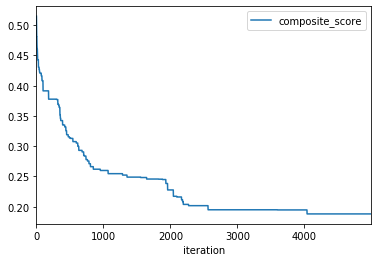

In [44]:
%matplotlib inline
results.plot(x='iteration', y='composite_score')

In [45]:
results

iteration  composite_score
0           0         0.514778
0           1         0.502172
0           2         0.494130
0           3         0.484949
0           4         0.481035
0           5         0.481035
0           6         0.481035
0           7         0.467328
0           8         0.467328
0           9         0.464336
0          10         0.460982
0          11         0.460720
0          12         0.460720
0          13         0.460720
0          14         0.456530
0          15         0.456530
0          16         0.442894
0          17         0.442894
0          18         0.442894
0          19         0.442894
0          20         0.442894
0          21         0.442894
0          22         0.442894
0          23         0.442894
0          24         0.442894
0          25         0.442894
0          26         0.442894
0          27         0.442894
0          28         0.442894
0          29         0.430480
..        ...              ...
0        4970         0.188146
0        4971         0.188146
0        4972         0.188146
0        4973         0.188146
0        4974         0.188146
0        4975         0.188146
0        4976         0.188146
0        4977         0.188146
0        4978         0.188146
0        4979         0.188146
0        4980         0.188146
0        4981         0.188146
0        4982         0.188146
0        4983         0.188146
0        4984         0.188146
0        4985         0.188146
0        4986         0.188146
0        4987         0.188146
0        4988         0.188146
0        4989         0.188146
0        4990         0.188146
0        4991         0.188146
0        4992         0.188146
0        4993         0.188146
0        4994         0.188146
0        4995         0.188146
0        4996         0.188146
0        4997         0.188146
0        4998         0.188146
0        4999         0.188146

[5000 rows x 2 columns]

In [46]:
pd.set_option("display.max_rows", 500)
calendars

index  child    method                                          week_sara  \
0       0     46     elite  [1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, ...   
0       0      4      swap  [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, ...   
0       0      0  mutate_3  [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, ...   
0       0      2  mutate_3  [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, ...   
0       0      1  mutate_3  [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, ...   
0       0      1     elite  [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, ...   
0       0      1     elite  [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, ...   
0       0      2  mutate_3  [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, ...   
0       0      2     elite  [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, ...   
0       0      1  mutate_3  [1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, ...   
0       0      0  mutate_6  [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, ...   
0       0      1  mutate_3  [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, ...   
0       0      1     elite  [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, ...   
0       0      1     elite  [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, ...   
0       0      2  mutate_3  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      2     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      3  mutate_3  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      3     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      3     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      3     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      3     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      3     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      3     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      3     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      3     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      3     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      3     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      3     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      3     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      1  mutate_3  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      1     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      1     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      1     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      1     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      1     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      1     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      1     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      1     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      1     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      1  mutate_6  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      1     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      1     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      1     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      1     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      1     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      1  mutate_3  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      1     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      1     elite  [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...   
0       0      3  mutate_6  [1, 1, 

In [47]:
calendars.to_csv('C:/Python/calendars.csv')

In [56]:
calendars[calendars.method == 'swap']

index  child method                                          week_sara  \
0      0      4   swap  [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, ...   

                                          week_heinz  \
0  [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, ...   

                                         week_bernie  \
0  [0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...   

                                           week_carl  \
0  [1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, ...   

                                            week_zak  generation  diffsum  \
0  [1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, ...           2     0.38   

   hasslescore  composite  iteration  
0     0.570866   0.502172          1

In [49]:
reboot= pd.read_csv('C:/Python/calendars.csv')

In [50]:
rebootframe = reboot.tail(100)

In [130]:
rebootframe2=rebootframe[['child','method','week_sara','week_heinz','week_bernie','week_carl','week_zak','diffsum','hasslescore','generation','composite']]

In [131]:
rebootframe2

child method                                          week_sara  \
4900      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4901      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4902      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4903      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4904      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4905      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4906      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4907      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4908      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4909      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4910      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4911      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4912      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4913      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4914      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4915      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4916      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4917      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4918      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4919      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4920      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4921      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4922      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4923      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4924      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4925      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4926      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4927      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4928      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4929      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4930      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4931      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4932      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4933      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4934      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4935      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4936      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4937      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4938      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4939      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4940      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4941      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4942      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4943      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4944      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4945      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4946      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4947      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4948      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4949      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4950      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4951      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4952      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
4953      3  elite  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0

In [119]:
calendars[calendars.generation == 5000].week_sara[0][1]

'1'

In [124]:
newlist = []
for value in range(0,len(calendars[calendars.generation == 5000].week_sara[0])):
    #print(value)
    #print(calendars[calendars.generation == 5000].week_sara[0][value])
    if (calendars[calendars.generation == 5000].week_sara[0][value]=='1') | (calendars[calendars.generation == 5000].week_sara[0][value] =='0'):
        newlist.append(int(calendars[calendars.generation == 5000].week_sara[0][value]))
        #print(int(calendars[calendars.generation == 5000].week_sara[0][value]))
print(employee,np.asarray(newlist).reshape(8,5))

week_sara [[1 1 0 1 0]
 [1 1 0 1 0]
 [1 1 0 1 0]
 [1 1 1 1 0]
 [1 0 0 1 0]
 [1 1 0 1 0]
 [1 1 0 1 0]
 [1 1 1 1 0]]


In [125]:
calendars[calendars.generation == 5000].week_sara[0]

'[1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]'

In [127]:
calendars[calendars.generation == 5000]['week_sara'][0]

'[1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]'

In [133]:
for employee in ['week_sara','week_heinz','week_bernie','week_carl','week_zak']:
    newlist = []
    for value in range(0,len(calendars[calendars.generation == 5000][employee][0])):
        #print(value)
        #print(calendars[calendars.generation == 5000].week_sara[0][value])
        if (calendars[calendars.generation == 5000][employee][0][value]=='1') | (calendars[calendars.generation == 5000][employee][0][value] =='0'):
            newlist.append(int(calendars[calendars.generation == 5000][employee][0][value]))
            #print(int(calendars[calendars.generation == 5000].week_sara[0][value]))
    print(np.asarray(newlist).reshape(8,5))

[[1 1 0 1 0]
 [1 1 0 1 0]
 [1 1 0 1 0]
 [1 1 1 1 0]
 [1 0 0 1 0]
 [1 1 0 1 0]
 [1 1 0 1 0]
 [1 1 1 1 0]]
[[1 0 1 0 1]
 [1 1 1 0 1]
 [1 0 1 0 1]
 [1 0 1 0 0]
 [1 1 1 0 1]
 [1 0 1 0 1]
 [1 0 1 0 1]
 [1 0 1 0 1]]
[[0 1 0 1 0]
 [0 1 1 1 0]
 [0 1 1 0 1]
 [0 1 1 1 1]
 [0 1 1 1 0]
 [0 1 1 1 1]
 [0 1 1 0 1]
 [0 1 1 0 1]]
[[1 0 1 1 1]
 [1 0 1 1 1]
 [1 0 0 1 1]
 [1 0 0 1 1]
 [1 0 1 1 1]
 [1 0 0 1 0]
 [1 0 1 1 0]
 [1 0 0 1 0]]
[[0 1 1 0 1]
 [0 1 0 1 1]
 [0 1 1 1 1]
 [0 1 0 0 1]
 [0 1 0 0 1]
 [0 1 1 0 1]
 [0 1 1 1 1]
 [0 1 0 1 1]]


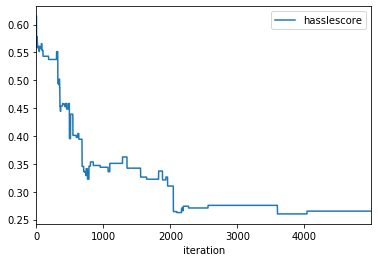

In [53]:
calendars.plot(x='iteration', y='hasslescore')

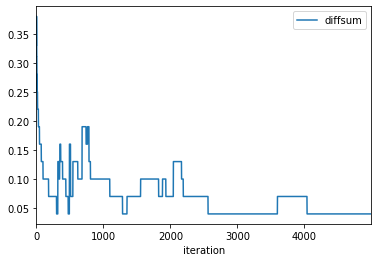

In [54]:
calendars.plot(x='iteration', y='diffsum')